Units used: GeV for masses, s for time, cm for distances

In [1]:
import os
import glob
import importlib

import matplotlib as mlib
import matplotlib.pyplot as plt

import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
os.system('git -C /home/stasya/prj/alps-running/TdAlps-Internal/ fetch;\
git -C /home/stasya/prj/alps-running/TdAlps-Internal/ status')
import TdAlps
from collections import OrderedDict

import scipy
import scipy.integrate as integrate
import scipy.optimize as optimize

import csv

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [2]:
# #Plotting settings

# font = {
#         'weight' : 'normal',
#         'size'   : 16}

# mlib.rc('font', **font)

In [3]:
def importNotebook(name):
    
    currentDir=os.getcwd()
    notebookDir=os.path.dirname(name)
    os.chdir(notebookDir)
    os.system('git fetch; git status')
    notebookName=os.path.basename(name).split('.')[0]
    module = importlib.import_module(f"ipynb.fs.full.{notebookName}")
    
    os.chdir(currentDir)
    
    globals().update(vars(module))

In [4]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_base.ipynb")

On branch main
Your branch is behind 'origin/main' by 8 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ALPs_BRs.ipynb
	modified:   ALPs_base.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ALPs_BRs-check.ipynb
	ALPs_wip-Nastya.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


On branch main
Your branch is behind 'origin/main' by 8 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ALPs_BRs.ipynb
	modified:   ALPs_base.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ALPs_BRs-check.ipynb
	ALPs_wip-Nastya.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


/home/stasya/prj/alps/Python/ALPs_base.ipynb:642: ComplexWarning: Casting complex values to real discards the imaginary part
  "\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:682: ComplexWarning: Casting complex values to real discards the imaginary part
  "    return float(gamma)\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:695: ComplexWarning: Casting complex values to real discards the imaginary part
  "    alphaEM = readAlphaEM(coeffs)\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:669: ComplexWarning: Casting complex values to real discards the imaginary part
  {


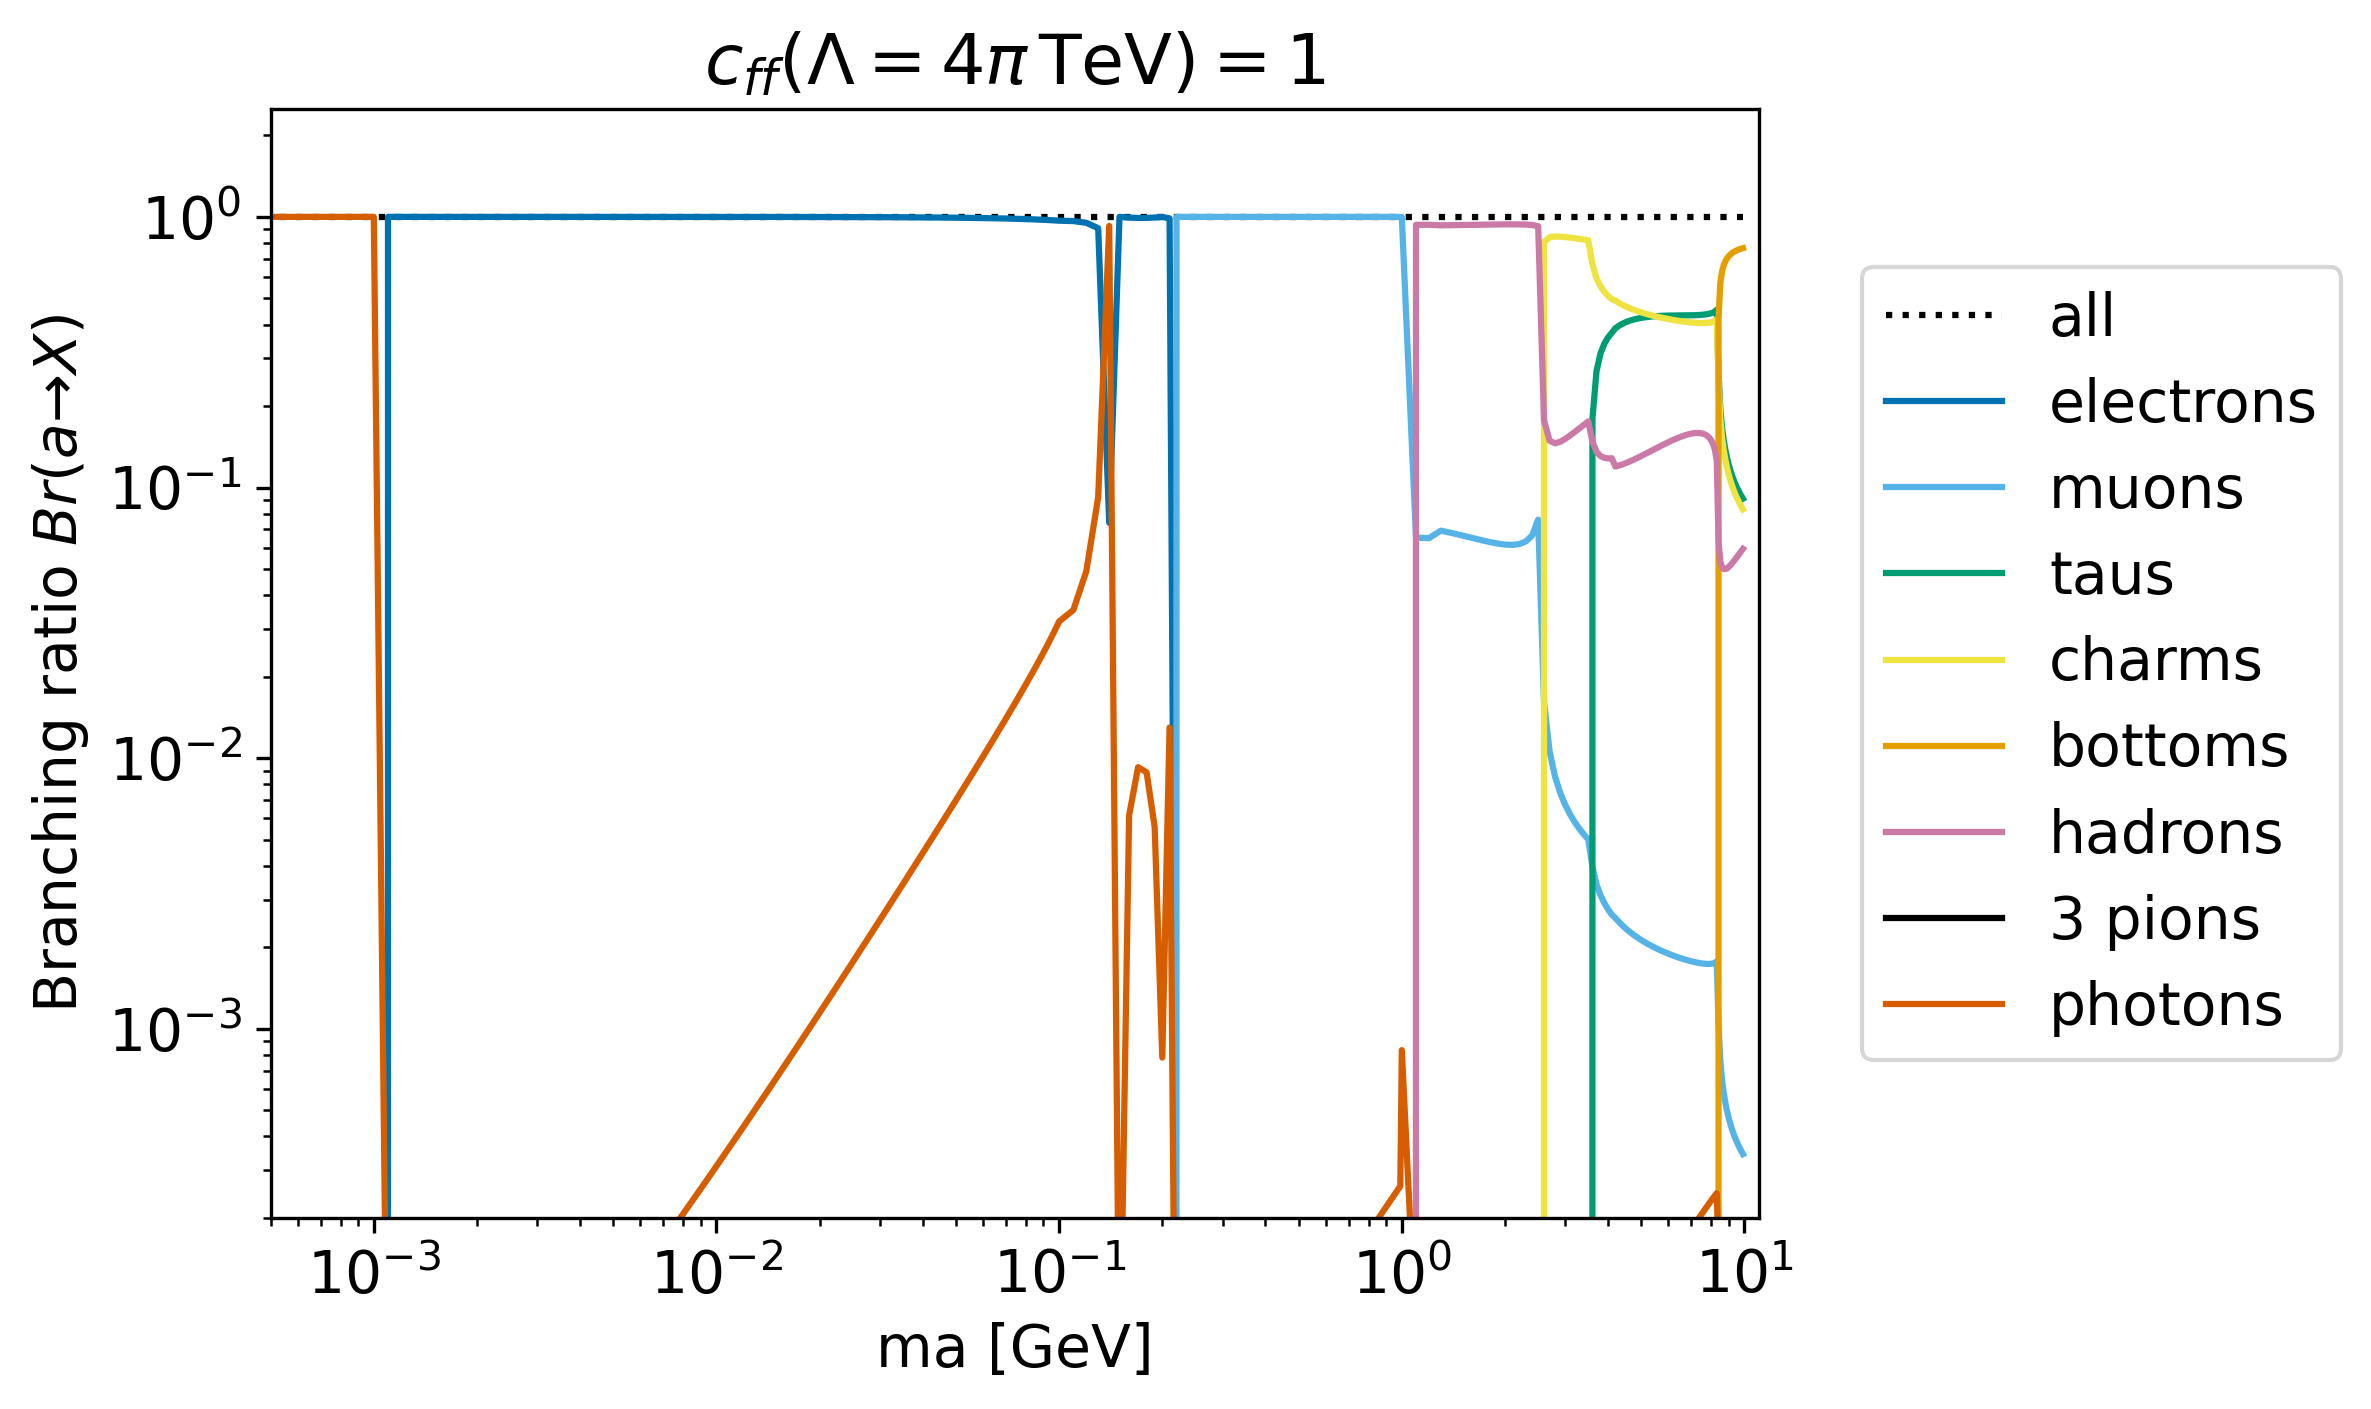

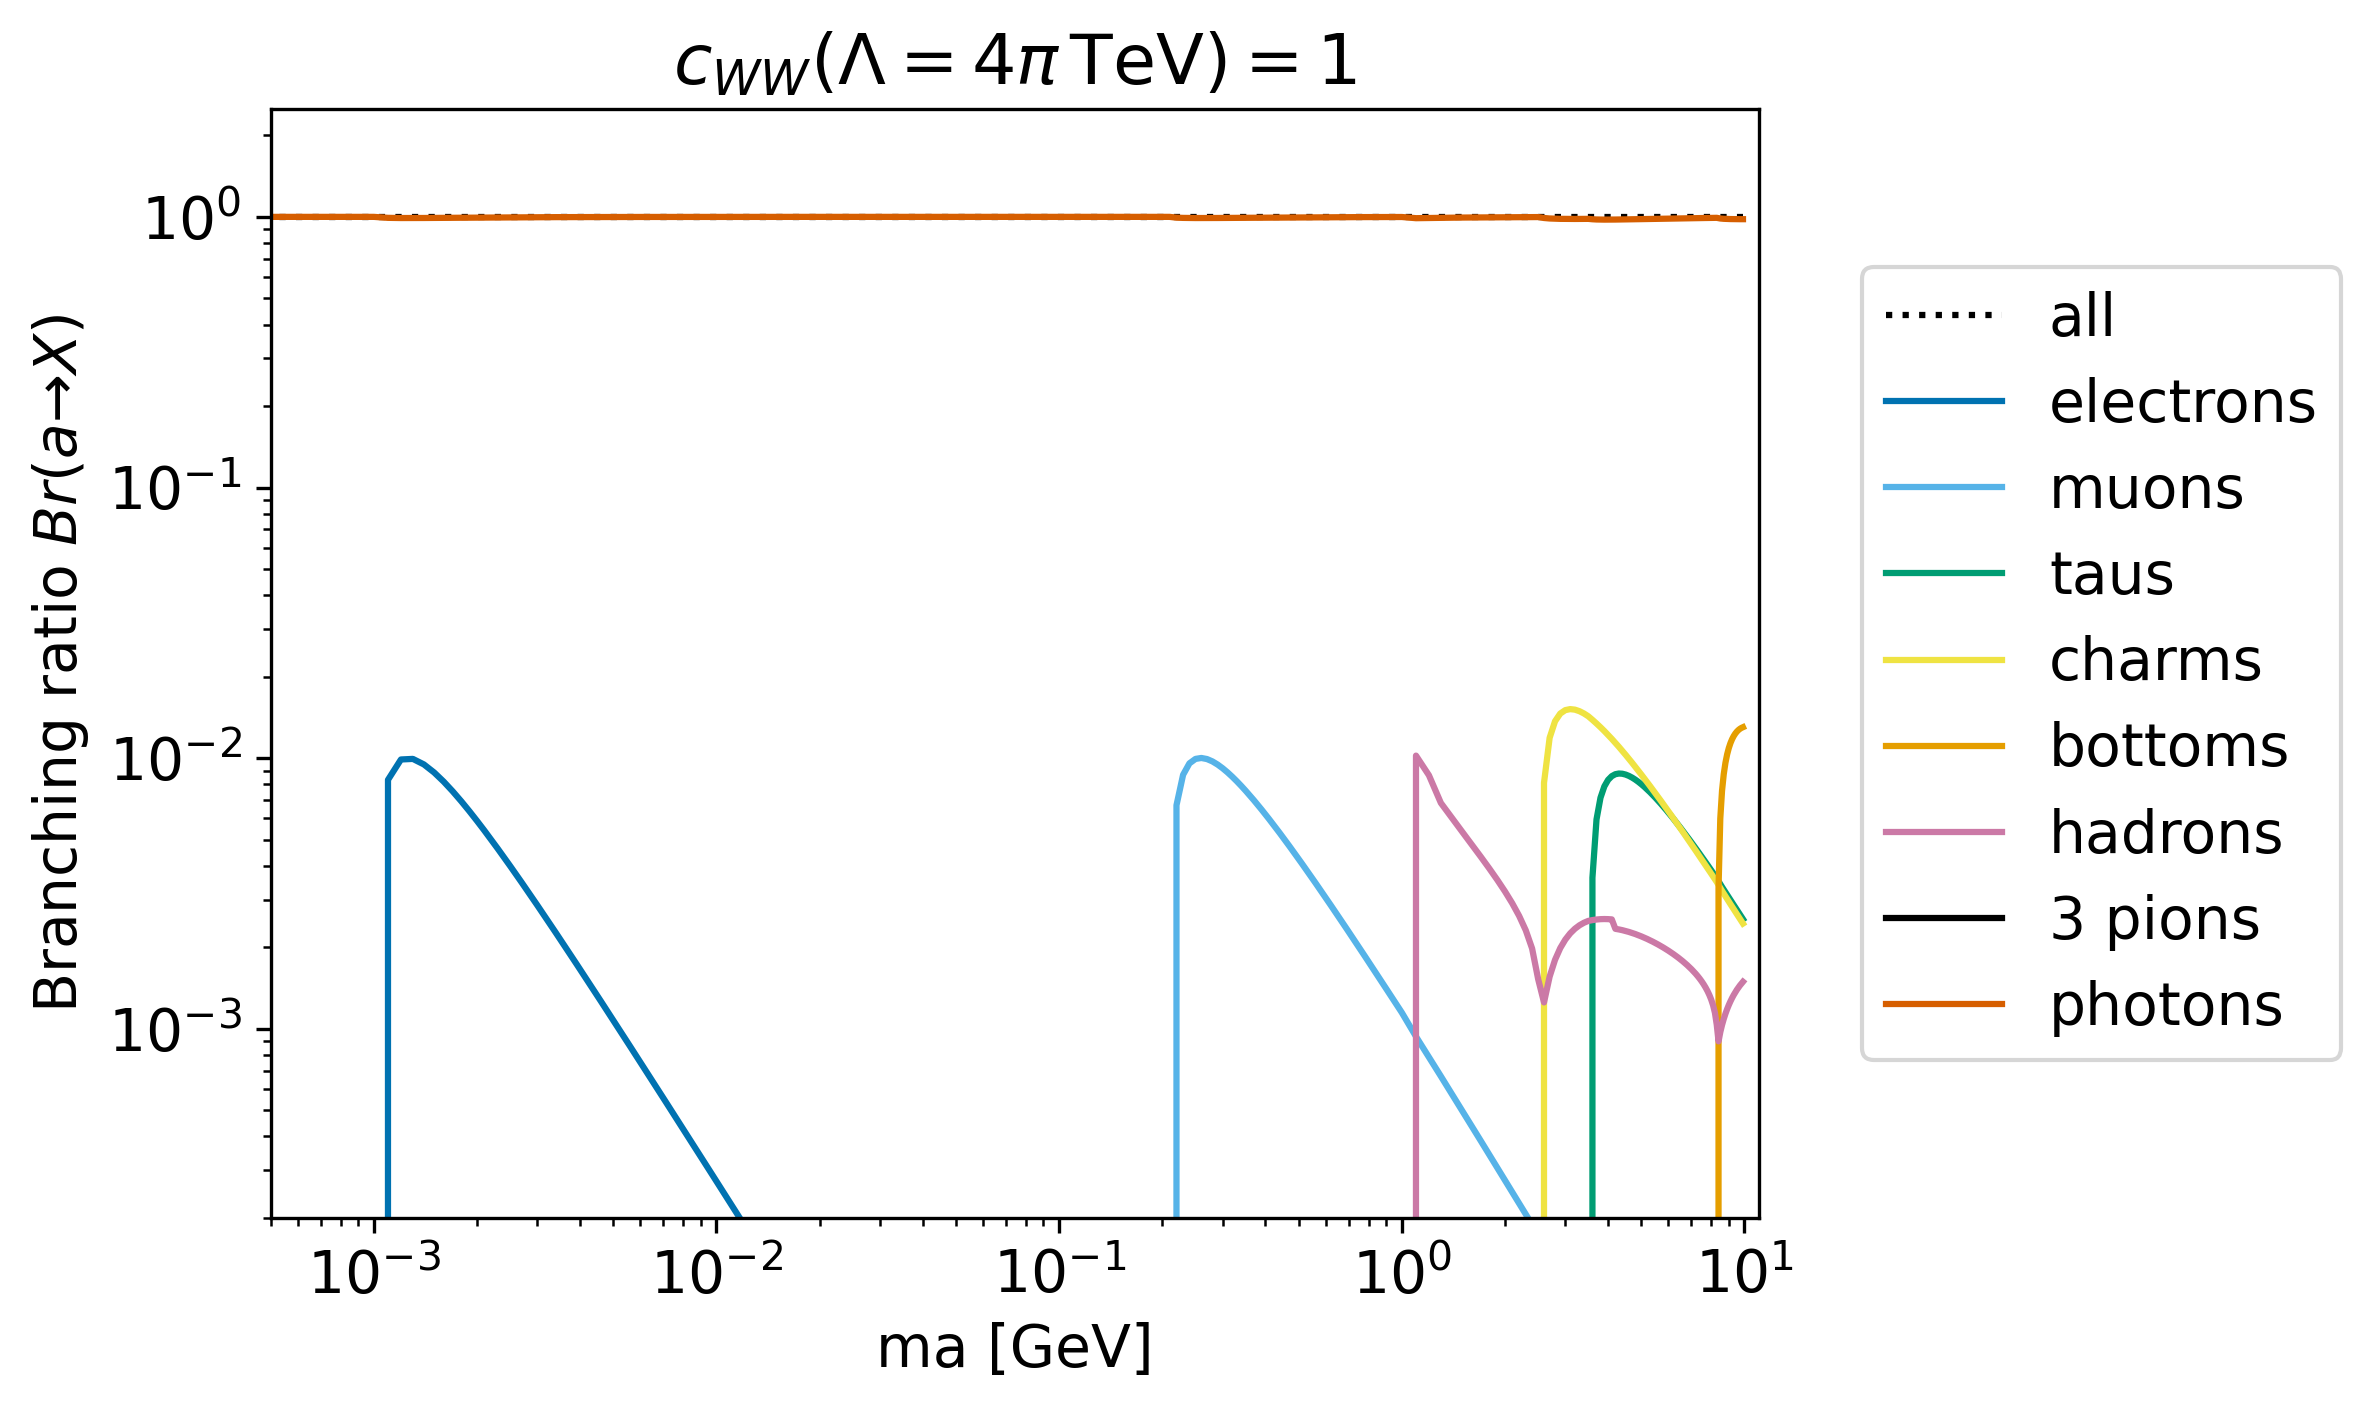

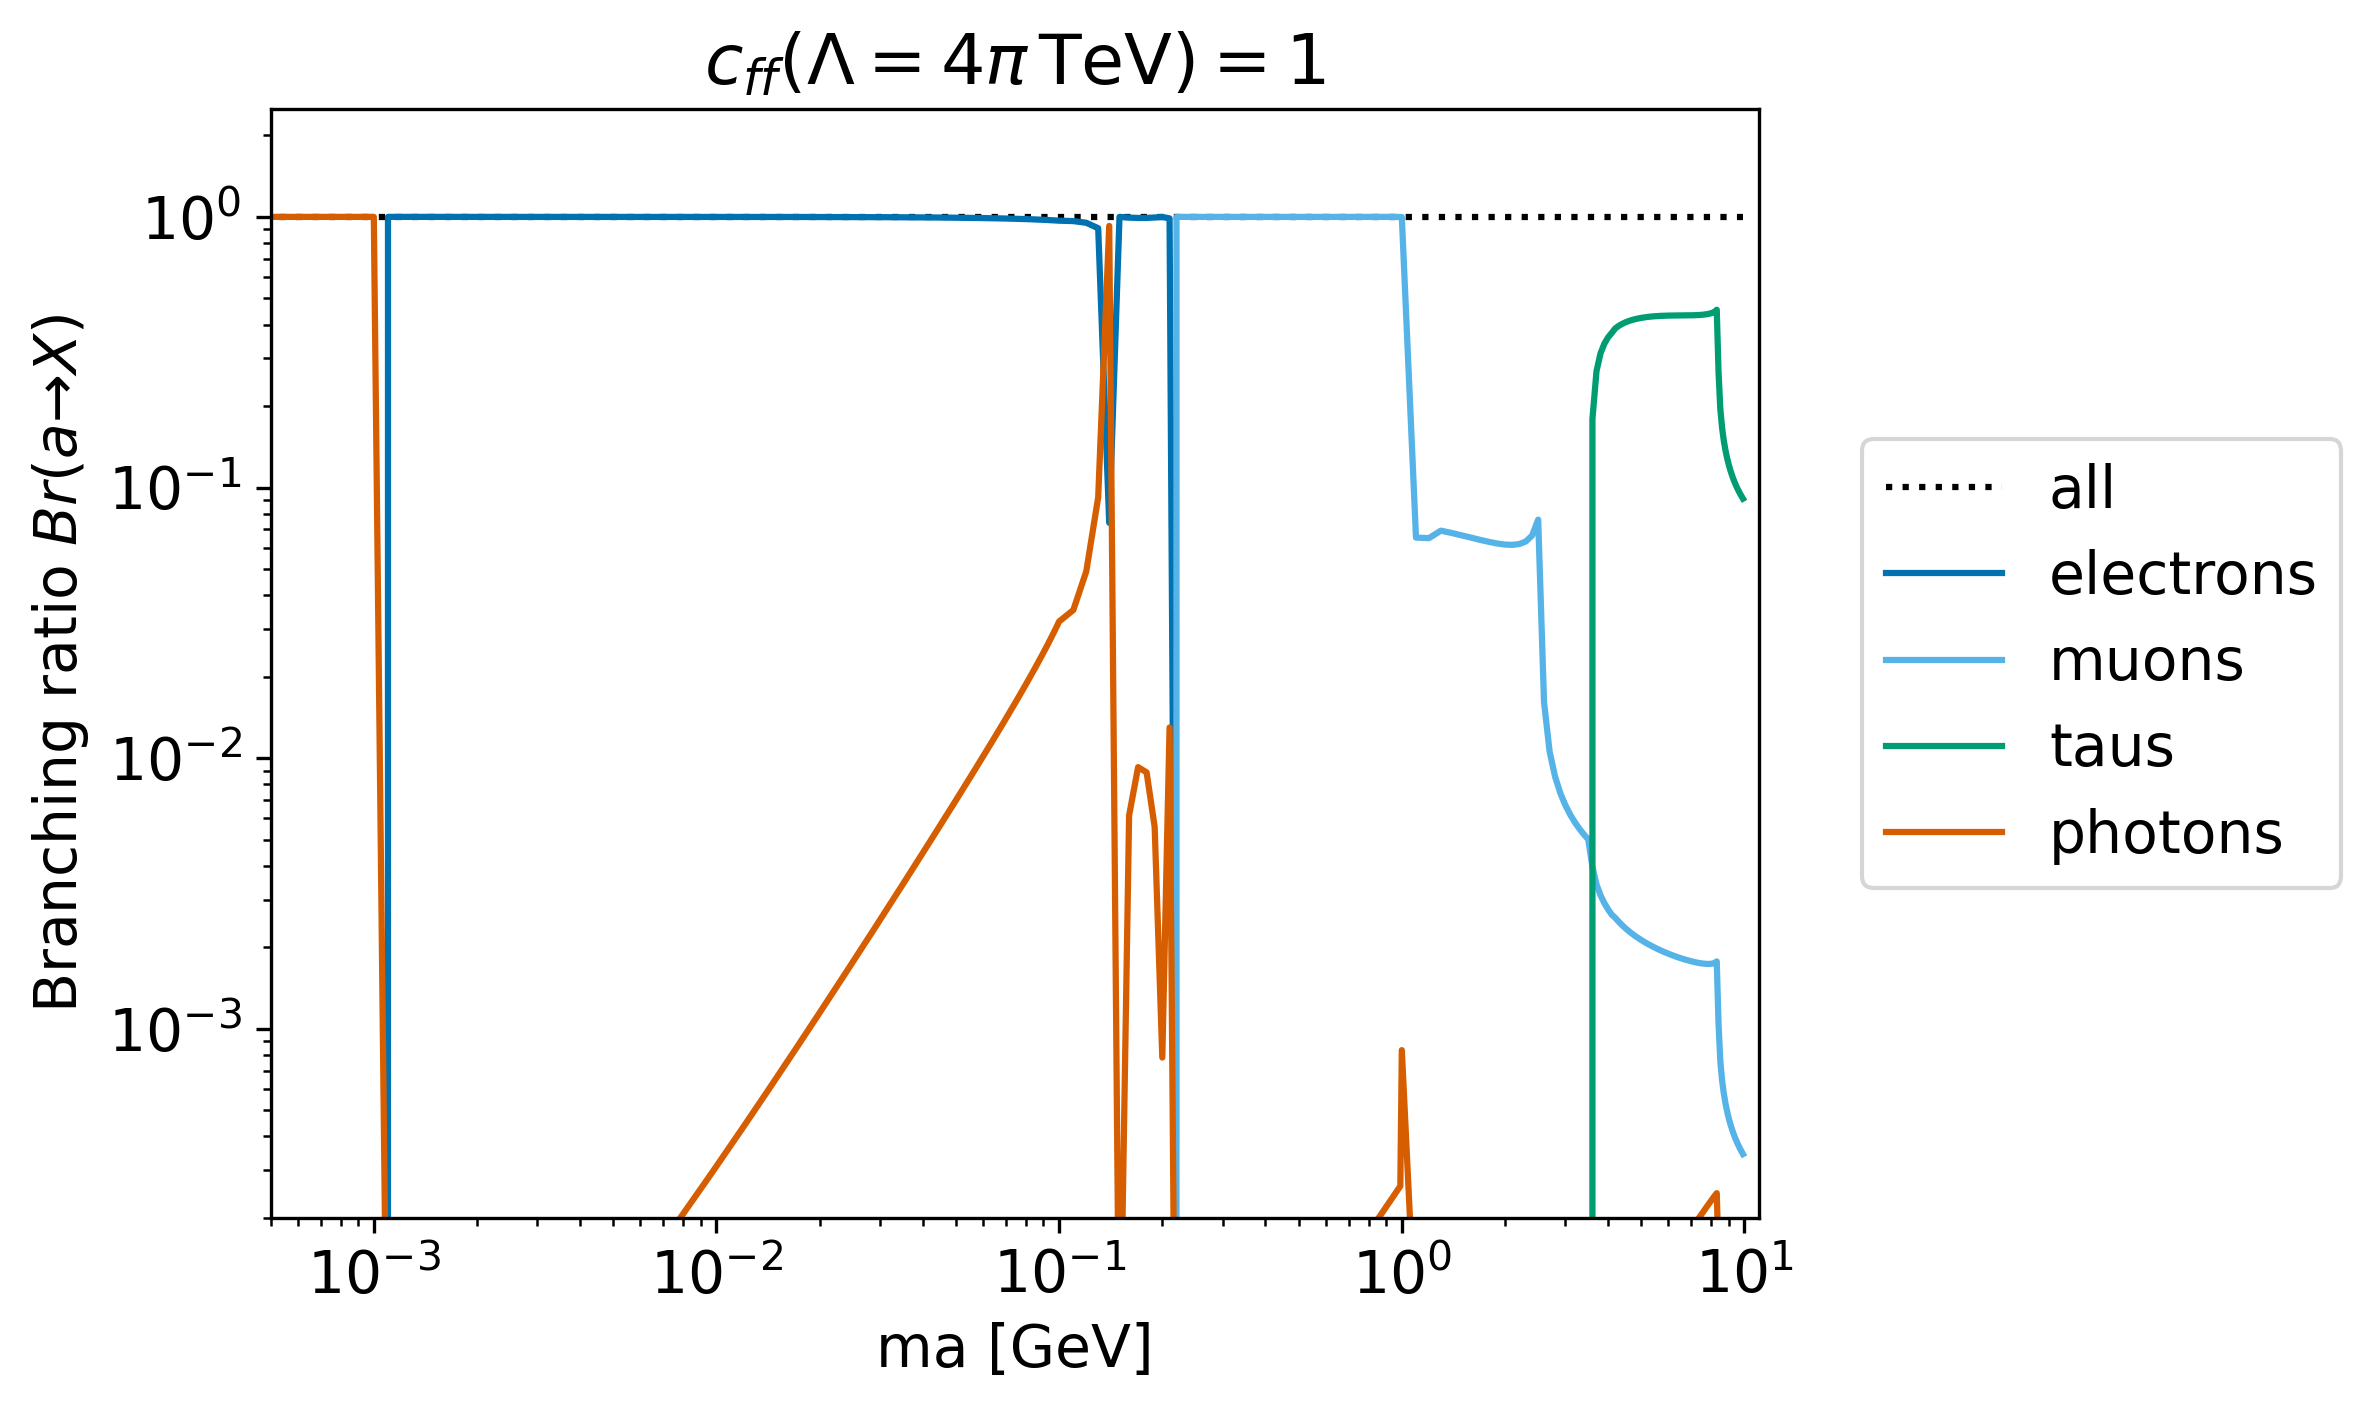

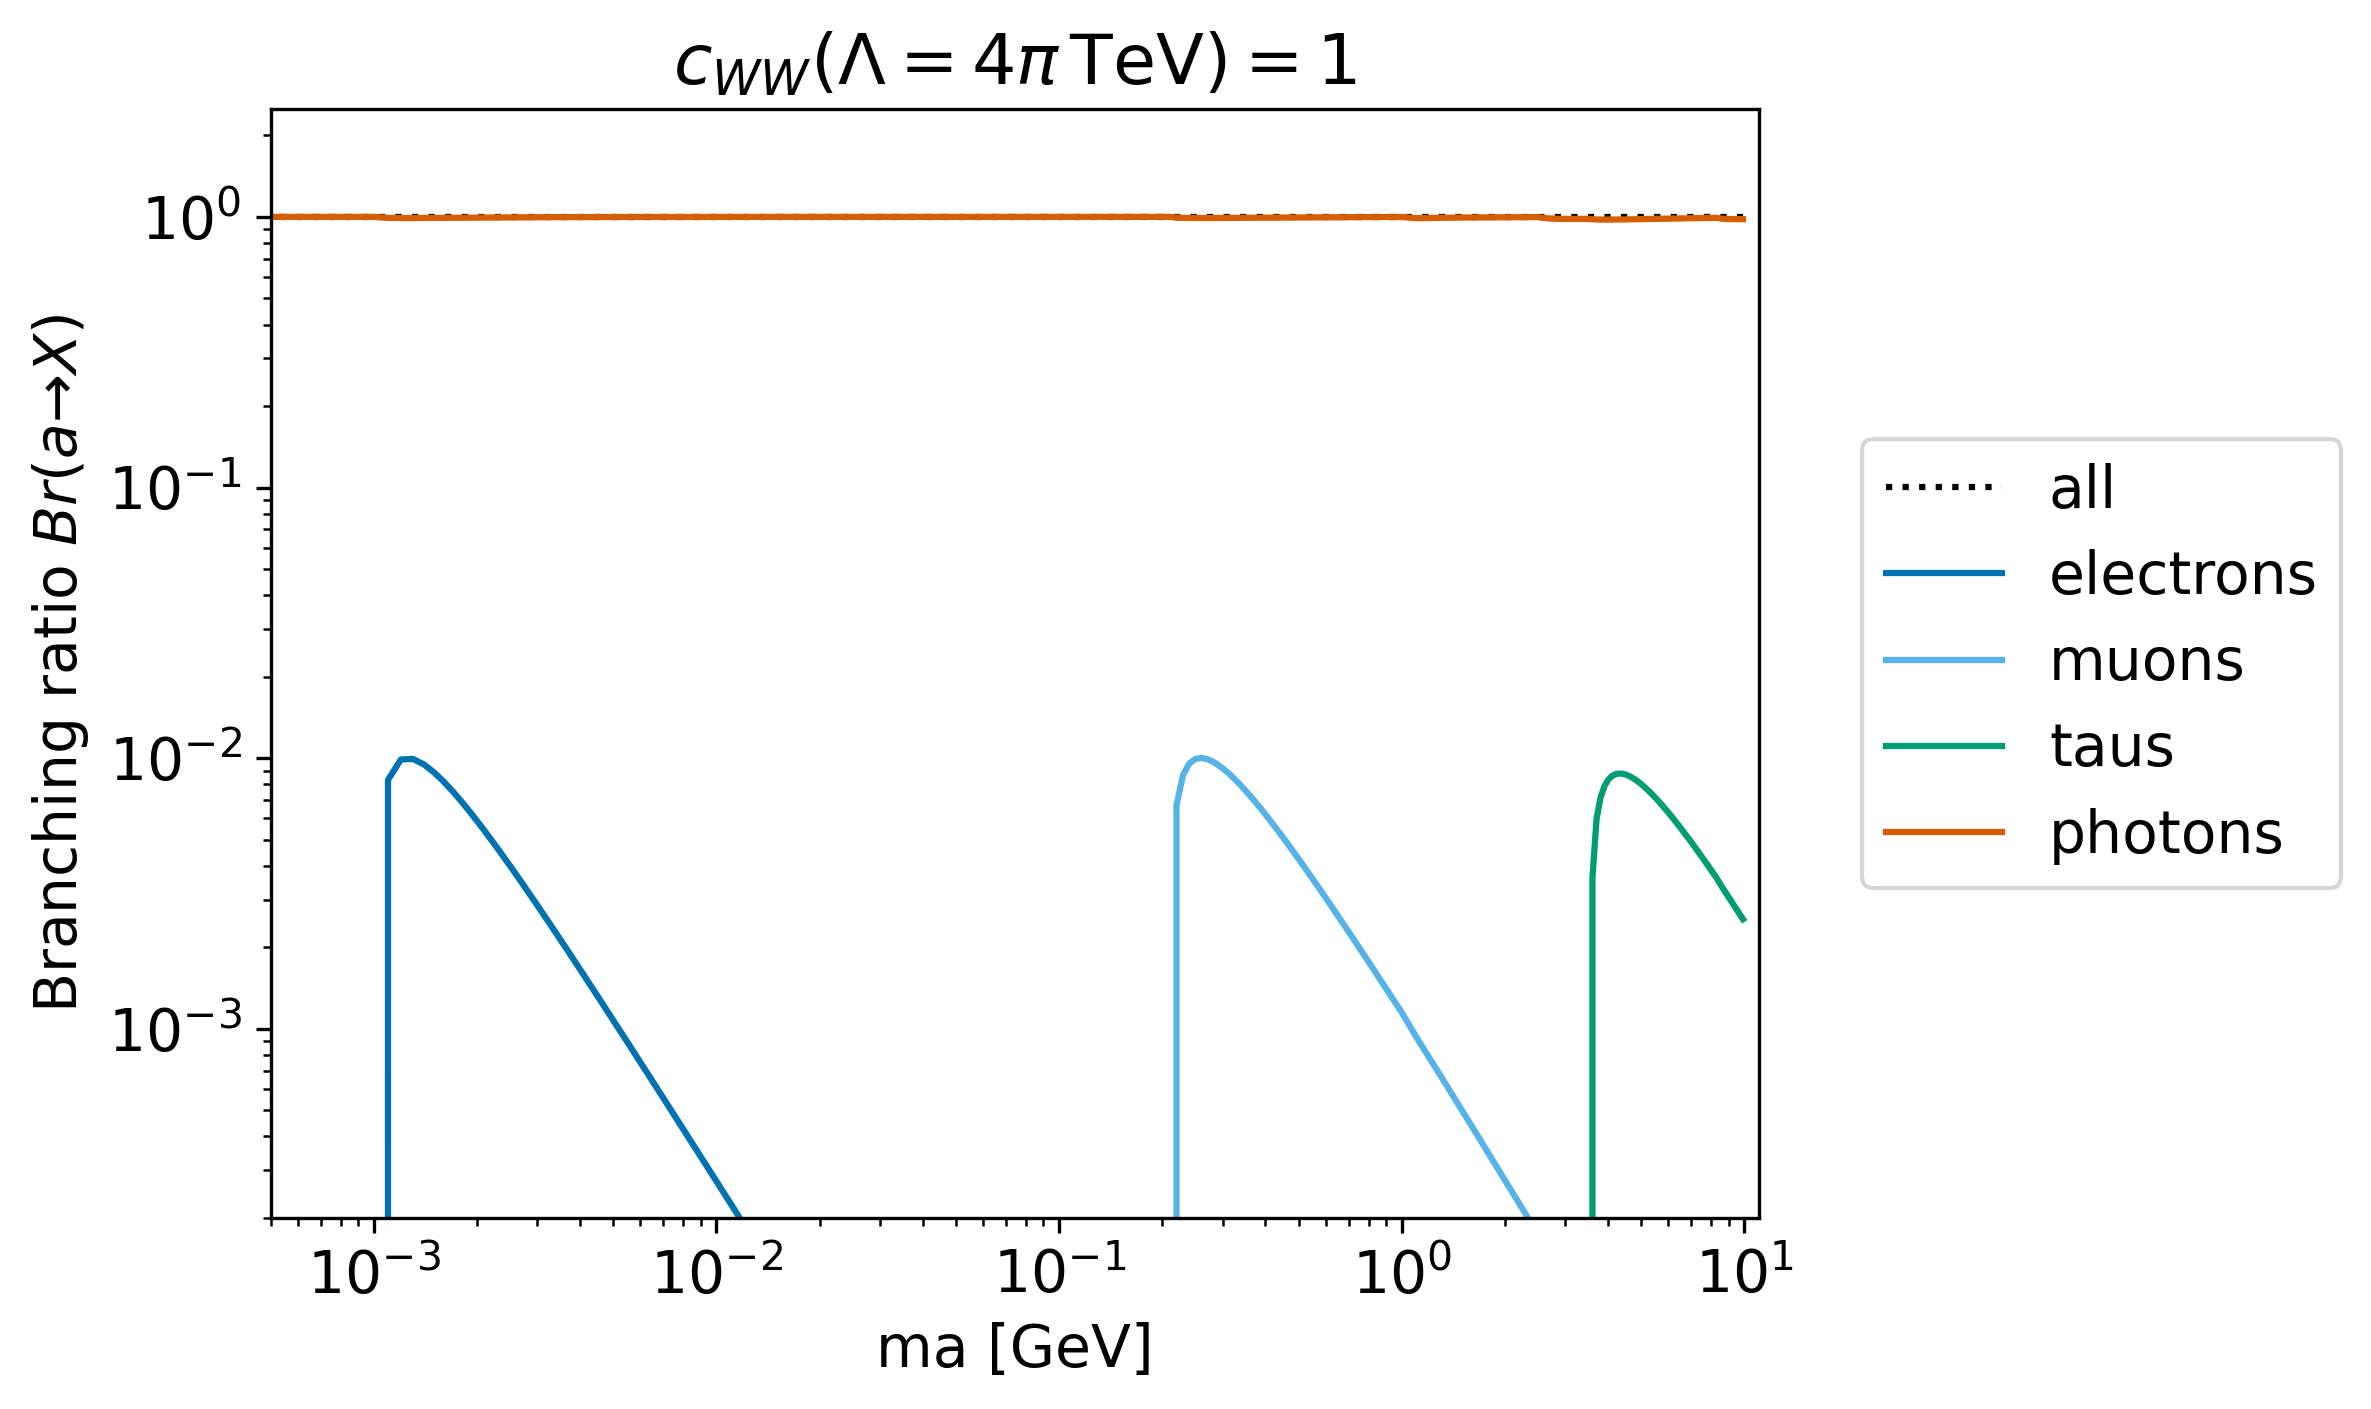

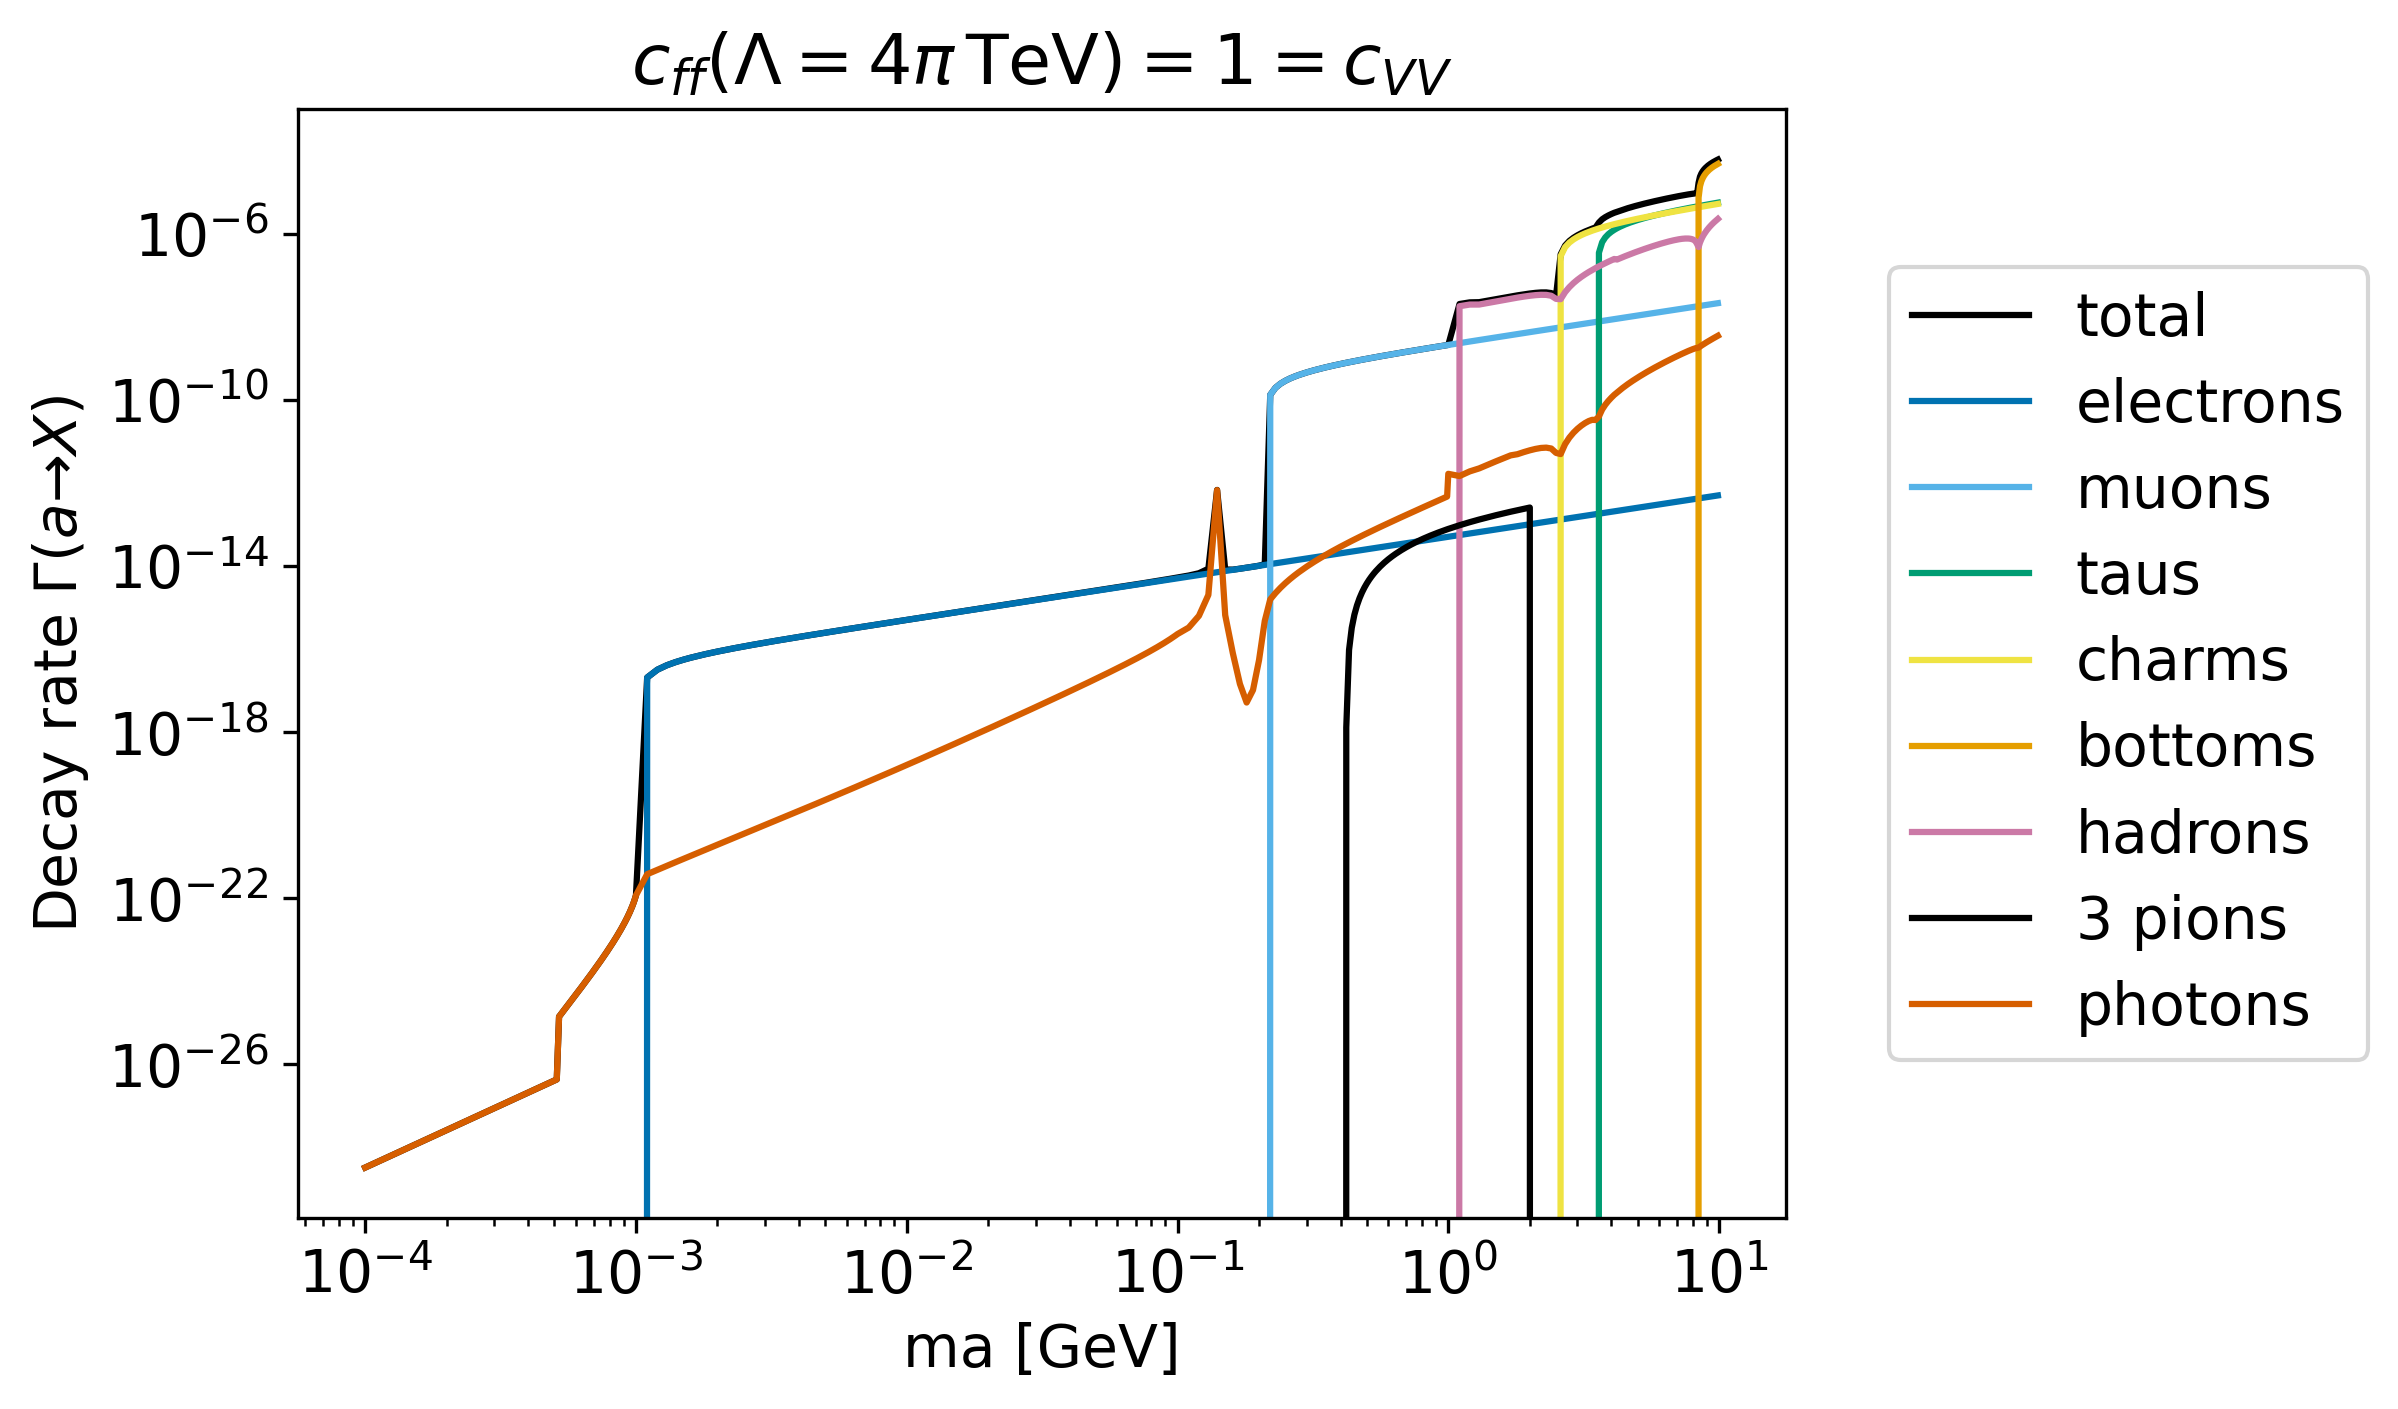

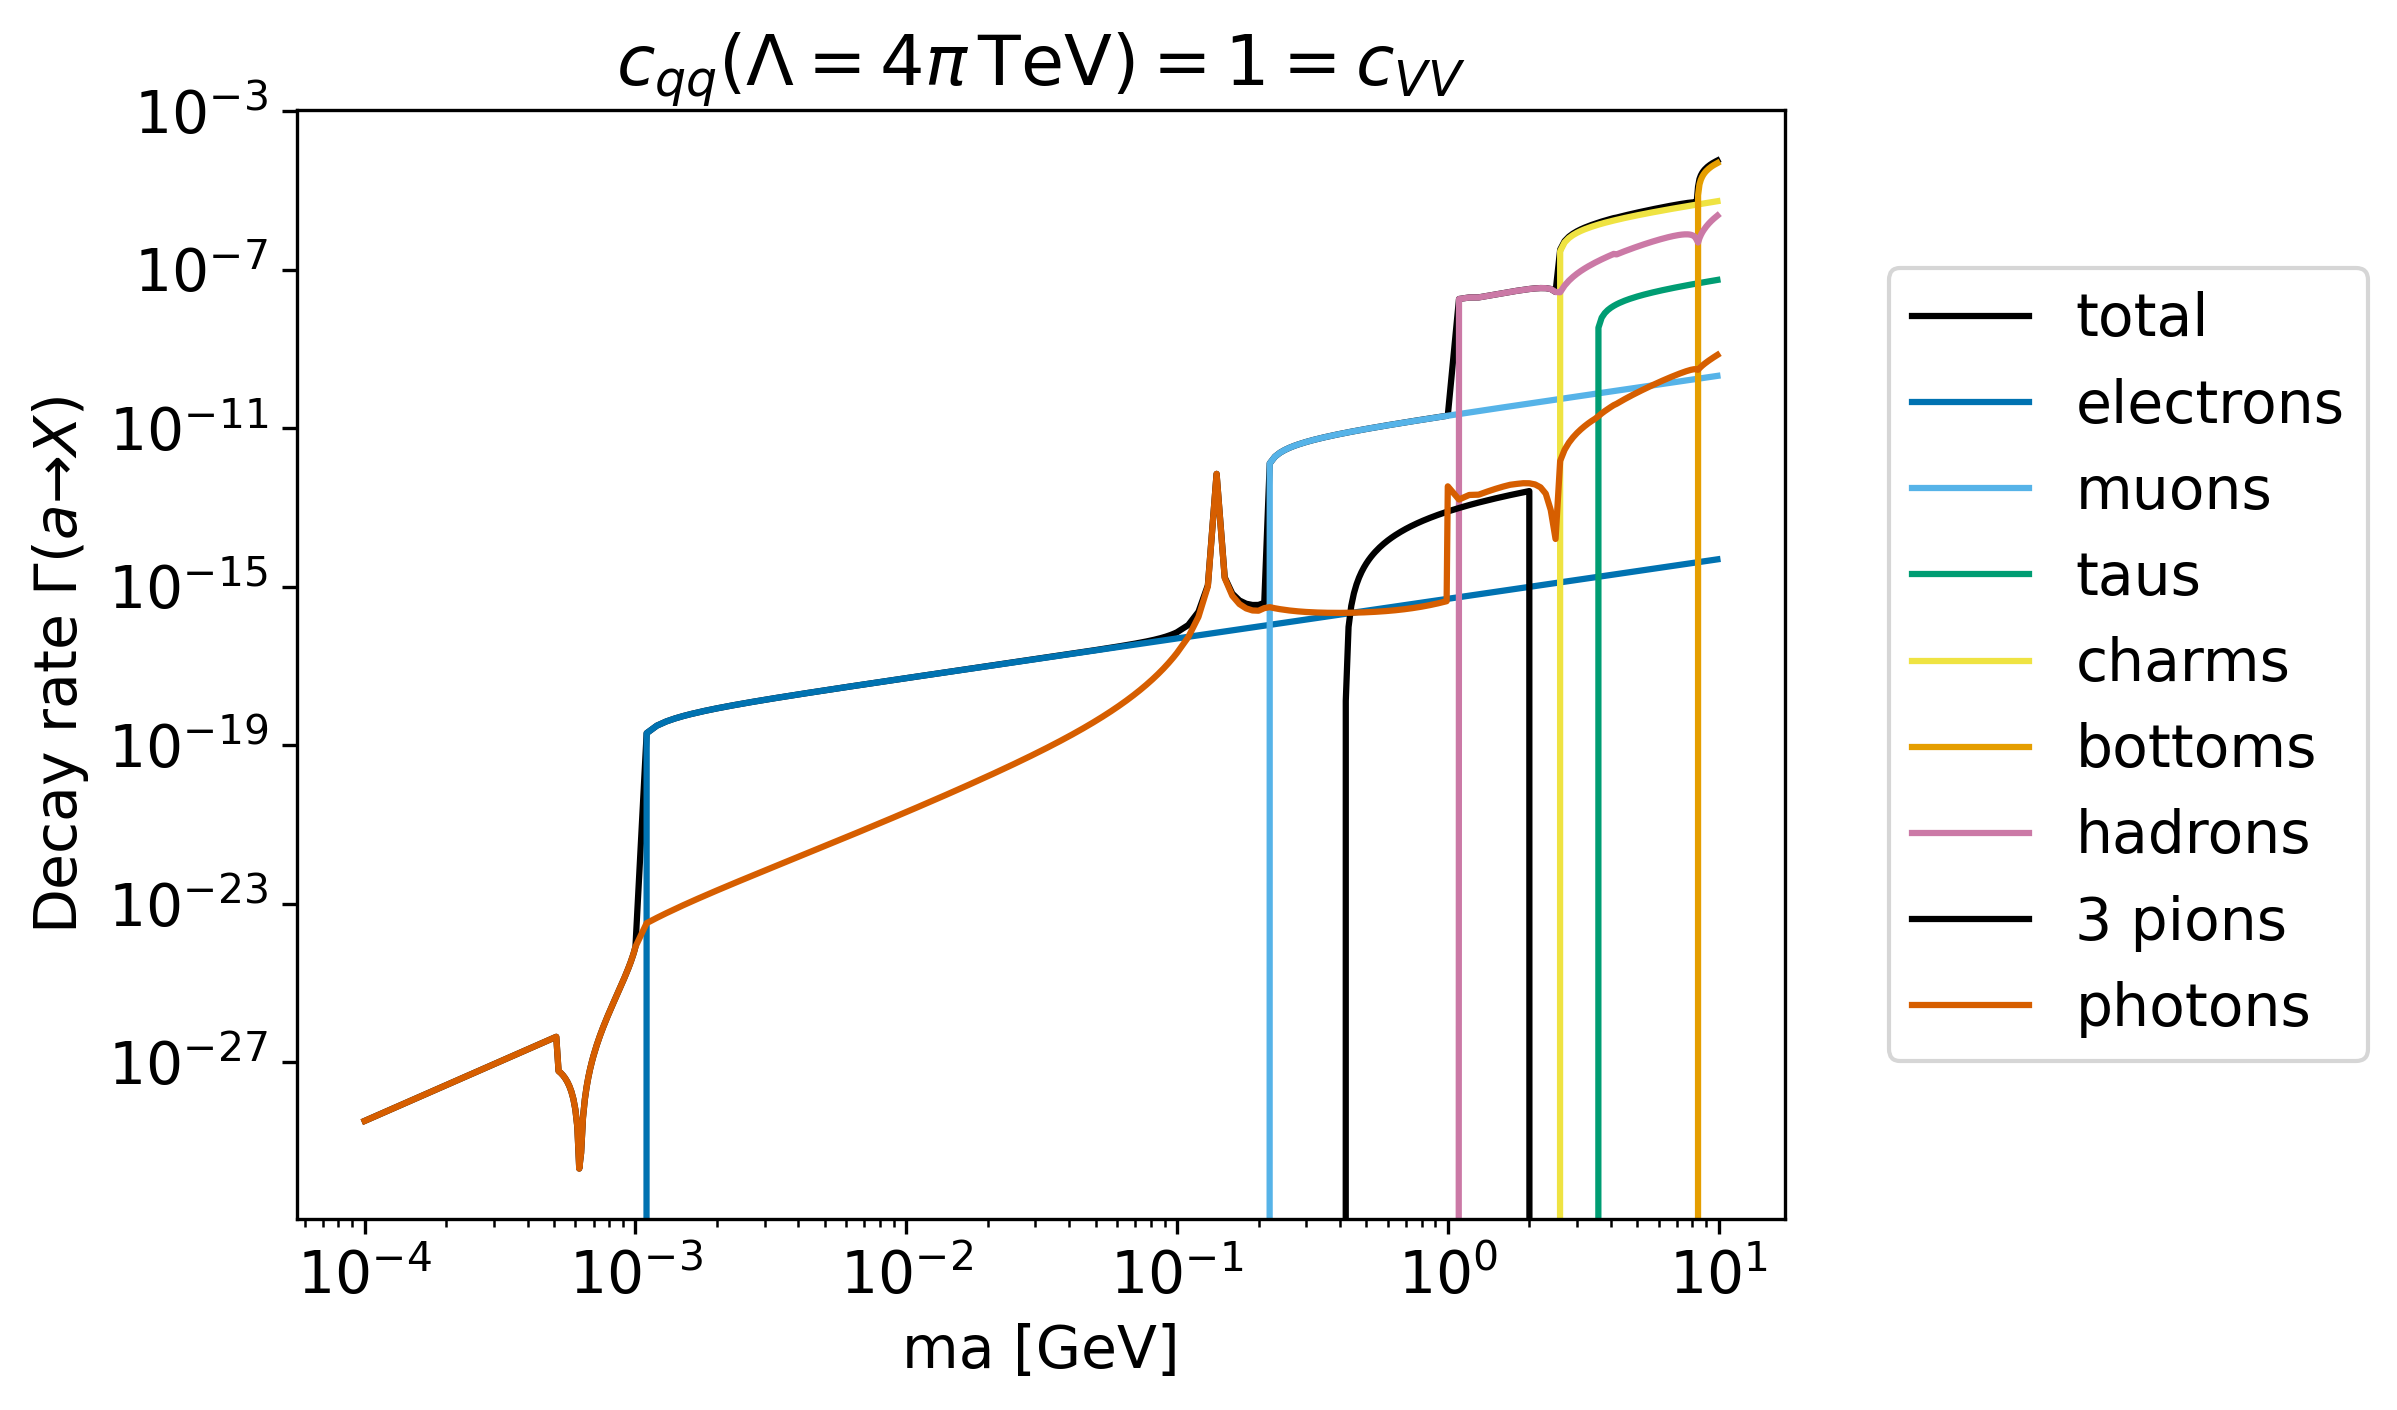

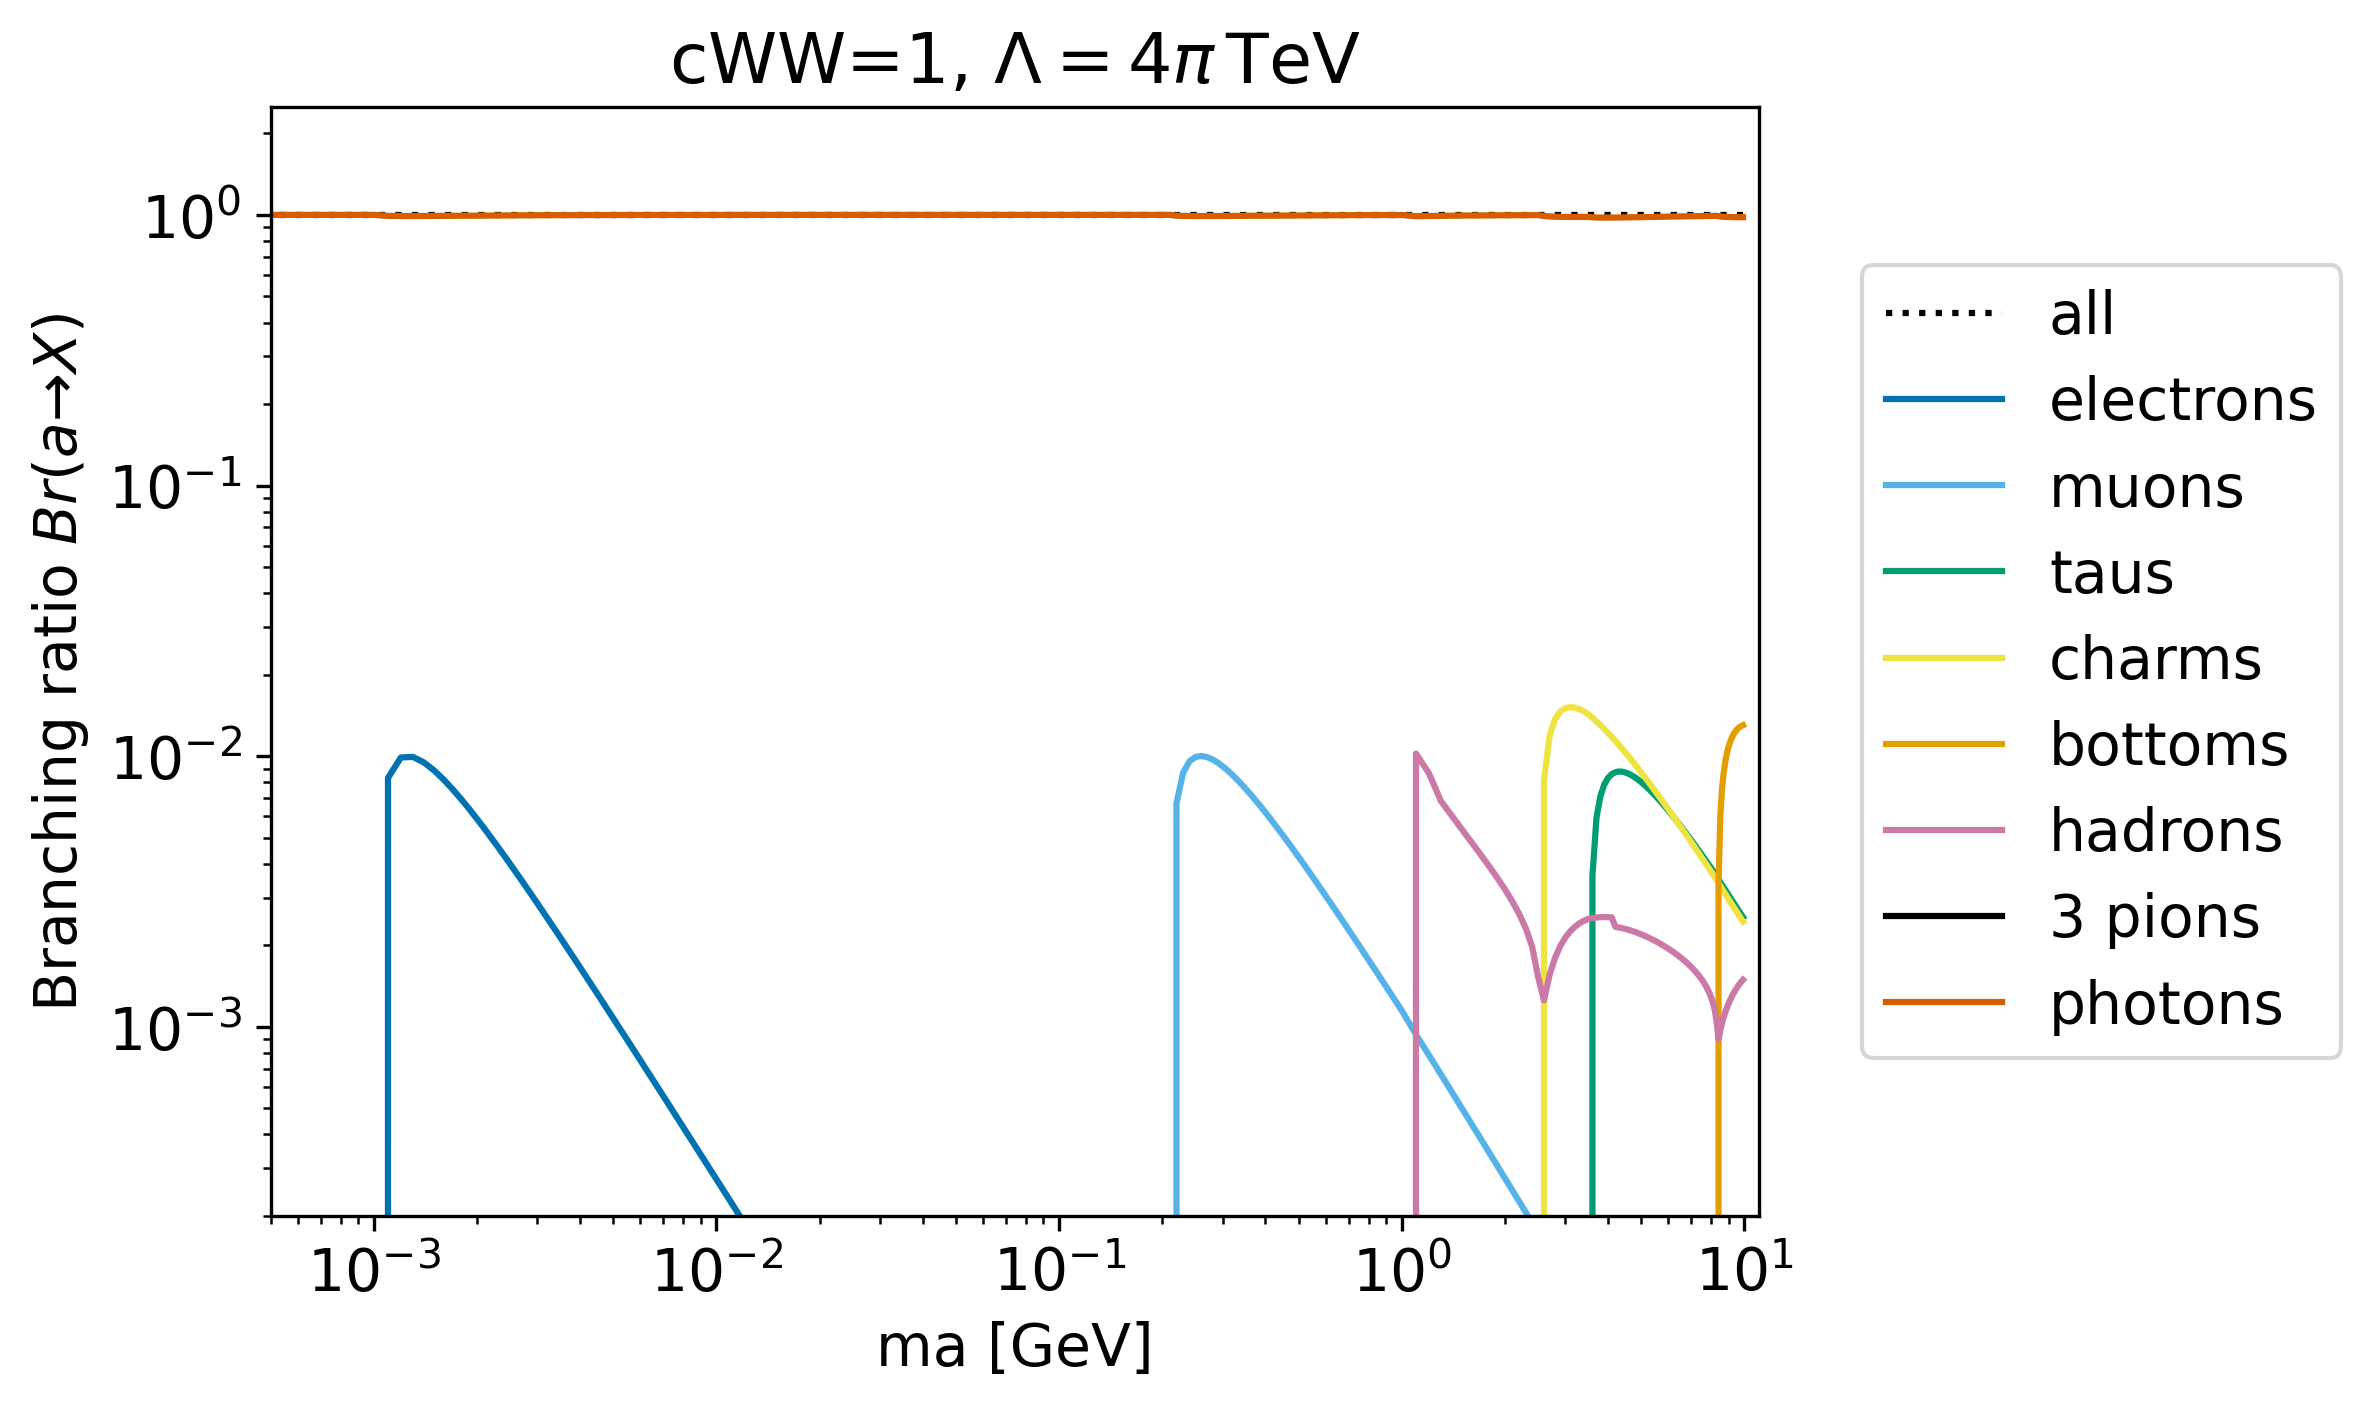

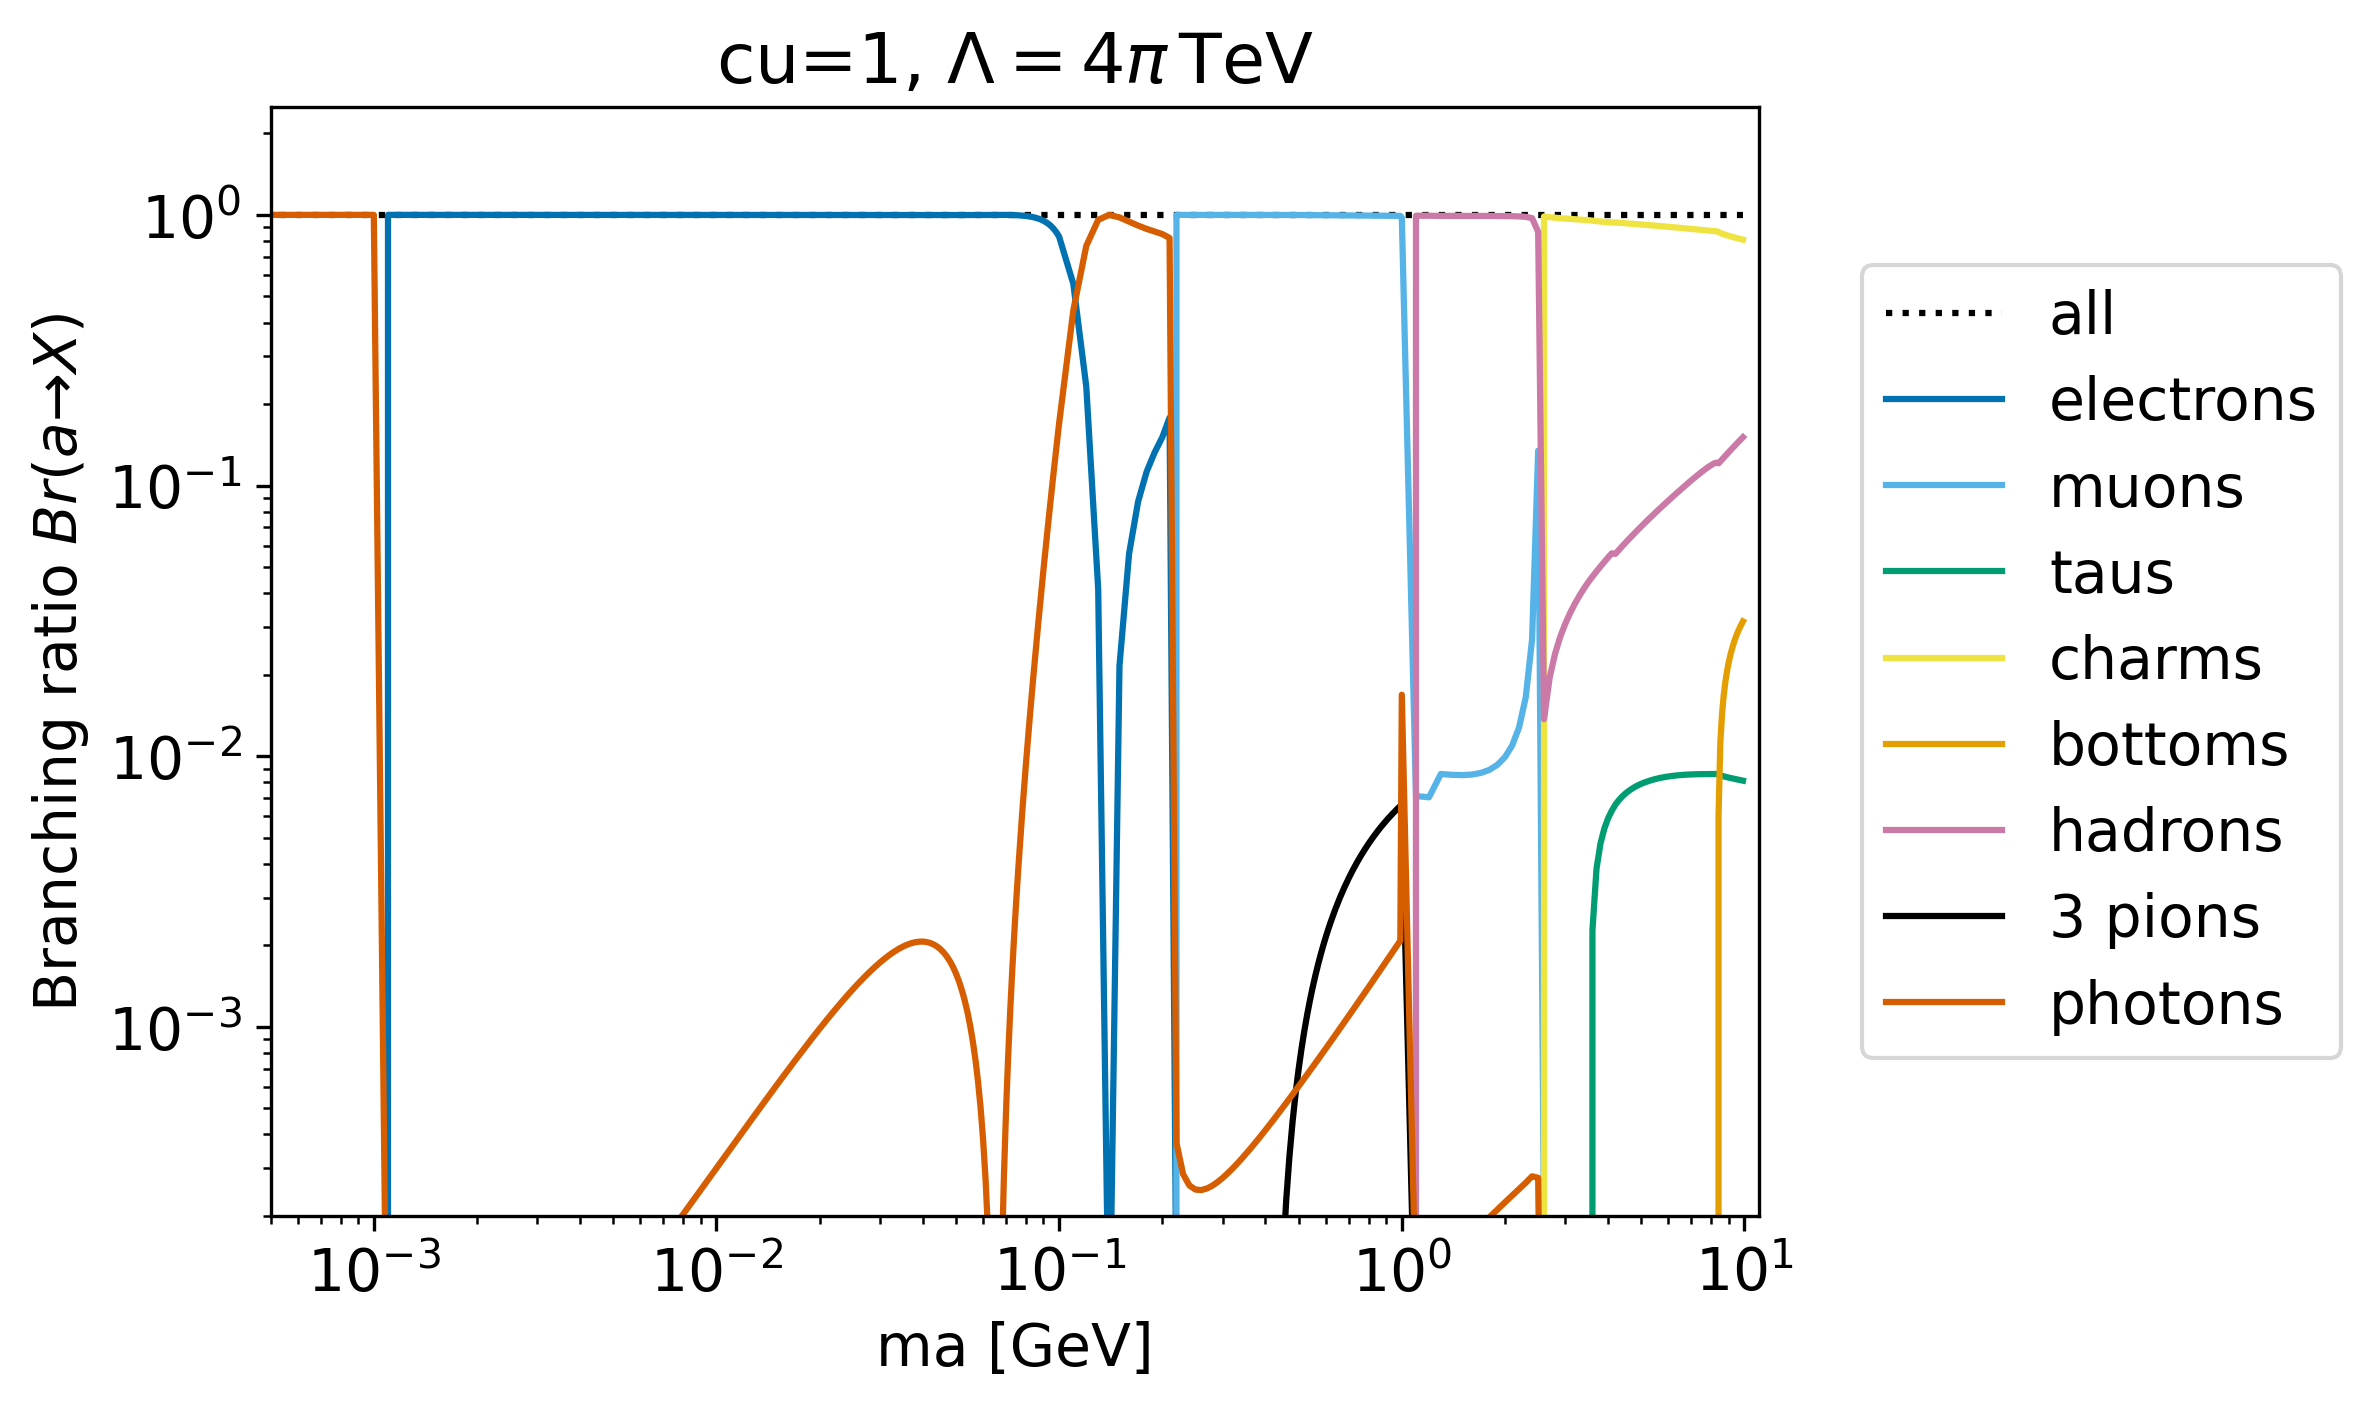

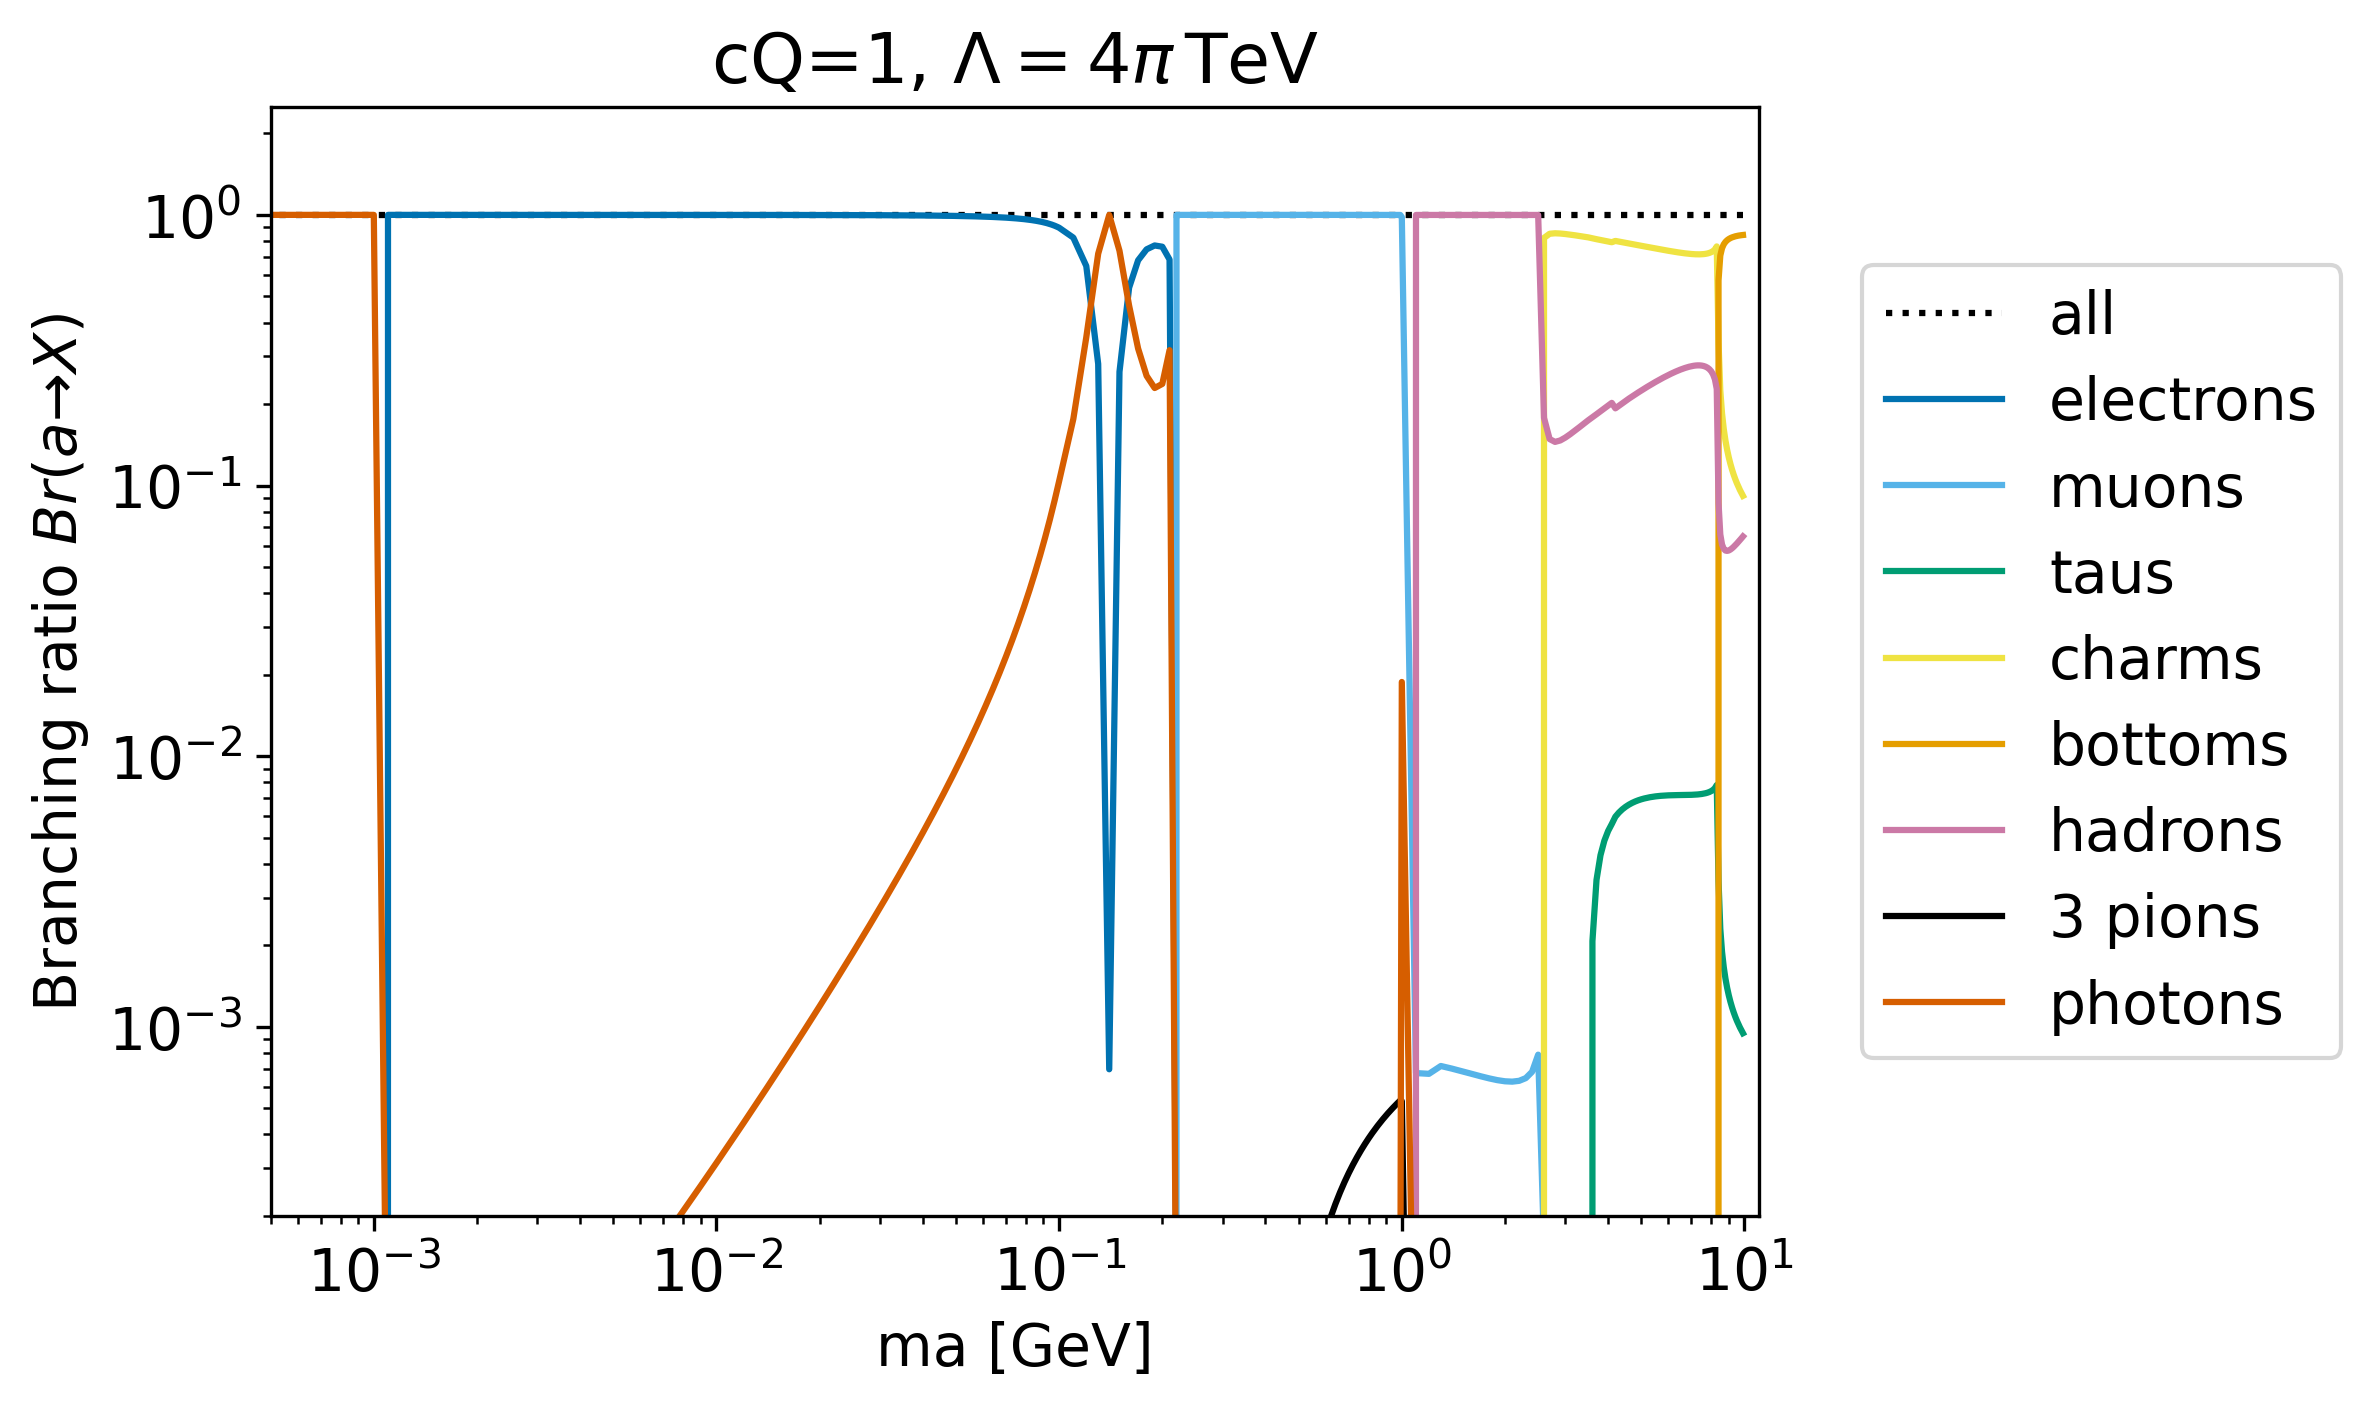

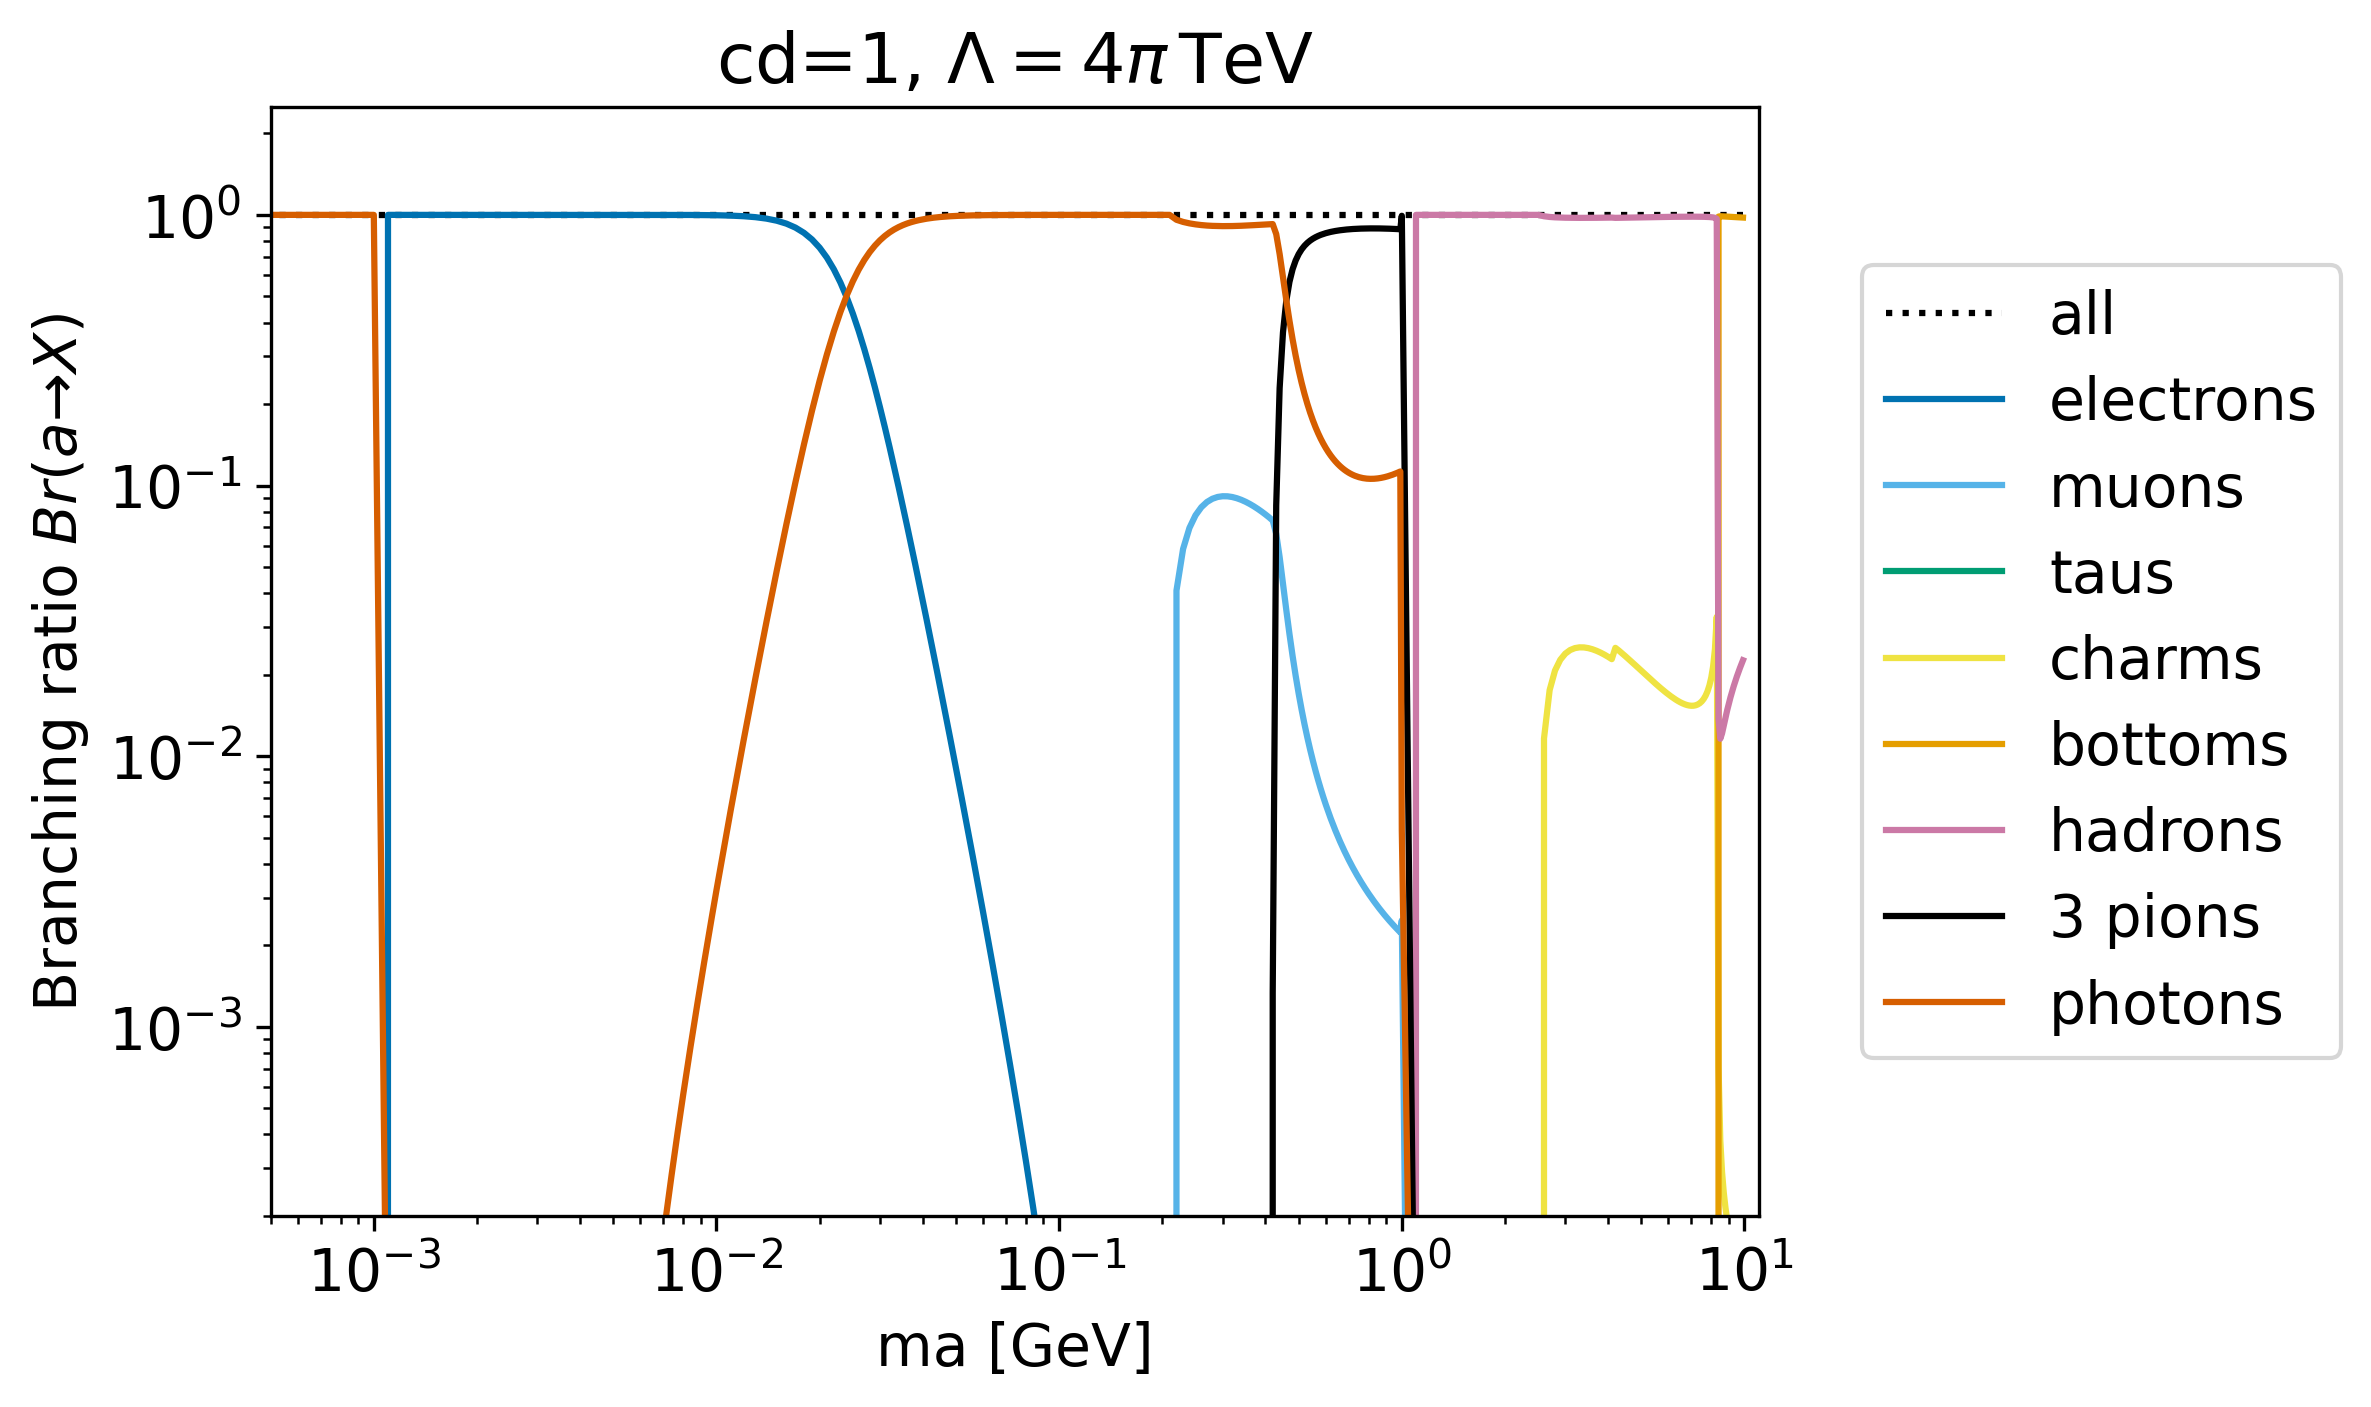

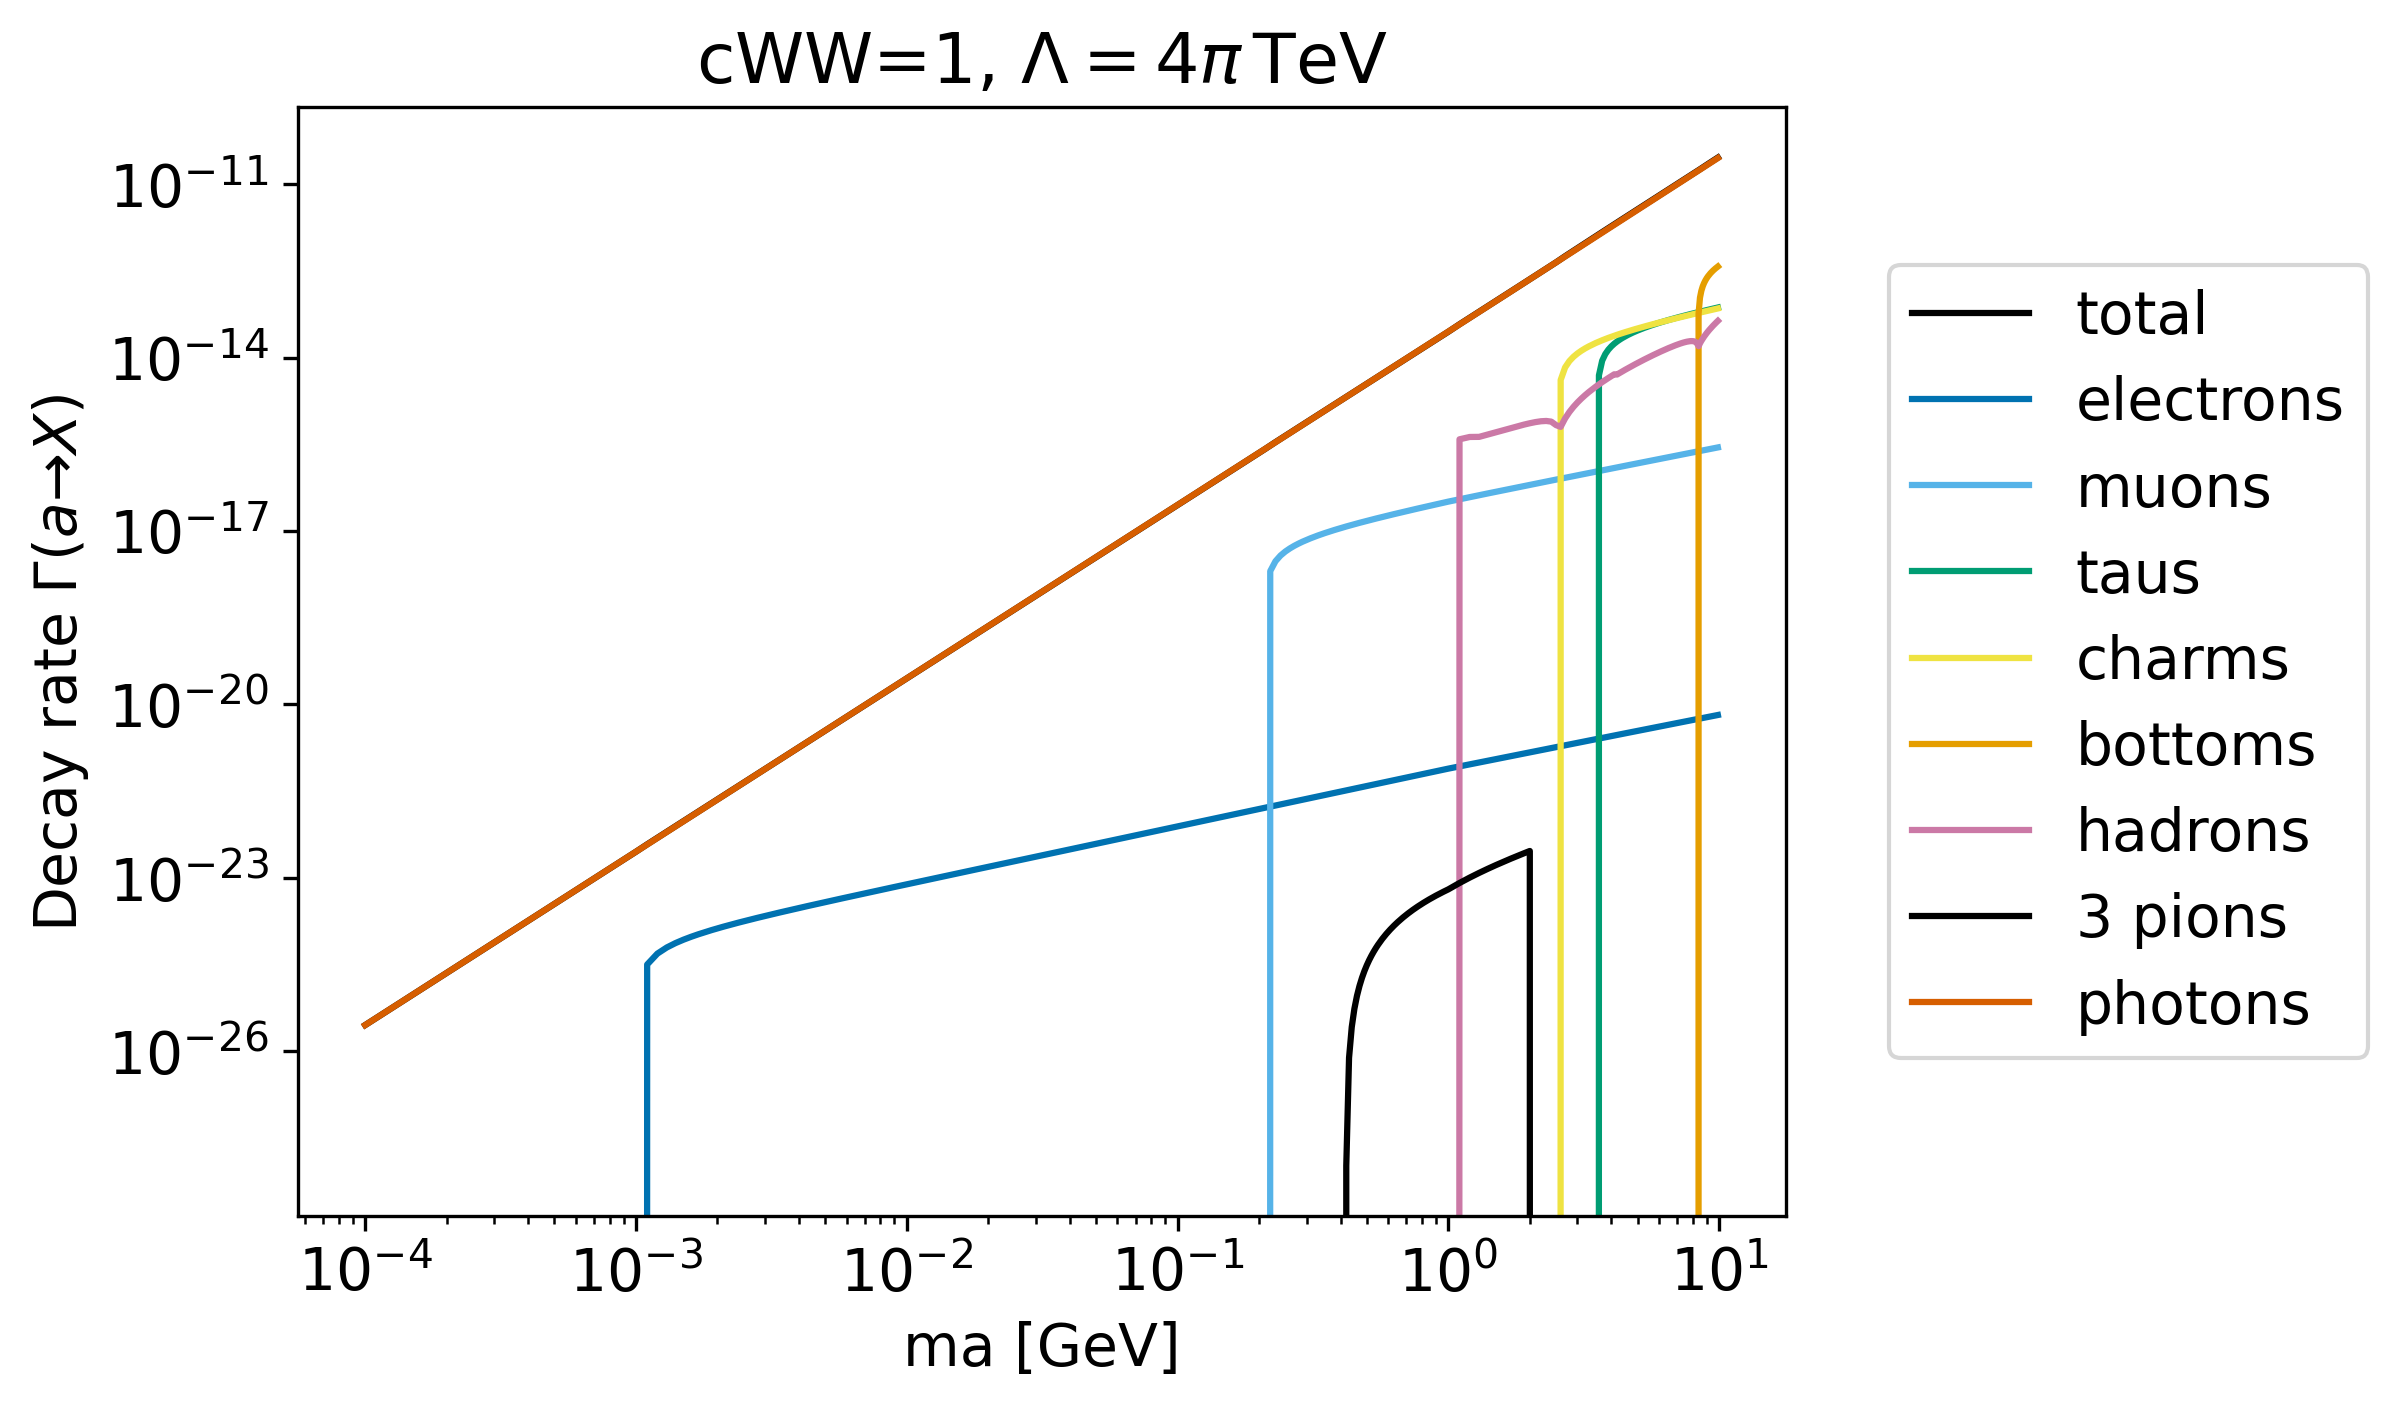

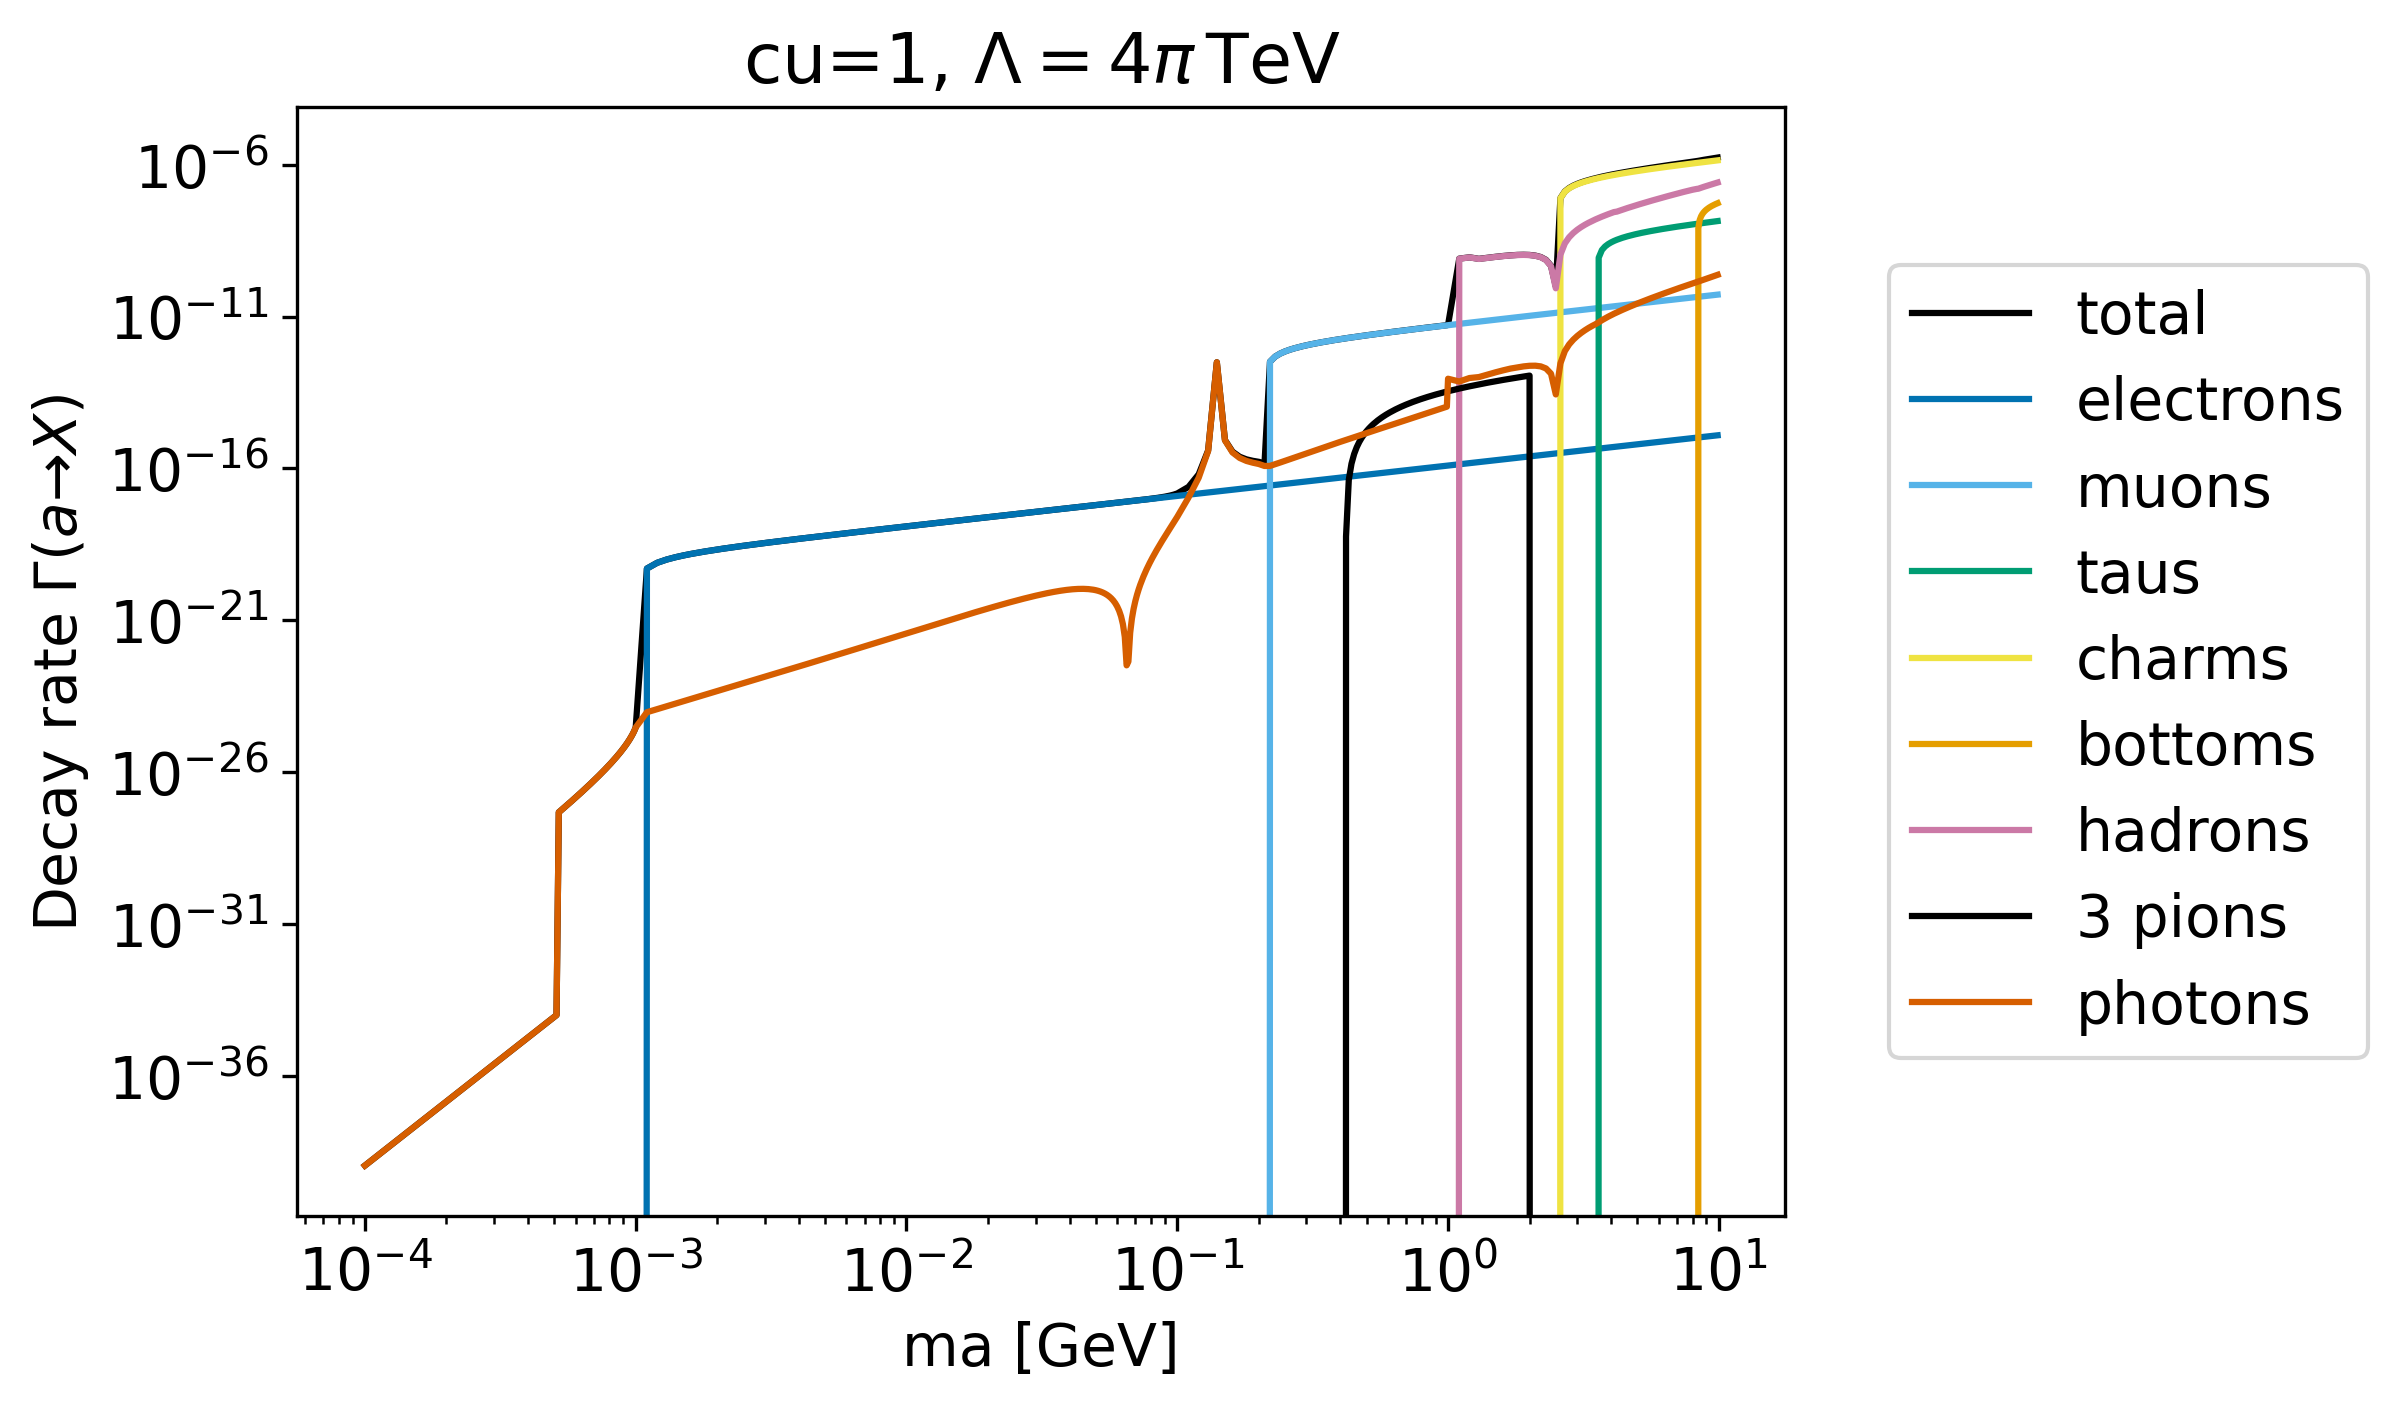

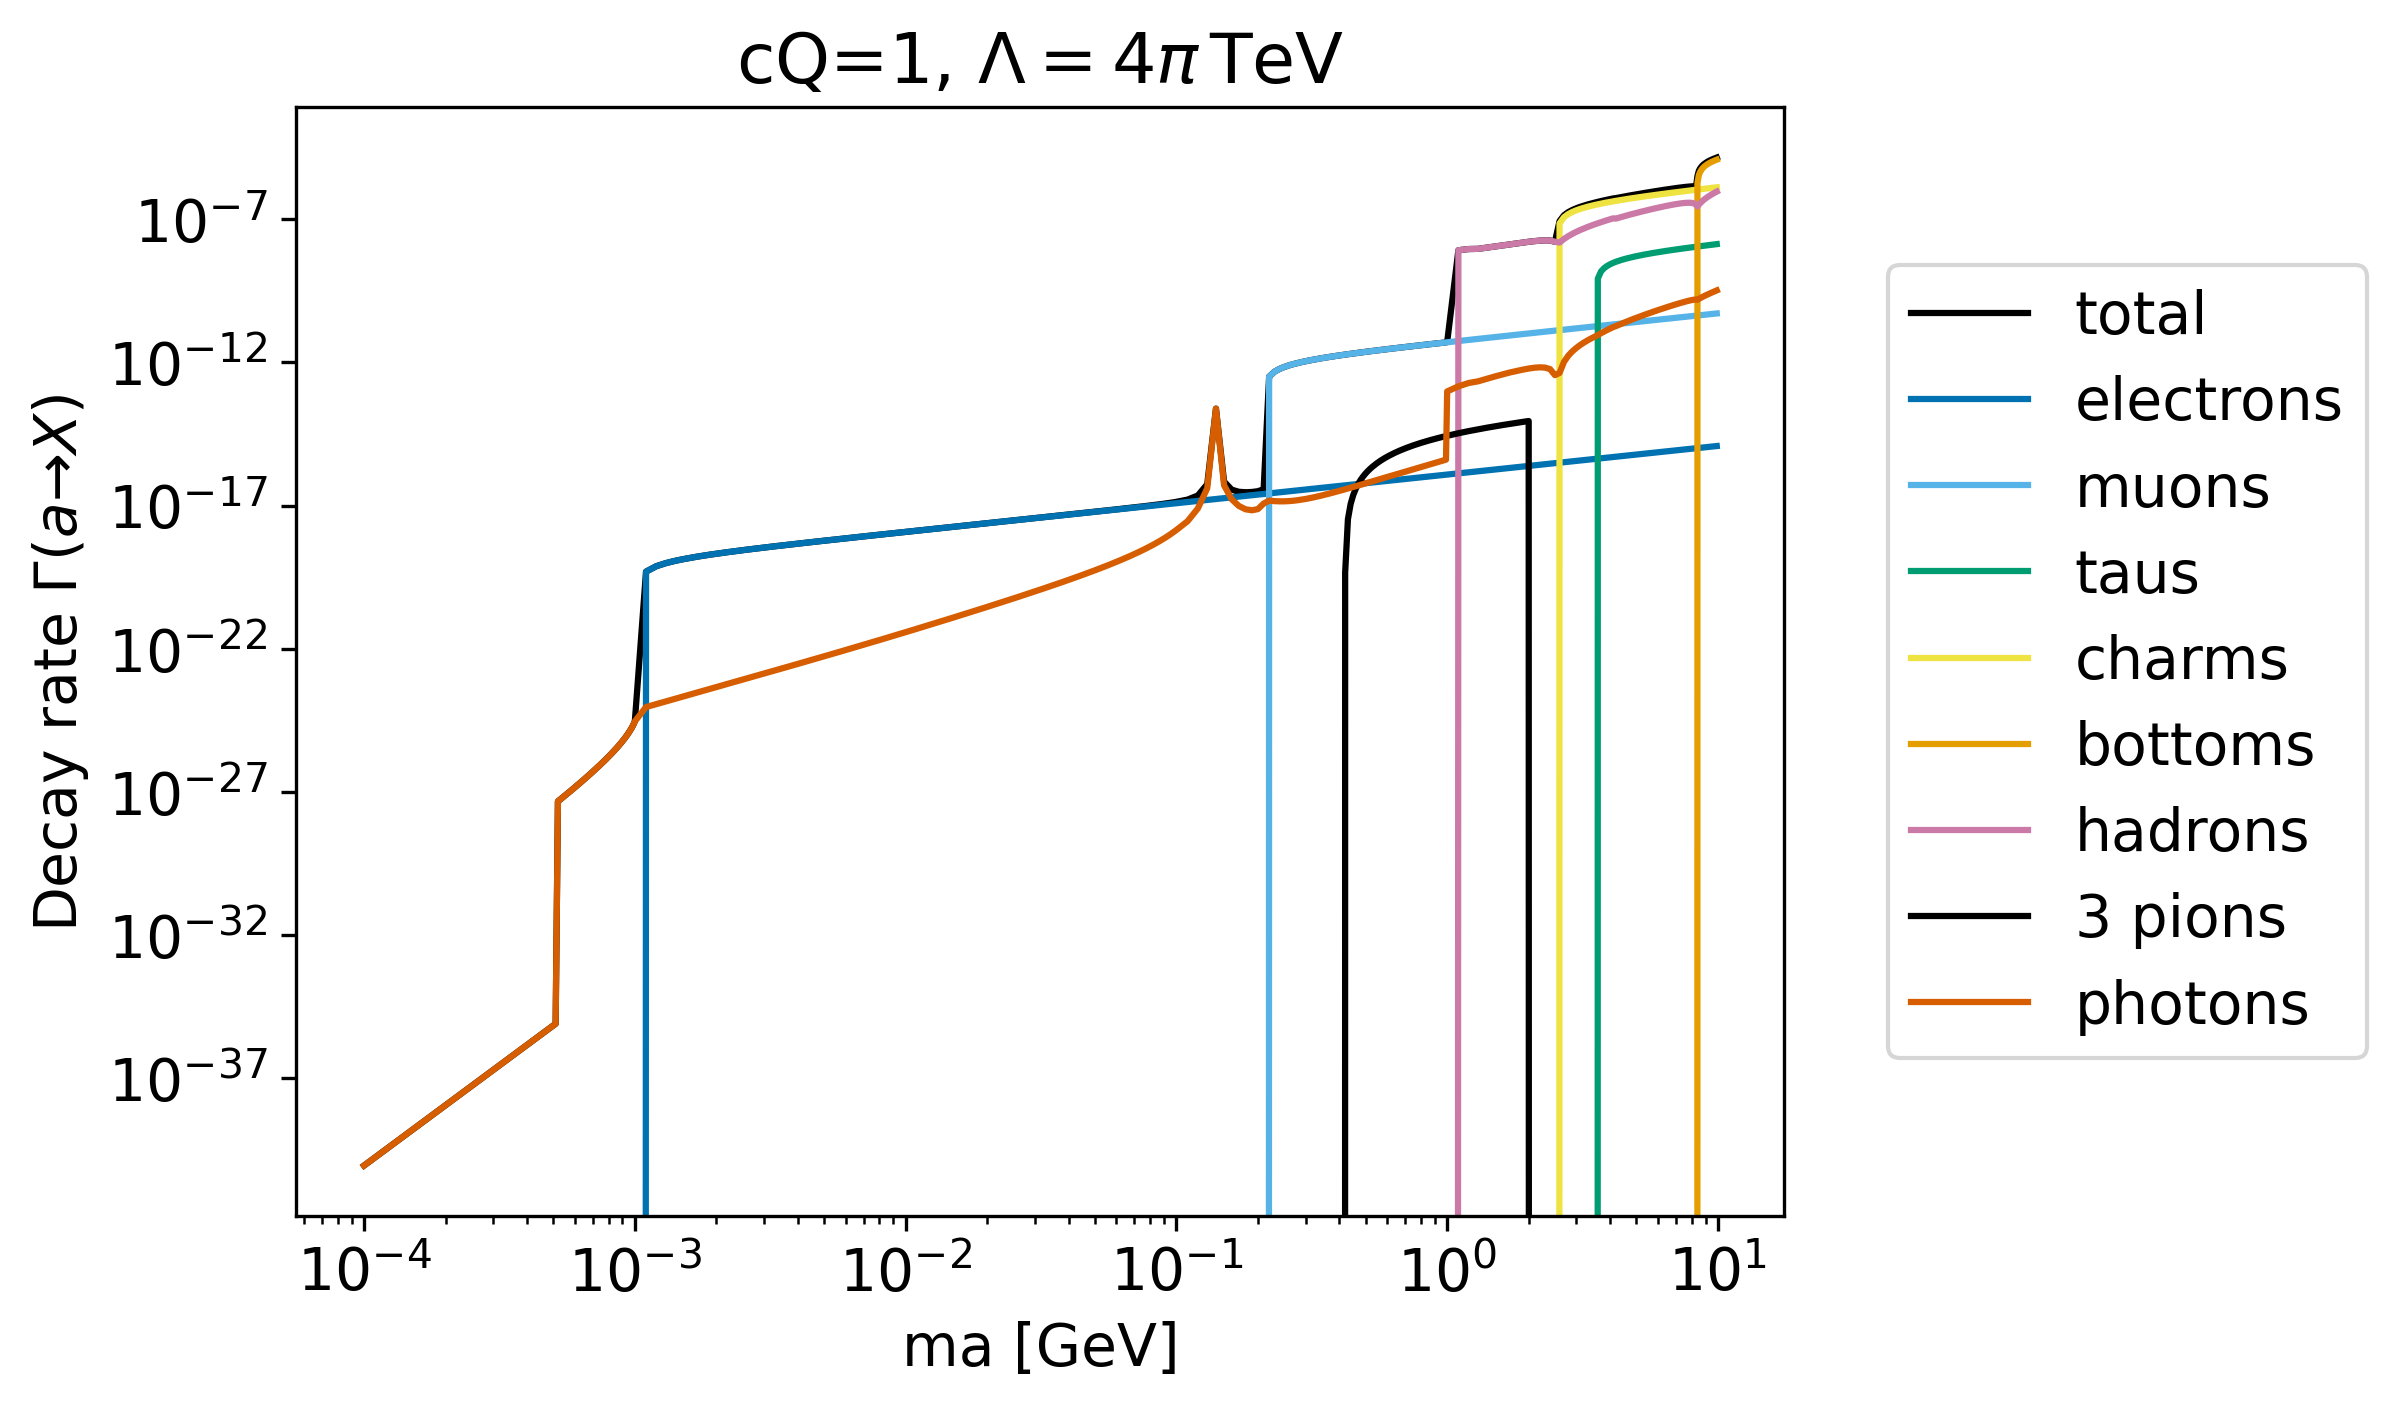

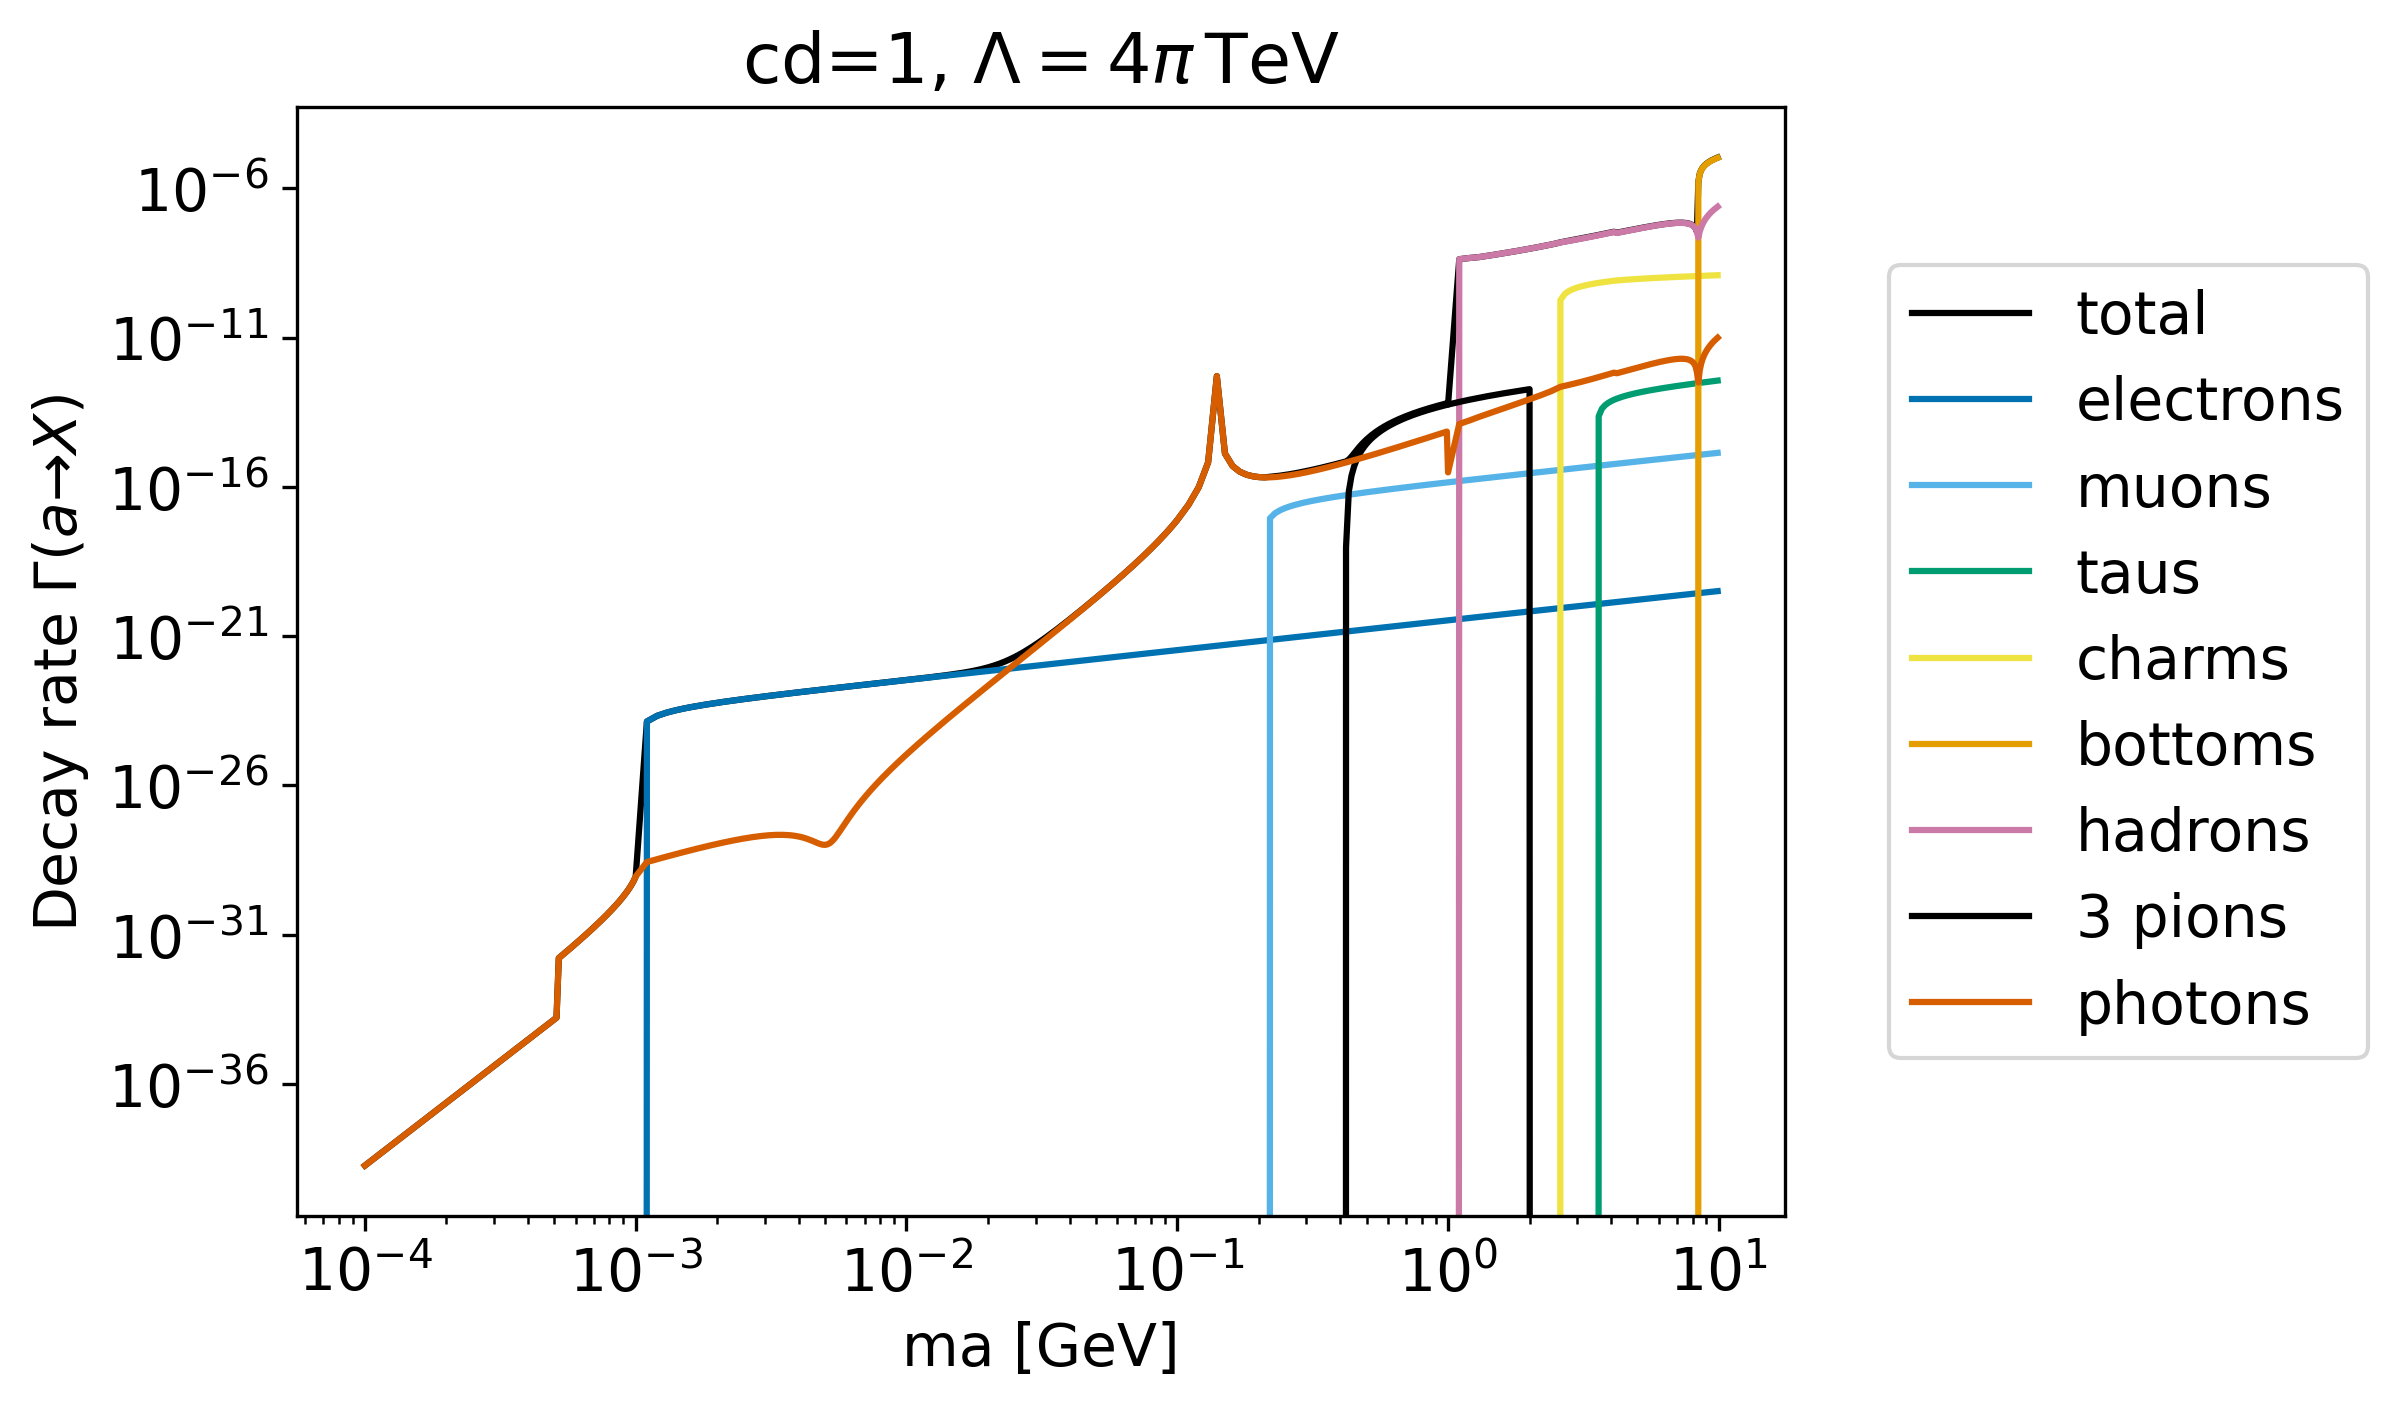

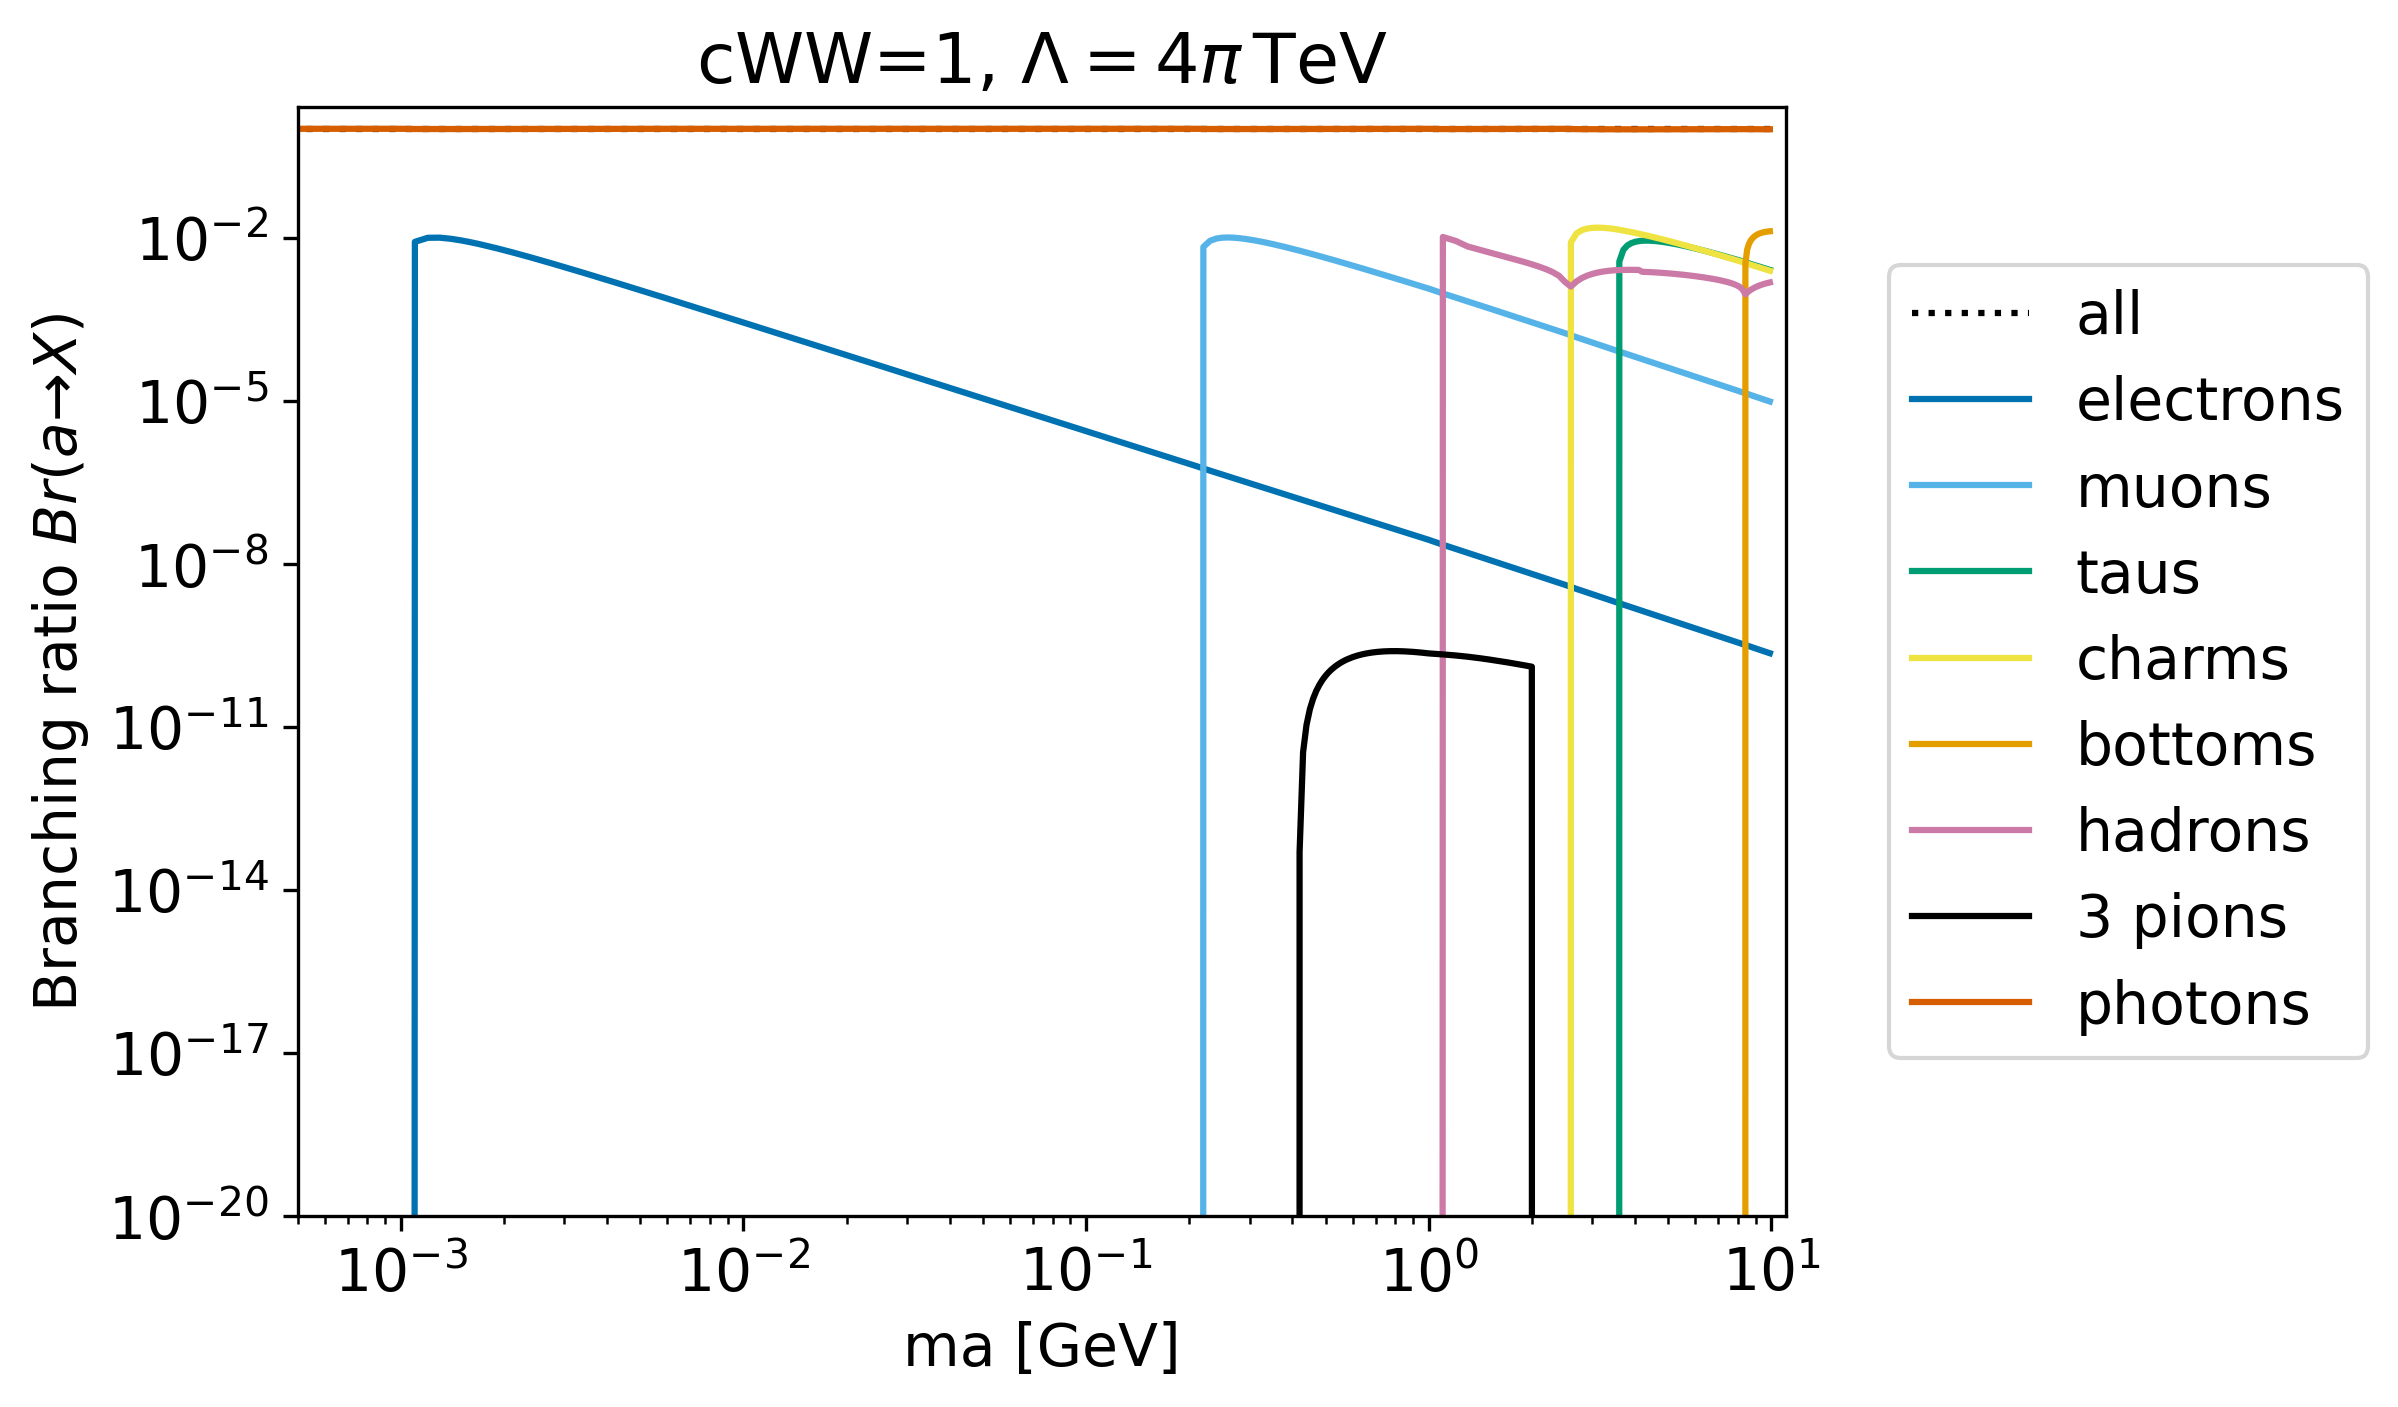

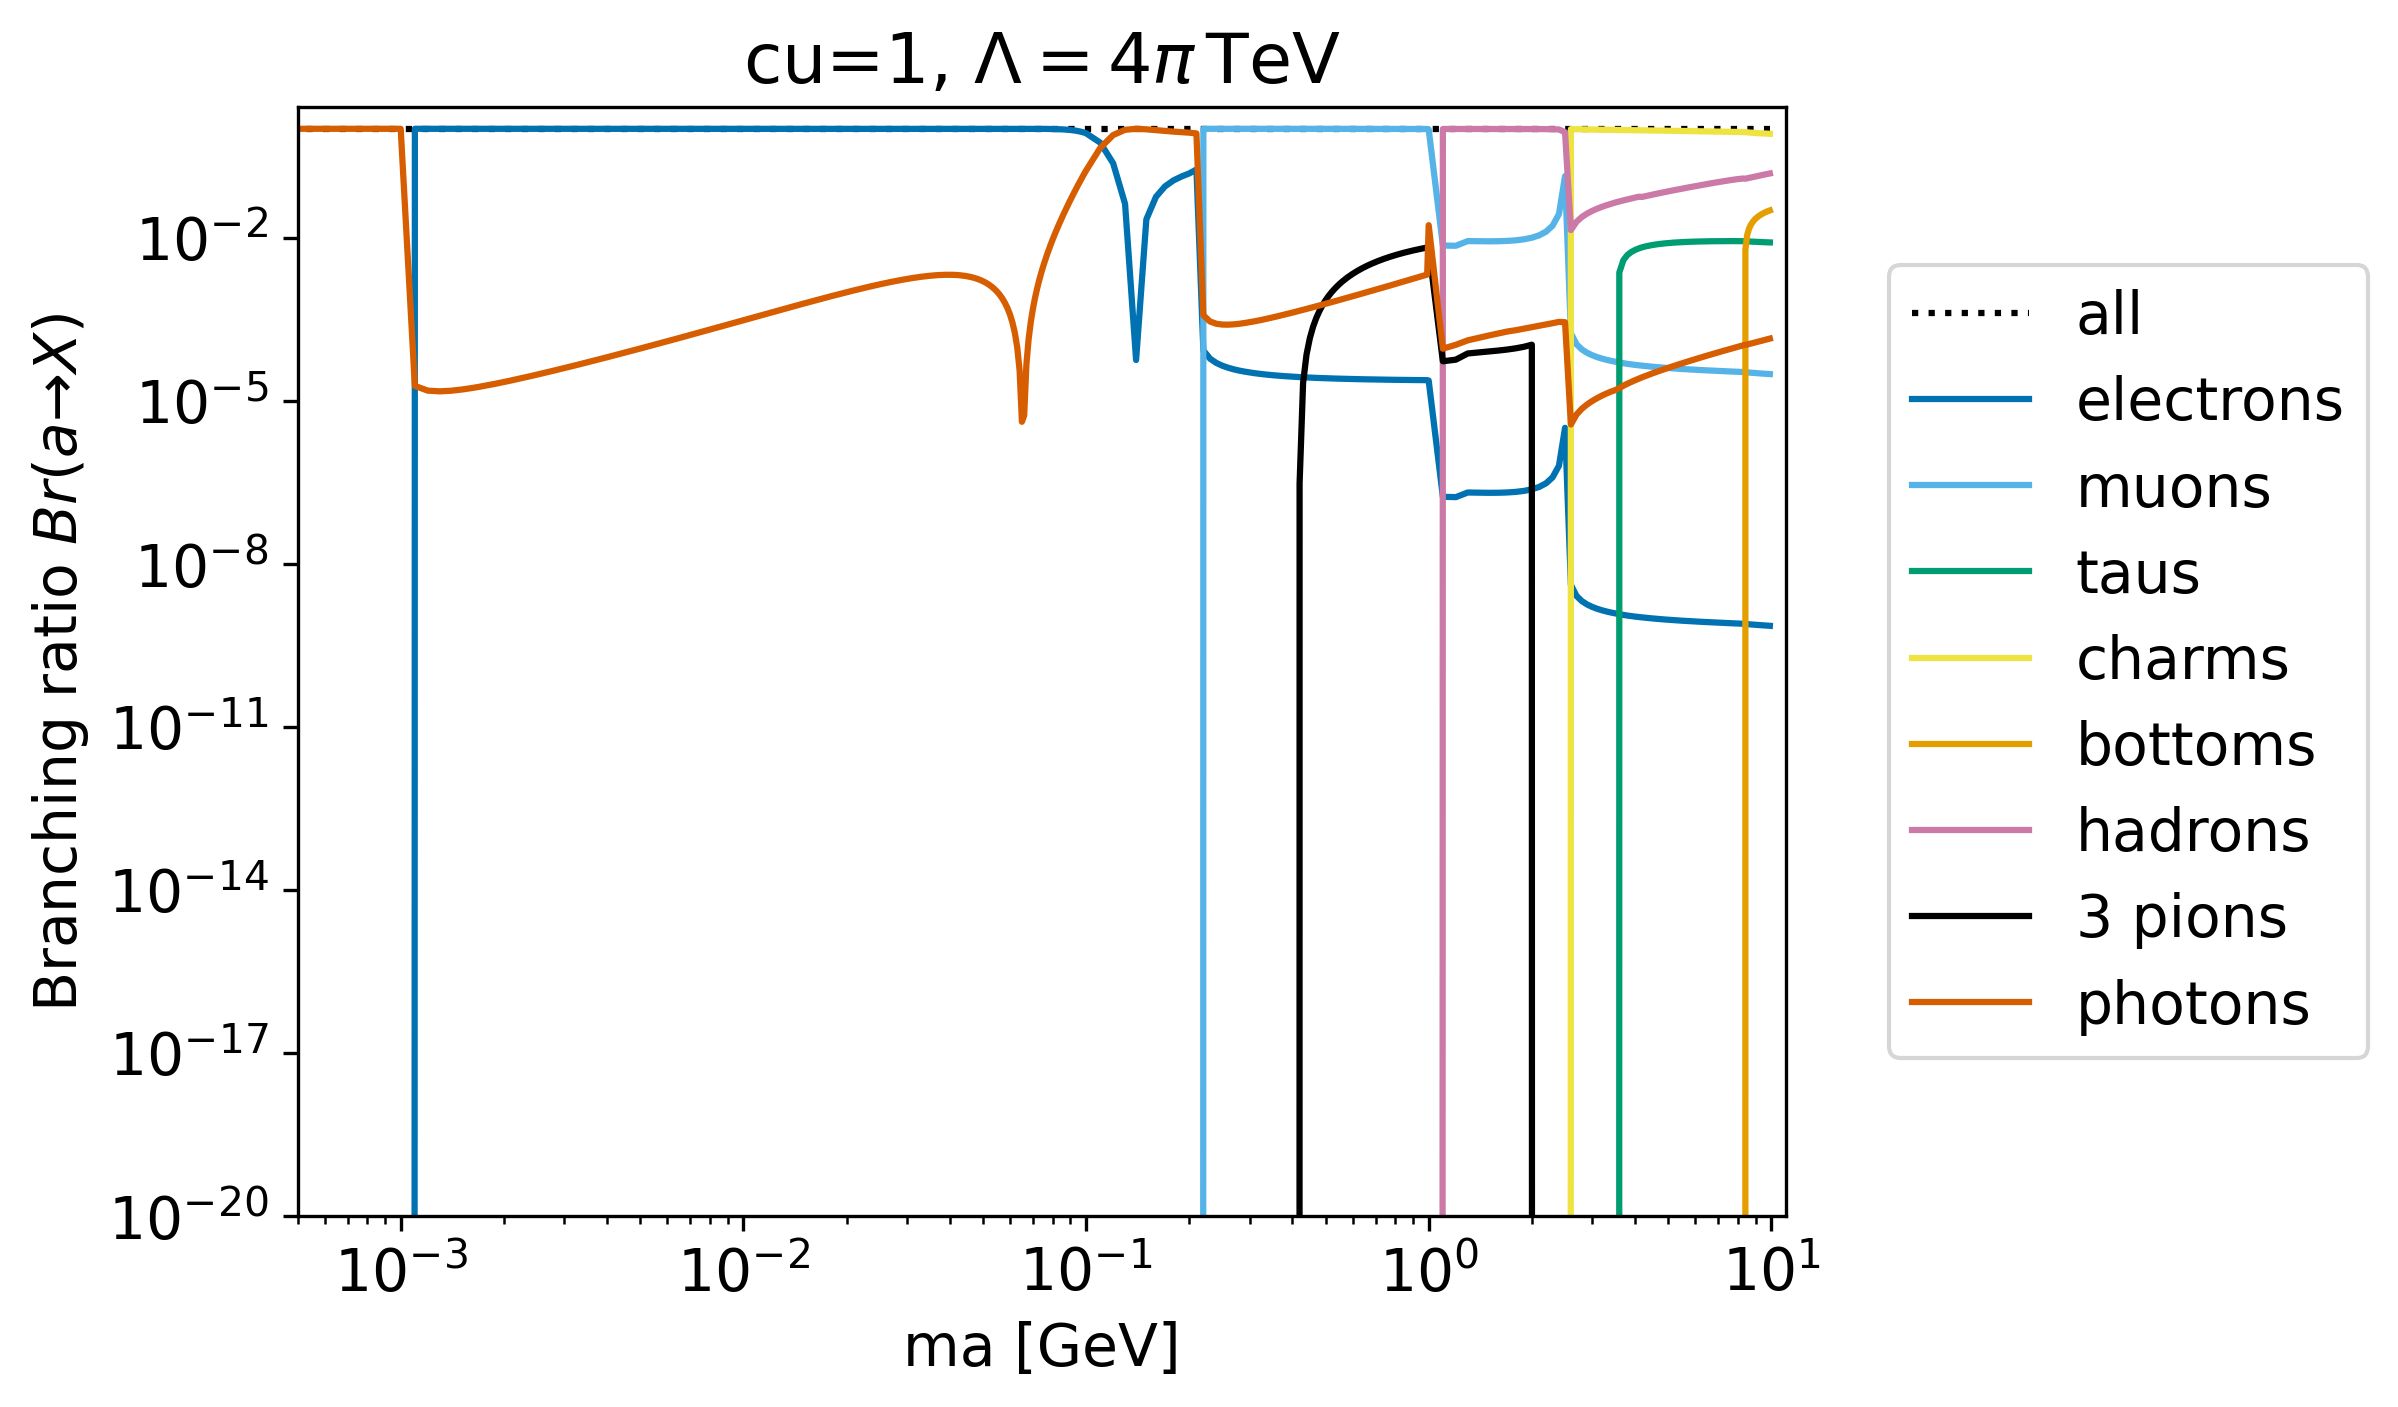

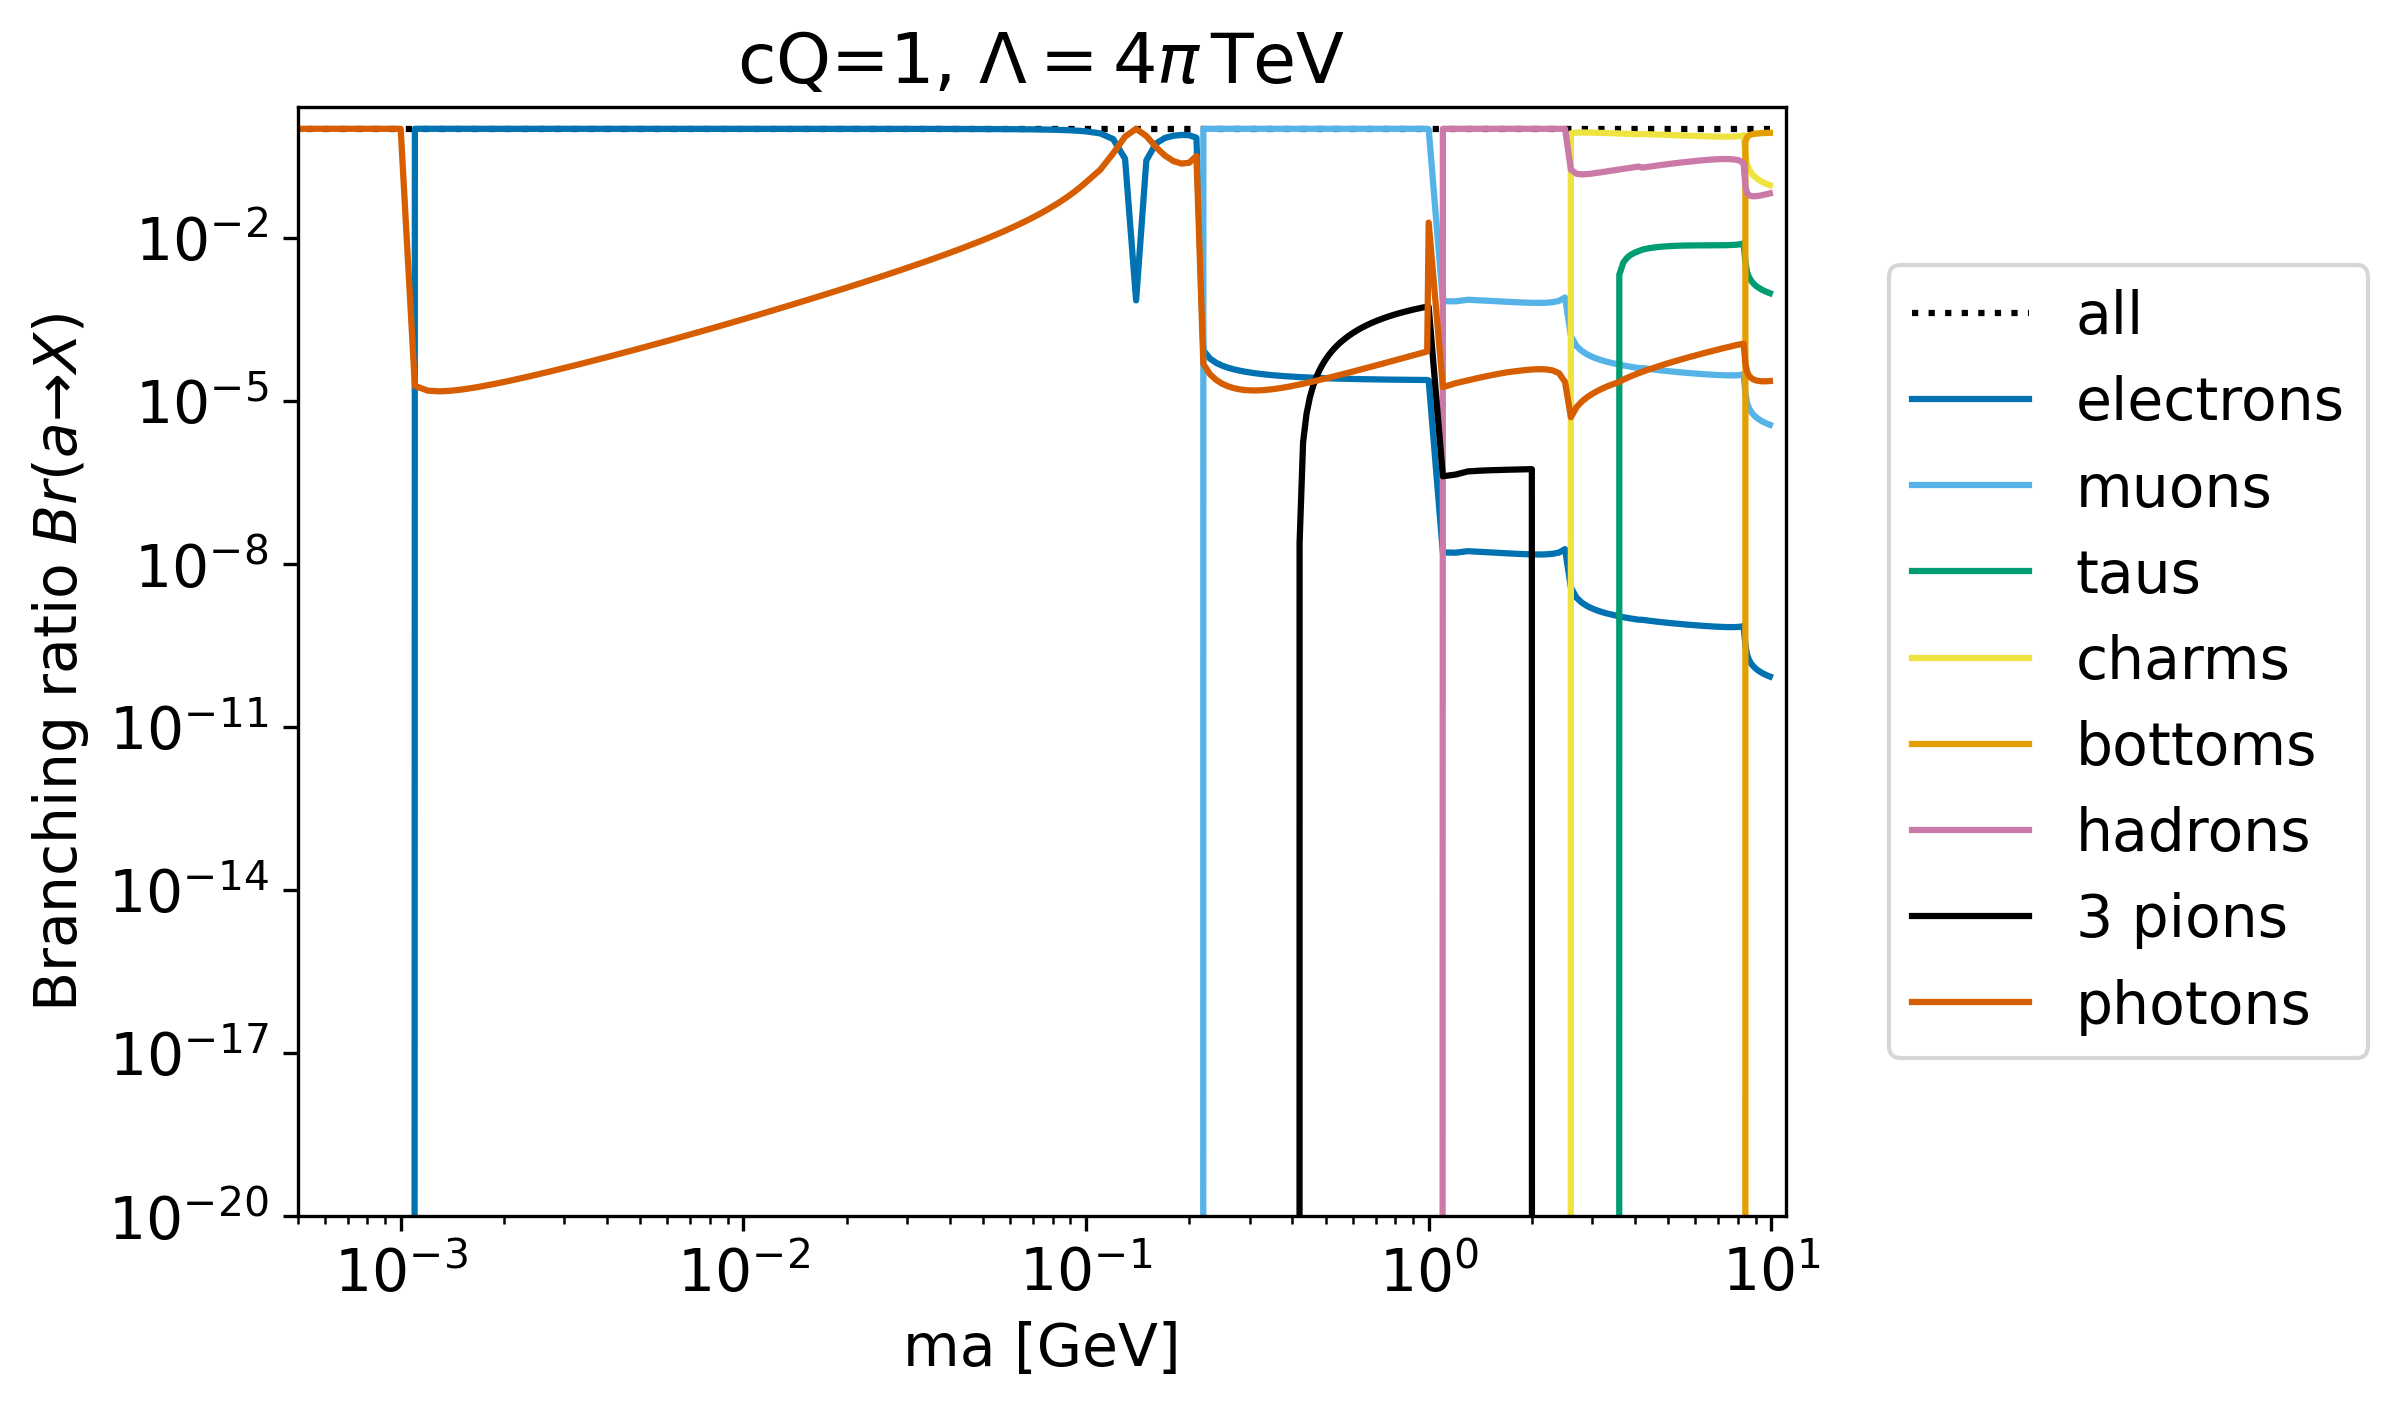

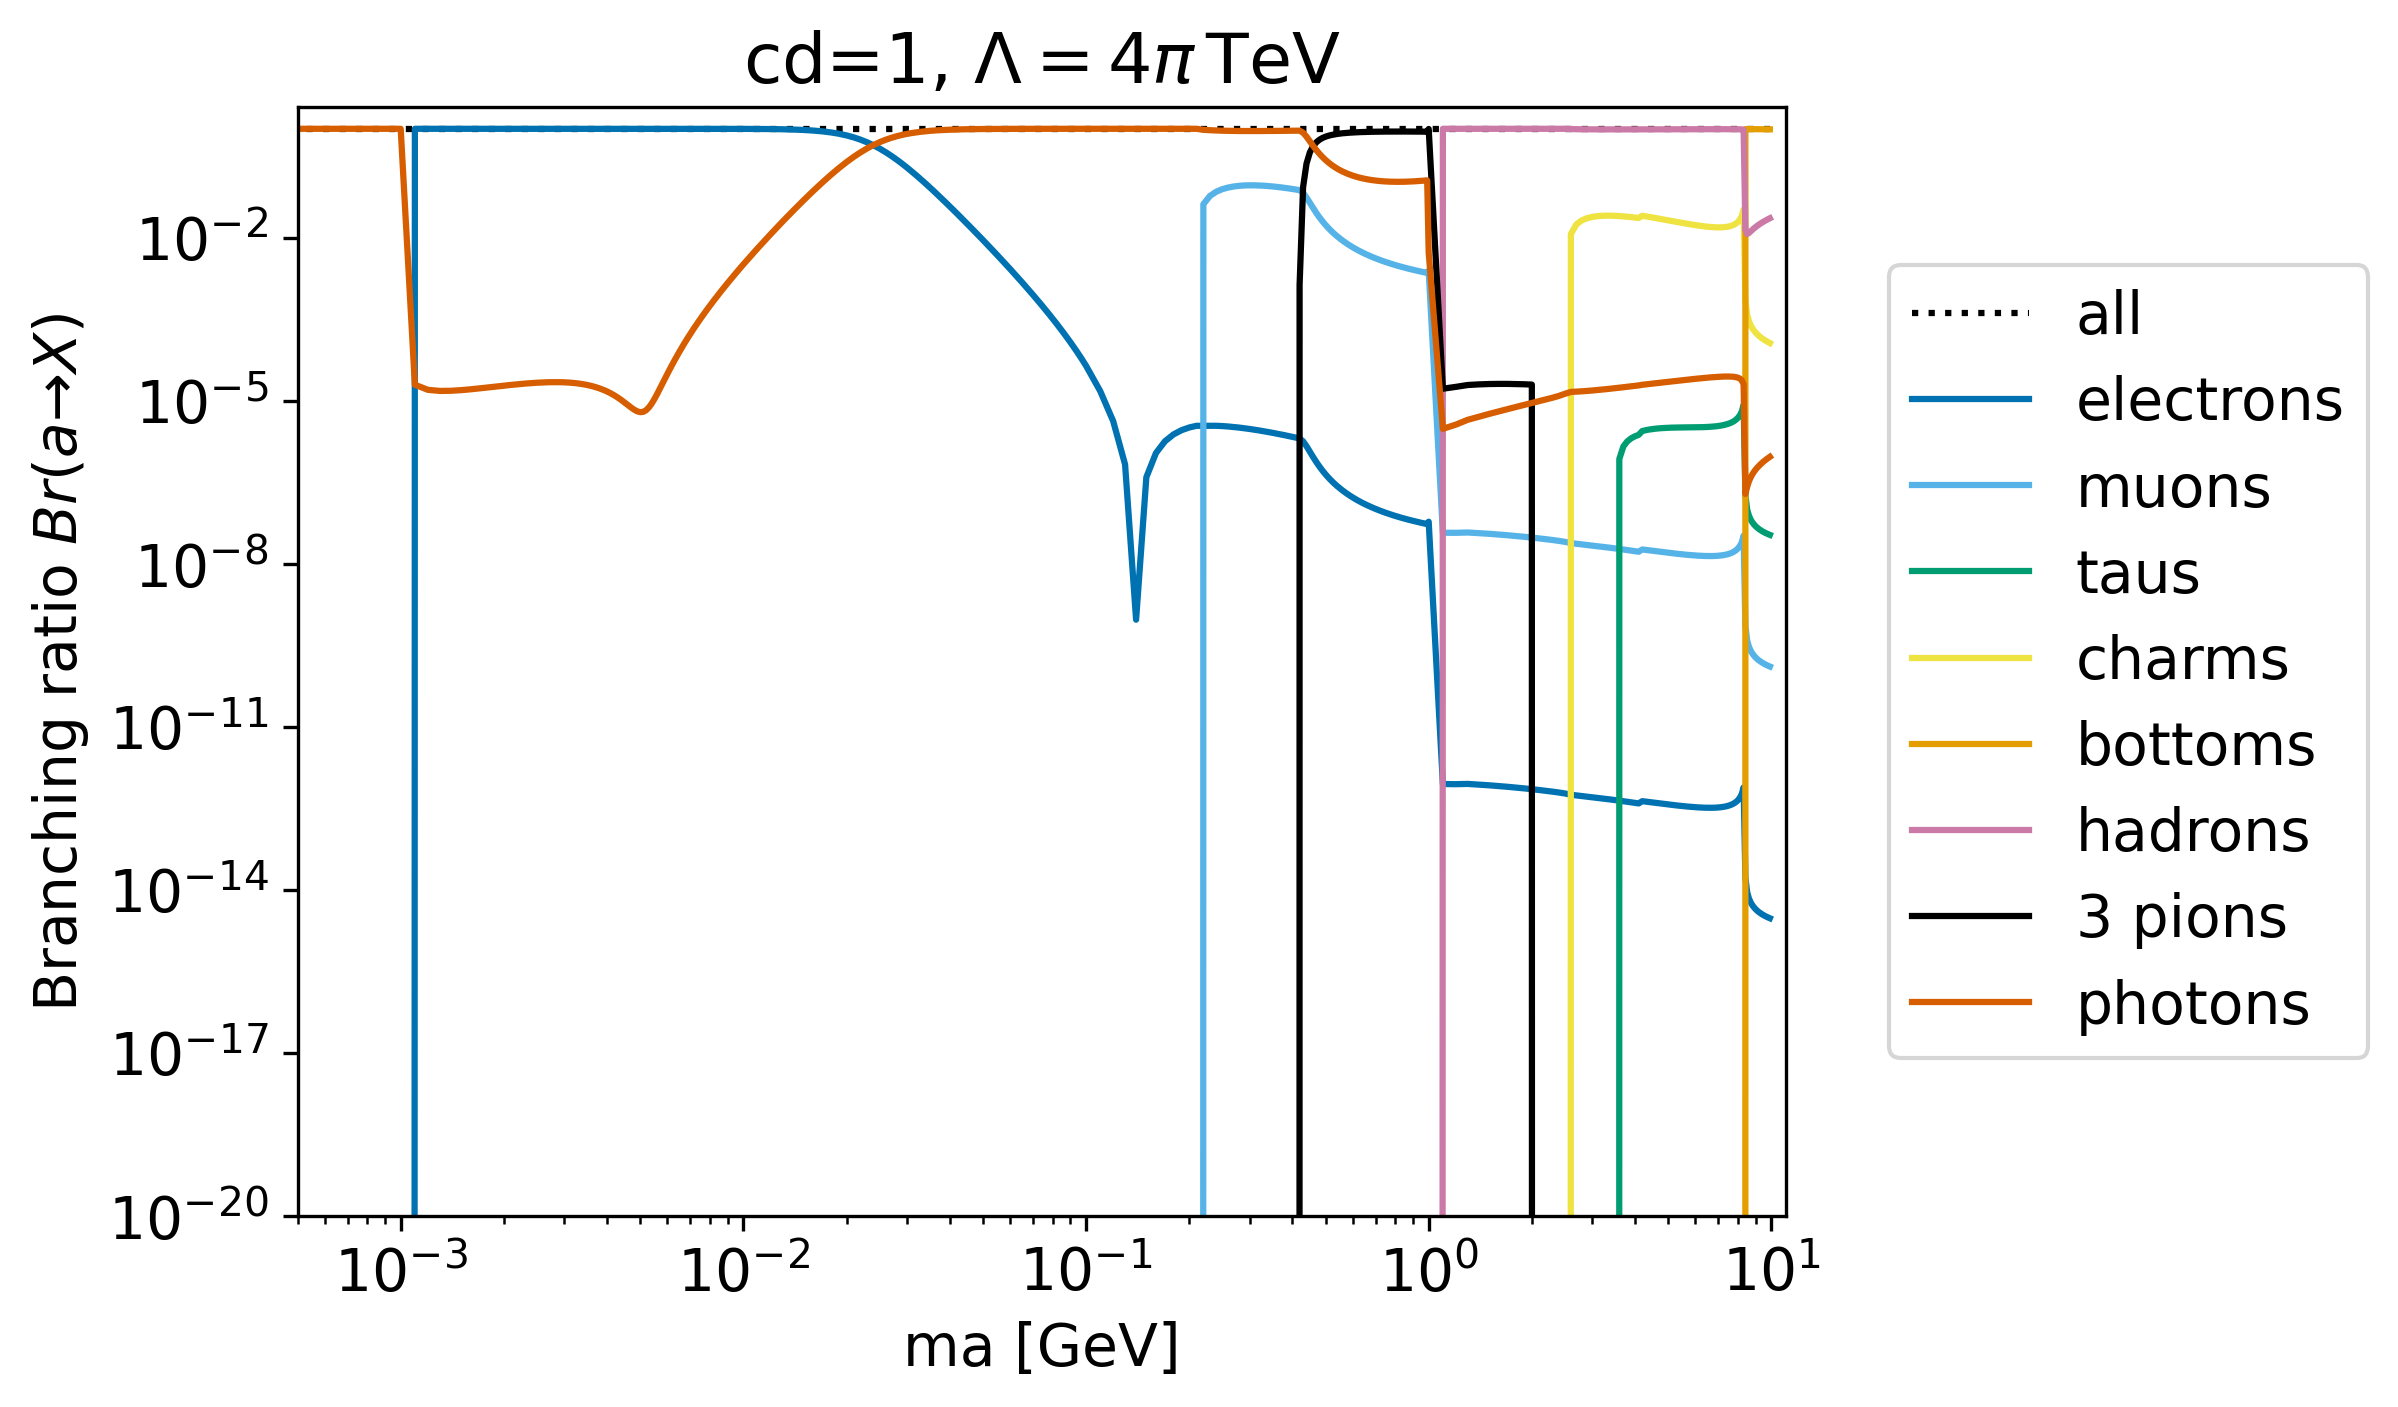

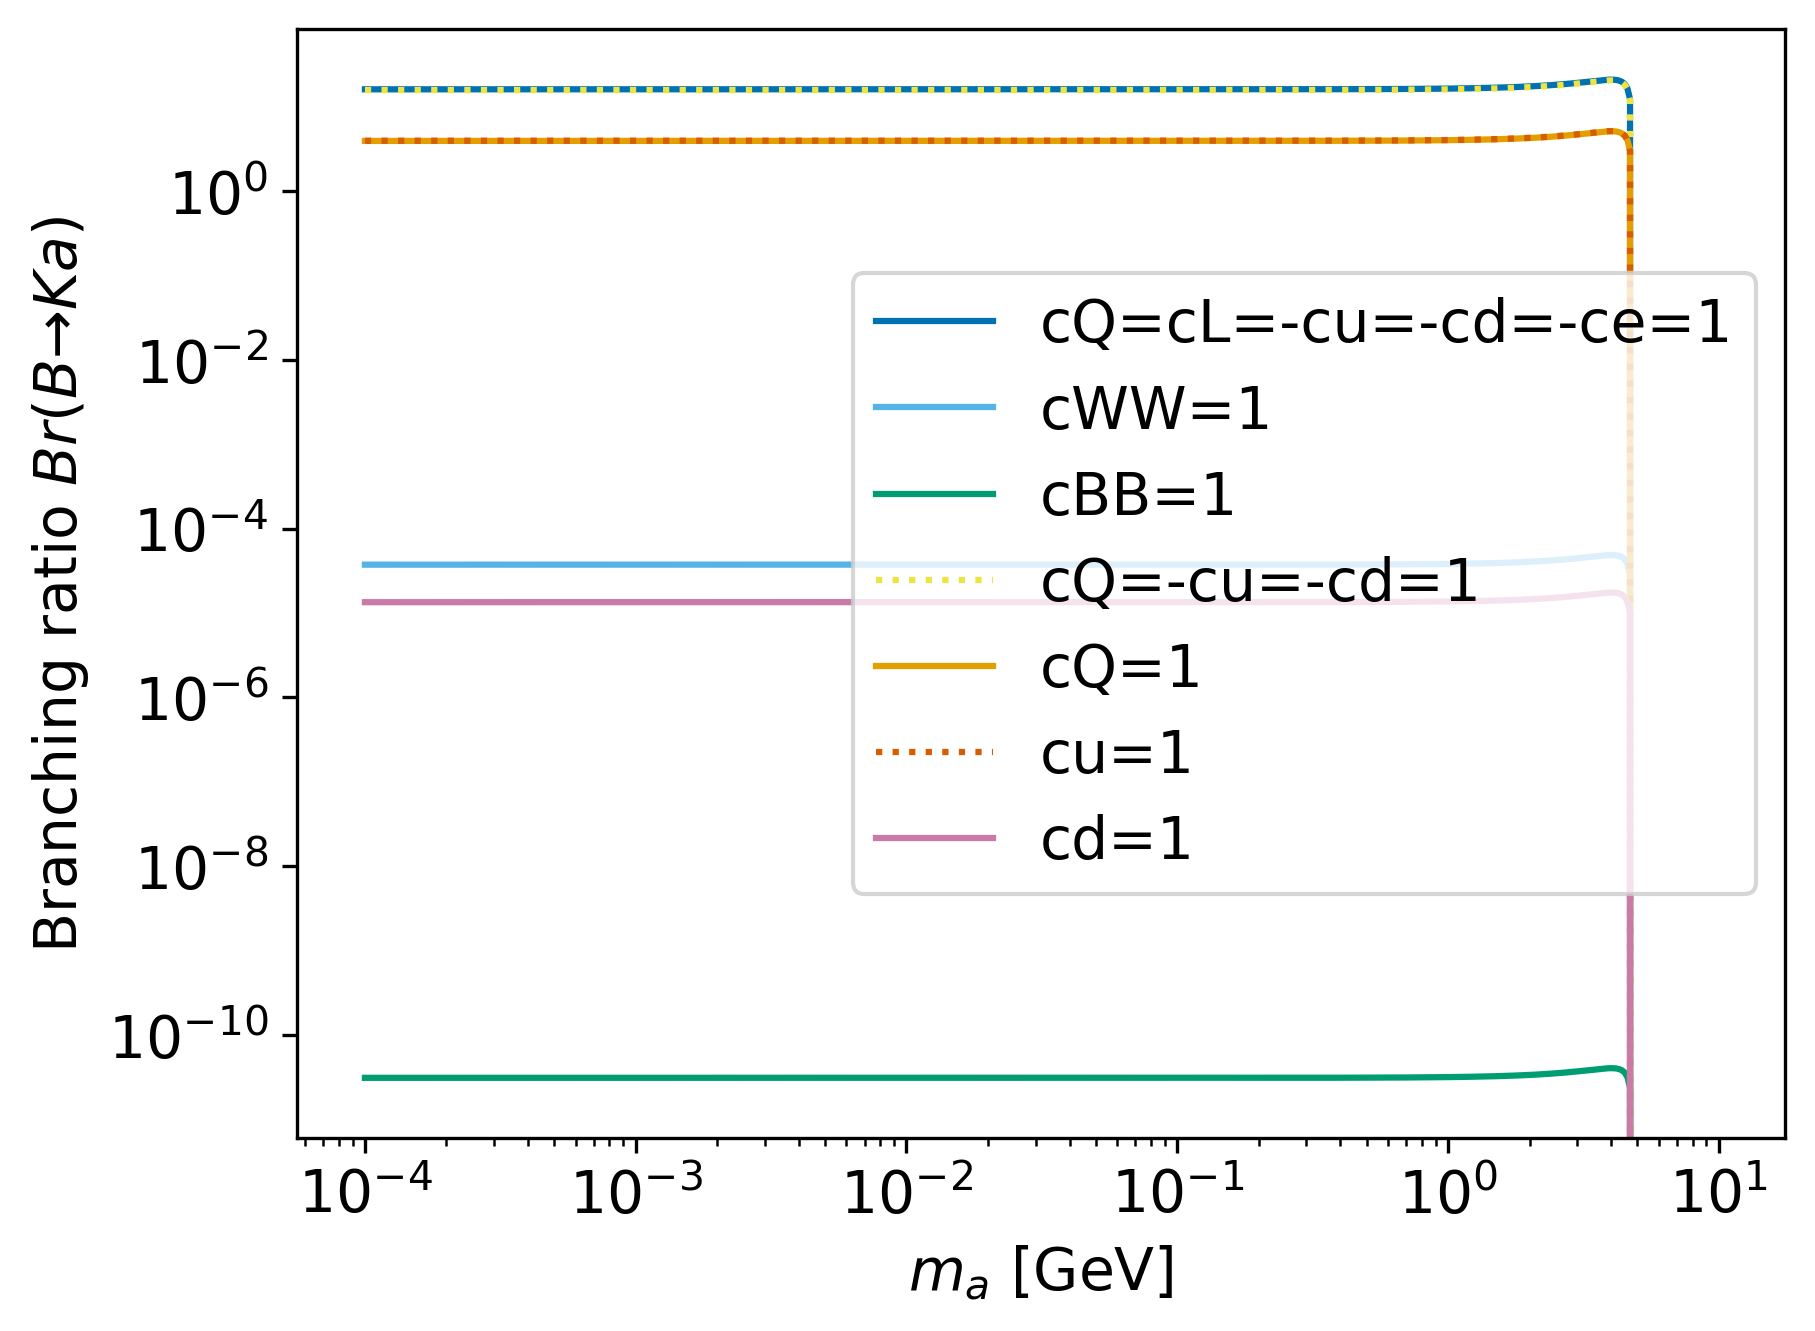

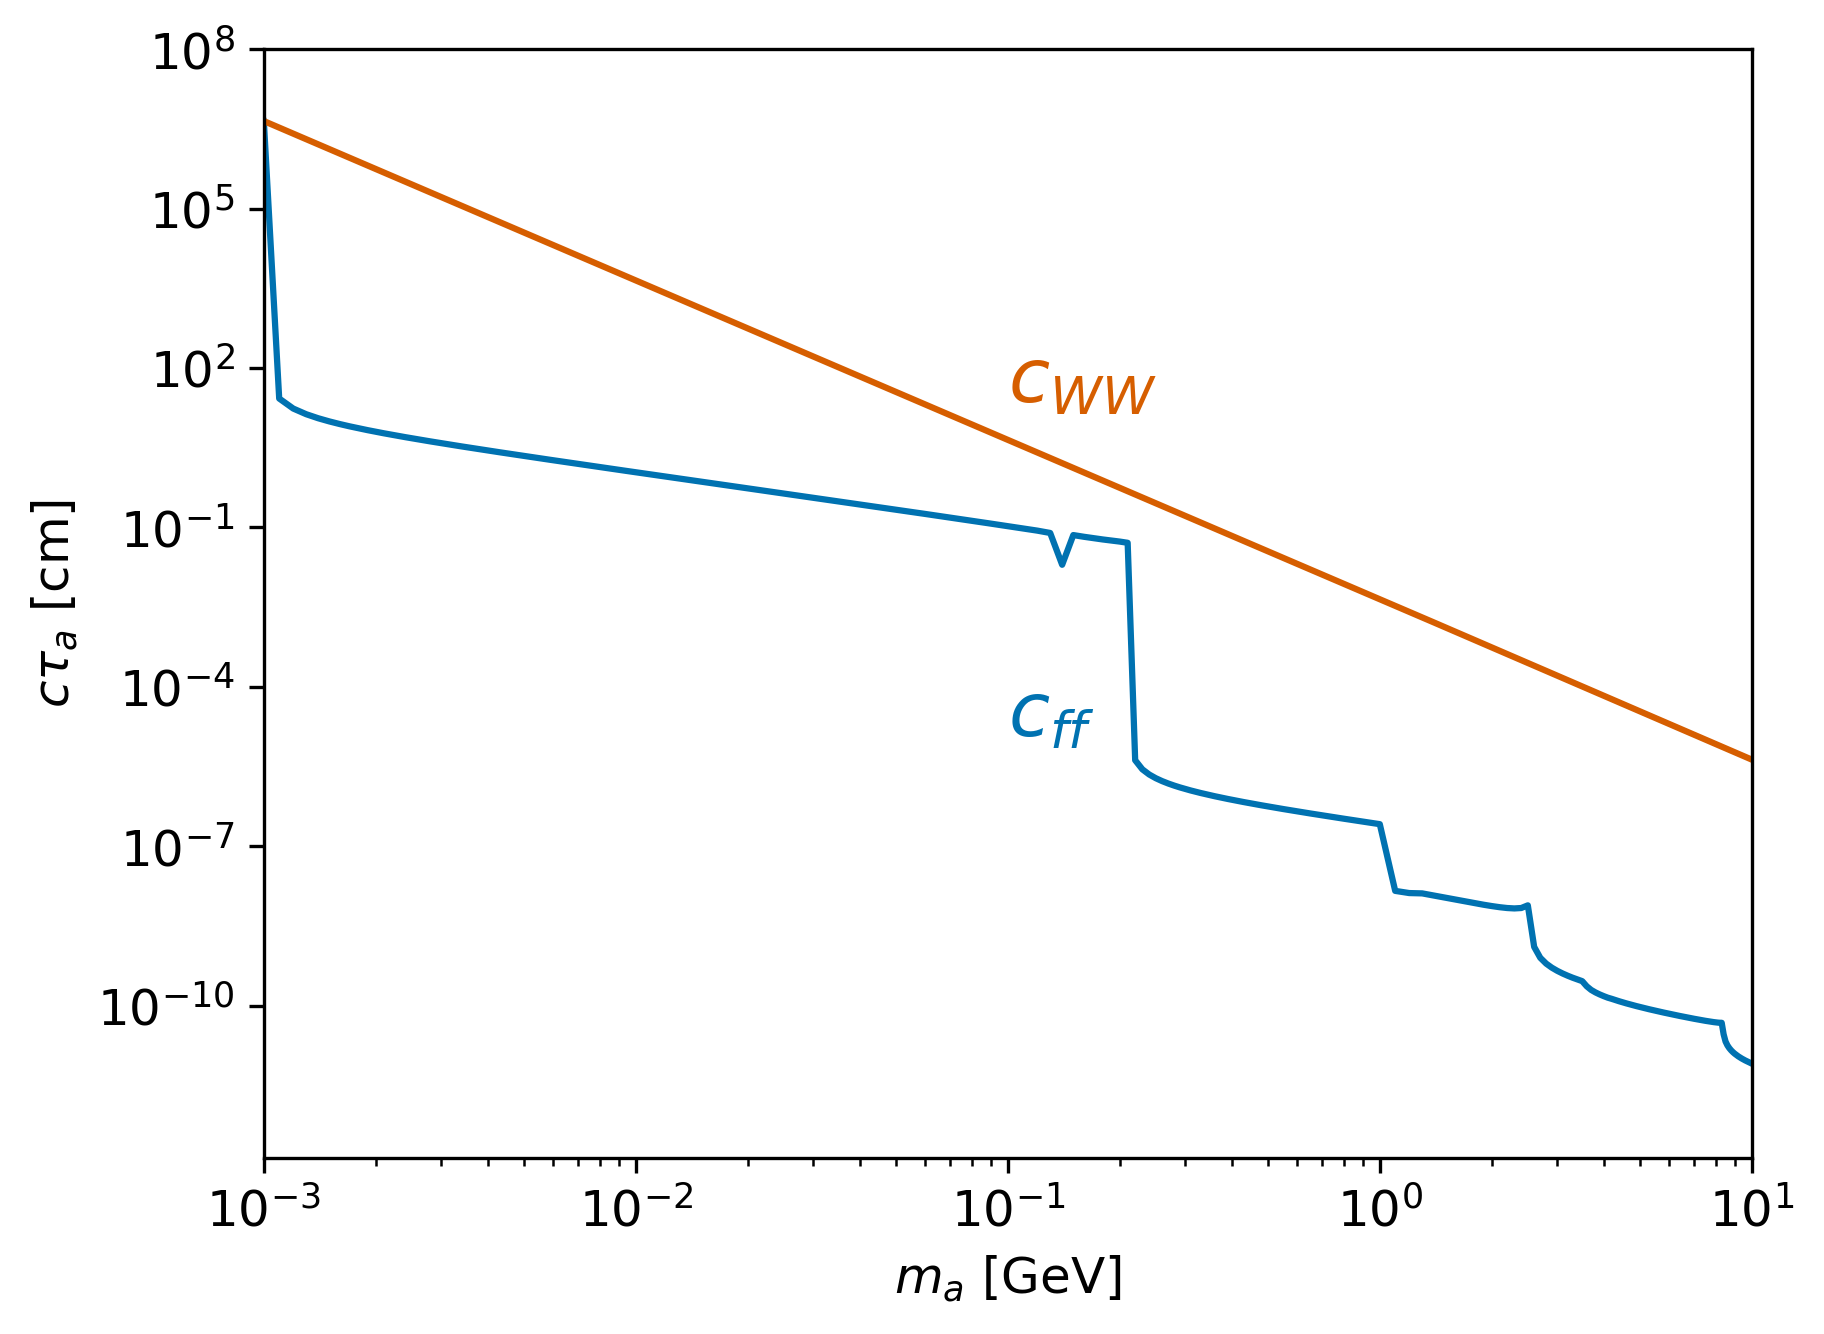

/home/stasya/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


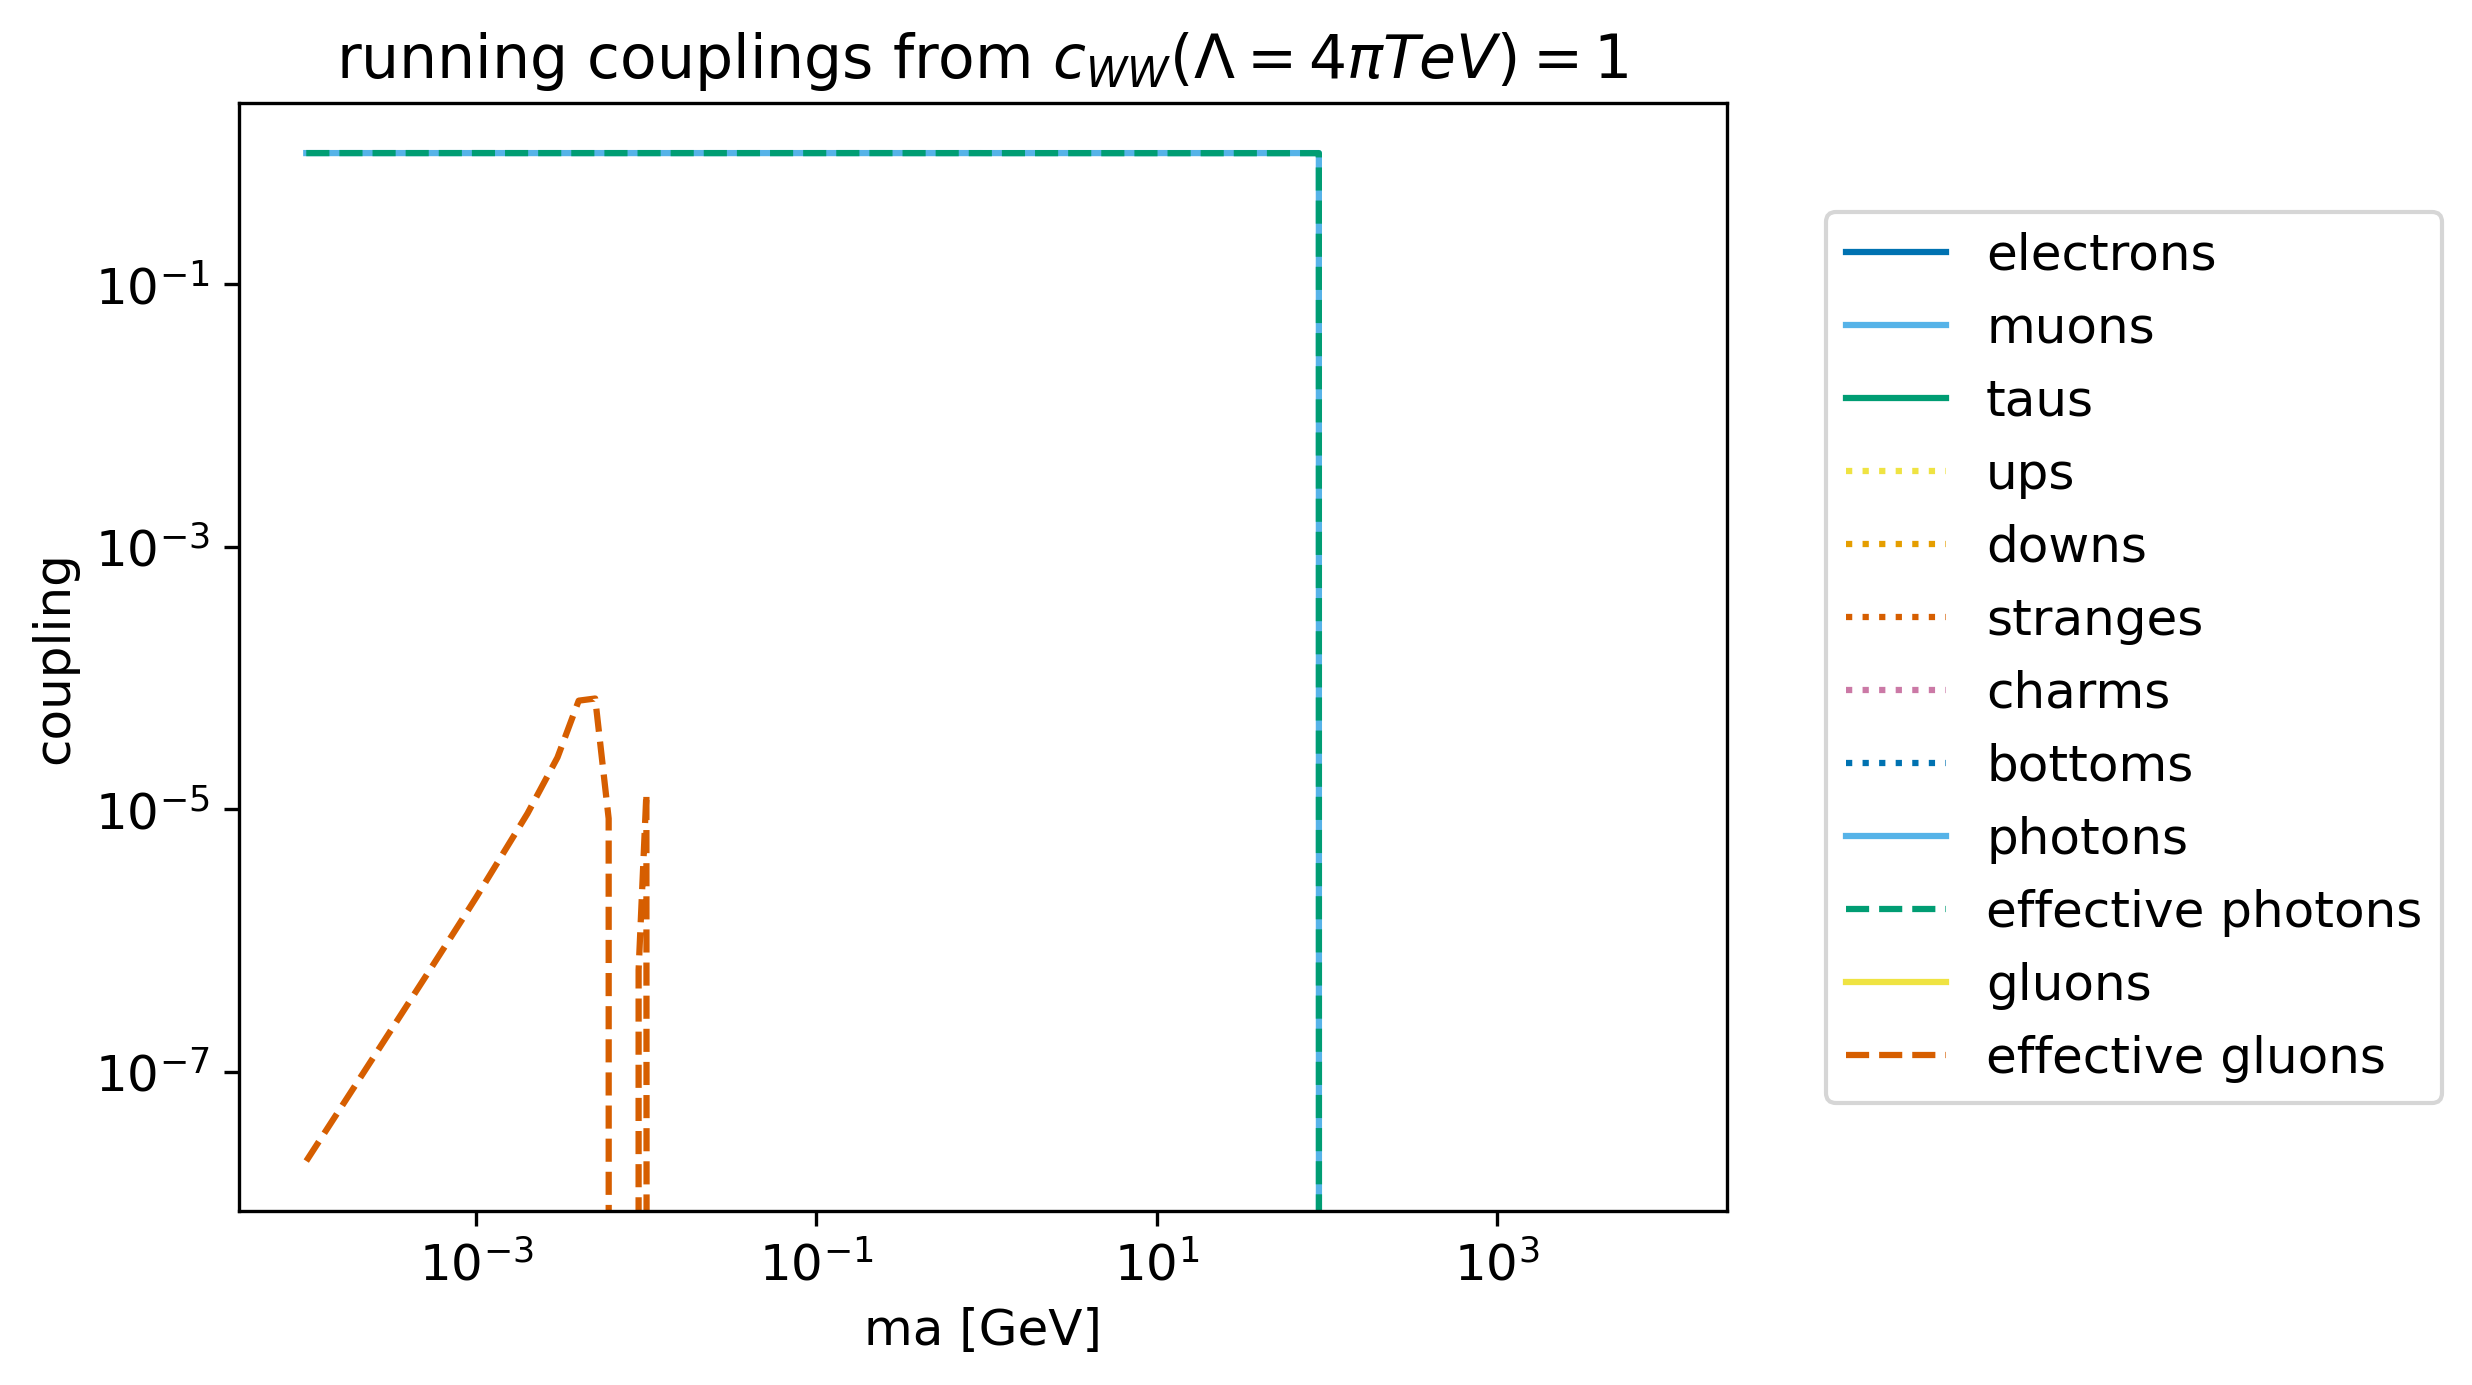

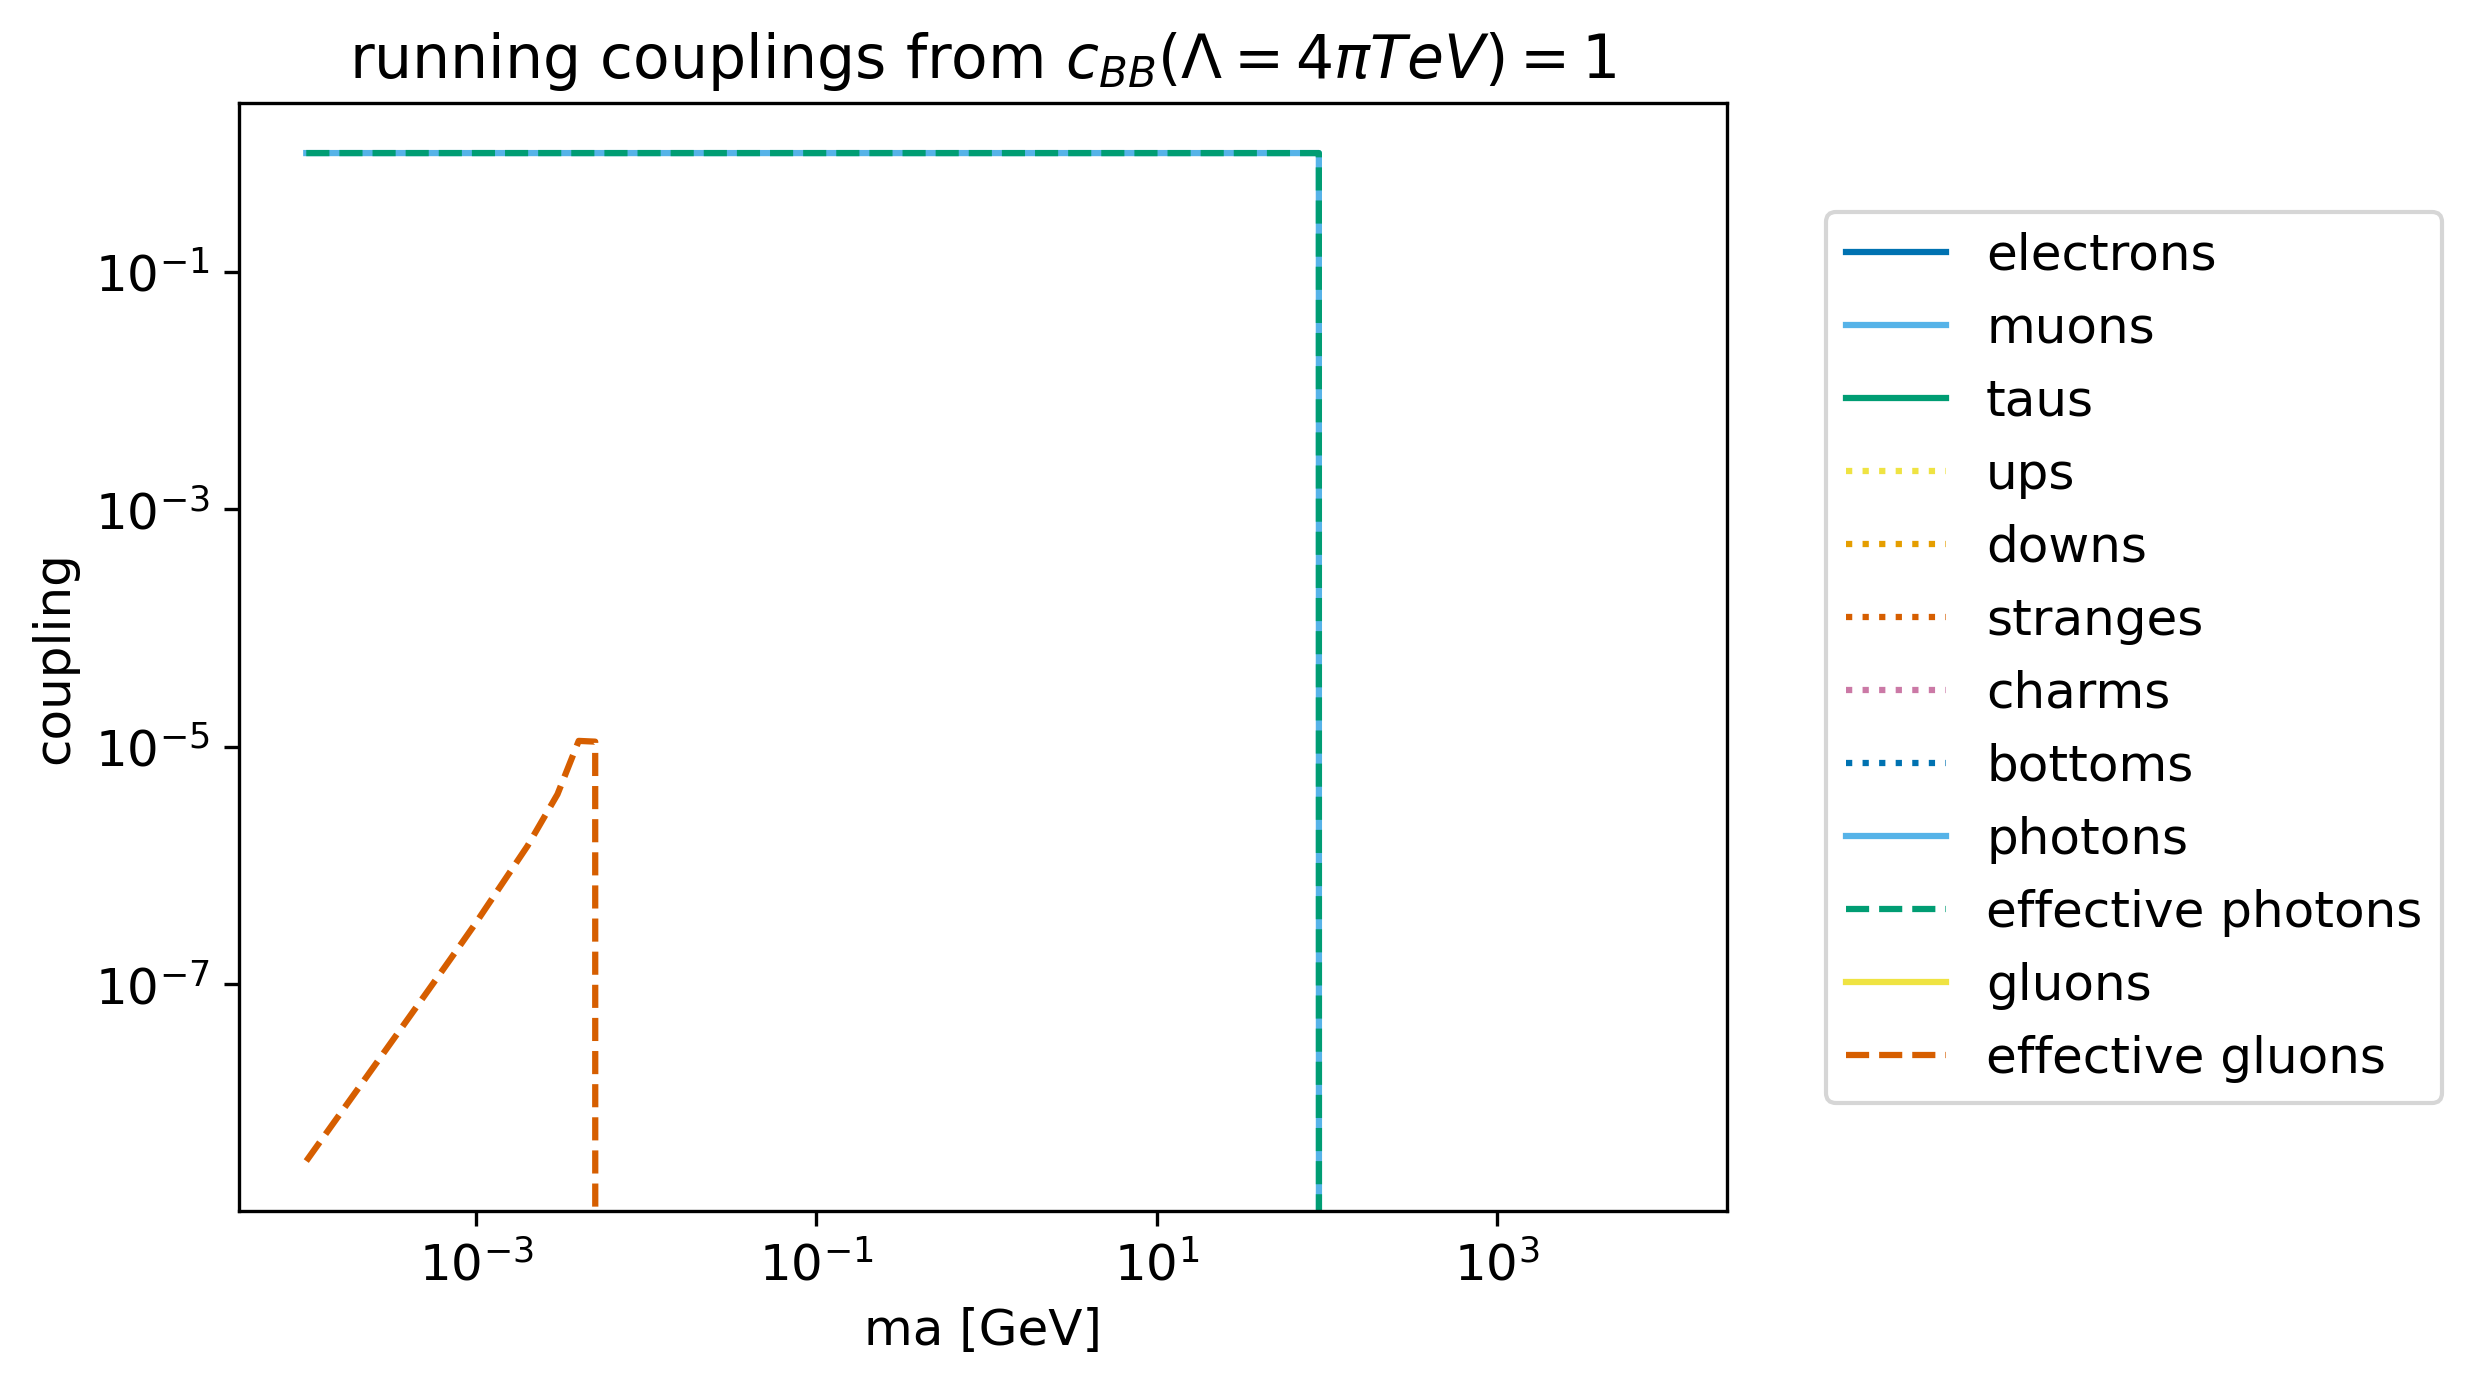

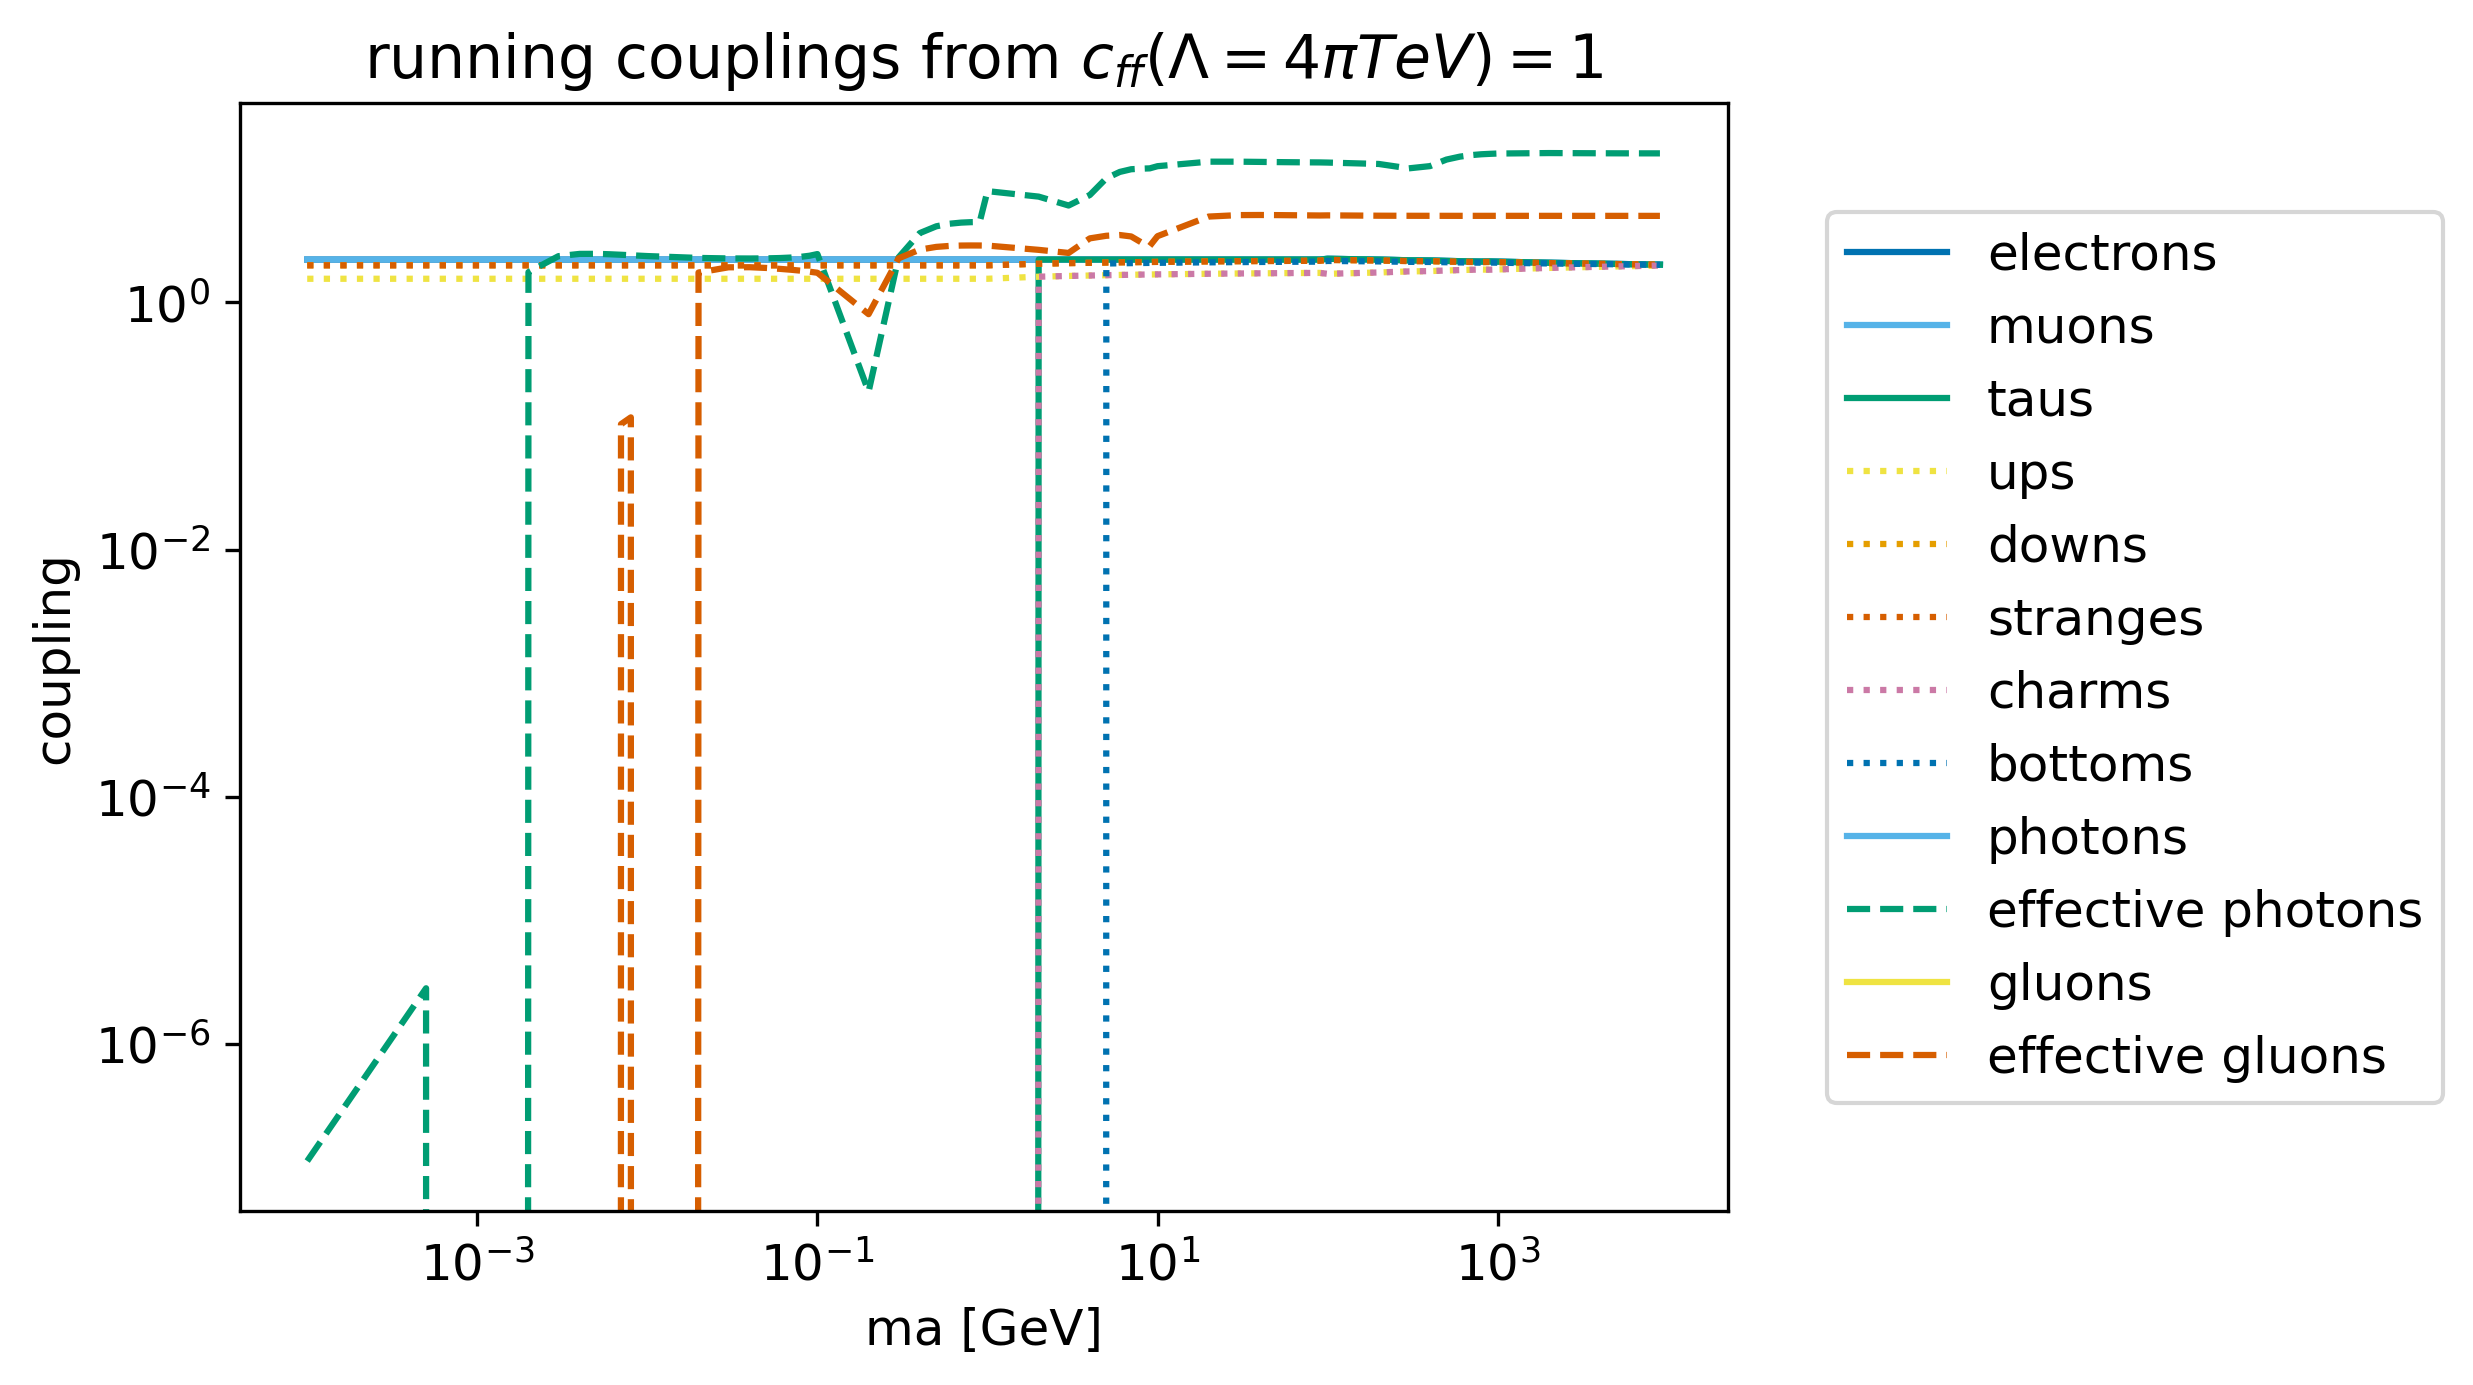

In [5]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_BRs.ipynb")

In [6]:
def getCsd(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return -coeffs['D'][1][0]+coeffs['d'][1][0]

### mass-coupling grid

In [7]:
#masslist= [0.05, 0.05, 0.1, 0.2, 0.3, 0.5, 1., 2., 4.]
masslist=np.sort(np.append(np.logspace(-2, 0, 25),[0.09, 0.101, 0.43, 0.47,0.55,\
                                                   0.95, 1, 1.5, 2, 2.5, 3, 3.2, 3.5, 4,\
                                                   0.0935, 0.095, 0.63, 0.65]))
masslistShort=np.logspace(-2,np.log10(2.1), 40)
masslistBaBArgammagamma=np.logspace(-1,np.log10(2.5), 40)
masslistBaBArgammagammaPrompt=np.logspace(-1,np.log10(4.7), 40)
masslistBaBArgammagammaCheck=np.array([0.1])

# particleCodes=[*range(0,7,1)]
masslistCHARM=np.linspace(300,2400,40)/1000 #in GeV
masslistBeamDump=np.logspace(np.log10(0.02),np.log10(0.6),30)

In [8]:
couplingList=np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))
couplingListShort=np.logspace(np.log10(8*10**-4), np.log10(1.7), 25)

In [9]:
couplingListSmallCouplings=np.sort(np.append(np.logspace(-7, 4, 20),np.logspace(-1, 2, 20)))

In [10]:
beam_dump_test_coupling_list=np.array([0.12,1.5])

couplingListBeamDumpcWW=np.logspace(-3, 3.65, 65)
couplingListBeamDumpcff=np.logspace(-6, -2, 40)

couplingListNa64cWW=np.logspace(0, 4, 50)

couplingListPrimEx=np.logspace(1, 3, 20)
couplinglistBaBArgammagammaCheck=np.array([10000])

couplingListNa62cWW=np.sort(np.append(np.logspace(-3,1),couplingListSmallCouplings))
couplingListNa62cff=np.sort(np.append(np.append(np.logspace(np.log10(0.2),np.log10(500)),\
                                                couplingListSmallCouplings),np.logspace(-4,1,40)))

In [11]:
couplingListBeamDumpcWW

array([1.00000000e-03, 1.27029986e-03, 1.61366173e-03, 2.04983427e-03,
       2.60390419e-03, 3.30773912e-03, 4.20182054e-03, 5.33757204e-03,
       6.78031702e-03, 8.61303575e-03, 1.09411381e-02, 1.38985262e-02,
       1.76552959e-02, 2.24275199e-02, 2.84896753e-02, 3.61904306e-02,
       4.59726989e-02, 5.83991129e-02, 7.41843849e-02, 9.42364137e-02,
       1.19708503e-01, 1.52065695e-01, 1.93169030e-01, 2.45382592e-01,
       3.11709472e-01, 3.95964499e-01, 5.02993647e-01, 6.38952759e-01,
       8.11661600e-01, 1.03105362e+00, 1.30974726e+00, 1.66377177e+00,
       2.11348904e+00, 2.68476483e+00, 3.41045639e+00, 4.33230227e+00,
       5.50332296e+00, 6.99087038e+00, 8.88050166e+00, 1.12809000e+01,
       1.43301257e+01, 1.82035567e+01, 2.31239755e+01, 2.93743828e+01,
       3.73142743e+01, 4.74003174e+01, 6.02126166e+01, 7.64880783e+01,
       9.71627952e+01, 1.23425885e+02, 1.56787884e+02, 1.99167627e+02,
       2.53002609e+02, 3.21389179e+02, 4.08260629e+02, 5.18613419e+02,
      

In [12]:
constants={
    'InvGeVtocm': 1/(5.06 * 10**(13))
}

In [13]:
sm['tauK+'] = 1.238*10**(-8)
sm['tauKL'] = 5.116*10**(-8)
sm['mKL'] = 497.611*10**(-3)

In [14]:
def f(Lambda):
    return Lambda/(4 * np.pi)

In [15]:
def formFactorFzeroKplus(qsqr): 
#     #https://indico.cern.ch/event/769729/contributions/3512047/attachments/1905114/3146148/Kaon2019_MoulsonPassemarCorr.pdf
#     l01 = 25.17
#     l02 = 1.49
    f0 = 1 #* 0.216 #Christopher Smith's notes & 2107.14708
#     return f0 * (1 + l01 * (qsqr/sm['mpi+']**2) + l02 * (qsqr/sm['mpi+'])**2) 
#             #fplus(qsqr) + qsqr/(sm['mK+']**2-sm['mpi+']**2) fminus(qsqr)
    return f0

## based on https://github.com/rrschaefer/alps (formulas taken from 2012.12272 and 1708.00443)

### Alps running implemented in https://github.com/TdAlps

### ALP and B-> Ka decay rates

In [16]:
sm['hbar']/sm['tauK+']

5.316736323909531e-17

In [17]:
sm['hbar']

6.582119569e-25

In [18]:
# as in draft
def BrBtoKaplus(ma, cbs, Lambda):
    return (np.pi/4)*abs(cbs)**2/(Lambda**2) * abs(formFactorFzeroBplus(ma**2))**2 \
            * (sm['mB+']**2-sm['mK+']**2)**2/sm['mB+']**3 * np.sqrt(sm['mB+']**4+sm['mK+']**4+ma**4\
            -2*(sm['mB+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mB+']**2))\
            /sm['hbar']*sm['tauB+']

In [19]:
# as in draft
def BrKtoPiaplus(ma, csd, Lambda):
    return (np.pi/4)* abs(csd)**2/(Lambda**2) * abs(formFactorFzeroKplus(ma**2))**2 \
            * (sm['mK+']**2-sm['mpi+']**2)**2/sm['mK+']**3 * np.sqrt(sm['mK+']**4+sm['mpi+']**4+ma**4\
            -2*(sm['mpi+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mpi+']**2))\
            /sm['hbar']*sm['tauK+']

In [20]:
def BrKtoPiaplusSimpl(ma, cff, cWW):
#     return 1.03 * 10**-4 * (cff+0.0032 * cWW)**2 * np.sqrt(sm['mK+']**4+sm['mpi+']**4 +\
#             +ma**4-2*(sm['mpi+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mpi+']**2))\
#                                                             /(sm['mK+']**2-sm['mpi+']**2)
        return 1.03 * 10**-4 * (cff + 0.0032 * cWW)**2 * np.sqrt(sm['mK+']**4\
                +sm['mpi+']**4 +ma**4-2*(sm['mpi+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 \
                                         + ma**2 * sm['mpi+']**2))/(sm['mK+']**2-sm['mpi+']**2)

In [21]:
def prefactorFull(ma, csd, Lambda):
    return (np.pi/4)* abs(csd)**2/(Lambda**2) * abs(formFactorFzeroKplus(ma**2))**2 \
            * (sm['mK+']**2-sm['mpi+']**2)**2/sm['mK+']**3/sm['hbar']*sm['tauK+'] * (sm['mK+']**2-sm['mpi+']**2)

In [22]:
def prefactorSimp(ma, cff, cWW):
    return (0.010149650053673472 *cff + 3.208885004577653e-05 * cWW)**2

In [23]:
def BrRest(ma):
    return np.sqrt(sm['mK+']**4\
                +sm['mpi+']**4 +ma**4-2*(sm['mpi+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 \
                                         + ma**2 * sm['mpi+']**2))/(sm['mK+']**2-sm['mpi+']**2)

In [24]:
def BrKLtoPi0a(ma, csd, Lambda):
    return (np.pi/4)* abs(csd)**2/(Lambda**2) * abs(formFactorFzeroKplus(ma**2))**2 \
            * (sm['mKL']**2-sm['mpi0']**2)**2/sm['mKL']**3 * np.sqrt(sm['mKL']**4+sm['mpi0']**4+ma**4\
            -2*(sm['mpi0']**2 * sm['mKL']**2 + sm['mKL']**2 * ma**2 + ma**2 * sm['mpi0']**2))\
            /sm['hbar']*sm['tauKL']

### Numerical predictions

In [30]:
def csdFromFundamentalCouplings(cff,cWW,Lambda,ma):
    
    coefs=getLScoefficients(cff, cWW, 0, Lambda, ma)
    csd=getCsd(cff, cWW, 0, Lambda, sm['mK+'])
    
    return csd

In [31]:
def BrKtoPiaplusForPrefactor(ma, csd, Lambda):
#     return abs(formFactorFzeroKplus(ma**2))**2 \
#             * np.sqrt(sm['mK+']**4+sm['mpi+']**4+ma**4\
#             -2*(sm['mpi+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mpi+']**2))\
#             /(sm['mK+']**2-sm['mpi+']**2)
        return np.sqrt(sm['mK+']**4+sm['mpi+']**4+ma**4\
            -2*(sm['mpi+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mpi+']**2))\
            /(sm['mK+']**2-sm['mpi+']**2)

In [32]:
def Z(ma, csd, Lambda):
    return np.sqrt(BrKtoPiaplus(ma, csd, Lambda)/BrKtoPiaplusForPrefactor(ma, csd, Lambda))

In [33]:
couplingstest=[10**-3,10**-2,10**-1,1,10**1,10**2]

print("couplings=",couplingstest,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(0.1,(csdFromFundamentalCouplings(c/2,0,4*np.pi*1000,0.1)),4*np.pi*1000))
print("ma=0.1, Z (cff)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(0.1,(csdFromFundamentalCouplings(0,c,4*np.pi*1000,0.1)),4*np.pi*1000))
print("ma=0.1, Z (cWW)=",ZZ,"\n")

couplings= [0.001, 0.01, 0.1, 1, 10, 100] 

ma=0.1, Z (cff)= [1.0115895859315215e-05, 0.00010130321740110369, 0.0010146910571830231, 0.01014965005367347, 0.10149940343615617, 1.0149969544153803] 

ma=0.1, Z (cWW)= [3.2029811899844875e-08, 3.202981151051122e-07, 3.202980579611083e-06, 3.208885004577653e-05, 0.0003205351509190277, 0.0032003447534859676] 



In [34]:
couplingstest=[10**-3,10**-2,10**-1,1,10**1,10**2]

print("couplings=",couplingstest,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(1,(csdFromFundamentalCouplings(c,0,4*np.pi*1000,1)),4*np.pi*1000))
print("ma=1, Z (cff)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(1,(csdFromFundamentalCouplings(0,c,4*np.pi*1000,1)),4*np.pi*1000))
print("ma=1, Z (cWW)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(0.01,(csdFromFundamentalCouplings(0,c,4*np.pi*1000,1)),4*np.pi*1000))
print("ma=0.01, Z (cWW)=",ZZ,"\n")

ZZ=[]
for c in couplingstest:
    ZZ.append(Z(1,(csdFromFundamentalCouplings(0,c,4*np.pi*1000,1)),4*np.pi*1000)/\
             Z(1,(csdFromFundamentalCouplings(c,0,4*np.pi*1000,1)),4*np.pi*1000))
print("ma=1, Z (cWW)/Z (cff)=",ZZ,"\n")

couplings= [0.001, 0.01, 0.1, 1, 10, 100] 

ma=1, Z (cff)= [2.0234173708103264e-05, 0.00020275213129786922, 0.002029679339225991, 0.020299621883613547, 0.20299913124523902, 2.0299942334620296] 

ma=1, Z (cWW)= [3.202981189984488e-08, 3.202981151051122e-07, 3.202980579611083e-06, 3.208885004577653e-05, 0.00032053515091902765, 0.003200344753485968] 

ma=0.01, Z (cWW)= [3.2029811899844875e-08, 3.202981151051122e-07, 3.202980579611083e-06, 3.208885004577653e-05, 0.0003205351509190277, 0.003200344753485968] 

ma=1, Z (cWW)/Z (cff)= [0.0015829562581553686, 0.0015797521488667, 0.0015780722194435528, 0.0015807609732711126, 0.0015789976486736577, 0.001576528987487801] 



### ALP branching ratios

### decays under consideration encoded as
 - 0: e 
 - 1: mu
 - 2: tau
 - 3: charm
 - 4: bottom
 - 5: photon
 - 6: hadron
 - 7: 3 pions

In [35]:
def brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,lscsPassed=None):
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = -np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = -np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = -np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB

        brs = [[],[],[],[],[],[],[],[],[]]
        
        if (lscsPassed is not None):
            lscs=lscsPassed
        else:
            if ma<1:
                mu = 1
            else:
                mu=ma
            lscs = TdAlps.RunRotateMatchRun(HC, Lambda, mu, 3)
        
#         print("mu= ",mu)
#         print("readCee= ",readCee(lscs),", readCmumu= ",readCmumu(lscs))
#         print([ma,readCee(lscs),sm['me'],Lambda])
#         print("Gamma_ll= ",Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        
        brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda))
        try:
            ctautau = readCtautau(lscs)
        except IndexError:
            ctautau = 0
        brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],Lambda))
        try:
            ccc = readCcc(lscs)
        except IndexError:
            ccc = 0
        brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],Lambda))
        try:
            cbb = readCbb(lscs)
        except IndexError:
            cbb = 0
        brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],Lambda))
        brs[5].append(Gammaatogamgam(ma,lscs,Lambda))
        brs[6].append(Gammaatohad(ma,lscs,Lambda))
        brs[7].append(Gammaato3pi000(ma,lscs,Lambda)+Gammaato3pi0pm(ma,lscs,Lambda))
        brs[8].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]\
                      +brs[6][-1]+brs[7][-1])
            

#         print("br[0][-1]= ",brs[0][-1])
        
        ctauAlp=constants['InvGeVtocm']/brs[8][-1]

        return [brs[finalStateCode][-1]/brs[8][-1],ctauAlp]

### cross-checks for lifetimes and BR

In [32]:
cWW=10
print("cWW=",cWW)
for ma in [50*10**(-3),120*10**(-3),230*10**(-3)]:
    tau=brALPtoOneFinalState(ma,1,0,0,0,0,0,0,cWW,0,4*np.pi*1000,lscsPassed=None)[1]/sm['c']*10**12
    #print(ctaua(ma, 0, cWW, 0, 4*np.pi*1000)/sm['c']*10**12)
    print("ma =", ma, "; tau(a) =",tau,"[ps]")

cWW= 10
ma = 0.05 ; tau(a) = 1882.2048271895676 [ps]
ma = 0.12 ; tau(a) = 136.14990651404742 [ps]
ma = 0.23 ; tau(a) = 19.16191269769319 [ps]


In [33]:
Lambda=4*np.pi*1000
cff=0
cBB=0
cWW=2.5
for ma in [50*10**(-3),120*10**(-3),230*10**(-3)]:
    
    csd1=csdFromFundamentalCouplings(cff/2,cWW,Lambda,ma)
    csd=getCsd(cff/2, cWW, cBB, Lambda, sm['mK+'])

    BR= BrKtoPiaplus(ma, csd, Lambda)
    tau=ctaua(ma, cff/2, cWW, cBB, Lambda)/sm['c']*10**12
    
    print("prefactors=",prefactorFull(ma, csd, Lambda)," , ", prefactorSimp(ma, cff, cWW)," , ",\
          Z(ma, csd, Lambda)**2)
    print("ma=",ma,"; Kaon form factor f=", formFactorFzeroKplus(ma**2))
    print("BRSimp(K+ -> pi+ a)=",BrKtoPiaplusSimpl(ma, cff, cWW))
    print("cff/fa=",cff,"cWW/fa=",cWW, "; ma=",ma, "; csd=",csd,\
          ";\n BR(K+ -> pi+ a)=",BR,"; tau(a)=",tau, "[ps]\n")

prefactors= 6.429292352886218e-09  ,  6.435589357877076e-09  ,  6.429292352886217e-09
ma= 0.05 ; Kaon form factor f= 1
BRSimp(K+ -> pi+ a)= 6.505580517629356e-09
cff/fa= 0 cWW/fa= 2.5 ; ma= 0.05 ; csd= (-2.495507947315328e-08+1.0519034109978299e-08j) ;
 BR(K+ -> pi+ a)= 6.3450059273482985e-09 ; tau(a)= 30111.29407286348 [ps]

prefactors= 6.429292352886218e-09  ,  6.435589357877076e-09  ,  6.429292352886217e-09
ma= 0.12 ; Kaon form factor f= 1
BRSimp(K+ -> pi+ a)= 6.089572316805297e-09
cff/fa= 0 cWW/fa= 2.5 ; ma= 0.12 ; csd= (-2.495507947315328e-08+1.0519034109978299e-08j) ;
 BR(K+ -> pi+ a)= 5.939265887254841e-09 ; tau(a)= 2178.1090468684265 [ps]

prefactors= 6.429292352886218e-09  ,  6.435589357877076e-09  ,  6.429292352886217e-09
ma= 0.23 ; Kaon form factor f= 1
BRSimp(K+ -> pi+ a)= 4.669890453661606e-09
cff/fa= 0 cWW/fa= 2.5 ; ma= 0.23 ; csd= (-2.495507947315328e-08+1.0519034109978299e-08j) ;
 BR(K+ -> pi+ a)= 4.554625452448865e-09 ; tau(a)= 306.5230031846628 [ps]



In [34]:
Lambda=4*np.pi*1000
cff=cBB=0
cWW=2

for ma in [50*10**(-3),120*10**(-3),200*10**(-3)]:
    
    csd1=csdFromFundamentalCouplings(cff/2,cWW,Lambda,ma)
    csd=getCsd(cff/2, cWW, cBB, Lambda, sm['mK+'])

    BR= BrKtoPiaplus(ma, csd, Lambda)
    tau=ctaua(ma, cff/2, cWW, cBB, Lambda)/sm['c']*10**12
    
    print("BRSimp(K+ -> pi+ a)=",BrKtoPiaplusSimpl(ma, cff, cWW))
    print("cWW/fa=",cWW, "; ma=",ma, "; csd=",csd,"; BR(K+ -> pi+ a)=",BR,"; tau(a)=",tau, "[ps]\n")

BRSimp(K+ -> pi+ a)= 4.163571531282788e-09
cWW/fa= 2 ; ma= 0.05 ; csd= (-2.0013894893597646e-08+8.436232122025546e-09j) ; BR(K+ -> pi+ a)= 4.081101037788648e-09 ; tau(a)= 47068.36376682421 [ps]

BRSimp(K+ -> pi+ a)= 3.89732628275539e-09
cWW/fa= 2 ; ma= 0.12 ; csd= (-2.0013894893597646e-08+8.436232122025546e-09j) ; BR(K+ -> pi+ a)= 3.820129477216783e-09 ; tau(a)= 3404.703761542722 [ps]

BRSimp(K+ -> pi+ a)= 3.3033302017399356e-09
cWW/fa= 2 ; ma= 0.2 ; csd= (-2.0013894893597646e-08+8.436232122025546e-09j) ; BR(K+ -> pi+ a)= 3.2378990520972017e-09 ; tau(a)= 735.1410458159327 [ps]



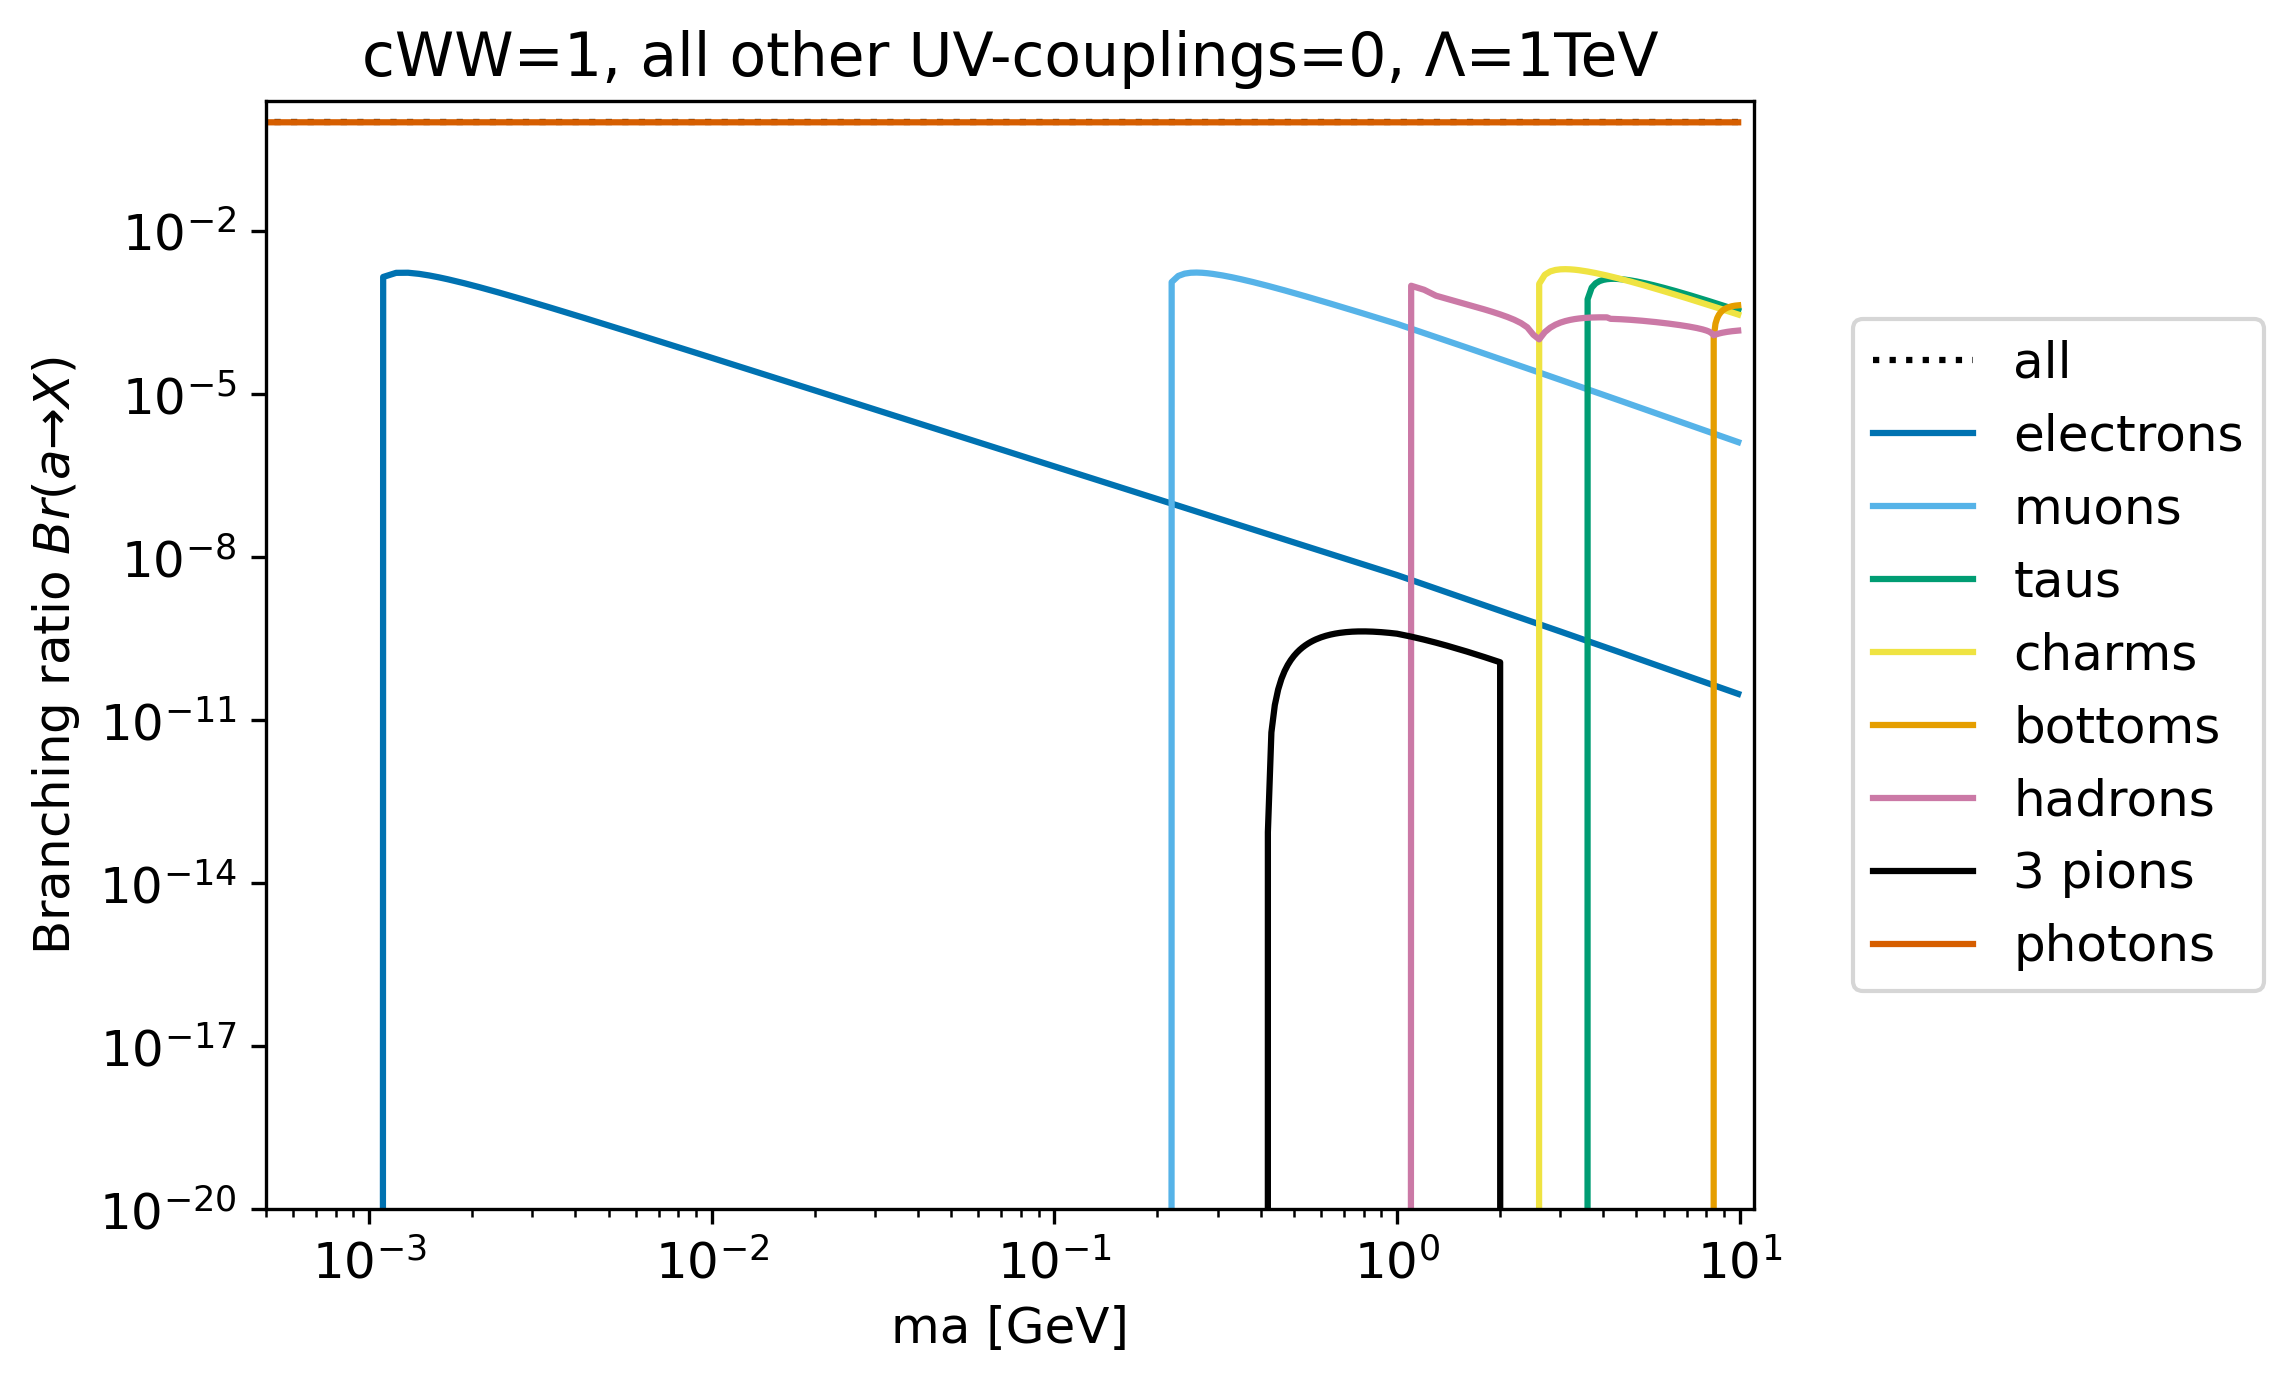

In [35]:
brsALP(0,0,0,0,0,0,1,0,"cWW=1, all other UV-couplings=0, \u039B=1TeV",1000,lower=10**-20)

### decays under consideration encoded as
 - 0: e 
 - 1: mu
 - 2: tau
 - 3: charm
 - 4: bottom
 - 5: photon
 - 6: hadron
 - 7: 3 pions

### Effective coupling

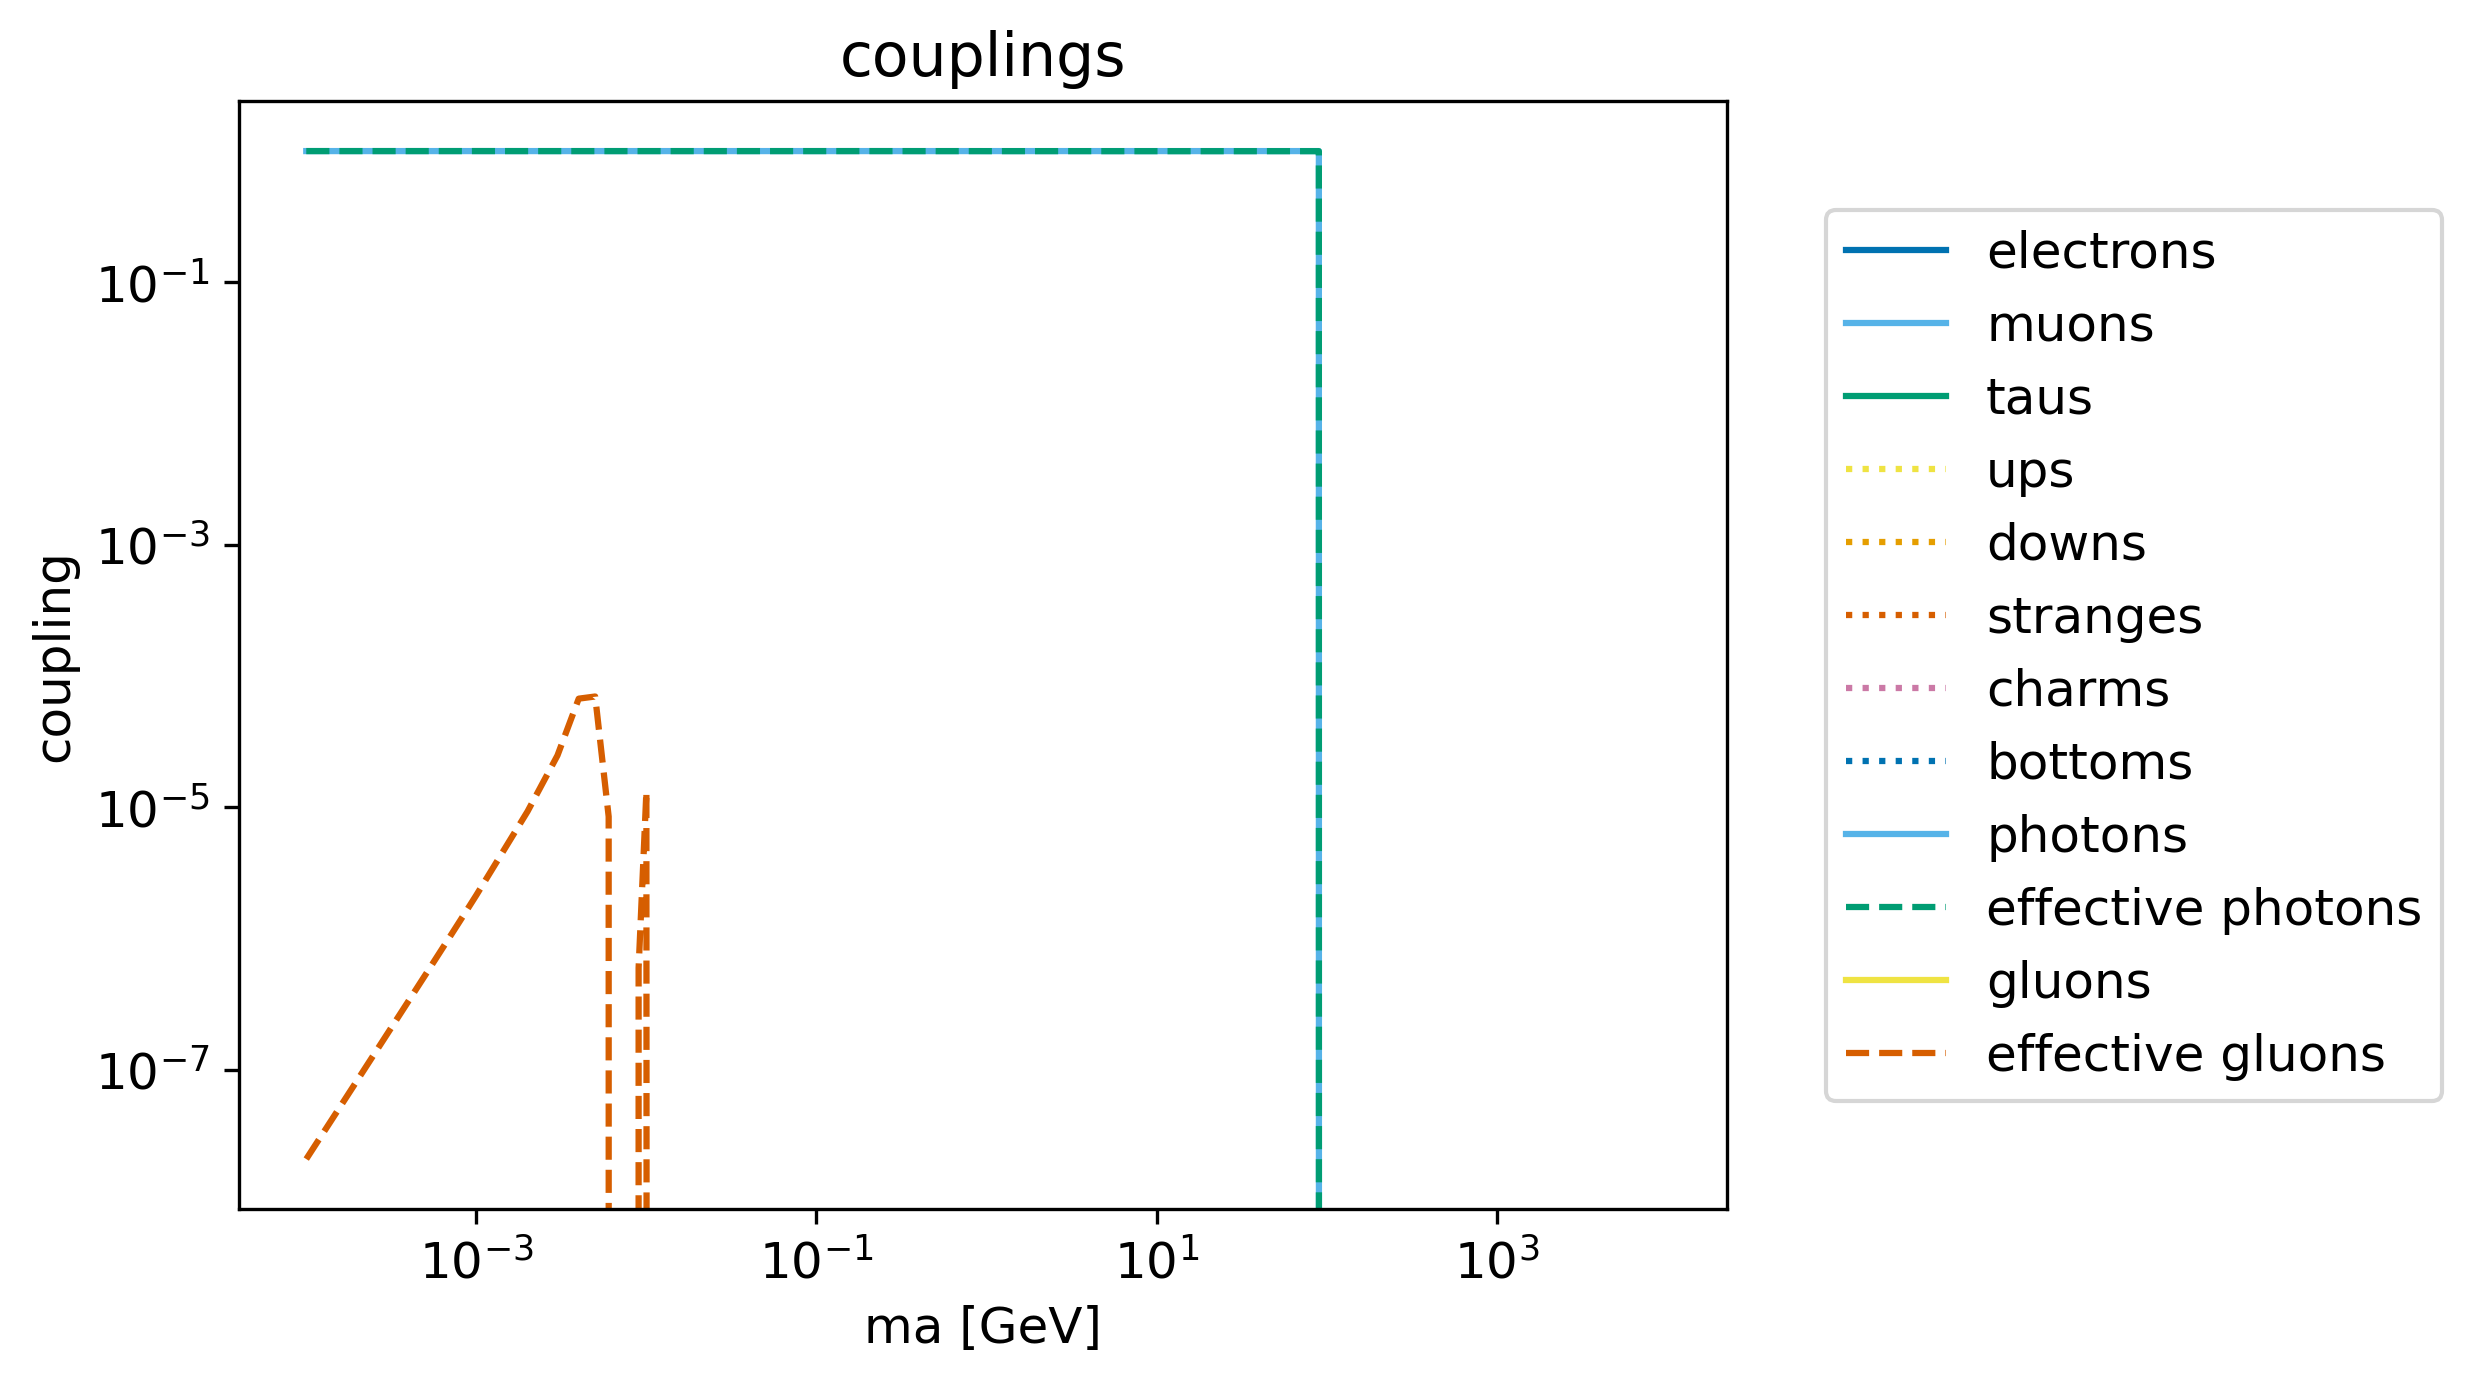

In [36]:
couplingRunning(0,0,0,0,0,0,1,0,'couplings',4*np.pi*1000,looporder=3)

In [37]:
def couplingRunningList(ma,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,looporder=3): #ma in GeV
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = -np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = -np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = -np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB

        coupls = [[],[],[],[],[],[],[],[],[],[],[],[]]
        if ma<1:
            mu = 1
        else:
            mu=ma
        lscs = TdAlps.RunRotateMatchRun(HC, Lambda, mu, looporder)
        try:
            cee = readCee(lscs).real
        except IndexError:
            cee = 0
        except KeyError:
            cee = readCeeHS(lscs).real
        coupls[0].append(cee)
        try:
            cmumu = readCmumu(lscs).real
        except IndexError:
            cmumu = 0
        except KeyError:
            cmumu = readCmumuHS(lscs).real
        coupls[1].append(cmumu)
        try:
            ctautau = readCtautau(lscs).real
        except IndexError:
            ctautau = 0
        except KeyError:
            ctautau = readCtautauHS(lscs).real
        coupls[2].append(ctautau)
        try:
            cuu = readCuu(lscs).real
        except IndexError:
            cuu = 0
        except KeyError:
            cuu = readCuuHS(lscs).real
        coupls[3].append(cuu)
        try:
            cdd = readCdd(lscs).real
        except IndexError:
            cdd = 0
        except KeyError:
            cdd = readCddHS(lscs).real
        coupls[4].append(cdd)
        try:
            css = readCss(lscs).real
        except IndexError:
            css = 0
        except KeyError:
            css = readCssHS(lscs).real
        coupls[5].append(css)
        try:
            ccc = readCcc(lscs).real
        except IndexError:
            ccc = 0
        except KeyError:
            ccc = readCccHS(lscs).real
        coupls[6].append(ccc)
        try:
            cbb = readCbb(lscs).real
        except IndexError:
            cbb = 0
        except KeyError:
            cbb = readCbbHS(lscs).real
        coupls[7].append(cbb)
        try:
            cgamgam = readCgg(lscs).real
        except KeyError:
            cgamgam = 0
        coupls[8].append(cgamgam)
        effcgg = cgamgam
        if ma >= sm['mZ']:
            try:
                effcgg += 2 * readAlphaEM(lscs)/math.pi * lscs['WW']/sm['sw']**2 * B2(4*sm['mW']**2/ma**2)
            except:
#                 print(lscs)
                pass
            try:    
                effcgg += 3 * (2/3)**2 * readCtt(lscs) * B1(4*sm['mt']**2/ma**2)
            except KeyError:
                effcgg += 3 * (2/3)**2 * readCttHS(lscs) * B1(4*sm['mt']**2/ma**2)

        if ma >= sm['mc']:
            effcgg += 3 * (2/3)**2 * ccc * B1(4*sm['mc']**2/ma**2) 
        if ma >= sm['mb']:
            effcgg += 3 * (-1/3)**2 * cbb * B1(4*sm['mb']**2/ma**2)
        if ma >= 1:
            effcgg += 3 * (2/3)**2 * cuu * B1(4*sm['mu']**2/ma**2)
            effcgg += 3 * (-1/3)**2 * cdd * B1(4*sm['md']**2/ma**2)
            effcgg += 3 * (-1/3)**2 * css * B1(4*sm['ms']**2/ma**2)
        if ma >= sm['me']:
#             print("B1e=",B1(4*sm['me']**2/ma**2))
            effcgg += cee * B1(4*sm['me']**2/ma**2)
        if ma >= sm['mmu']:
#             print("B1mu=",B1(4*sm['mmu']**2/ma**2))
            effcgg += cmumu * B1(4*sm['mmu']**2/ma**2)
        if ma >= sm['mtau']:
            print("B1tau=",B1(4*sm['mtau']**2/ma**2))
            effcgg += ctautau * B1(4*sm['mtau']**2/ma**2)
        if ma <= 1:
            tmp = -(5/3 + sm['mpi+']**2/(sm['mpi+']**2-ma**2) * (sm['md']-sm['mu'])/(sm['md']+sm['mu']))*readCGG(lscs)
            tmp += -ma**2/(sm['mpi+']**2-ma**2) * (cuu - cdd)/2
#             print("tmp=",tmp)
            effcgg += tmp

        coupls[9].append(effcgg) # effective photon coupling
        coupls[10].append(readCGG(lscs).real)

        cGGeff = readCGG(lscs).real
        cGGeff += 1/2 * cuu * B1(4*sm['mu']**2/ma**2)
        cGGeff += 1/2 * cdd * B1(4*sm['md']**2/ma**2)
        cGGeff += 1/2 * css * B1(4*sm['ms']**2/ma**2)
        cGGeff += 1/2 * ccc * B1(4*sm['mc']**2/ma**2)
        cGGeff += 1/2 * cbb * B1(4*sm['mb']**2/ma**2)
        try:
            cGGeff += 1/2 * readCtt(lscs) * B1(4*sm['mt']**2/ma**2)
        except:
            pass
        coupls[11].append(cGGeff)

        return coupls


In [38]:
couplingRunningList(0.4,0,0,0,0,0,0,1,0,4*np.pi*1000,looporder=3)[9]

[(0.999530161227731+0.0002987374672367702j)]

## Generate Beam dump files [ma, tau, c, ceff]

In [39]:
Na64BoundsUpper=genfromtxt('../Experimental_files/Na64_upper.txt', delimiter='\t')
Na64BoundsLowerData=genfromtxt('../Experimental_files/Na64_lower.txt', delimiter='\t')

In [40]:
# NuCalCHARMBounds=genfromtxt('../Experimental_files/NuCal-CHARM.txt', delimiter='\t')
NuCalCHARMBoundsUpper=genfromtxt('../Experimental_files/NuCal-CHARM_upper.txt', delimiter='\t')
NuCalCHARMBoundsLowerData=genfromtxt('../Experimental_files/NuCal-CHARM_lower.txt', delimiter='\t')

In [41]:
# NuCalCHARMBounds=genfromtxt('../Experimental_files/NuCal-CHARM.txt', delimiter='\t')
NuCalCHARME137BoundsUpper=genfromtxt('../Experimental_files/NuCal-CHARM-E137_upper.txt', delimiter='\t')
NuCalCHARME137BoundsLowerData=genfromtxt('../Experimental_files/NuCal-CHARM-E137_lower.txt', delimiter='\t')

In [42]:
# NuCalCHARMBounds=genfromtxt('../Experimental_files/NuCal-CHARM.txt', delimiter='\t')
PrimExBounds1Lower=genfromtxt('../Experimental_files/PrimEx_low_masses.txt', delimiter='\t')
PrimExBounds1Upper=genfromtxt('../Experimental_files/PrimEx_low_masses_upper.txt', delimiter='\t')

PrimExBounds2Lower=genfromtxt('../Experimental_files/PrimEx_high_masses.txt', delimiter='\t')
PrimExBounds2Upper=genfromtxt('../Experimental_files/PrimEx_high_masses_upper.txt', delimiter='\t')

In [43]:
#calculating NuCalCHARMBoundsLower on the mass grid of NuCalCHARMBoundsUpper
NuCalCHARMBoundsLower=np.array([NuCalCHARMBoundsUpper[:,0],\
                                np.interp(NuCalCHARMBoundsUpper[:,0],NuCalCHARMBoundsLowerData[:,0],\
                                NuCalCHARMBoundsLowerData[:,1])]).T

NuCalCHARME137BoundsLower=np.array([NuCalCHARME137BoundsUpper[:,0],\
                                np.interp(NuCalCHARME137BoundsUpper[:,0],NuCalCHARME137BoundsLowerData[:,0],\
                                NuCalCHARME137BoundsLowerData[:,1])]).T

Na64BoundsLower=np.array([Na64BoundsUpper[:,0],\
                                np.interp(Na64BoundsUpper[:,0],Na64BoundsLowerData[:,0],\
                                Na64BoundsLowerData[:,1])]).T

In [44]:
# #converting g_a\gamma in 1904.02091 to c_WW in our case
# def cgammagammaTocWW(Lambda):
#     return 10**3*np.pi/(0.2229*1/137)

In [46]:
#defining alpha_2 from 2012.12272
alpha_2 = 1/(137*0.23142)

#converting g_a\gamma in 1904.02091 to C_\gamma\gamma in our case (or eqv. in 2012.12272), including conversion from GeV^-1 to TeV^-1
def cgammagammaToOurs(Lambda):
    return Lambda/(4* alpha_2)

In [49]:
# #effectiveCoupling = (9,11) for (photons, gluons)
# #ONLY VALID IF EXP BOUND IS SHOWN FOR C_GAMMAGAMMA
# def generateBeamDumpFiles(expArrayUpper,expArrayLower,clist,effectiveCoupling,process,Lambda):
    
#     # with HiddenPrints():
    
#         BeamDumpList=[['# m [GeV], tau [ps], c, c_eff(theo), c_eff(exp)^upper,  c_eff(exp)^lower,\
#         c_eff(exp)^upper converted,  c_eff(exp)^lower converted, allowed/excluded (1/0)']]

#         for i in range(len(expArrayUpper[:,0])):
#             ma=expArrayUpper[i,0]
#             print("\n ma=",ma)
#             for c in clist:
#                 print(c)

# #                 if process in ['cff=cWW=cBB']:
# #                     #print("1")
# #                     cQ=cL=cWW=cBB=cff=c
# #                     ce=cd=cu=-cexpArrayUpper[:,0]
# #                     cGG=0

#                 if process in ['cWW']:
#                     #print("2")
#                     cQ=cL=cu=cd=ce=cGG=cBB=cff=0
#                     cWW=c
                    


#                 if process in ['cff']:
#                     #print("3")
#                     cGG=cWW=cBB=0
#                     cQ=cL=cff=c
#                     ce=cd=cu=c


#                 tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12
#                 #calculating the effective photon/gluon coupling we would get
#                 ceffTheo=abs(couplingRunningList(ma,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,looporder=3)\
#                 [effectiveCoupling][0])
#                 cBeamDumpToOurs=cgammagammaToOurs
#                 print("[ceffTheo,cBeamDumpToOurs,expArrayUpper[i,1],expArrayUpper[i,1]*cBeamDumpToOurs(Lambda)]=",[ceffTheo,\
#                      cBeamDumpToOurs(Lambda),expArrayUpper[i,1],expArrayUpper[i,1]*cBeamDumpToOurs(Lambda)])
                
#                 #comparing our photon coupling to upper and lower experimental bounds
#                 if (ceffTheo<=expArrayUpper[i,1]*cBeamDumpToOurs(Lambda))&\
#                 (ceffTheo>=expArrayLower[i,1]*cBeamDumpToOurs(Lambda)):
#                     allowedExcluded=0
#                 else: allowedExcluded=1
                

                
#                 BeamDumpList.append([ma,tau,c,ceffTheo,expArrayUpper[i,1],\
#                                      expArrayLower[i,1],expArrayUpper[i,1]*cBeamDumpToOurs(Lambda),\
#                                      expArrayLower[i,1]*cBeamDumpToOurs(Lambda), allowedExcluded])
#         return BeamDumpList

In [50]:
#ONLY VALID IF EXP BOUND IS SHOWN FOR C_GAMMAGAMMA
def generateBeamDumpFiles_cWW(expArrayUpper,expArrayLower,clist,effectiveCoupling,process,Lambda):
    
    with HiddenPrints():
    
        BeamDumpList=[['# m [GeV], tau [ps], c_WW, c_eff(theo), c_eff(exp)^upper,  c_eff(exp)^lower,\
        c_eff(exp)^upper converted,  c_eff(exp)^lower converted, allowed/excluded (1/0)']]

        for i in range(len(expArrayUpper[:,0])):
            ma=expArrayUpper[i,0]
            print("\n ma=",ma)
            for c in clist:


                tau=ctaua(ma, 0, c, 0, Lambda)/sm['c']*10**12
                #calculating the effective photon coupling as c_gamgam=c_W*sin^2(theta_W)
                ceffTheo=c*0.22
                cBeamDumpToOurs=cgammagammaToOurs
                print("[ceffTheo,cBeamDumpToOurs,expArrayUpper[i,1],expArrayUpper[i,1]*cBeamDumpToOurs(Lambda)]=",[ceffTheo,\
                     cBeamDumpToOurs(Lambda),expArrayUpper[i,1],expArrayUpper[i,1]*cBeamDumpToOurs(Lambda)])
                
                #comparing our photon coupling to upper and lower experimental bounds
                if (ceffTheo<=expArrayUpper[i,1]*cBeamDumpToOurs(Lambda))&\
                (ceffTheo>=expArrayLower[i,1]*cBeamDumpToOurs(Lambda)):
                    allowedExcluded=0
                else: allowedExcluded=1
                

                
                BeamDumpList.append([ma,tau,c,ceffTheo,expArrayUpper[i,1],\
                                     expArrayLower[i,1],expArrayUpper[i,1]*cBeamDumpToOurs(Lambda),\
                                     expArrayLower[i,1]*cBeamDumpToOurs(Lambda), allowedExcluded])
        return BeamDumpList

In [61]:
meshcWWNuCalCHARM=generateBeamDumpFiles_cWW(NuCalCHARMBoundsUpper,NuCalCHARMBoundsLower,\
                                        couplingListBeamDumpcWW,9,'cWW',4*np.pi*1000)

meshcffNuCalCHARM=generateBeamDumpFiles_cWW(NuCalCHARMBoundsUpper,NuCalCHARMBoundsLower,\
                                        couplingListBeamDumpcff,9,'cff',4*np.pi*1000)

In [62]:
with open("output/m-tau-c-NuCal-CHARM-cWW_combined-new.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWNuCalCHARM)
    
with open("output/m-tau-c-NuCal-CHARM-cff_combined-new.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffNuCalCHARM)

In [51]:
meshcWWNuCalCHARME137=generateBeamDumpFiles_cWW(NuCalCHARME137BoundsUpper,NuCalCHARME137BoundsLower,\
                                        couplingListBeamDumpcWW,9,'cWW',4*np.pi*1000)

meshcffNuCalCHARME137=generateBeamDumpFiles_cWW(NuCalCHARME137BoundsUpper,NuCalCHARME137BoundsLower,\
                                        couplingListBeamDumpcff,9,'cff',4*np.pi*1000)

In [52]:
with open("output/m-tau-c-NuCal-CHARM-E137-cWW_combined-new.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWNuCalCHARME137)
    
with open("output/m-tau-c-NuCal-CHARM-E137-cff_combined-new.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffNuCalCHARME137)

In [ ]:
generateBeamDumpFiles_test=generateBeamDumpFiles_cWW(NuCalCHARME137BoundsUpper,NuCalCHARME137BoundsLower,\
                                        beam_dump_test_coupling_list,9,'cWW',4*np.pi*1000)

In [86]:
meshcWWPrimExBounds1=generateBeamDumpFiles_cWW(PrimExBounds1Upper,PrimExBounds1Lower,\
                                        couplingListPrimEx,9,'cWW',1000)
meshcWWPrimExBounds2=generateBeamDumpFiles_cWW(PrimExBounds2Upper,PrimExBounds2Lower,\
                                        couplingListPrimEx,9,'cWW',1000)

meshcffPrimExBounds1=generateBeamDumpFiles_cWW(PrimExBounds1Upper,PrimExBounds1Lower,\
                                        couplingListPrimEx,9,'cff',1000)
meshcffPrimExBounds2=generateBeamDumpFiles_cWW(PrimExBounds2Upper,PrimExBounds2Lower,\
                                        couplingListPrimEx,9,'cff',1000)

In [87]:
with open("output/m-tau-c-PrimEx-cWW_combined-1.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWPrimExBounds1)
    
with open("output/m-tau-c-PrimEx-cWW_combined-2.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWPrimExBounds2)
    
with open("output/m-tau-c-PrimEx-cff_combined-1.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffPrimExBounds1)
    
with open("output/m-tau-c-PrimEx-cff_combined-2.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffPrimExBounds2)

In [88]:
meshcWWNa64=generateBeamDumpFiles_cWW(Na64BoundsUpper,Na64BoundsLower,\
                                        couplingListNa64cWW,9,'cWW',1000)

In [89]:
with open("output/m-tau-c-Na64-cWW_combined.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWNa64)

## Generate [ma, tau, c, BR(theory)] files for Na62, KOTO (KOTO gives incorrect results), BaBar and CHARM

In [365]:
Na62Bounds=genfromtxt('../Experimental_files/Na62-BR_m_tau_2103.15389-h.csv', delimiter=',')

In [140]:
BaBargammagammaBoundsRaw=[genfromtxt('../Experimental_files/BaBr_gamma-gamma_ctau0mm.dat', delimiter='\t'),\
                      genfromtxt('../Experimental_files/BaBr_gamma-gamma_ctau1mm.dat', delimiter='\t'),\
                      genfromtxt('../Experimental_files/BaBr_gamma-gamma_ctau10mm.dat', delimiter='\t'),\
                      genfromtxt('../Experimental_files/BaBr_gamma-gamma_ctau100mm.dat', delimiter='\t')]

In [141]:
BaBargammagammaBounds=[masslistBaBArgammagamma]
for bound in BaBargammagammaBoundsRaw: 
    BaBargammagammaBounds.append(np.interp(masslistBaBArgammagamma,\
                                           bound[:,0], bound[:,1]))
# print(BaBargammagammaBounds)
BaBargammagammaBounds=np.array(BaBargammagammaBounds).T

In [142]:
currentDir=os.getcwd()
os.chdir("/home/stasya/prj/alps-BelleII/python/")

In [143]:
os.getcwd()

'/home/stasya/prj/alps-BelleII/python'

In [144]:
BaBargammagammaPromptBoundsRaw=[genfromtxt('../Experimental_files/BaBr_gamma-gamma_prompt.dat',delimiter='\t')]

In [145]:
BaBargammagammaPromptBounds=[masslistBaBArgammagammaPrompt]
for bound in BaBargammagammaPromptBoundsRaw: 
    BaBargammagammaPromptBounds.append(np.interp(masslistBaBArgammagammaPrompt,\
                                           bound[:,0], bound[:,1]))
# print(BaBargammagammaBounds)
BaBargammagammaPromptBounds=np.array(BaBargammagammaPromptBounds).T

In [146]:
KOTOBounds=genfromtxt('../Experimental_files/KOTO.txt', delimiter='\t')

In [366]:
def generateNa62Files(mlist,clist,process,Lambda):
    
    with HiddenPrints():
    
        Na62List=[['# m [GeV], tau [ps], c, BR_theo(K+->pi+ a)\n']]

        for ma in mlist:
            for c in clist:

#                 if process in ['cff=cWW=cBB']:
#                     #print("1")
#                     cQ=cL=cWW=cBB=cff=c
#                     ce=cd=cu=-c
#                     cGG=0

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=c

#                 coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)

                csd=getCsd(cff, cWW, cBB, Lambda, sm['mK+'])
    
#                 print(csd)

                BR= BrKtoPiaplus(ma, csd, Lambda)
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

                Na62List.append([ma,tau,c,BR])
        return Na62List

In [202]:
def generateBaBargammagammaFiles(mlist,clist,process,Lambda):
    
#     with HiddenPrints():
    
        BaBargammagammaList=[['# m [GeV], tau [ps], c, BR_theo(B+->K+ a)*BR_theo(a-> gamma gamma)\n']]

        for ma in mlist:
            for c in clist:

#                 if process in ['cff=cWW=cBB']:
#                     #print("1")
#                     cQ=cL=cWW=cBB=cff=c
#                     ce=cd=cu=-c
#                     cGG=0

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=c

#                 coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)

                cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])
                coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
    
#                 print(csd)


#                 print([ma,5,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda])        
#                 print(brALPtoOneFinalState(ma,5,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0])
                BR= BrBtoKaplus(ma, cbs, Lambda)\
                    *brALPtoOneFinalState(ma,5,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
#                 print(BrBtoKaplus(ma, cbs, Lambda))
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

                BaBargammagammaList.append([ma,tau,c,BR])
        return BaBargammagammaList

In [150]:
def generateCHARMFiles(mlist,clist,process,Lambda):
    
    with HiddenPrints():
    
        BaBargammagammaList=[['# m [GeV], tau [ps], c, BR_theo(B+->K+ a)*BR_theo(a-> mu mu)\n']]

        for ma in mlist:
            for c in clist:

#                 if process in ['cff=cWW=cBB']:
#                     #print("1")
#                     cQ=cL=cWW=cBB=cff=c
#                     ce=cd=cu=-c
#                     cGG=0

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=c

#                 coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)

                cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])
                coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
    
#                 print(csd)


#                 print([ma,5,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda])        
#                 print(brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0])
                BR= BrBtoKaplus(ma, cbs, Lambda)\
                    *brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12
            
#                 print(BR)

                BaBargammagammaList.append([ma,tau,c,BR])
        return BaBargammagammaList

In [151]:
def generateKOTOFiles(mlist,clist,process,Lambda):
    
    with HiddenPrints():
    
        KOTOList=[['# m [GeV], tau [ps], c, BR_theo(KL->pi0 a)\n']]

        for ma in mlist:
            for c in clist:

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=c

#                 coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)

                csd=getCsd(cff, cWW, cBB, Lambda, sm['mK+'])
    
#                 print(csd)

                BR= BrKtoPiaplus(ma, csd, Lambda)
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

                KOTOList.append([ma,tau,c,BR])
        return KOTOList

In [367]:
meshcWW=generateNa62Files(Na62Bounds[:,0] * 10**-3,\
                          couplingListNa62cWW,'cWW',4*np.pi*10**3)
meshcff=generateNa62Files(Na62Bounds[:,0] * 10**-3,\
                          couplingListNa62cff,'cff',4*np.pi*10**3)

In [368]:
with open("output/m-tau-c-BRKtoPia-cWW.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWW)
    
with open("output/m-tau-c-BRKtoPia-cff.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcff)

In [154]:
meshcWWBaBar=generateBaBargammagammaFiles(BaBargammagammaBounds[:,0],\
                                          couplingListSmallCouplings,'cWW',4*np.pi*10**3)
meshcffBaBar=generateBaBargammagammaFiles(BaBargammagammaBounds[:,0],\
                                          couplingListSmallCouplings,'cff',4*np.pi*10**3)

2.726223387893797e-21
3.921535727763033e-20
5.640932629516818e-19
8.114198910766598e-18
1.1671868516734931e-16
1.6789397963981578e-15
2.4150707625207424e-14
3.473958267523606e-13
4.997114860619014e-12
7.188098890218188e-11
1.0339714455537505e-09
2.726222348171321e-09
5.640949732095027e-09
1.1672104638808519e-08
1.4873676209809324e-08
2.4152849524512334e-08
4.998718849430268e-08
1.0350053843580187e-07
2.145244719023338e-07
2.14524471902335e-07
4.455755262623501e-07
9.290422031483064e-07
1.9008119827575796e-06
3.100313123924208e-06
3.918564054434301e-06
8.151615808710455e-06
1.6858934105561246e-05
3.4766428426918744e-05
4.435051956662324e-05
7.213559372020236e-05
0.00014864851386524696
0.000307280915262097
0.0006368034313080339
0.0006368034313080339
0.0013188086763551783
0.002721737218661104
0.009148367529481356
0.13163650843144672
1.8920212616125245
27.257044335597858
2.726319410499111e-21
3.9216738514689203e-20
5.641131313546122e-19
8.114484707786354e-18
1.1672279621426072e-16
1.678998

In [155]:
with open("output/m-tau-c-BRBtoKgammagamma-cWW.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWBaBar)
    
with open("output/m-tau-c-BRBtoKgammagamma-cff.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffBaBar)

In [156]:
meshcWWBaBarPrompt=generateBaBargammagammaFiles(BaBargammagammaPromptBounds[:,0],\
                                          couplingListSmallCouplings,'cWW',4*np.pi*10**3)
meshcffBaBarPrompt=generateBaBargammagammaFiles(BaBargammagammaPromptBounds[:,0],\
                                          couplingListSmallCouplings,'cff',4*np.pi*10**3)

2.726223387893797e-21
3.921535727763033e-20
5.640932629516818e-19
8.114198910766598e-18
1.1671868516734931e-16
1.6789397963981578e-15
2.4150707625207424e-14
3.473958267523606e-13
4.997114860619014e-12
7.188098890218188e-11
1.0339714455537505e-09
2.726222348171321e-09
5.640949732095027e-09
1.1672104638808519e-08
1.4873676209809324e-08
2.4152849524512334e-08
4.998718849430268e-08
1.0350053843580187e-07
2.145244719023338e-07
2.14524471902335e-07
4.455755262623501e-07
9.290422031483064e-07
1.9008119827575796e-06
3.100313123924208e-06
3.918564054434301e-06
8.151615808710455e-06
1.6858934105561246e-05
3.4766428426918744e-05
4.435051956662324e-05
7.213559372020236e-05
0.00014864851386524696
0.000307280915262097
0.0006368034313080339
0.0006368034313080339
0.0013188086763551783
0.002721737218661104
0.009148367529481356
0.13163650843144672
1.8920212616125245
27.257044335597858
2.726340173870645e-21
3.921703718538384e-20
5.641174275828854e-19
8.114546506877151e-18
1.1672368516321325e-16
1.6790117

In [157]:
with open("output/m-tau-c-BRBtoKgammagamma-cWW-prompt.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWBaBarPrompt)
    
with open("output/m-tau-c-BRBtoKgammagamma-cff-prompt.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffBaBarPrompt)

In [158]:
# meshcWWKOTO=generateKOTOFiles(KOTOBounds[:,0] * 10**-3,couplingListSmallCouplings,'cWW',4*np.pi*10**3)
# meshcffKOTO=generateKOTOFiles(KOTOBounds[:,0] * 10**-3,couplingListSmallCouplings,'cff',4*np.pi*10**3)

In [159]:
# with open("output/m-tau-c-BRKLtoPi0a-cWW.dat", "w", newline="") as f:
#     writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
#     writer.writerows(meshcWWKOTO)
    
# with open("output/m-tau-c-BRKLtoPi0a-cff.dat", "w", newline="") as f:
#     writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
#     writer.writerows(meshcffKOTO)

In [177]:
meshcWWCHARM=generateCHARMFiles(masslistCHARM,\
                                          couplingListBeamDumpcWW,'cWW',4*np.pi*10**3)
meshcffCHARM=generateCHARMFiles(masslistCHARM,\
                                          couplingListBeamDumpcff,'cff',4*np.pi*10**3)

KeyboardInterrupt: 

In [161]:
with open("output/m-tau-c-BRBtoKmumu-CHARM-cWW.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWWCHARM)
    
with open("output/m-tau-c-BRBtoKmumu-CHARM-cff.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcffCHARM)

### Importing CHARM bounds and interpolating them on the same tau-grid as theo files

In [162]:
CHARMBoundsRaw=[genfromtxt('../Experimental_files/CHARM_ma-300MeV.dat', delimiter='\t'),\
            genfromtxt('../Experimental_files/CHARM_ma-600MeV.dat', delimiter='\t'),\
            genfromtxt('../Experimental_files/CHARM_ma-1200MeV.dat', delimiter='\t'),\
            genfromtxt('../Experimental_files/CHARM_ma-2400MeV.dat', delimiter='\t')]

In [163]:
#bringing CHARM bounds for all taus to the same tau-grid and creating one list

theotauListcWW = np.sort(genfromtxt('output/m-tau-c-BRBtoKmumu-CHARM-cWW.dat', delimiter=',')[:,1])
theotauListcff = np.sort(genfromtxt('output/m-tau-c-BRBtoKmumu-CHARM-cff.dat', delimiter=',')[:,1])
# print(theotauListcWW)

CHARMBounds=[]
for theotauList in [theotauListcWW,theotauListcff]:
    CHARMBoundsCouplingSpecific=[np.ndarray.tolist(theotauList)]
    for bound in CHARMBoundsRaw:
        CHARMBoundsCouplingSpecific.append(np.interp(theotauList,\
                                               bound[:,0], bound[:,1],10**6,10**6))# big number to forbid extrapolation
    CHARMBounds.append(np.array(CHARMBoundsCouplingSpecific).T)
    
# print(CHARMBounds)
CHARMBounds=np.array(CHARMBounds)
CHARMBounds.shape

/tmp/ipykernel_163651/3231148081.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  CHARMBounds=np.array(CHARMBounds)


(2,)

In [ ]:
# #bringing CHARM bounds for all taus to the same tau-grid and creating one list

# theotauList=CHARMBoundsRaw[0][:,0]

# CHARMBounds=[np.ndarray.tolist(theotauList)]
# for bound in CHARMBoundsRaw:
#     CHARMBounds.append(np.interp(theotauList,\
#                                            bound[:,0], bound[:,1]))
# CHARMBounds=np.array(CHARMBounds).T
# CHARMBounds.shape

### interpolating Na62 and CHARM files in lifetime and comparing theo and exp files

In [164]:
tauListNa62 = 10**12*np.array([np.Inf, 5*10**-9, 2*10**-9, 1*10**-9, 500*10**(-12), 200*10**(-12),\
                      100*10**(-12),]) # [tau] = ps
tauListBaBargammagamma = 10**12/(3*10**11)*np.array([0,1,10,100]) # [tau] = ps

In [369]:
def compareTheoExpNA62(coupling):
    theoList = genfromtxt('output/m-tau-c-BRKtoPia-{}.dat'.format(coupling), delimiter=',')
#     print(theoList[0])
    
    allowedlist=[['# m [GeV], tau [ps], c, BR_theo(K+->pi+ a), BR_Na62(K+->pi+ a), Allowed/excluded (1/0)\n']]
    for i in range(0,theoList.shape[0]):
        #picking mass and tau from theo file
        ma = theoList[i,0]
        taua = theoList[i,1]
        
        # finding the same mass in exp file
        expPosition=np.where((Na62Bounds[:,0]/1000 >= ma*(1-0.0001))&(Na62Bounds[:,0]/1000 <= ma*(1+0.0001)))
#         print([expPosition,Na62Bounds[expPosition,1:][0,0][::-1],taua])
    
        #interpolating BRexp so we get it for tau from out theo file
        BRexp=np.interp(taua,tauListNa62[::-1],Na62Bounds[expPosition,1:][0,0][::-1])
#         if (i % 1000 ==0):
#             print([Na62Bounds[expPosition,1:][0,0],"[m,с,tau,BRexp=]",[ma,theoList[i,2],taua,BRexp]],"\n")

        # comparing theo and exp bounds (1 = allowed, 0 = excluded)
        if BRexp<=theoList[i,3]:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,0])
        else:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,1])

        # writing results into a file
        with open("output/m-tau-c-BRKtoPia-{}_combined.dat".format(coupling), "w", newline="") as f:
            writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
            writer.writerows(allowedlist)
        

In [370]:
tauListNa62

array([  inf, 5000., 2000., 1000.,  500.,  200.,  100.])

In [371]:
compareTheoExpNA62("cWW")
compareTheoExpNA62("cff")

In [168]:
def compareTheoExpBaBargammagamma(coupling):
    theoList = genfromtxt('output/m-tau-c-BRBtoKgammagamma-{}.dat'.format(coupling), delimiter=',')
#     print(theoList[0])
    
    allowedlist=[['# m [GeV], tau [ps], c, BR_theo(B+->K+ a)*BR_theo(a-> gamma gamma),\
    BR_BaBar(B+->K+ a)*BR_BaBar(a-> gamma gamma), Allowed/excluded (1/0)\n']]
    for i in range(0,theoList.shape[0]):
        #picking mass and tau from theo file
        ma = theoList[i,0]
        taua = theoList[i,1]
        
#         print(ma)
#         print(taua)
#         print(BaBargammagammaBounds[:,0])
        
        # finding the same mass in exp file
        expPosition=np.where((BaBargammagammaBounds[:,0] >= ma*(1-0.0001))\
                             &(BaBargammagammaBounds[:,0] <= ma*(1+0.0001)))
        
#         print(expPosition)
        #interpolating BaBar's BRexp in tau and mass
        BRexp=np.interp(taua,tauListBaBargammagamma,BaBargammagammaBounds[expPosition,1:][0,0])

        # comparing theo and exp bounds (1 = allowed, 0 = excluded)
        if BRexp<=theoList[i,3]:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,0])
        else:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,1])

        # writing results into a file
        with open("output/m-tau-c-BRBtoKgammagamma-{}_combined.dat".format(coupling), "w", newline="")\
        as f:
            writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
            writer.writerows(allowedlist)
        

In [169]:
compareTheoExpBaBargammagamma("cWW")
compareTheoExpBaBargammagamma("cff")

In [170]:
def compareTheoExpBaBargammagammaPrompt(coupling):
    theoList = genfromtxt('output/m-tau-c-BRBtoKgammagamma-{}-prompt.dat'.format(coupling), delimiter=',')
    print(theoList[:,0])
    
    allowedlist=[['# m [GeV], tau [ps], c, BR_theo(B+->K+ a)*BR_theo(a-> gamma gamma),\
    BR_BaBar(B+->K+ a)*BR_BaBar(a-> gamma gamma), Allowed/excluded (1/0)\n']]
    for i in range(0,theoList.shape[0]):
        #picking mass and tau from theo file
        ma = theoList[i,0]
        taua = theoList[i,1]
        
#         print(ma)
#         print(taua)
#         print(BaBargammagammaBounds[:,0])
        
        # finding the same mass in exp file
        expPosition=np.where((BaBargammagammaPromptBounds[:,0] >= ma*(1-0.0001))\
                             &(BaBargammagammaPromptBounds[:,0] <= ma*(1+0.0001)))
        
#         print(expPosition)
        #interpolating BaBar's BRexp in tau and mass
        BRexp=BaBargammagammaPromptBounds[expPosition,1][0,0]

        # comparing theo and exp bounds (1 = allowed, 0 = excluded)
        if BRexp<=theoList[i,3]:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,0])
        else:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,1])

        # writing results into a file
        with open("output/m-tau-c-BRBtoKgammagamma-{}_combined-prompt.dat".format(coupling), "w", newline="")\
        as f:
            writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
            writer.writerows(allowedlist)
        

In [171]:
compareTheoExpBaBargammagammaPrompt("cWW")
compareTheoExpBaBargammagammaPrompt("cff")

[0.1 0.1 0.1 ... 4.7 4.7 4.7]
[0.1 0.1 0.1 ... 4.7 4.7 4.7]


In [172]:
def compareTheoExpKOTO(coupling):
    theoList = genfromtxt('output/m-tau-c-BRKLtoPi0a-{}.dat'.format(coupling), delimiter=',')
#     print(theoList[0])
    
    allowedlist=[['# m [GeV], tau [ps], c, BR_theo(KL->pi0 a), BR_KOTO(KL->pi0 a), Allowed/excluded (1/0)\n']]
    for i in range(0,theoList.shape[0]):
        #picking mass and tau from theo file
        ma = theoList[i,0]
        taua = theoList[i,1]
        
        # finding the same mass in exp file
        expPosition=np.where((KOTOBounds[:,0]/1000 >= ma*(1-0.0001))&(KOTOBounds[:,0]/1000 <= ma*(1+0.0001)))
    
        BRexp=KOTOBounds[expPosition,1]
#         print(BRexp[0,0])

        # comparing theo and exp bounds (1 = allowed, 0 = excluded)
        if BRexp<=theoList[i,3]:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,0])
        else:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,1])

        # writing results into a file
        with open("output/m-tau-c-BRKLtoPi0a-{}_combined.dat".format(coupling), "w", newline="") as f:
            writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
            writer.writerows(allowedlist)

In [173]:
# compareTheoExpKOTO("cWW")
# compareTheoExpKOTO("cff")

In [180]:
def compareTheoExpCHARM(coupling):
    theoList = genfromtxt('output/m-tau-c-BRBtoKmumu-CHARM-{}.dat'.format(coupling), delimiter=',')
    
    if coupling in ['cWW']:
        CHARMBoundsExp=CHARMBounds[0]
        
    if coupling in ['cff']:
        CHARMBoundsExp=CHARMBounds[1]
        
    
    allowedlist=[['# m [GeV], tau [ps], c, BR_theo(B+->K+ a)*BR_theo(a-> mu mu),\
    BR_BaBar(B+->K+ a)*BR_BaBar(a-> mu mu), Allowed/excluded (1/0)\n']]
    for i in range(0,theoList.shape[0]):
        #picking mass and tau from theo file
        
        ma = theoList[i,0]
        taua = theoList[i,1]
#         print("ma=",ma)
#         print("taua=",taua)

        # finding the same tau in exp file
        expPosition=np.where((CHARMBoundsExp[:,0] >= taua*(1-0.0001))\
                             &(CHARMBoundsExp[:,0] <= taua*(1+0.0001)))
        
#         print(expPosition)
        #interpolating BaBar's BRexp in tau and mass
        BRexp=np.interp(ma,masslistCHARM,CHARMBoundsExp[expPosition,1:][0,0])

        # comparing theo and exp bounds (1 = allowed, 0 = excluded)
        if BRexp<=theoList[i,3]:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,0])
        else:
            allowedlist.append([theoList[i,0],theoList[i,1],theoList[i,2],theoList[i,3],BRexp,1])

        # writing results into a file
        with open("output/m-tau-c-BRBtoKmumu-CHARM-{}_combined.dat".format(coupling), "w", newline="") as f:
            writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
            writer.writerows(allowedlist)
        

In [181]:
compareTheoExpCHARM("cWW")
compareTheoExpCHARM("cff")

ValueError: fp and xp are not of the same length.

# plots

In [53]:
def plotBounds(boundsArray, particleCode, upper=False):
    if upper:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,1]]).T
    else:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,0]]).T

In [54]:
def stackBounds(xarray,arrSmattToLarge,arrLargeToSmall):
    combinedx=np.append(xarray,np.flip(xarray))
    combinedy=np.append(arrSmattToLarge,np.flip(arrLargeToSmall))
    
    return np.vstack([combinedx,combinedy]).T

In [55]:
def plotGen(inputarray,lineScatterFillORPolygon,color,linewidthORmarkersize,*args,**kwargs):
    
    data=inputarray[~np.isnan(inputarray[:,1])]
    
    if not args:
        alphaPoly=0.3
    else:
        alphaPoly=args[0]
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,0],data[:,1], color=color, alpha=1,**kwargs)
    if (lineScatterFillORPolygon=="oppacpolygon"):
        ax.fill(data[:,0],data[:,1], facecolor=color,alpha=alphaPoly,\
                edgecolor=color,linewidth=linewidthORmarkersize,**kwargs)
    if (lineScatterFillORPolygon=="nonfilledpolygon"):
        ax.fill(data[:,0],data[:,1], facecolor="none", edgecolor=color,\
                linewidth=linewidthORmarkersize, linestyle='-',**kwargs)
        
def plotAllowed(inputfile,x,y,z,zfixed):
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    
    #choosing only rows with z=zfixed
    zfixedonly=inputparams[:,z]==zfixed
    params=inputparams[zfixedonly]

    allowed=params[:,5]==1

    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    
def plotAllAllowed(inputfile,x,y):
    params = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    
    allowed=params[:,-1]==1
    
    
    plt.scatter(params[allowed,x], params[allowed,y], c='green')
    plt.scatter(params[~allowed,x], params[~allowed,y], c='red')
    

#m,y,tau are the columns with mass, y variable and lifetime (in ps)
#Min/Max values implement search regions of an experiment (in GeV and ps)
    
def plotAllowedWCuts(inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax):
    inputparams = np.array(genfromtxt(inputfile,  comments="#", delimiter=','))
    print("[inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax]=",\
          [inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax])
    

    # excluding tau and m not covered by the search
    searched=(inputparams[:,m]>mMin) & (inputparams[:,m]<mMax) & \
              (inputparams[:,tau]>tauMin) & (inputparams[:,tau]<tauMax)& \
              (inputparams[:,3]>BRMin) & (inputparams[:,3]<BRMax)
    params=inputparams#[searched]
    
#     selectedpoints=inputparams[3200]
#     print(inputparams[3200])
#     print("[inputparams[3200,tau],m,c,tauMin,searched]=",[inputparams[3200,tau],inputparams[3200,m],\
#                                                           inputparams[3200,y],tauMin,searched[3200]])
    
    allowed=params[:,-1]==1

    plt.scatter(params[allowed,m], params[allowed,y], c='green')
    plt.scatter(params[~allowed,m], params[~allowed,y], c='red')
    plt.scatter(inputparams[~searched,m], inputparams[~searched,y], c='grey')
#     plt.scatter(selectedpoints[m],selectedpoints[y],c='blue')
    plt.grid(b=True, which='major', color='black', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='--')
    
# function that plots cut-out regions from 2103.15389

def whiteregions(m):
    return np.heaviside(m - 0.110,0)*np.heaviside(-m + 0.154,0)

def plotWhiteRegions(yupper):
    m=np.linspace(0.05,0.3,num=10000);
    plt.fill_between(m,(whiteregions(m))*yupper,0,color="black",zorder=4)

In [56]:
# function that plots cut-out regions from 1612.07818 and Na62

def cutoutRegionsLHCb(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)
#     return np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def cutoutRegionsNa62(m):
    return 1-np.heaviside(m - 0.110,0)*np.heaviside(-m + 0.154,0)

#from 2111.01800
def cutoutRegionsBaBargammagamma(m):
    return 1-(np.heaviside(m - 0.1,0)*np.heaviside(-m + 0.175,0)\
              +np.heaviside(m - 0.45,0)*np.heaviside(-m + 0.63,0)\
             +np.heaviside(m - 0.91,0)*np.heaviside(-m + 1.01,0))

def plotCutOutRegions(cutoutRegionsFunc,xmin,xmax,ylower,yupper,order,**kwargs):
    m=np.linspace(xmin,xmax,num=10000);
    plt.fill_between(m,np.maximum((1-cutoutRegionsFunc(m))*yupper,ylower),ylower,\
                     zorder=order,linewidth=0,**kwargs)

## NA62

[inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax]= ['output/m-tau-c-BRKtoPia-cff_combined.dat', 0, 2, 1, 0, 0.26, 100, inf, 0, inf]


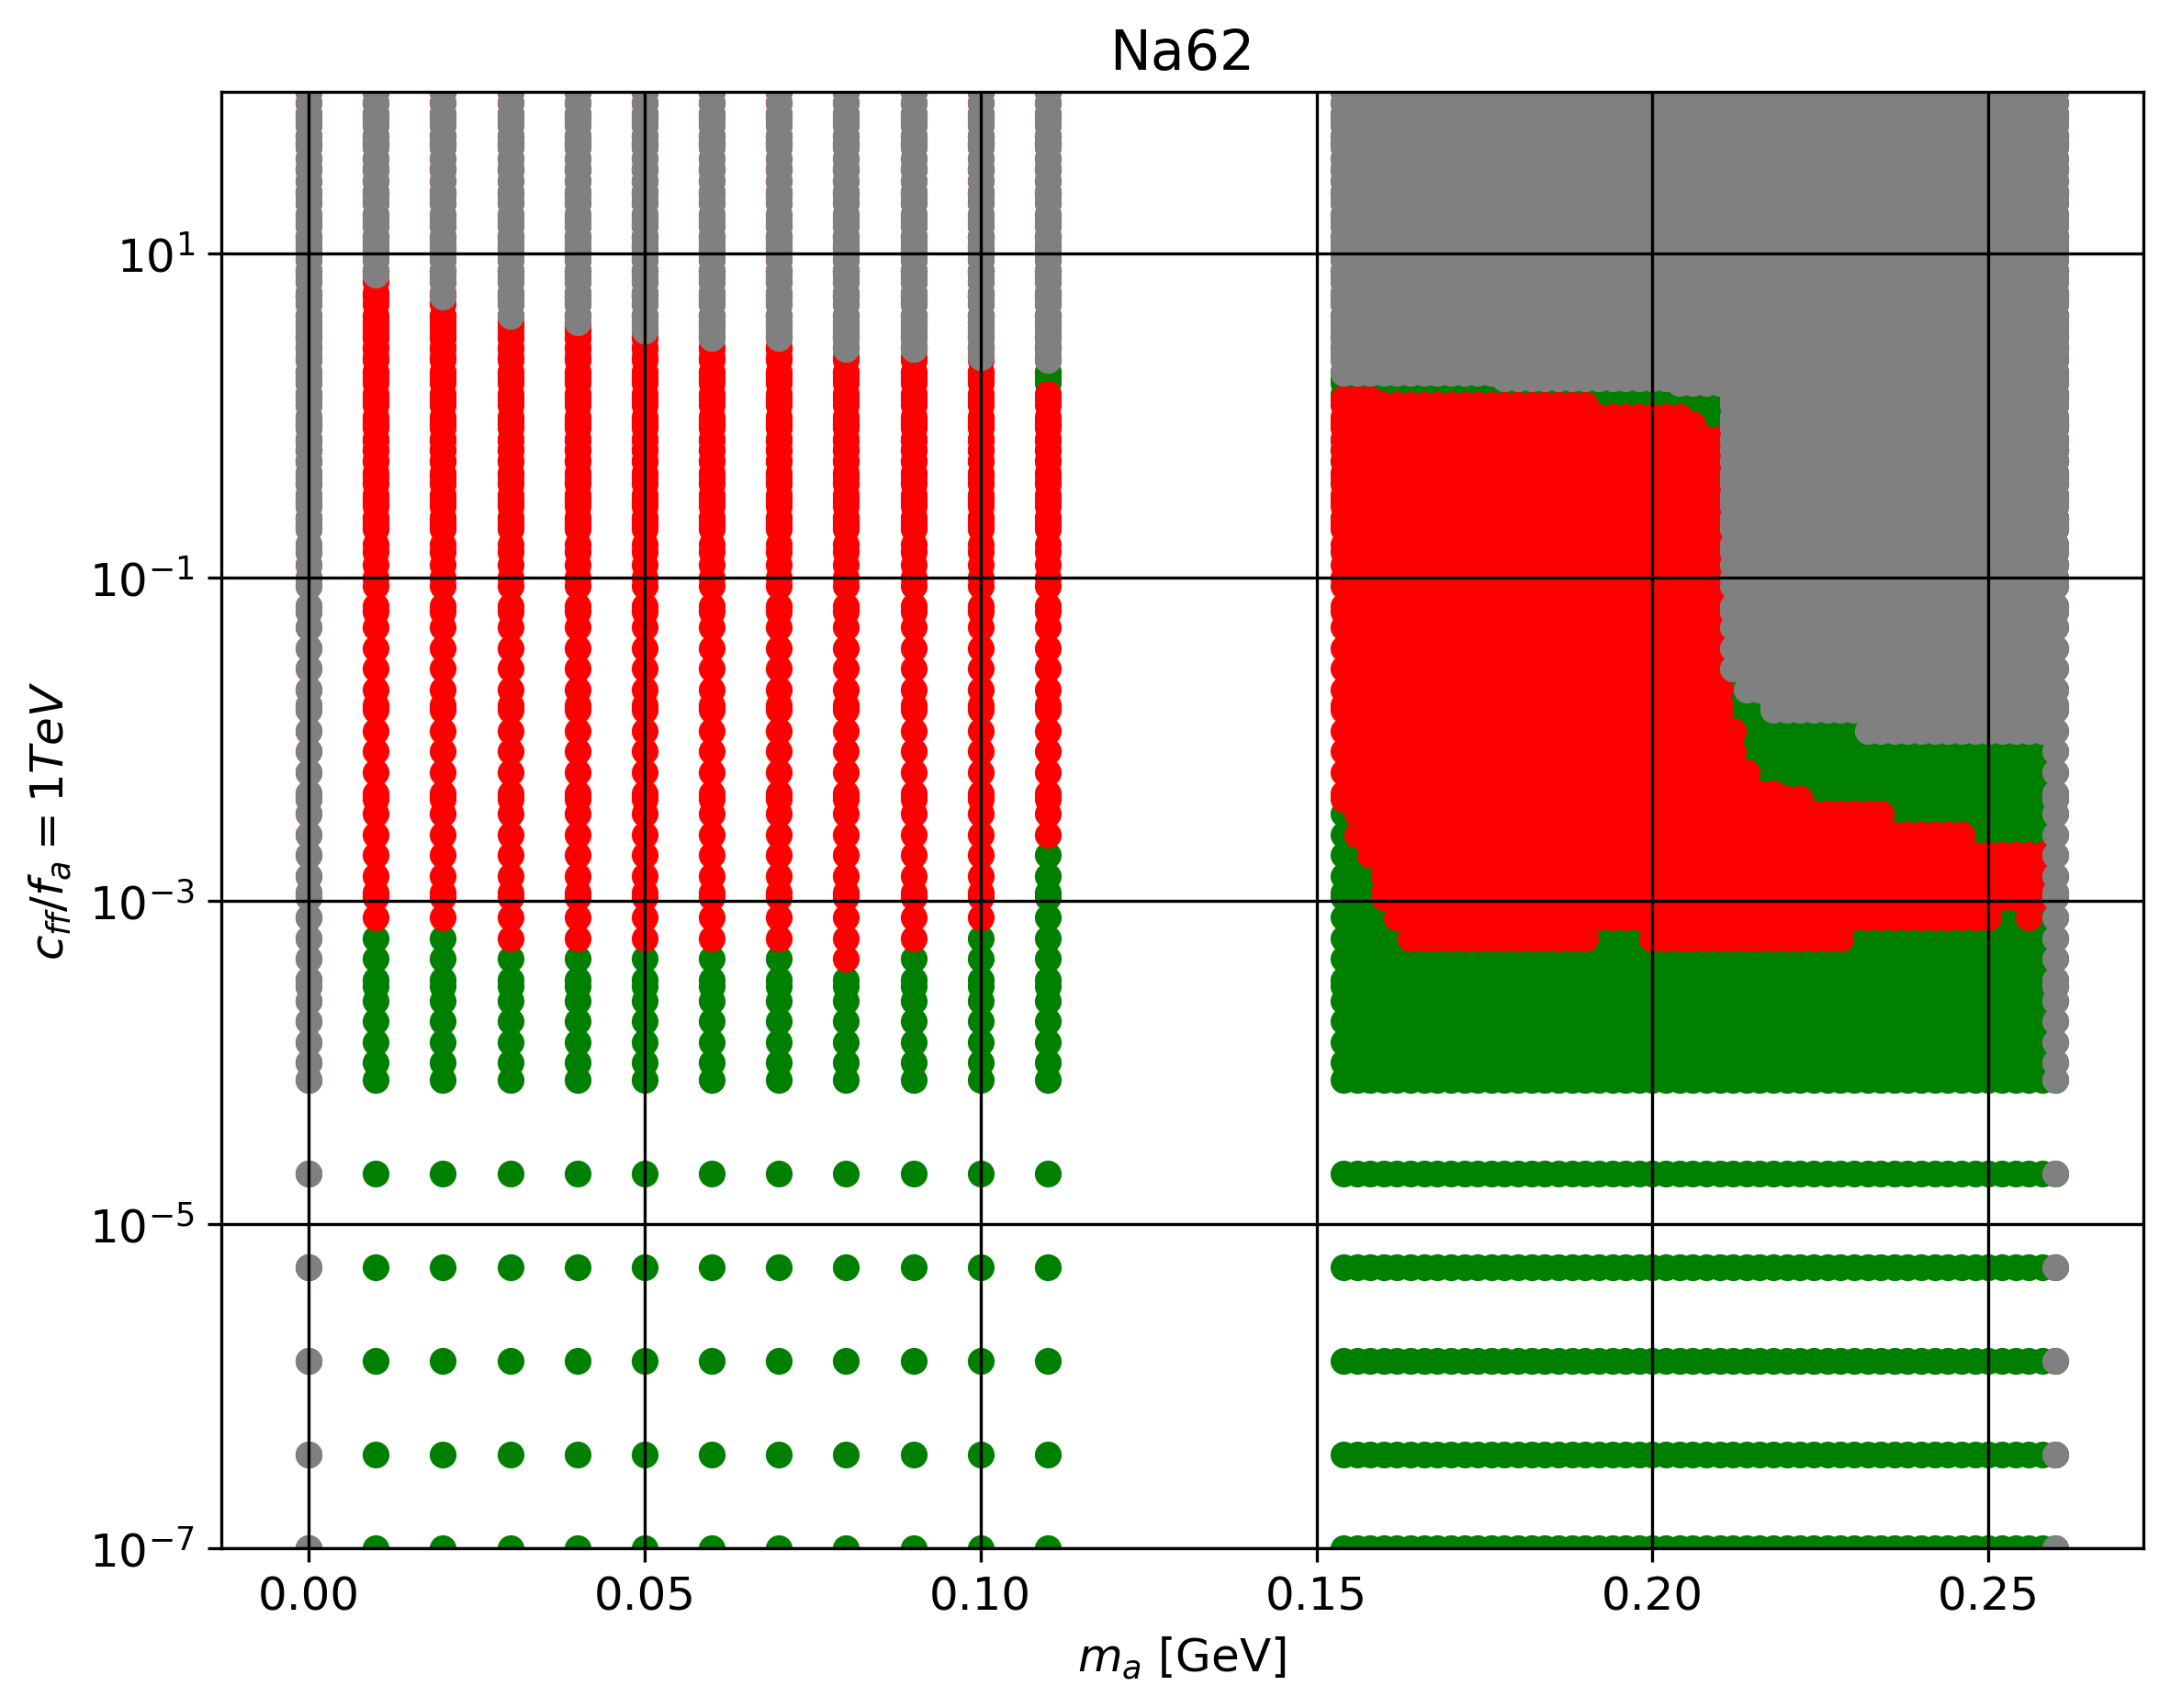

In [379]:
plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-BRKtoPia-cff_combined.dat",0,2)
plotAllowedWCuts("output/m-tau-c-BRKtoPia-cff_combined.dat",0,2,1,mMin=0,mMax=260*10**-3,\
                 tauMin=100,tauMax=np.infty,BRMin=0,BRMax=np.inf)

# plotCutOutRegions(cutoutRegionsNa62,0.05,0.2,10**-7,10**5,3,color="black")

plt.title('Na62')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**2)

plt.savefig('plots/Na62_cff_bound_new_form.png', dpi=300, bbox_inches='tight')

In [377]:
Lambda=4*np.pi*1000
cff=cBB=0
cWW=0.5

for ma in [50*10**(-3),120*10**(-3),200*10**(-3)]:
    
    csd1=csdFromFundamentalCouplings(cff/2,cWW,Lambda,ma)
    csd=getCsd(cff/2, cWW, cBB, Lambda, sm['mK+'])

    BR= BrKtoPiaplus(ma, csd, Lambda)
    tau=ctaua(ma, cff/2, cWW, cBB, Lambda)/sm['c']*10**12
    
    print("BRSimp(K+ -> pi+ a)=",BrKtoPiaplusSimpl(ma, cff, cWW))
    print("cWW/fa=",cWW, "; ma=",ma, "; csd=",csd,"; BR(K+ -> pi+ a)=",BR,"; tau(a)=",tau, "[ps]\n")

BRSimp(K+ -> pi+ a)= 2.6022322070517424e-10
cWW/fa= 0.5 ; ma= 0.05 ; csd= (-4.98559390768477e-09+2.1015213527894383e-09j) ; BR(K+ -> pi+ a)= 2.532491051648582e-10 ; tau(a)= 752641.9183554114 [ps]

BRSimp(K+ -> pi+ a)= 2.435828926722119e-10
cWW/fa= 0.5 ; ma= 0.12 ; csd= (-4.98559390768477e-09+2.1015213527894383e-09j) ; BR(K+ -> pi+ a)= 2.370547464424599e-10 ; tau(a)= 54442.5646389337 [ps]

BRSimp(K+ -> pi+ a)= 2.0645813760874598e-10
cWW/fa= 0.5 ; ma= 0.2 ; csd= (-4.98559390768477e-09+2.1015213527894383e-09j) ; BR(K+ -> pi+ a)= 2.0092495382130375e-10 ; tau(a)= 11755.25903146538 [ps]



[inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax]= ['output/m-tau-c-BRKtoPia-cWW_combined.dat', 0, 2, 1, 0, 0.26, 100, inf, 0, inf]


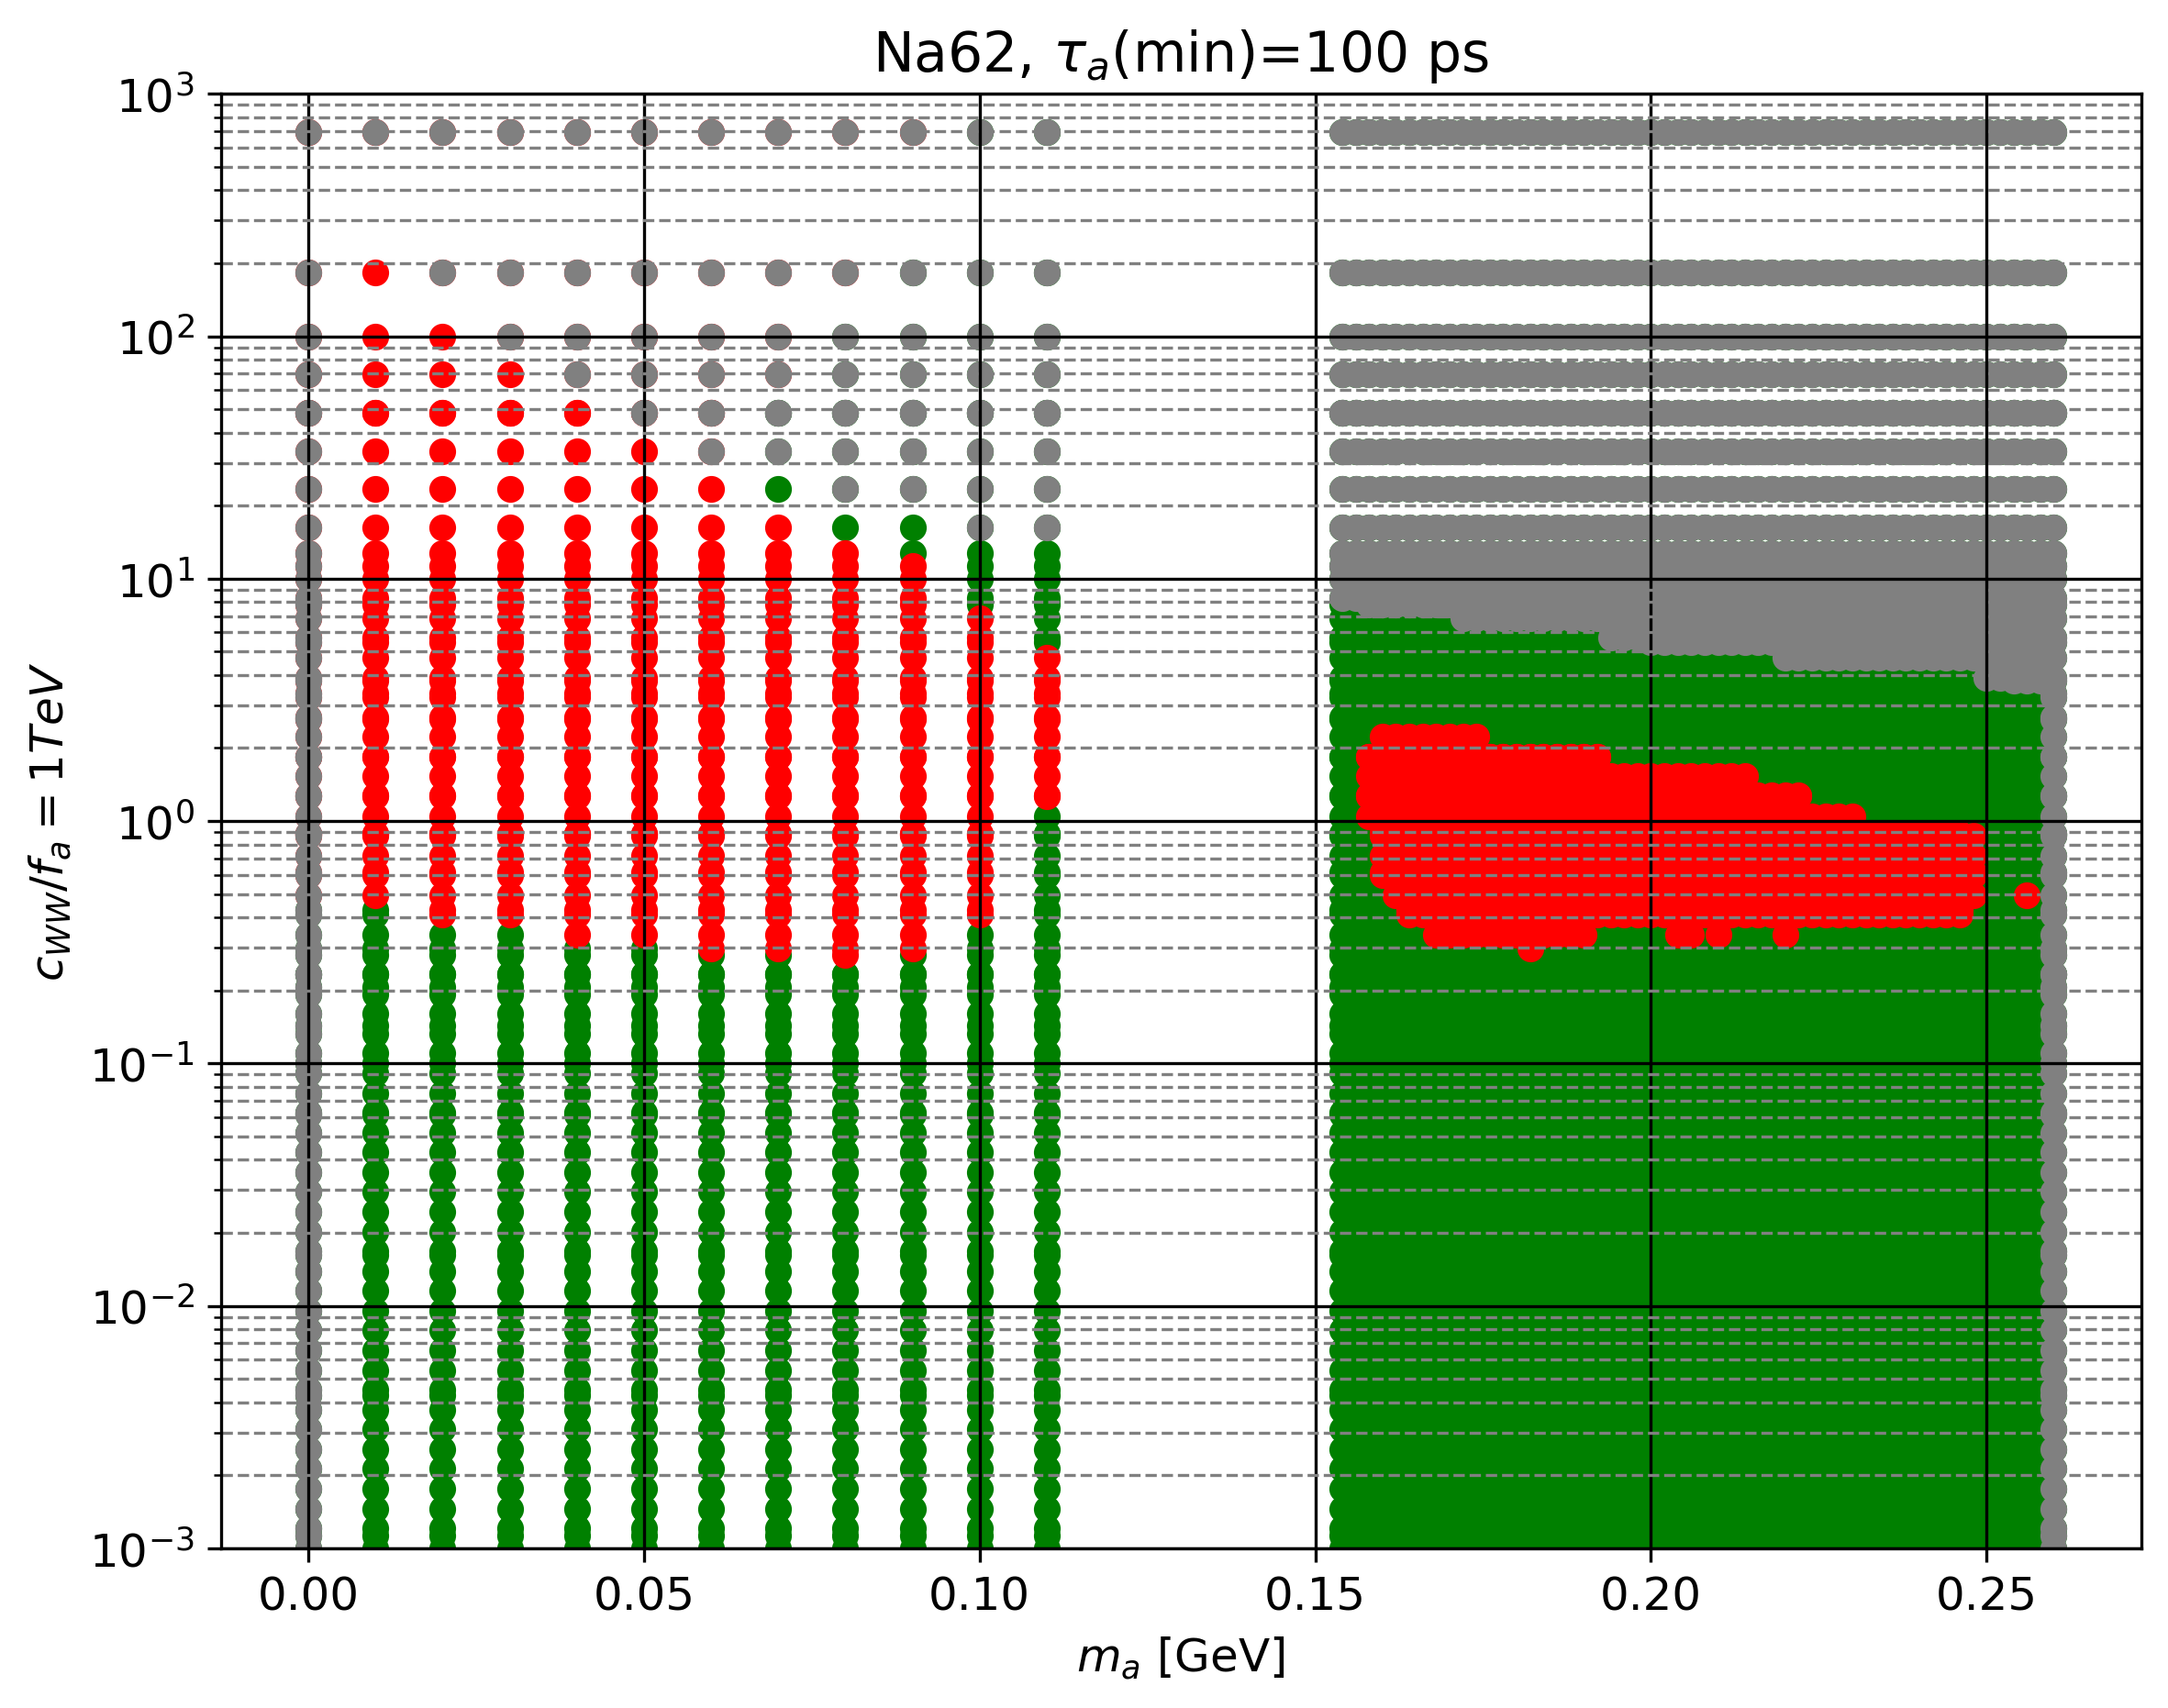

In [378]:
plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-BRKtoPia-cWW_combined.dat",0,2)
# plotAllowedWCuts("output/m-tau-c-BRKtoPia-cWW_combined.dat",0,2,1,mMin=0,mMax=260*10**-3,\
#                  tauMin=100,tauMax=np.infty)
plotAllowedWCuts("output/m-tau-c-BRKtoPia-cWW_combined.dat",0,2,1,mMin=0,mMax=260*10**-3,\
                 tauMin=100,tauMax=np.infty,BRMin=0,BRMax=np.inf)

# plotCutOutRegions(cutoutRegionsNa62,0.05,0.2,10**-7,10**5,3,color="black")

plt.title('Na62, $\\tau_a$(min)=100 ps')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-3, 10**3)

# plt.xscale("log")
plt.yscale("log")

plt.savefig('plots/Na62_cWW_bound_new_form_100ps.png', dpi=300, bbox_inches='tight')

## BaBar 

In [189]:
mmTOps=10**-3/299792458*10**12

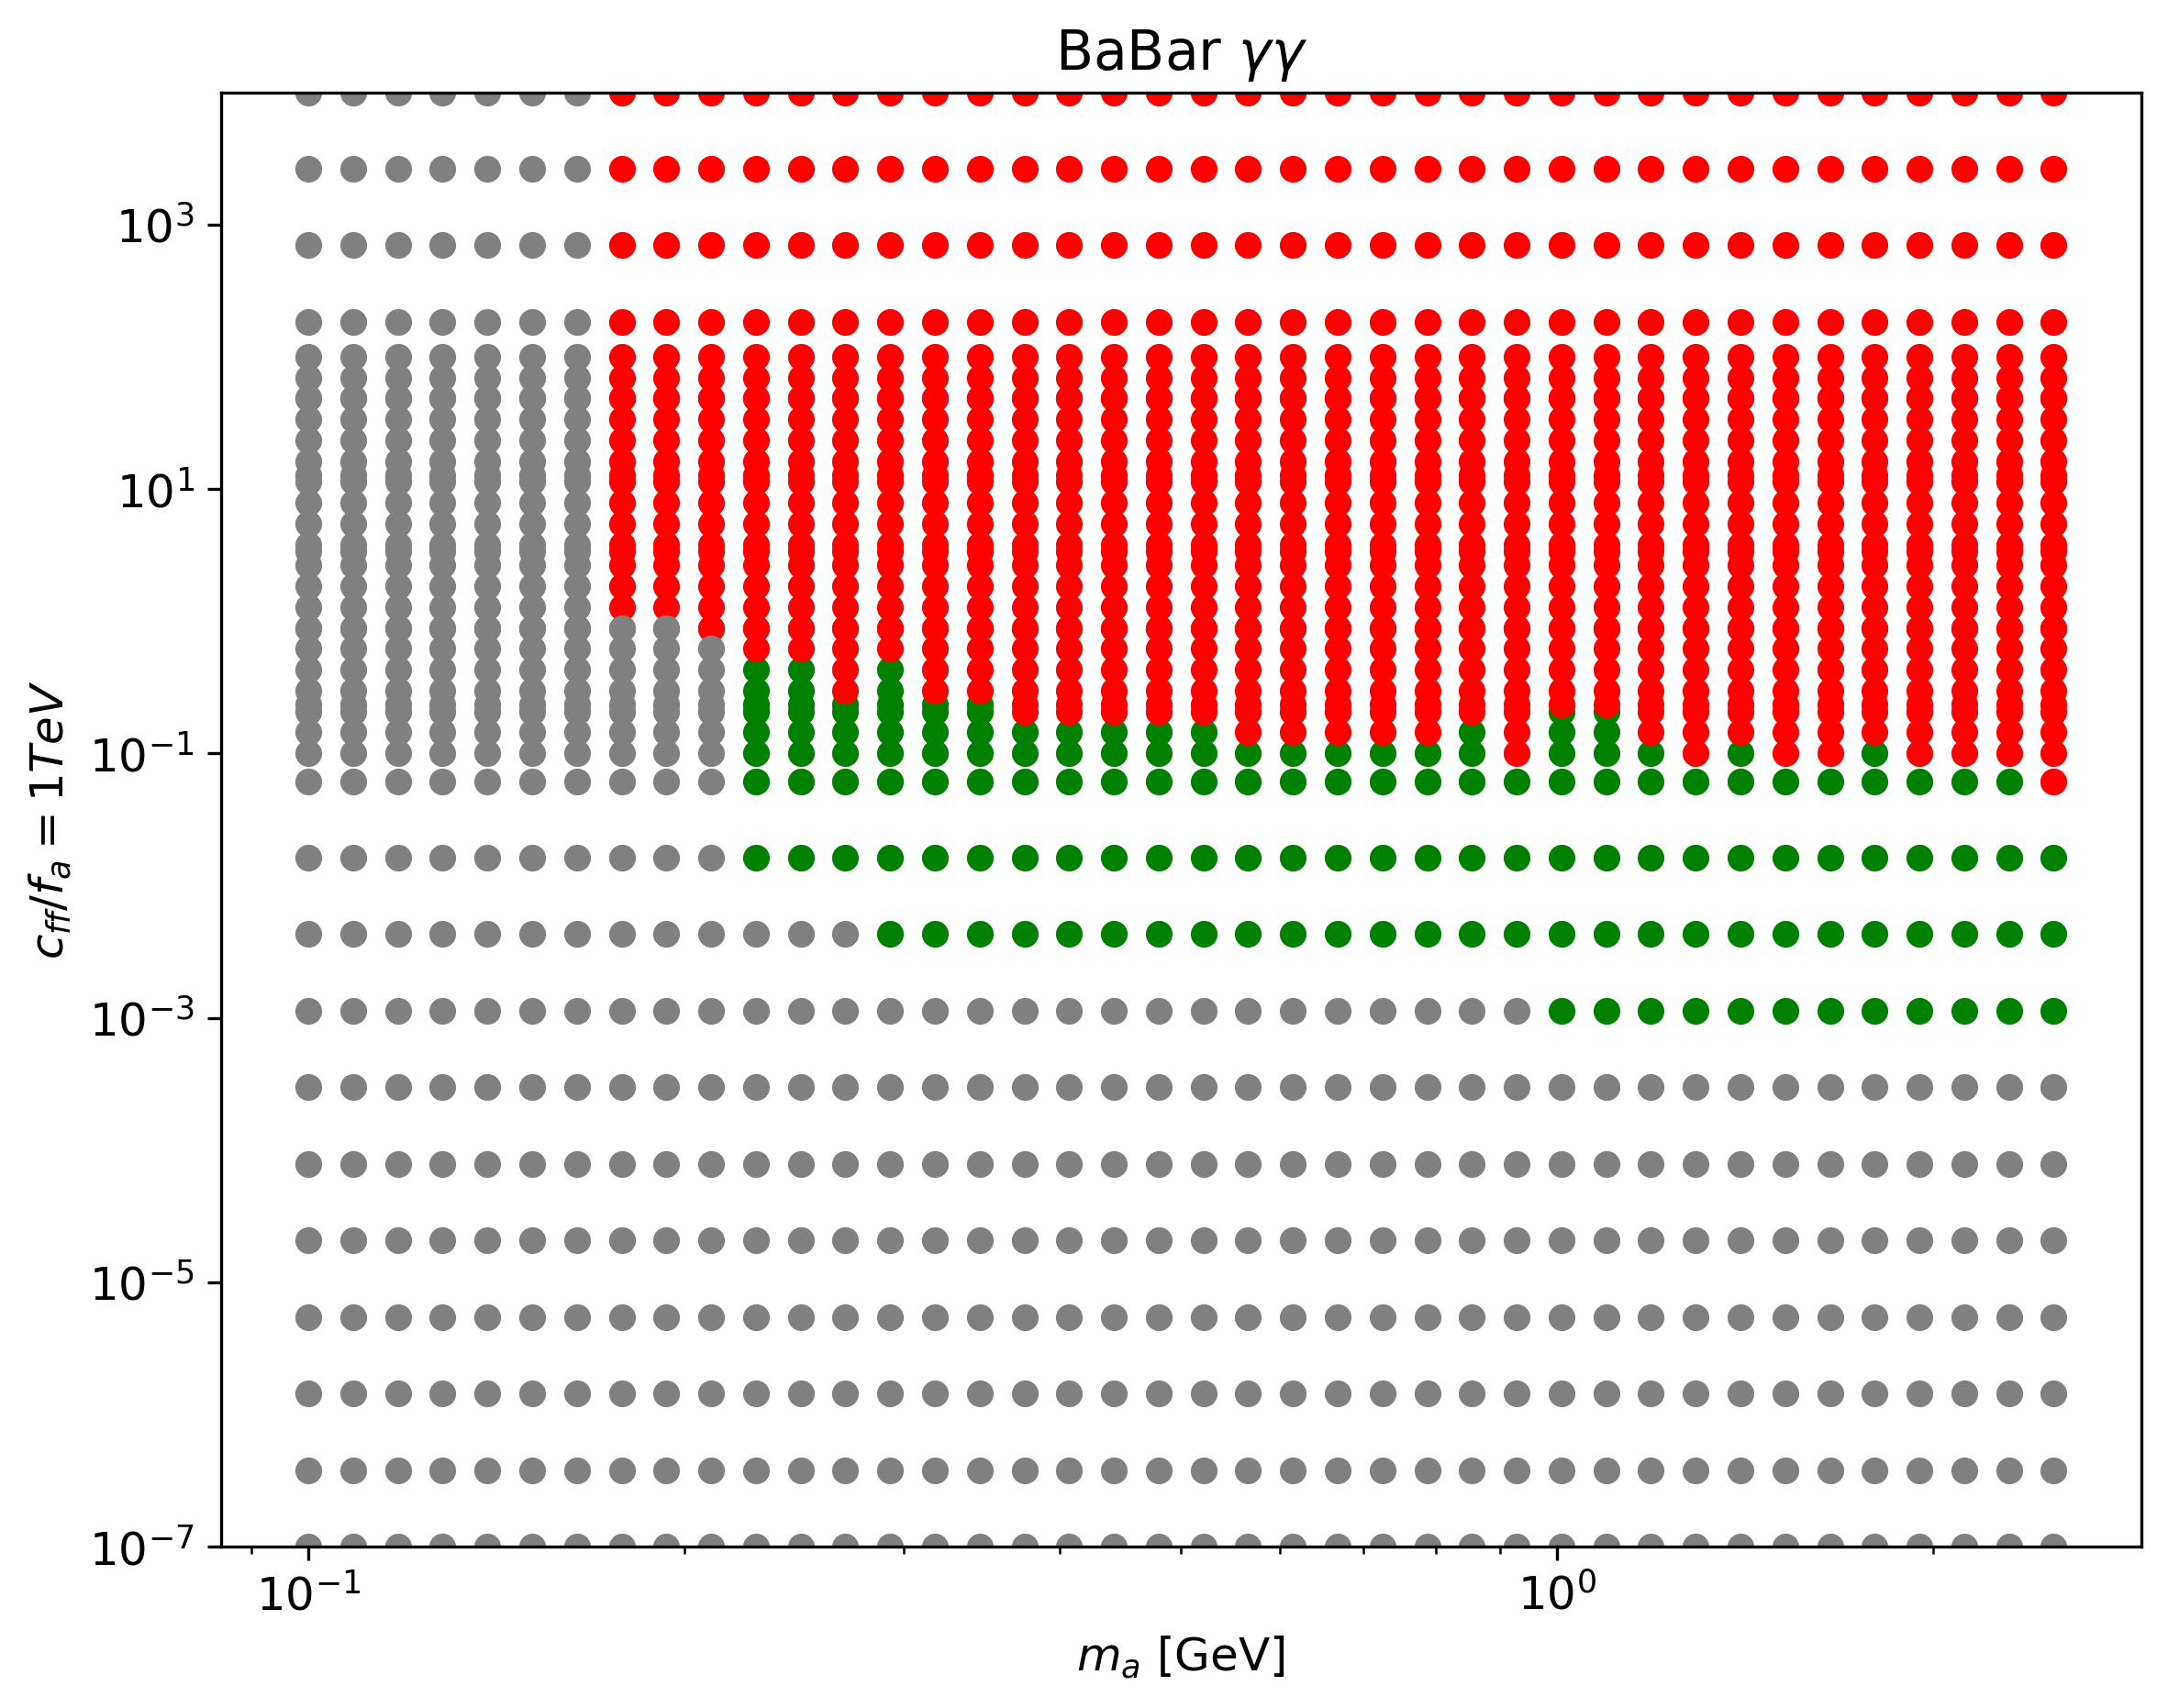

In [190]:
plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-BRBtoKgammagamma-cff_combined.dat",0,2)
plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cff_combined.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=100*mmTOps,BRMin=0,BRMax=np.inf)

# plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-7,10**5,2,color="black")

plt.title('BaBar $\gamma \gamma$')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

plt.savefig('plots/BaBar-gammagamma_cff_bound_new_form.png', dpi=300, bbox_inches='tight')

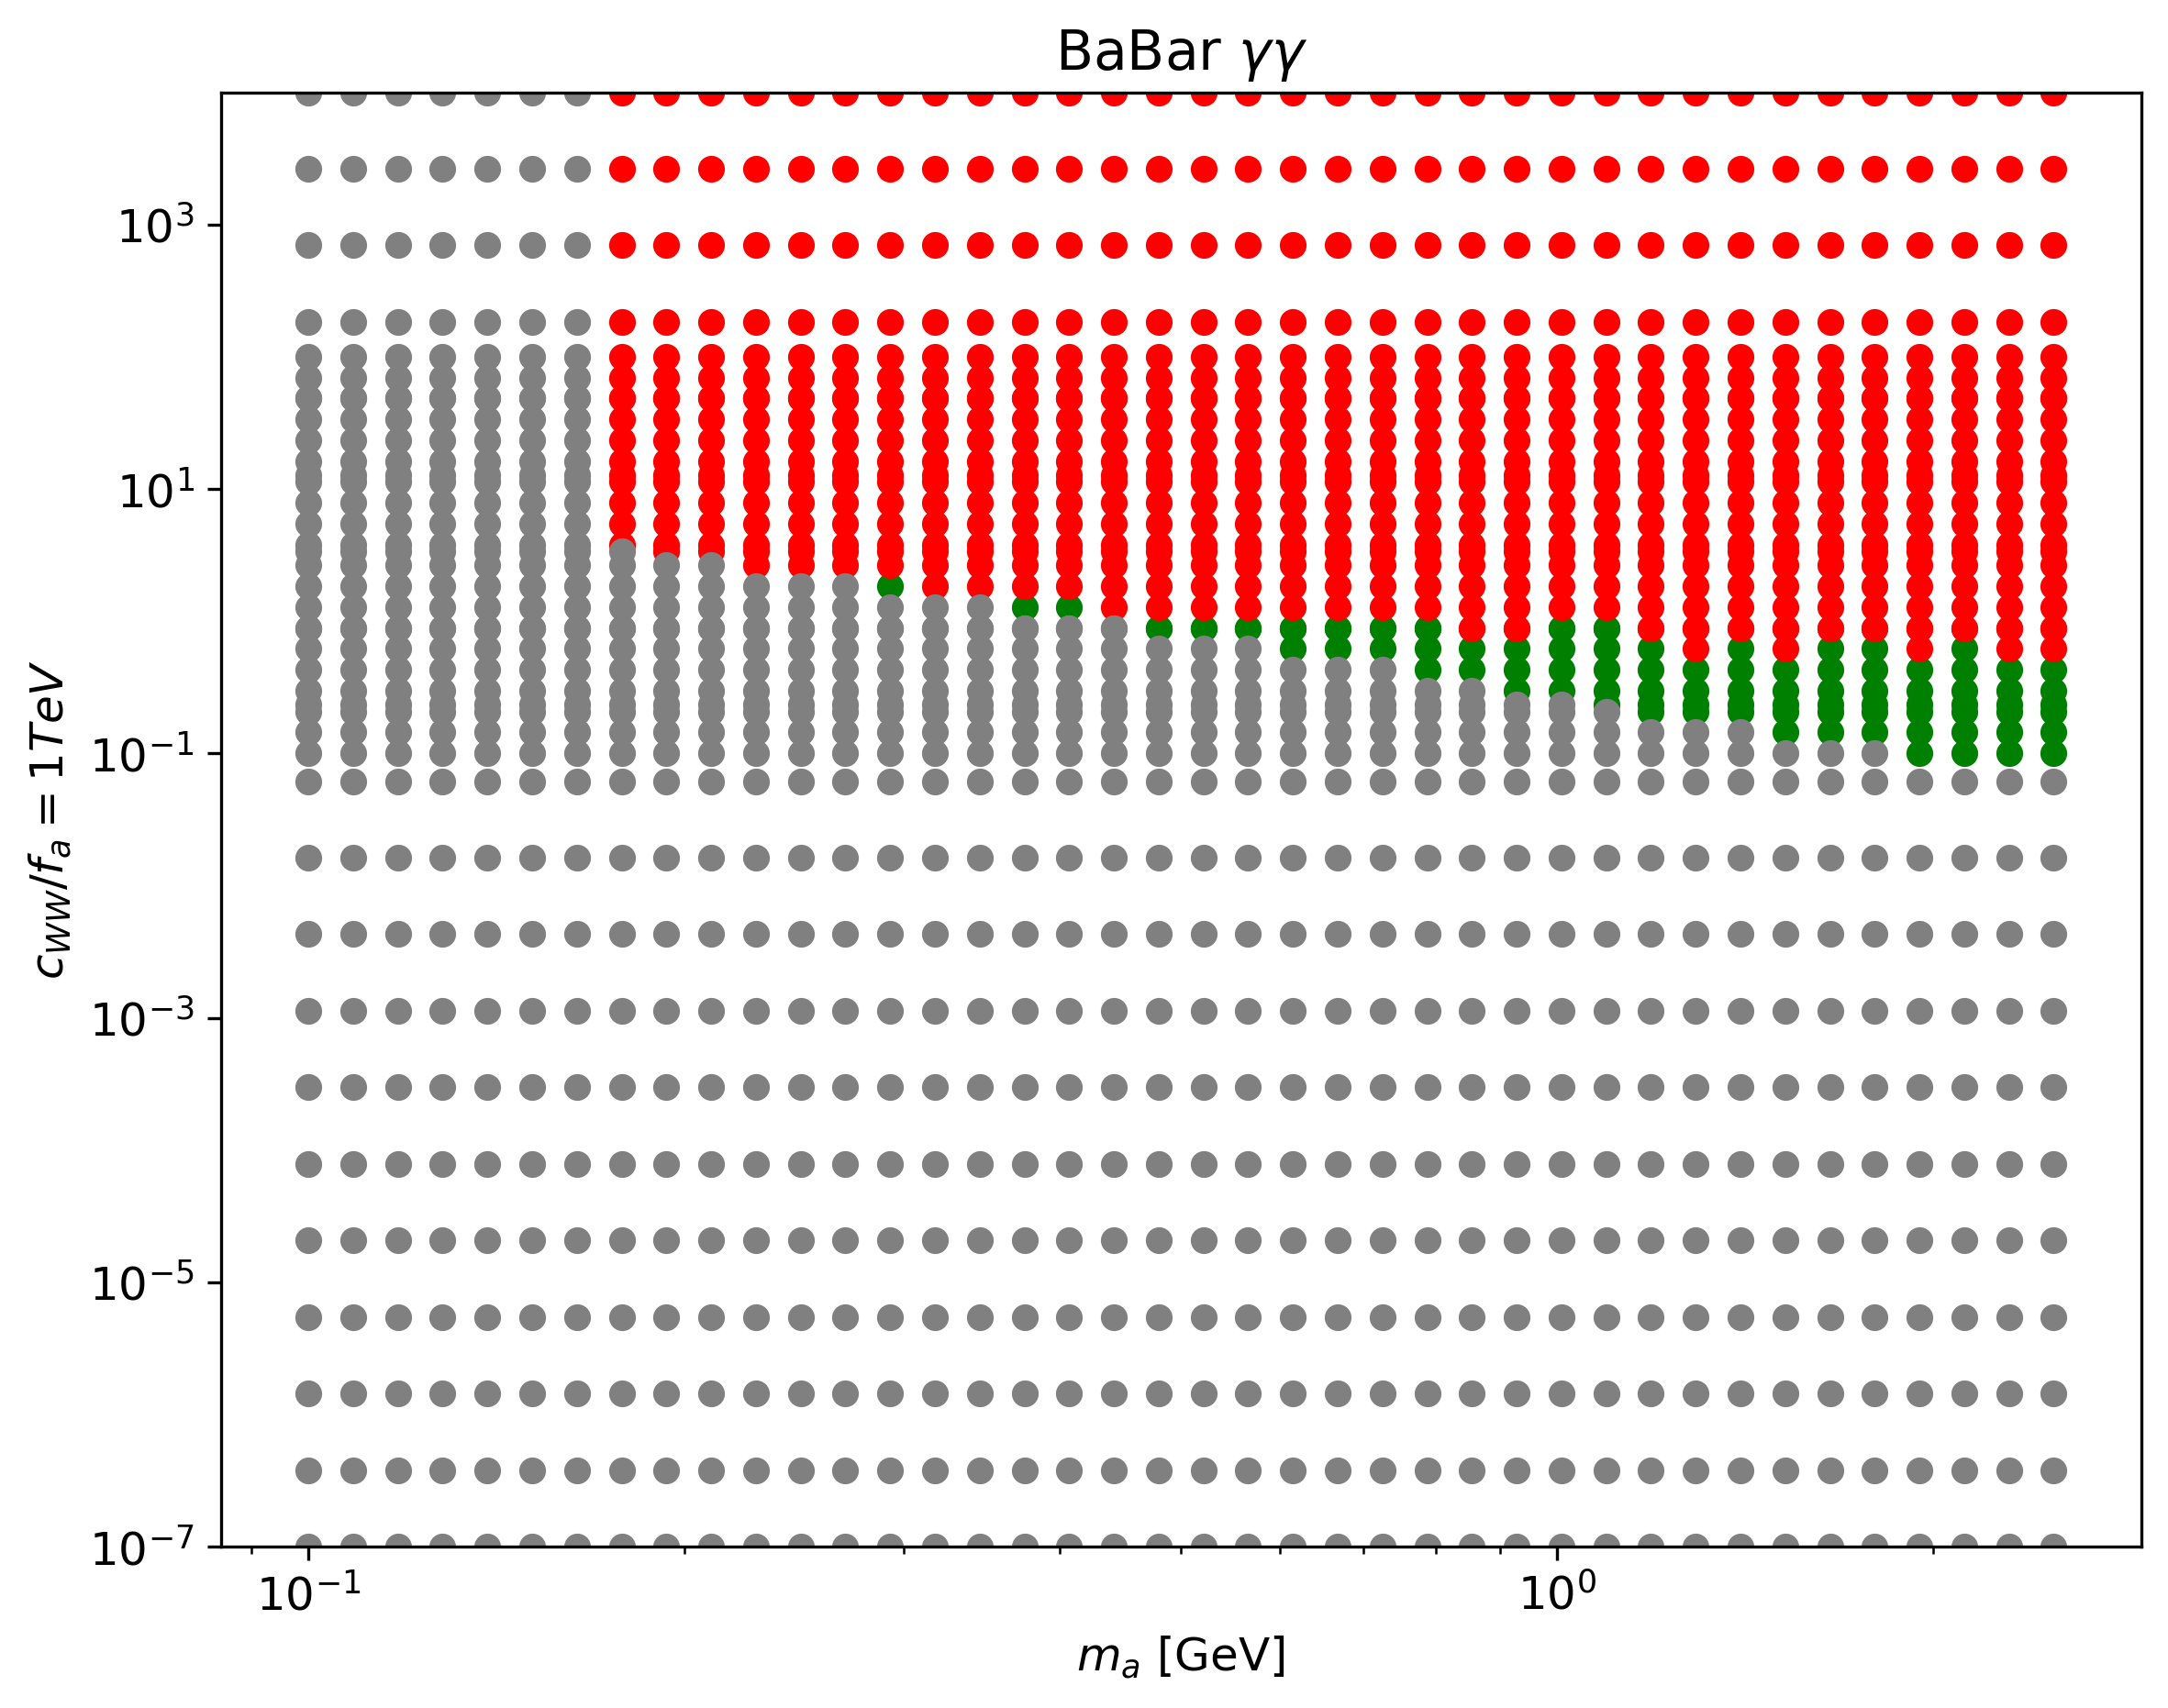

In [191]:
plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-BRBtoKgammagamma-cWW_combined.dat",0,2)
plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cWW_combined.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=100*mmTOps,BRMin=0,BRMax=np.inf)

# plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-7,10**5,2,color="black")

plt.title('BaBar $\gamma \gamma$')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

plt.savefig('plots/BaBar-gammagamma_cWW_bound_new_form.png', dpi=300, bbox_inches='tight')

## BaBar prompt

(1e-07, 10000)

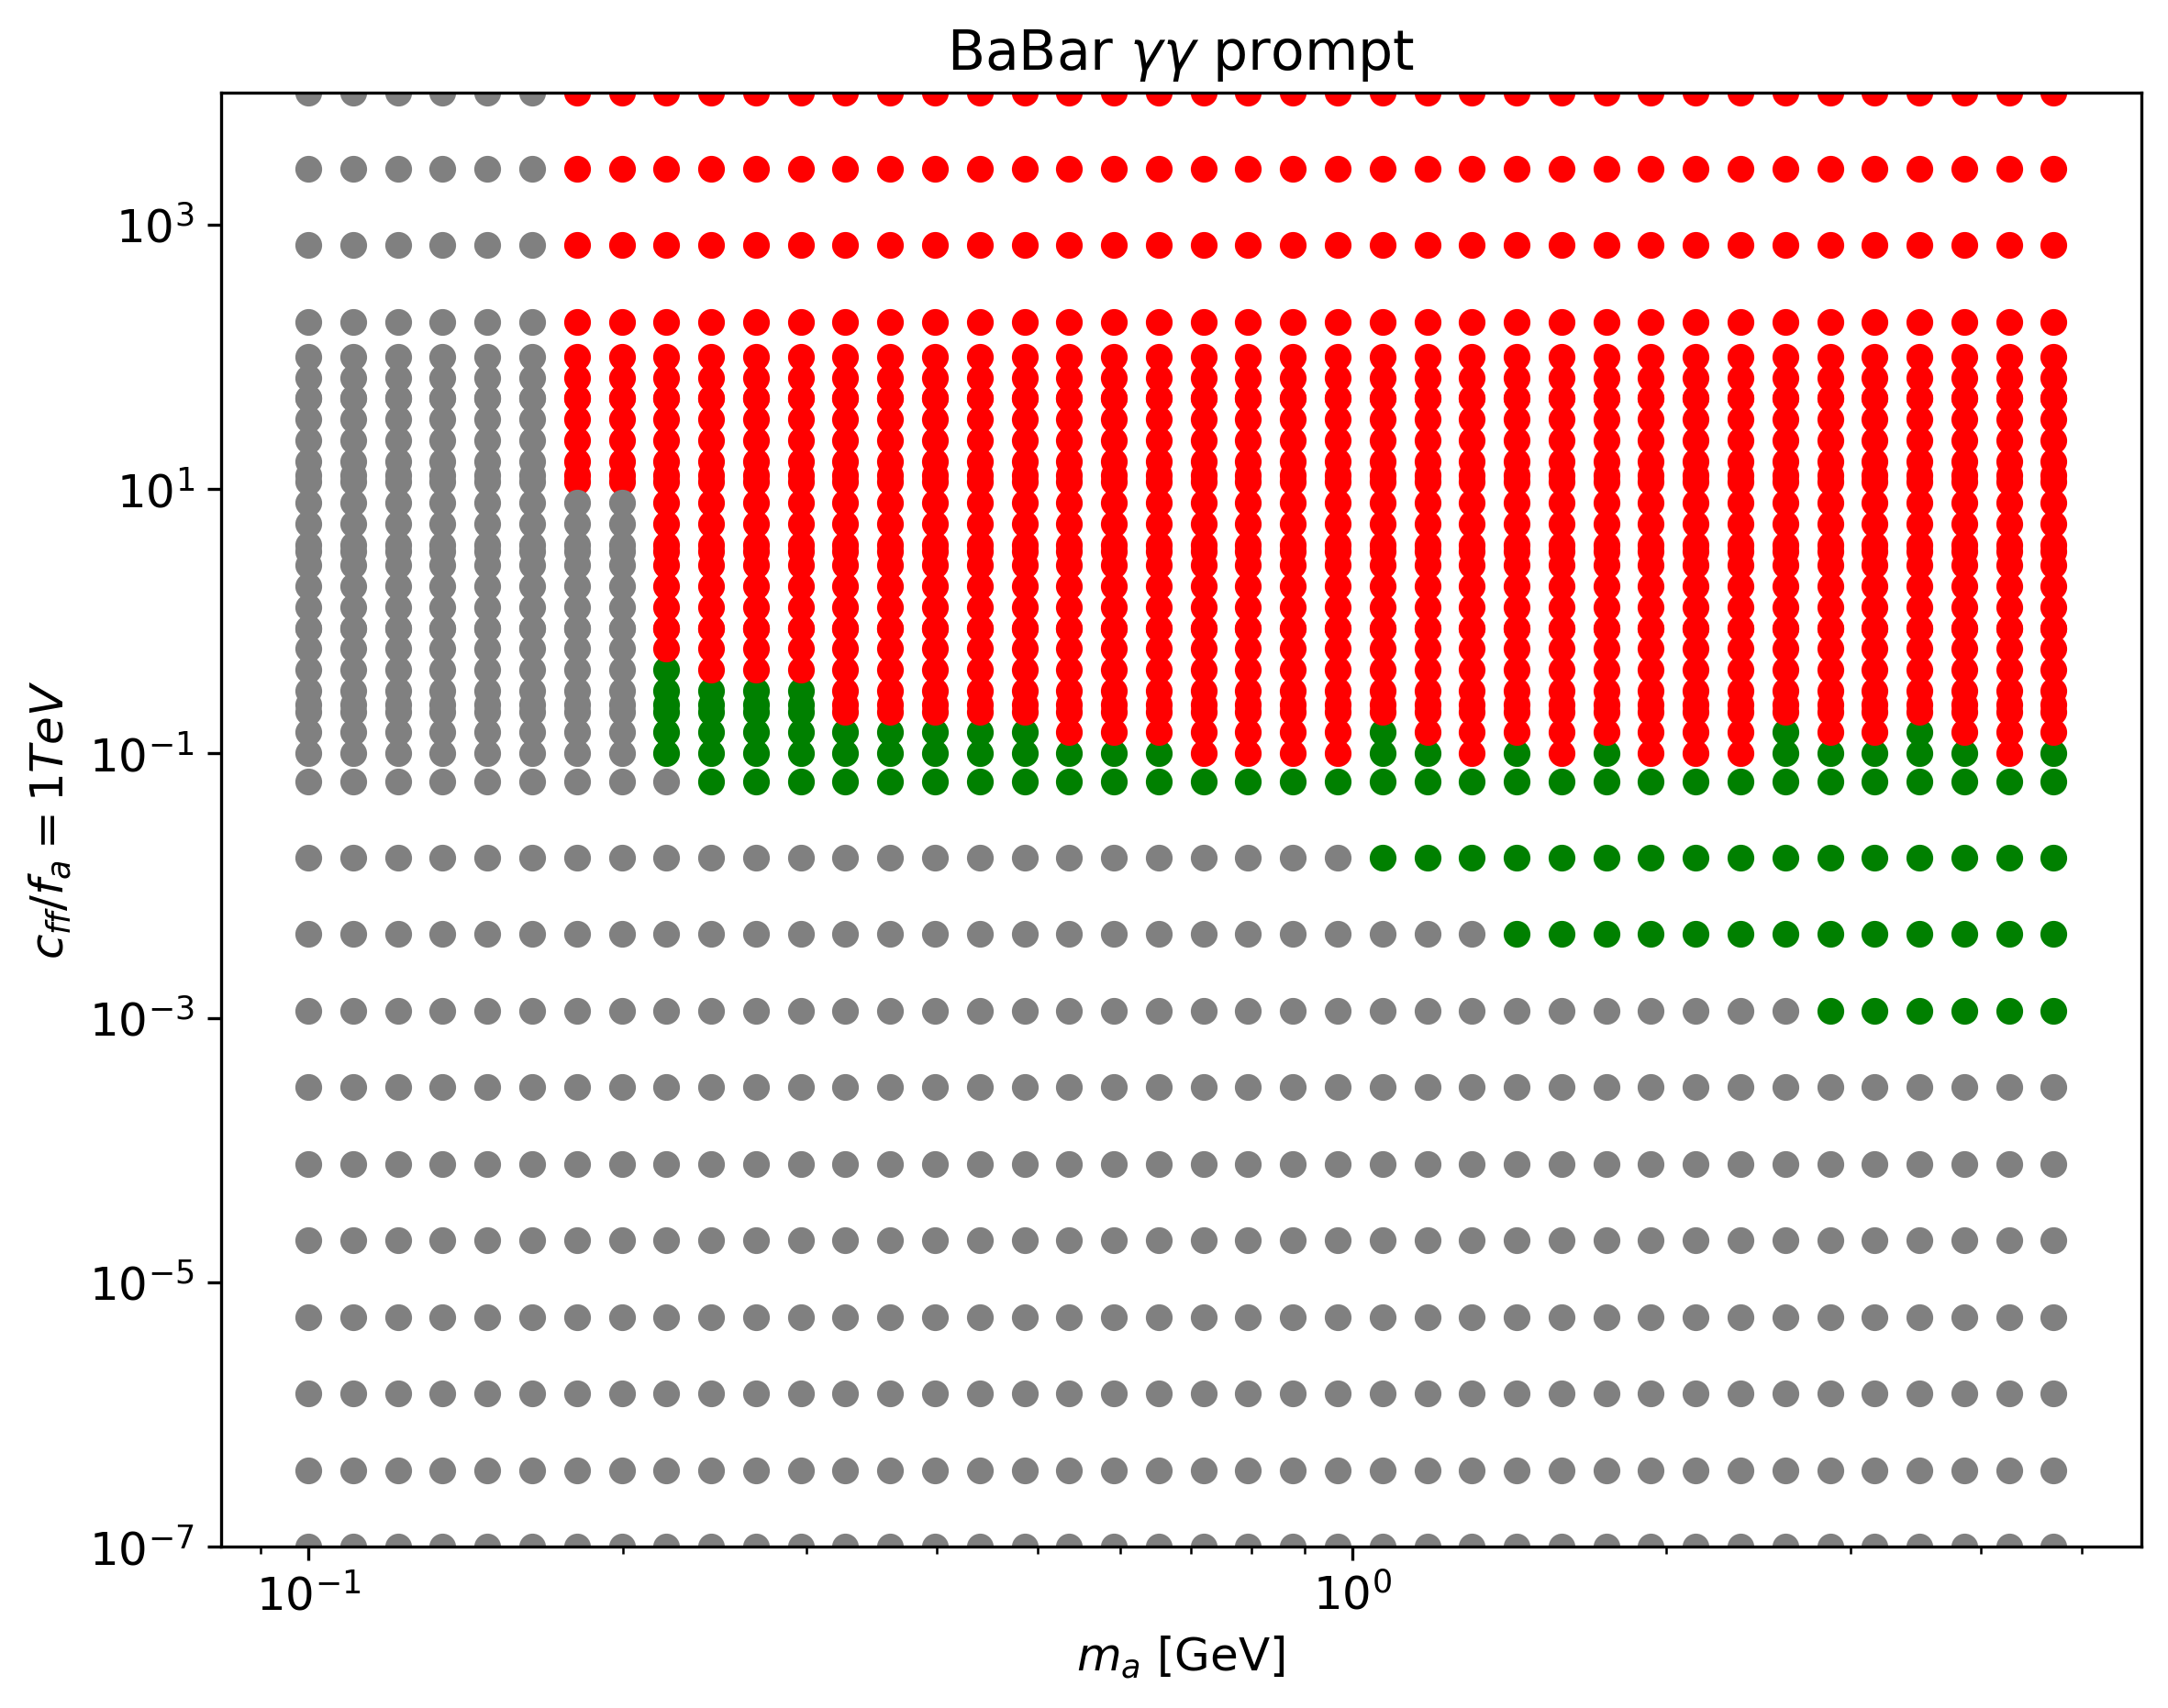

In [192]:
plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-BRBtoKgammagamma-cff_combined.dat",0,2)
plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cff_combined-prompt.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=1*mmTOps,BRMin=0,BRMax=np.inf)

# plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-7,10**5,2,color="black")

plt.title('BaBar $\gamma \gamma$ prompt')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

# plt.savefig('plots/BaBar-gammagamma_cff_bound_new_form-prompt.png', dpi=300, bbox_inches='tight')

(1e-07, 10000)

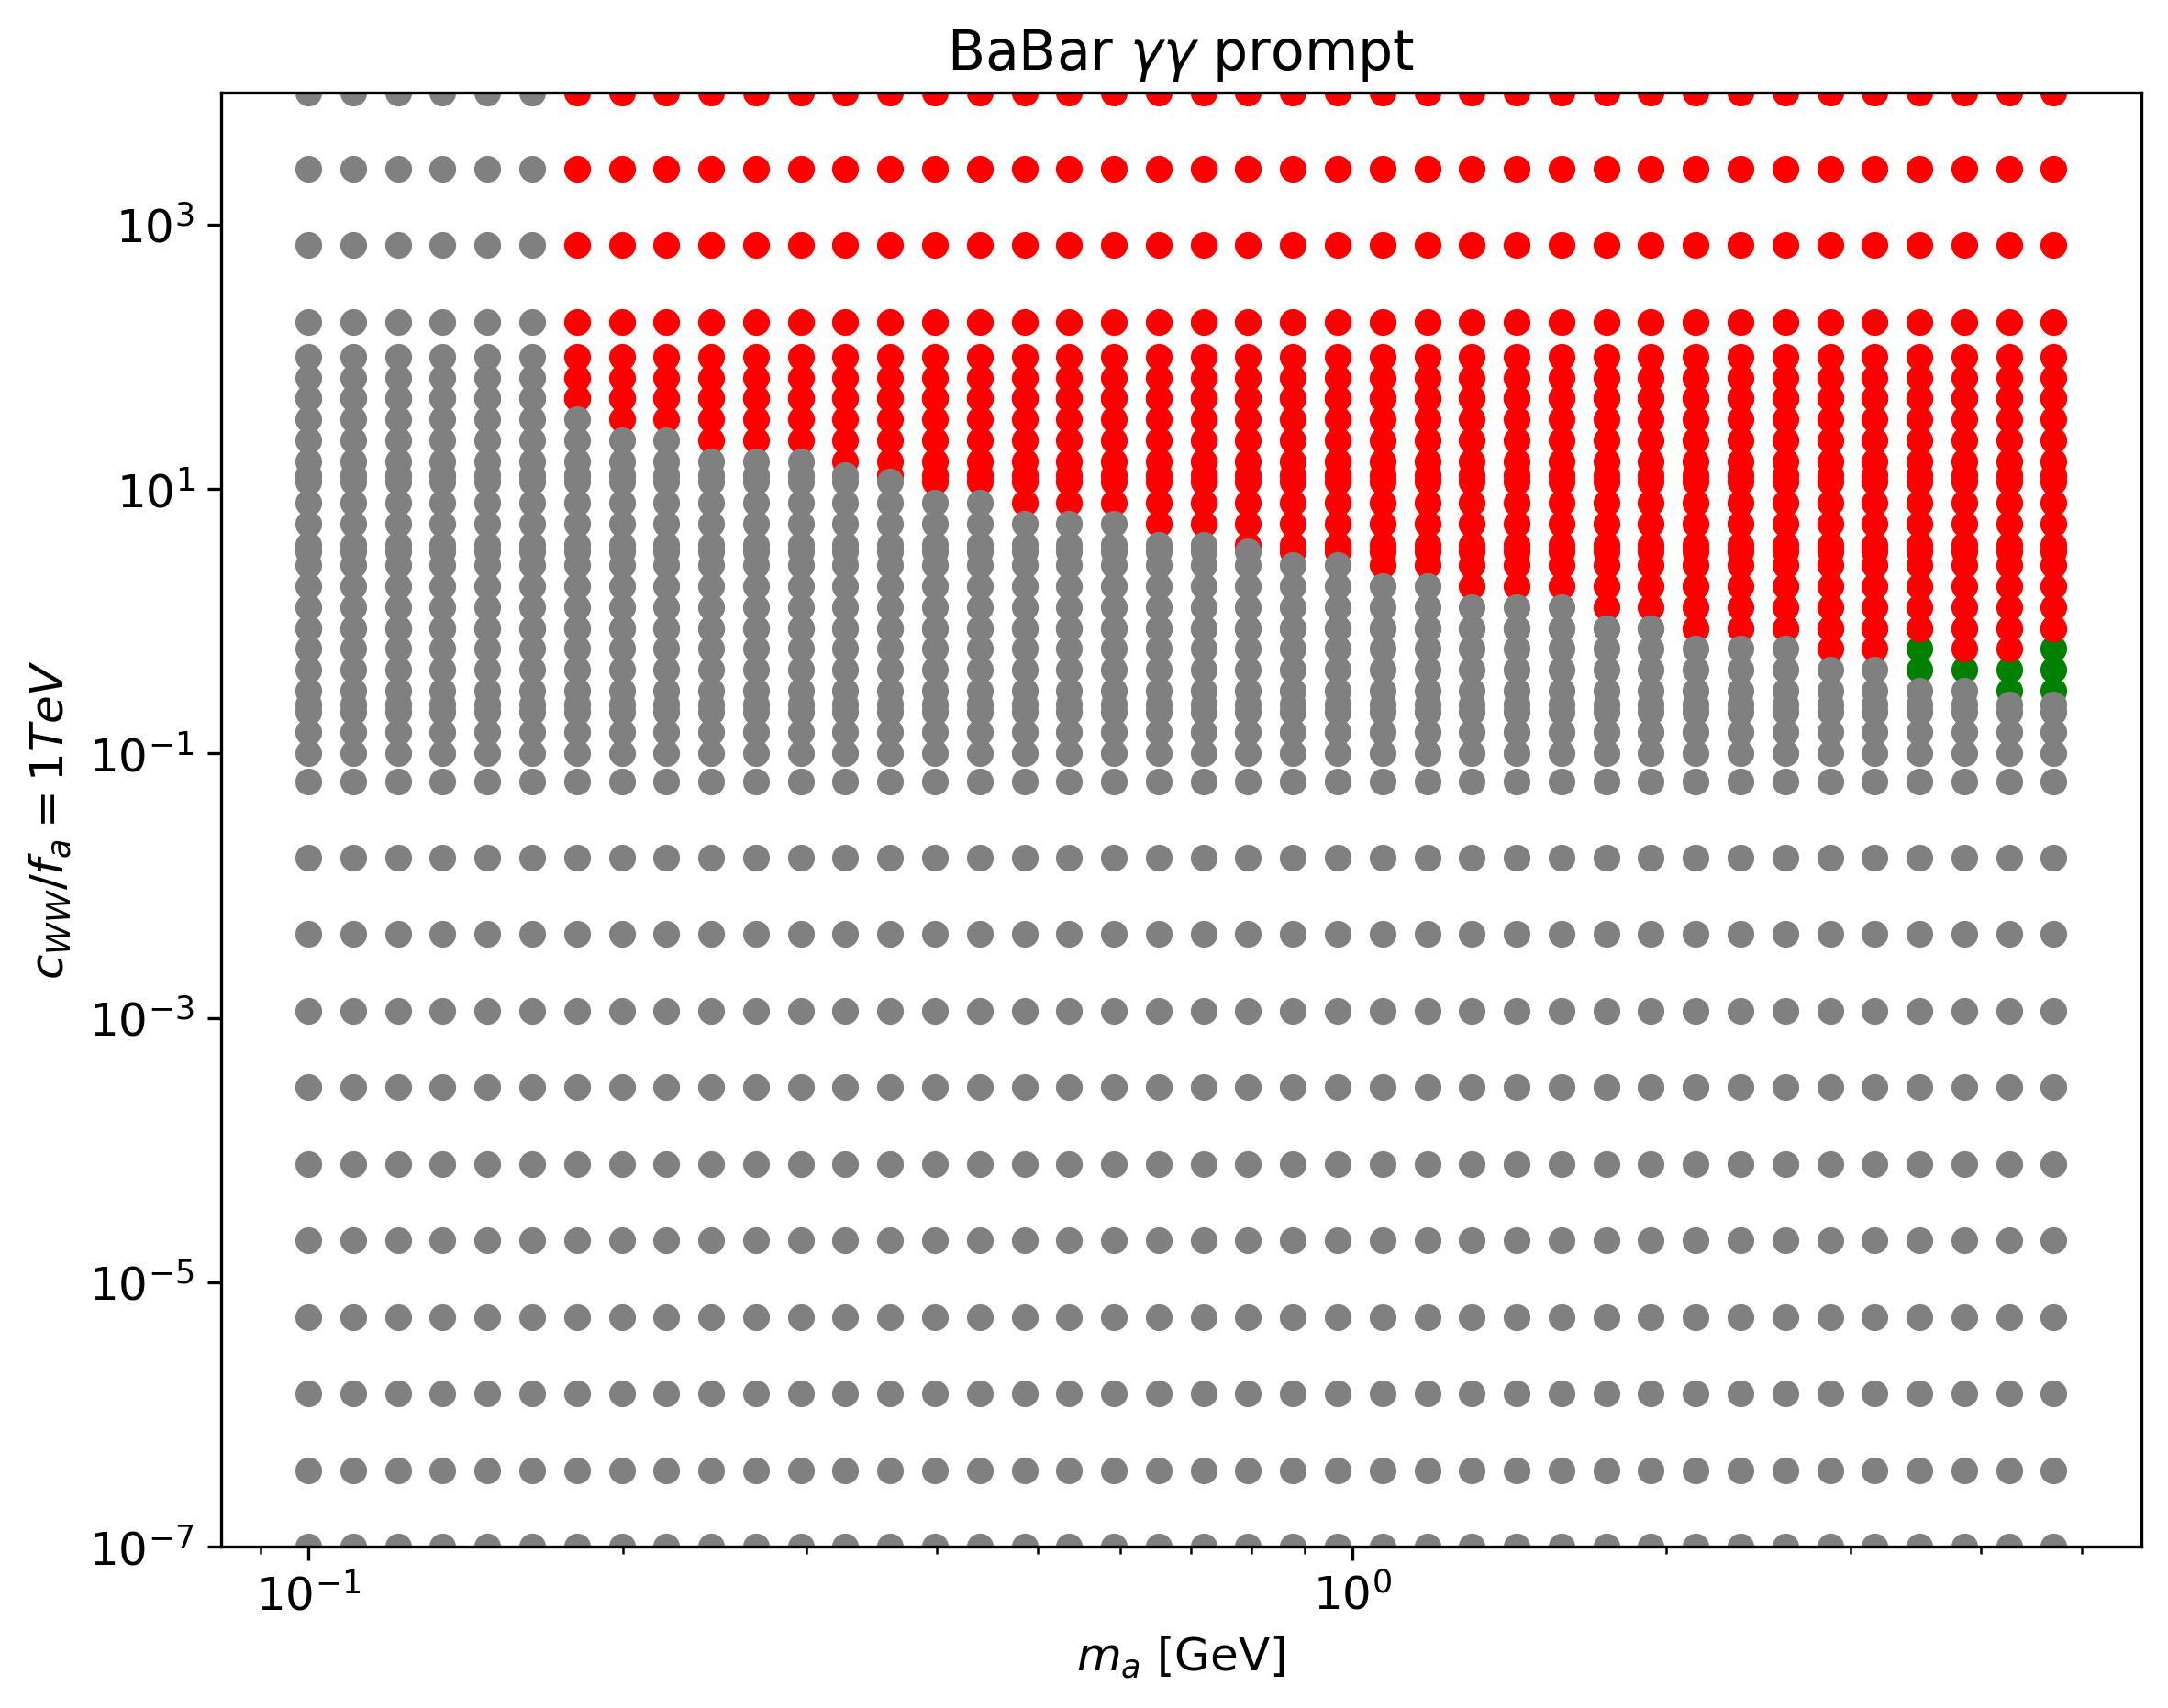

In [193]:
plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-BRBtoKgammagamma-cWW_combined.dat",0,2)
plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cWW_combined-prompt.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=1*mmTOps,BRMin=0,BRMax=np.inf)

# plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-7,10**5,2,color="black")

plt.title('BaBar $\gamma \gamma$ prompt')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

# plt.savefig('plots/BaBar-gammagamma_cWW_bound_new_form-prompt.png', dpi=300, bbox_inches='tight')

## BaBar displaced+prompt

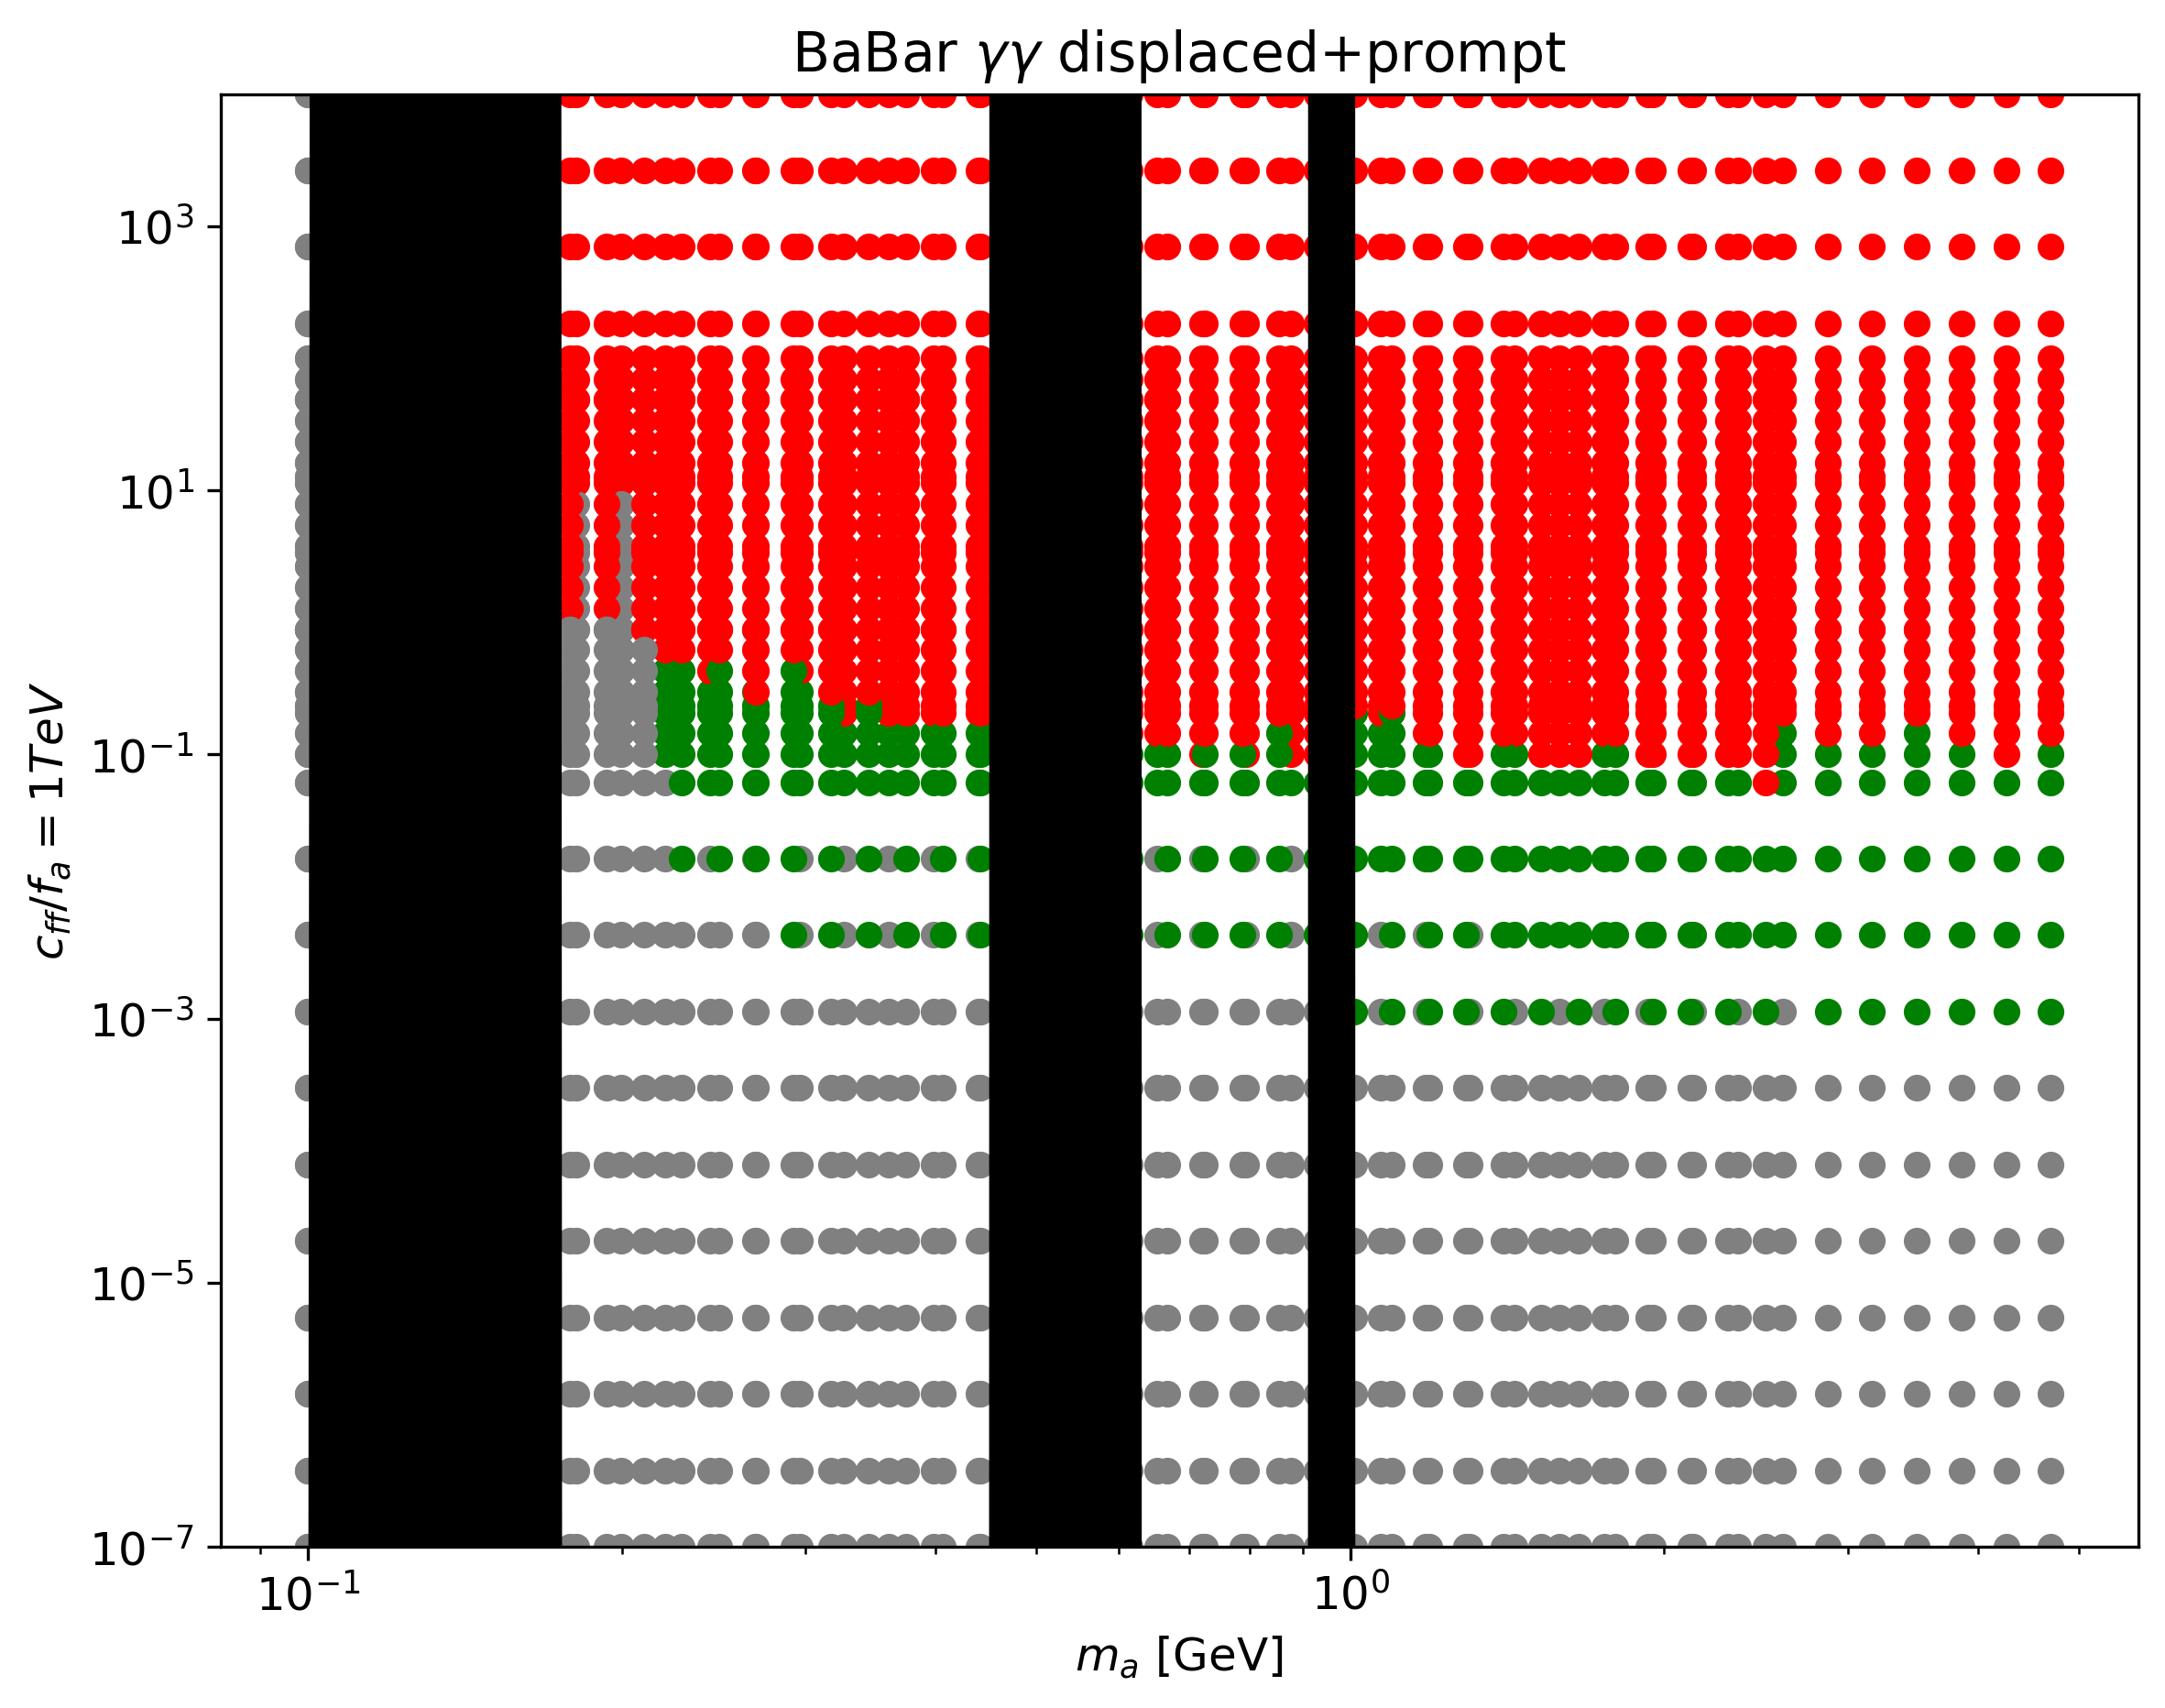

In [194]:
plt.figure(figsize=(9, 7))

plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cff_combined-prompt.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=1*mmTOps,BRMin=0,BRMax=np.inf)
plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cff_combined.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=100*mmTOps,BRMin=0,BRMax=np.inf)

plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-7,10**5,2,color="black")

plt.title('BaBar $\gamma \gamma$ displaced+prompt')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

plt.savefig('plots/BaBar-gammagamma_cff_bound_new_form-prompt.png', dpi=300, bbox_inches='tight')

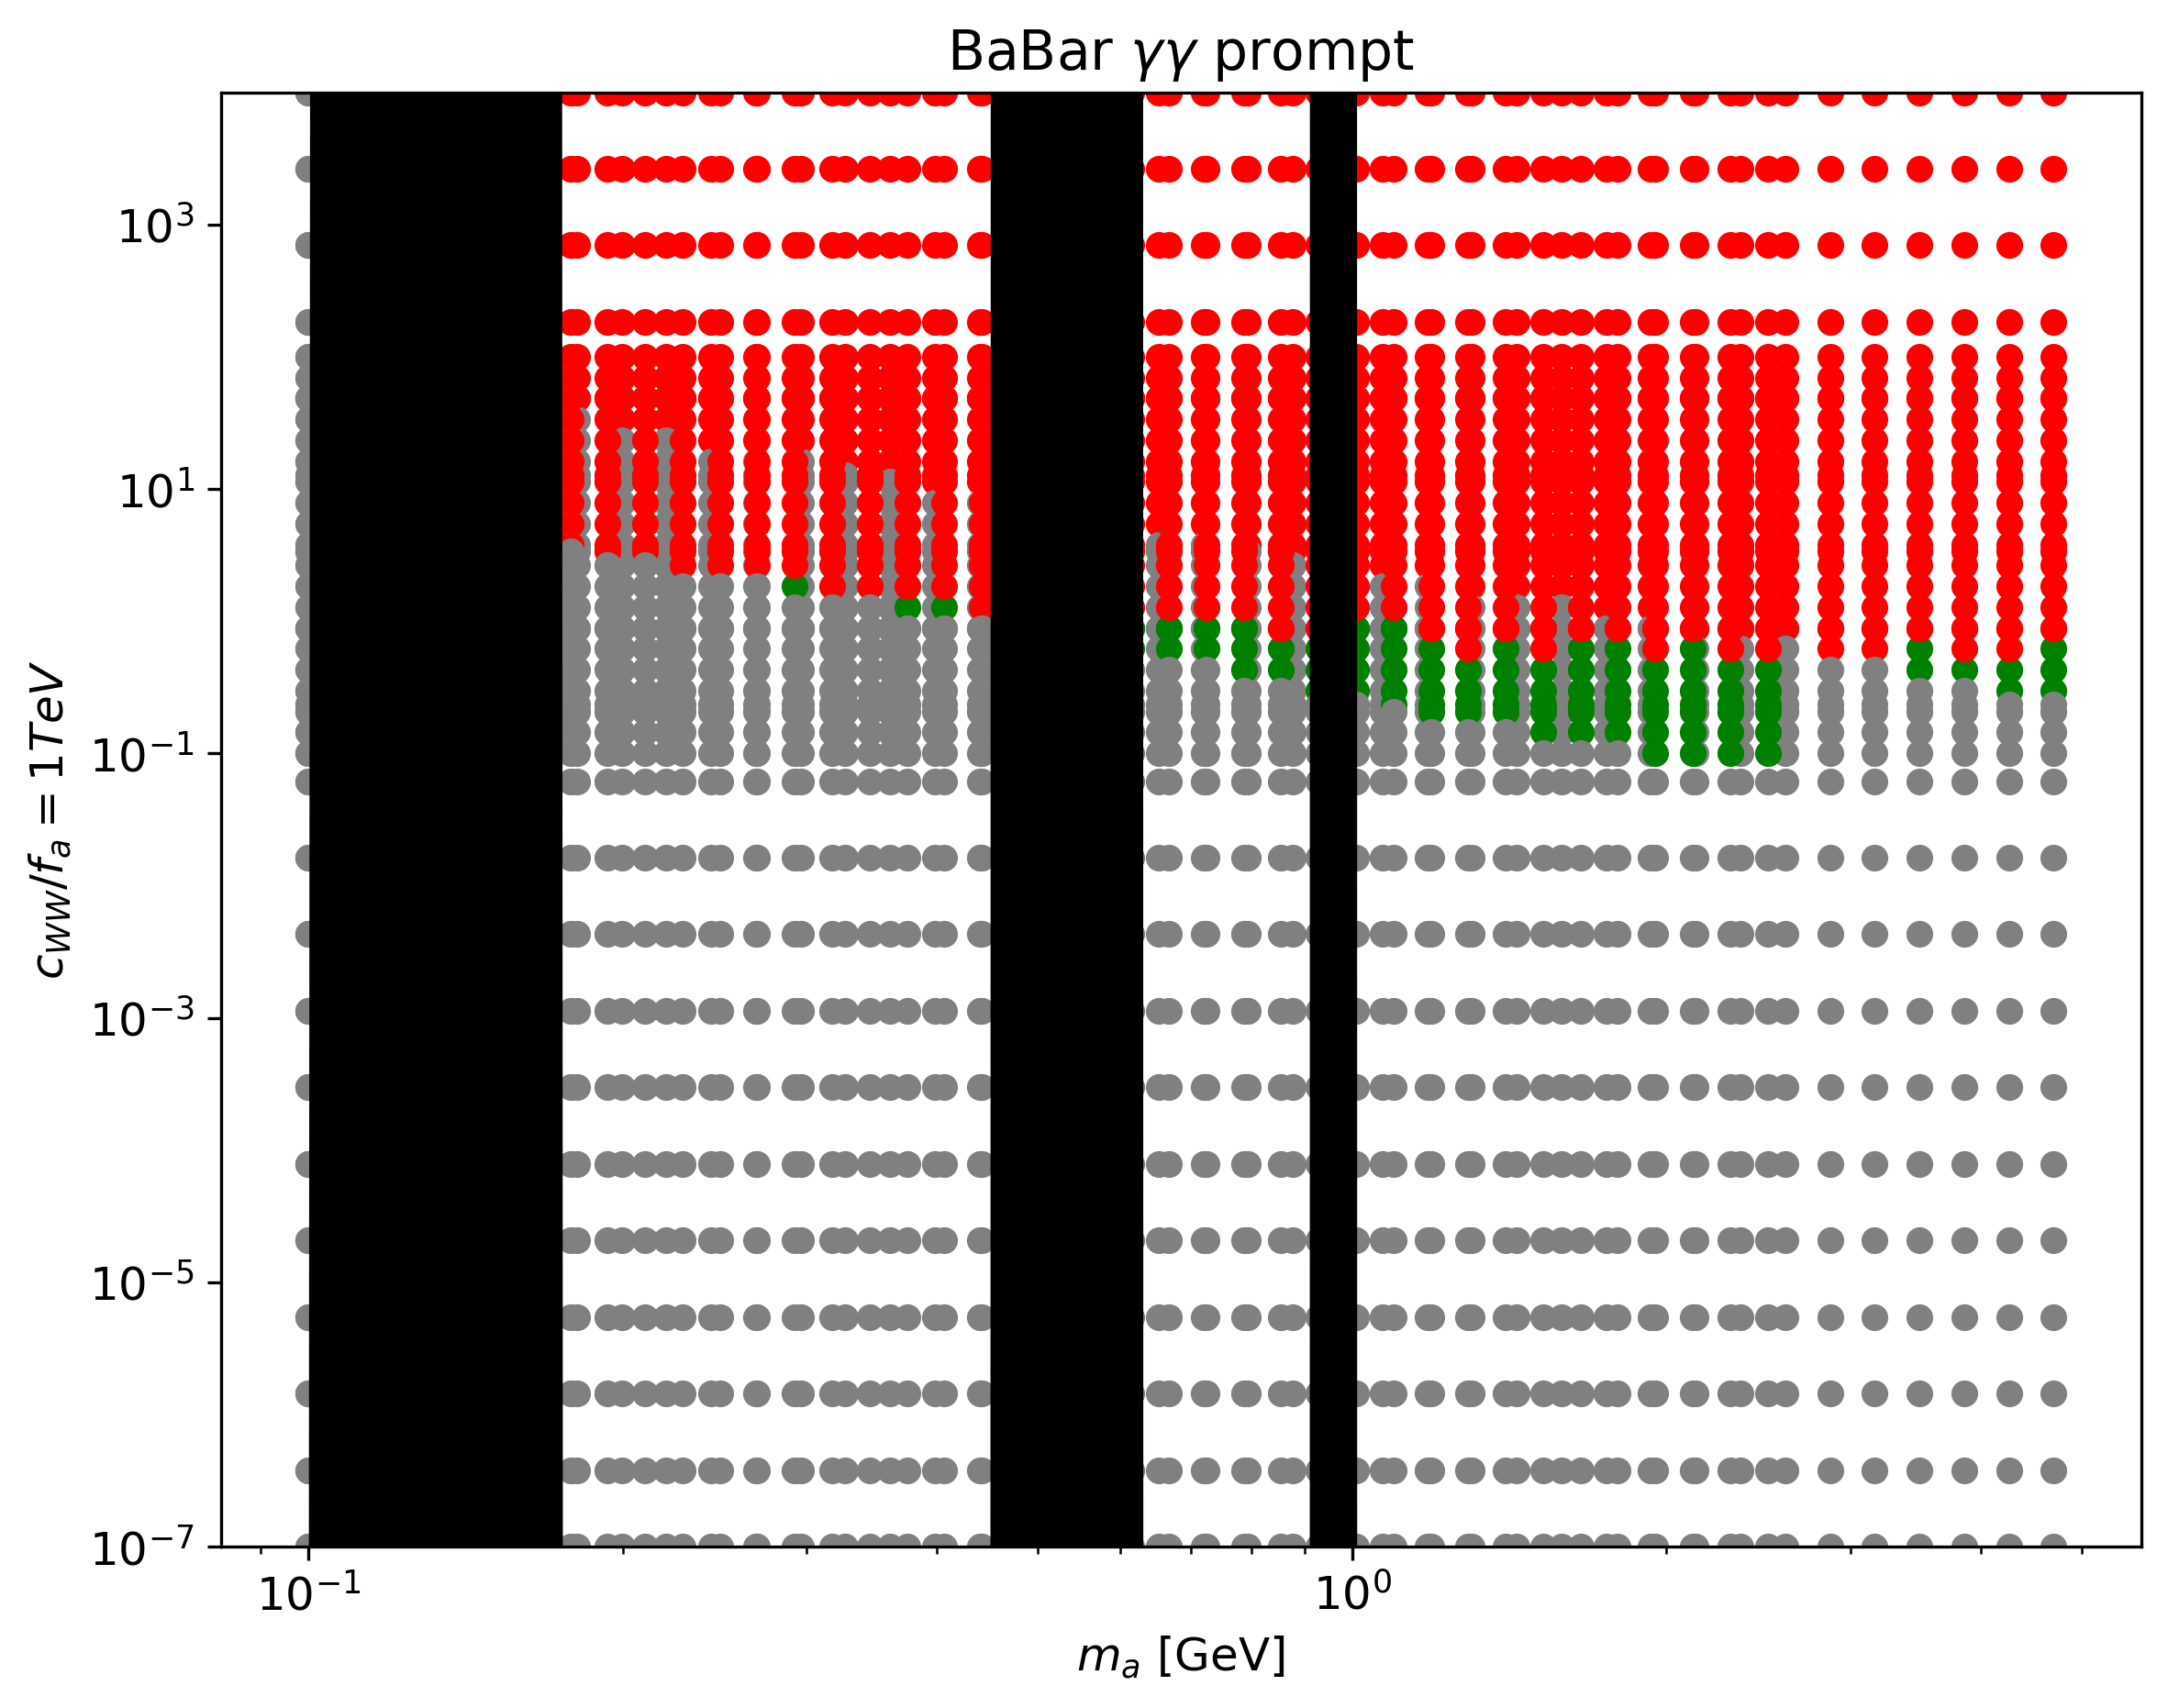

In [195]:
plt.figure(figsize=(9, 7))


plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cWW_combined-prompt.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=1*mmTOps,BRMin=0,BRMax=np.inf)
plotAllowedWCuts("output/m-tau-c-BRBtoKgammagamma-cWW_combined.dat",0,2,1,mMin=0.175,mMax=4.78,\
                 tauMin=0,tauMax=100*mmTOps,BRMin=0,BRMax=np.inf)

plotCutOutRegions(cutoutRegionsBaBargammagamma,0.1,3,10**-7,10**5,2,color="black")

plt.title('BaBar $\gamma \gamma$ prompt')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

plt.savefig('plots/BaBar-gammagamma_cWW_bound_new_form-prompt.png', dpi=300, bbox_inches='tight')

## KOTO

In [ ]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-BRKLtoPi0a-cff_combined.dat",0,2)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('KOTO')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

# plt.savefig('plots/KOTO_cff_bound_new_form.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-BRKLtoPi0a-cWW_combined.dat",0,2)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('KOTO')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**4)

plt.savefig('plots/KOTO_cWW_bound_new_form.png', dpi=300, bbox_inches='tight')

## NuCal + CHARM

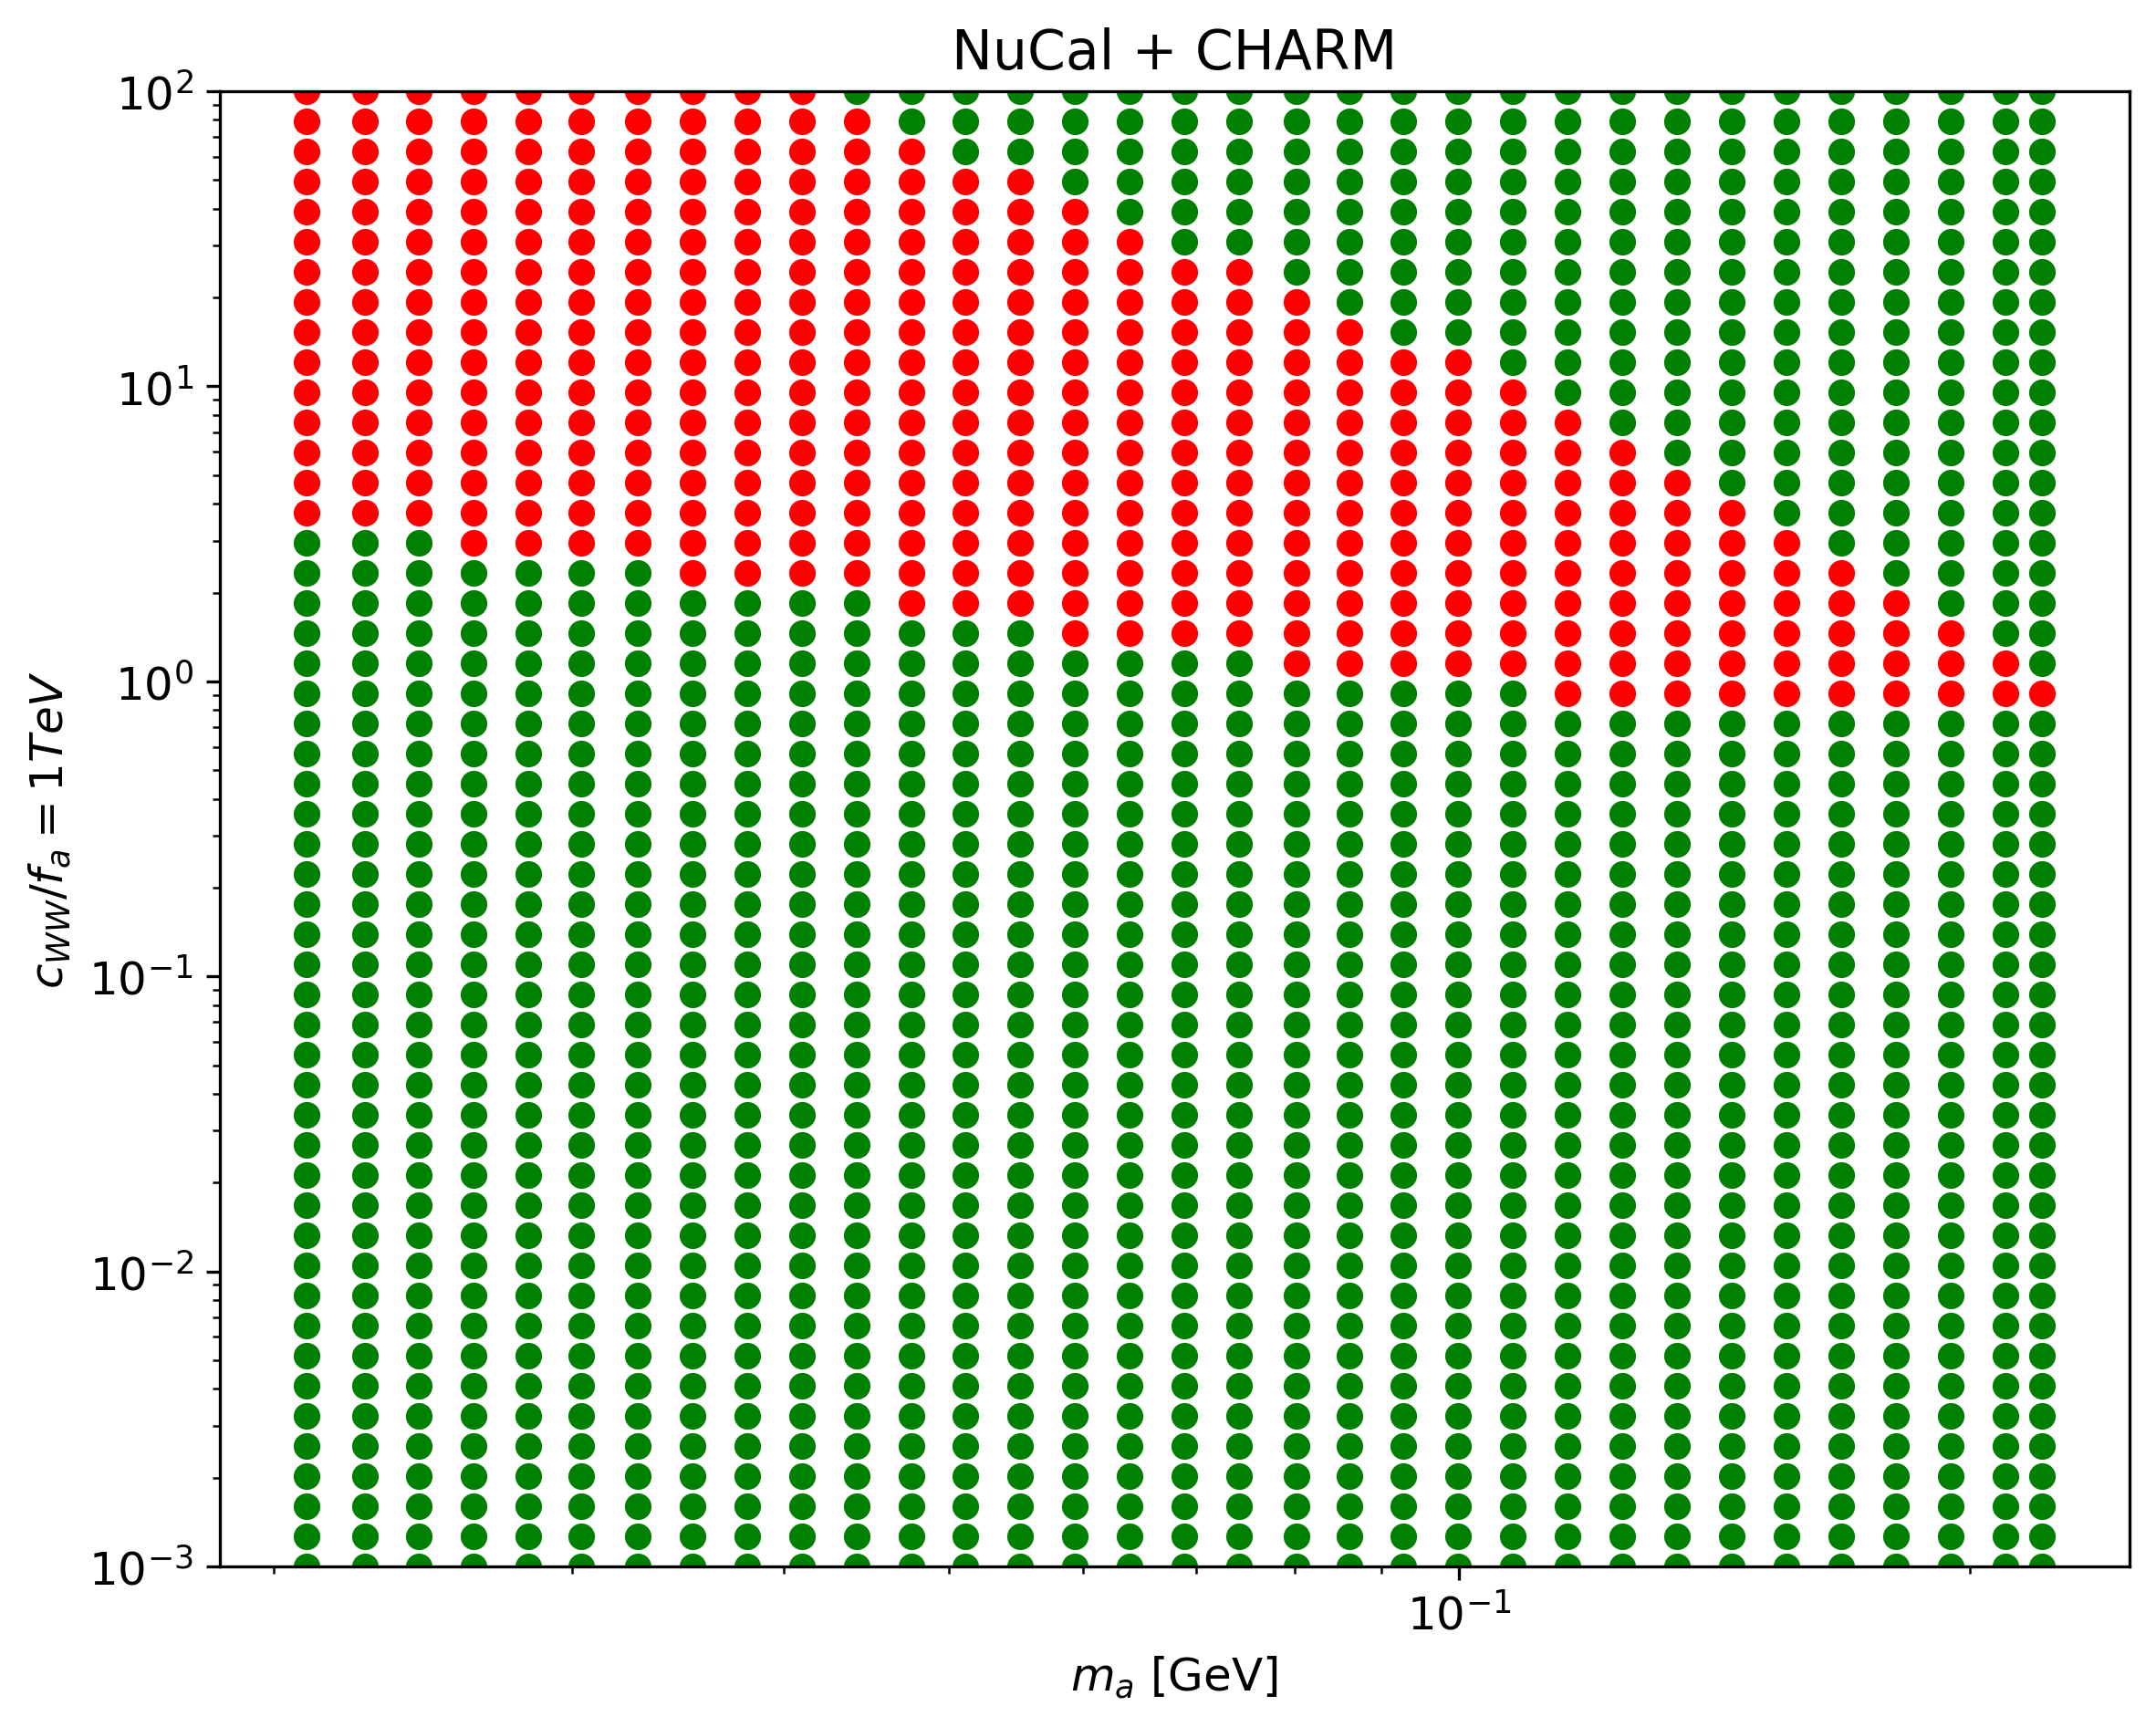

In [63]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-NuCal-CHARM-cWW_combined-new.dat",0,2)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('NuCal + CHARM')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-3, 10**2)

plt.savefig('plots/NuCal-CHARM_cWW_bound-new.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-NuCal-CHARM-cff_combined.dat",0,2)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('NuCal + CHARM')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-3, 10**2)

plt.savefig('plots/NuCal-CHARM_cff_bound.png', dpi=300, bbox_inches='tight')

## NuCal + CHARM + E137

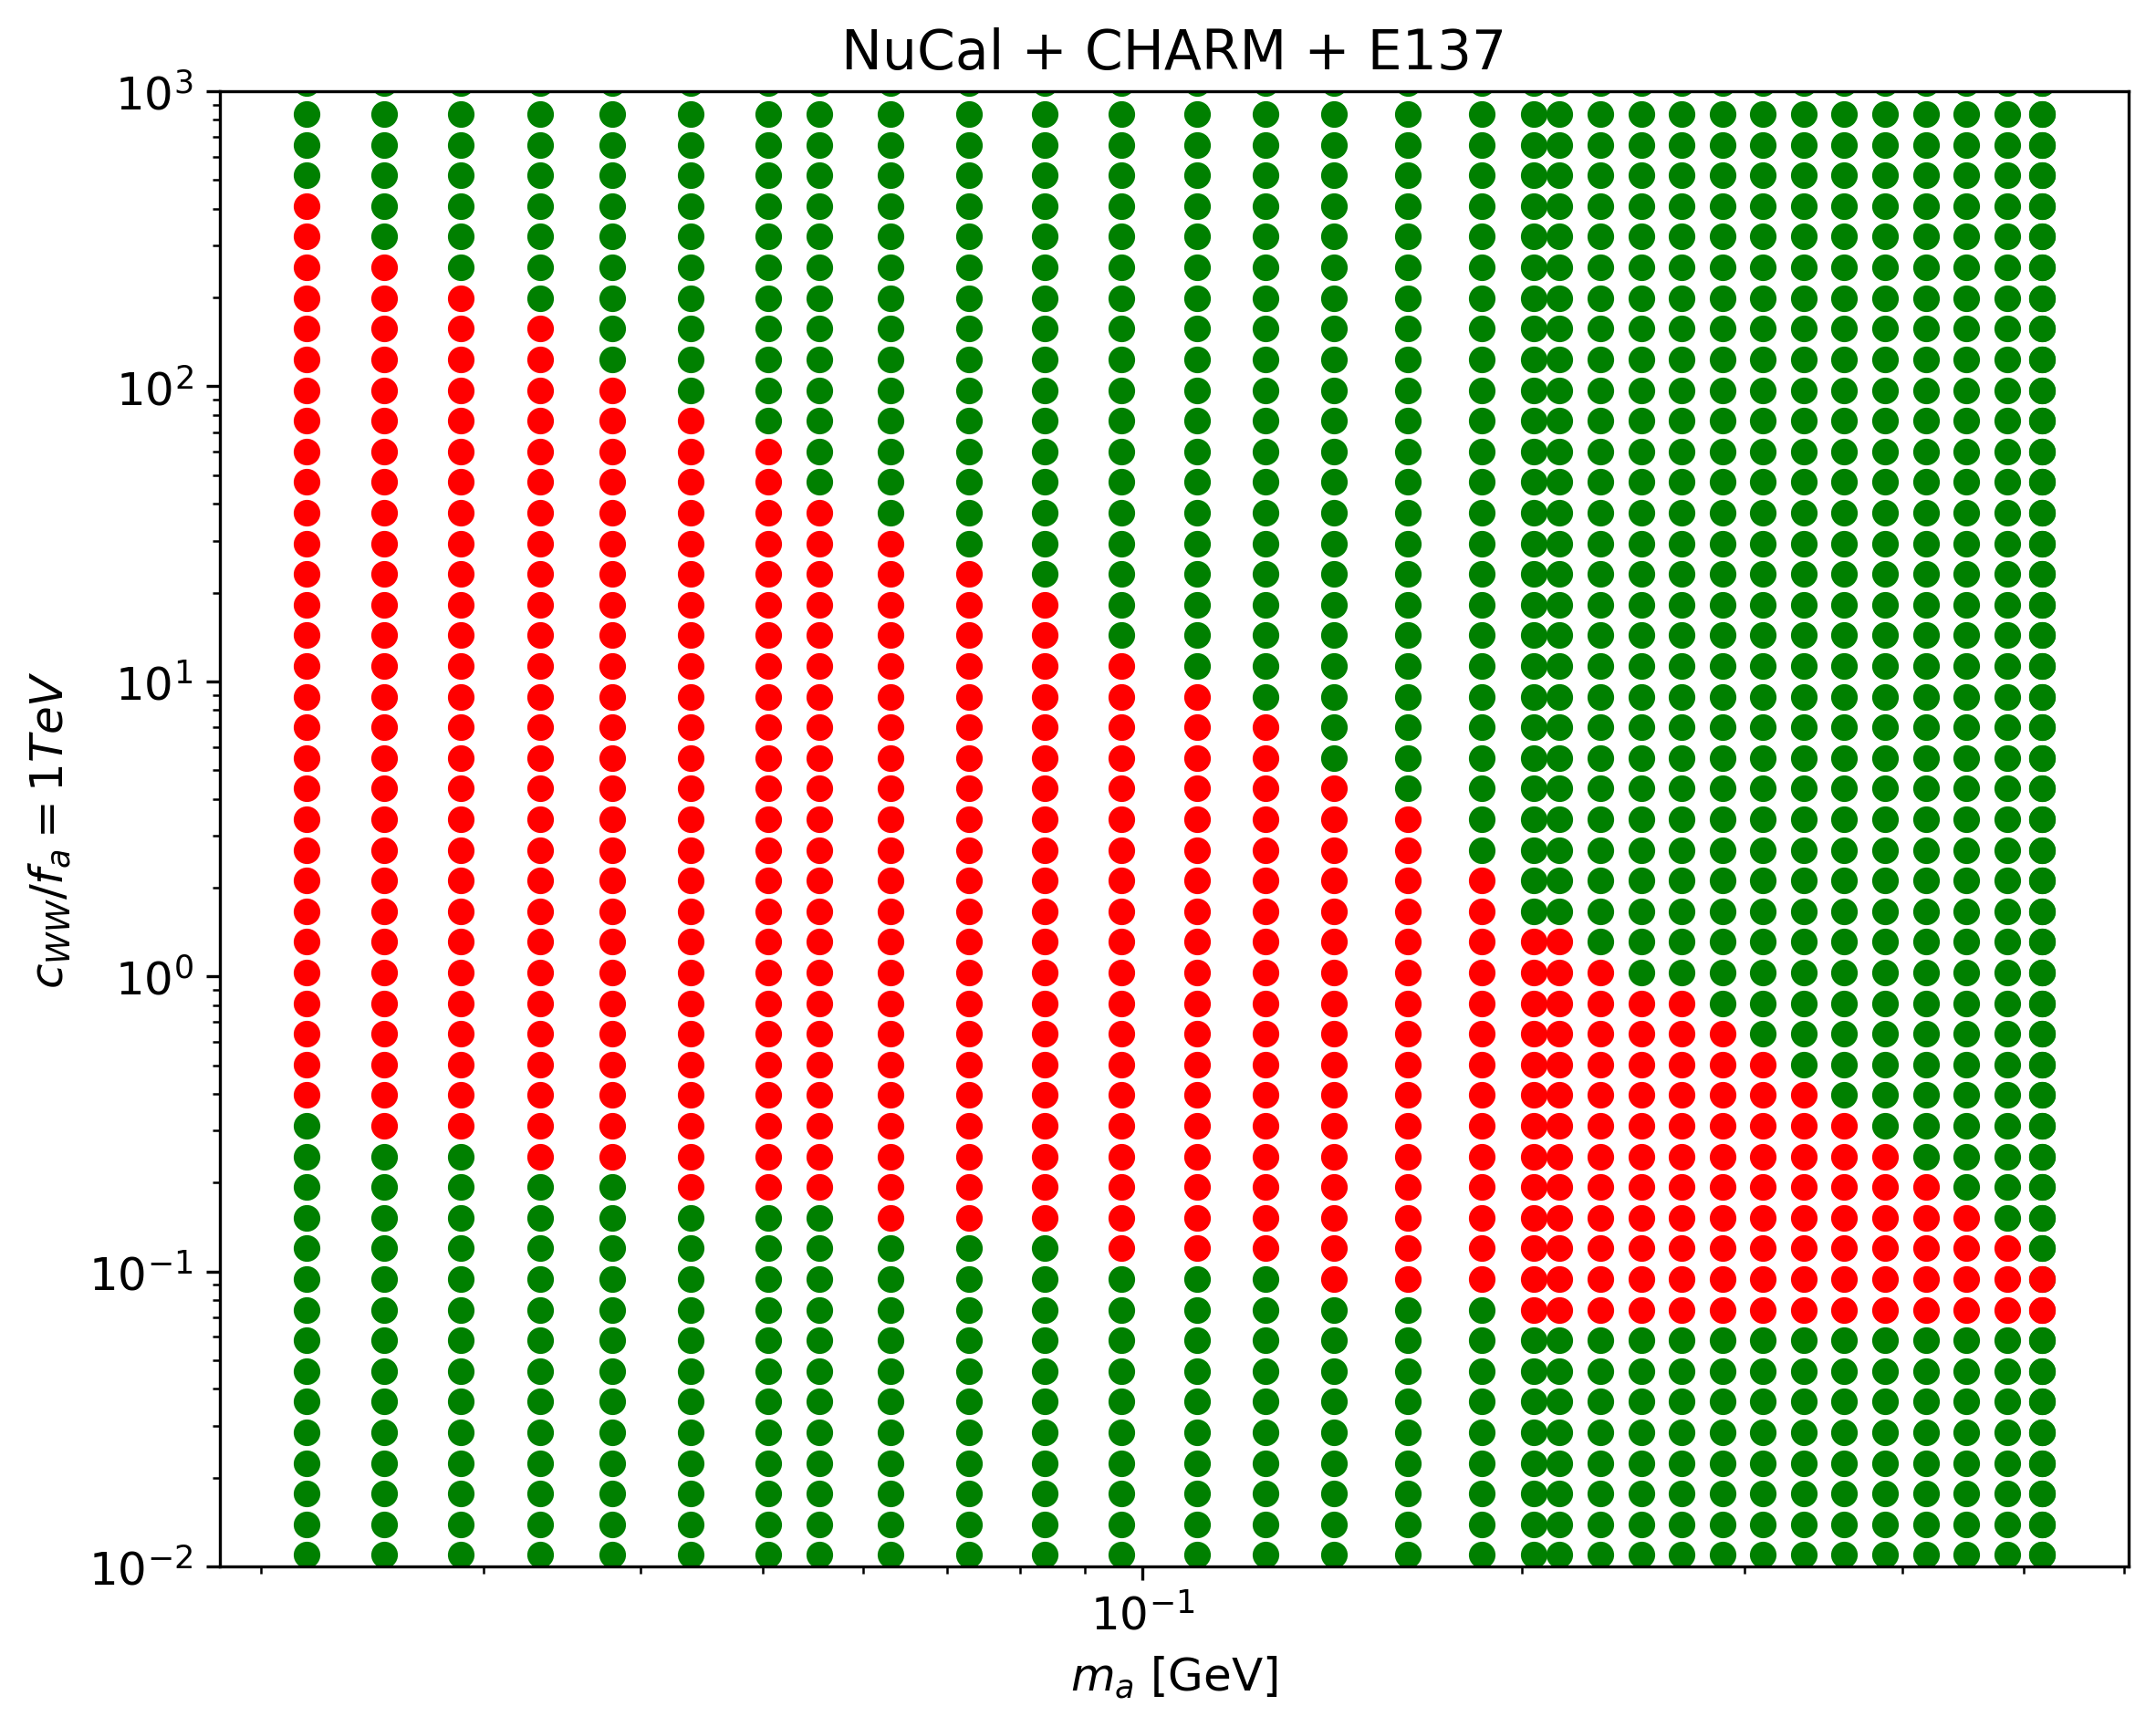

In [58]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-NuCal-CHARM-E137-cWW_combined-new.dat",0,2)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('NuCal + CHARM + E137')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-2, 10**3)

plt.savefig('plots/NuCal-CHARM-E137_cWW_bound-new.png', dpi=300, bbox_inches='tight')

In [ ]:
# plt.figure(figsize=(9, 7))


# plotAllAllowed("output/m-tau-c-NuCal-CHARM-E137-cff_combined.dat",0,2)
# #plotWhiteRegions(10**(3))

# # plotWhiteRegions(10**5)

# plt.title('NuCal + CHARM + E137')
# plt.xlabel('$m_a$ [GeV]')
# #plt.xlim(0.2,0.2)
# plt.ylabel('$c_{ff}/f_a=1 TeV$')
# plt.xscale("log")
# plt.yscale("log")

# # plt.xlim(9*10**-3, 4)
# plt.ylim(10**-4, 10**2)

# plt.savefig('plots/NuCal-CHARM-E137_cff_bound.png', dpi=300, bbox_inches='tight')

## PrimEx

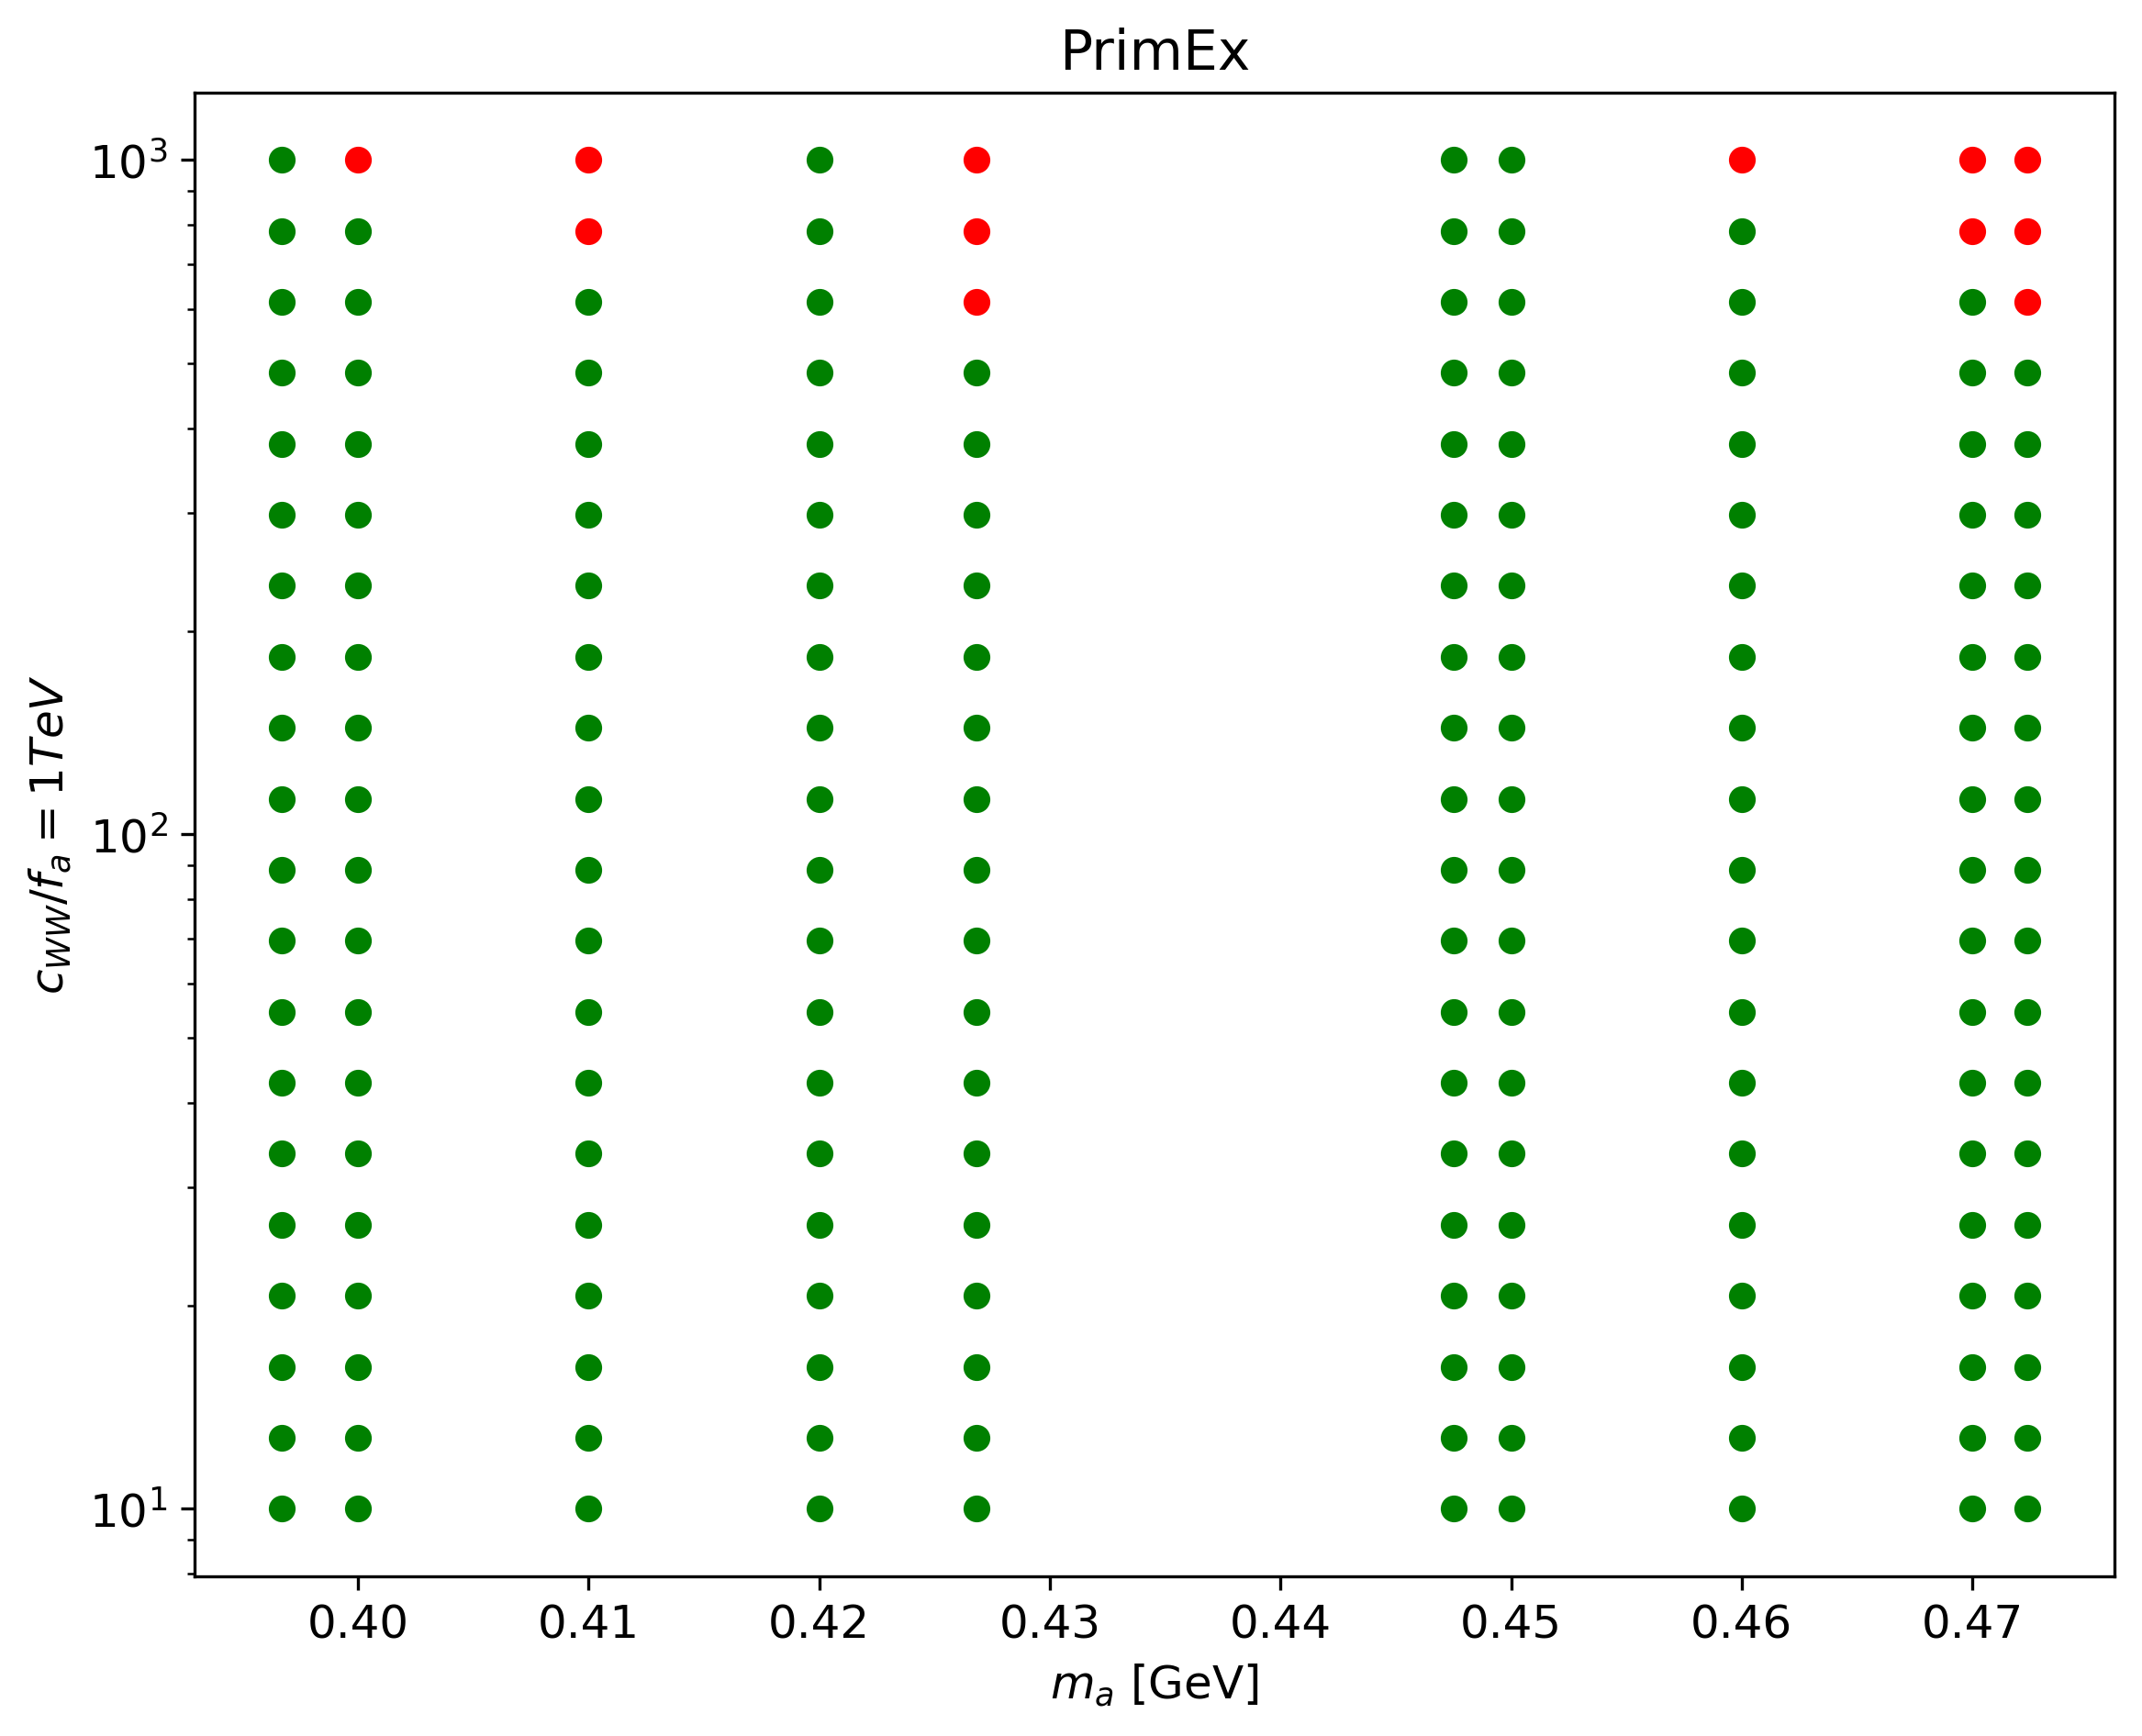

In [90]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-PrimEx-cWW_combined-1.dat",0,2)
plotAllAllowed("output/m-tau-c-PrimEx-cWW_combined-2.dat",0,2)


plt.title('PrimEx')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
# plt.ylim(10**-3, 10**2)

# plt.savefig('plots/PrimEx_cWW_bound.png', dpi=300, bbox_inches='tight')

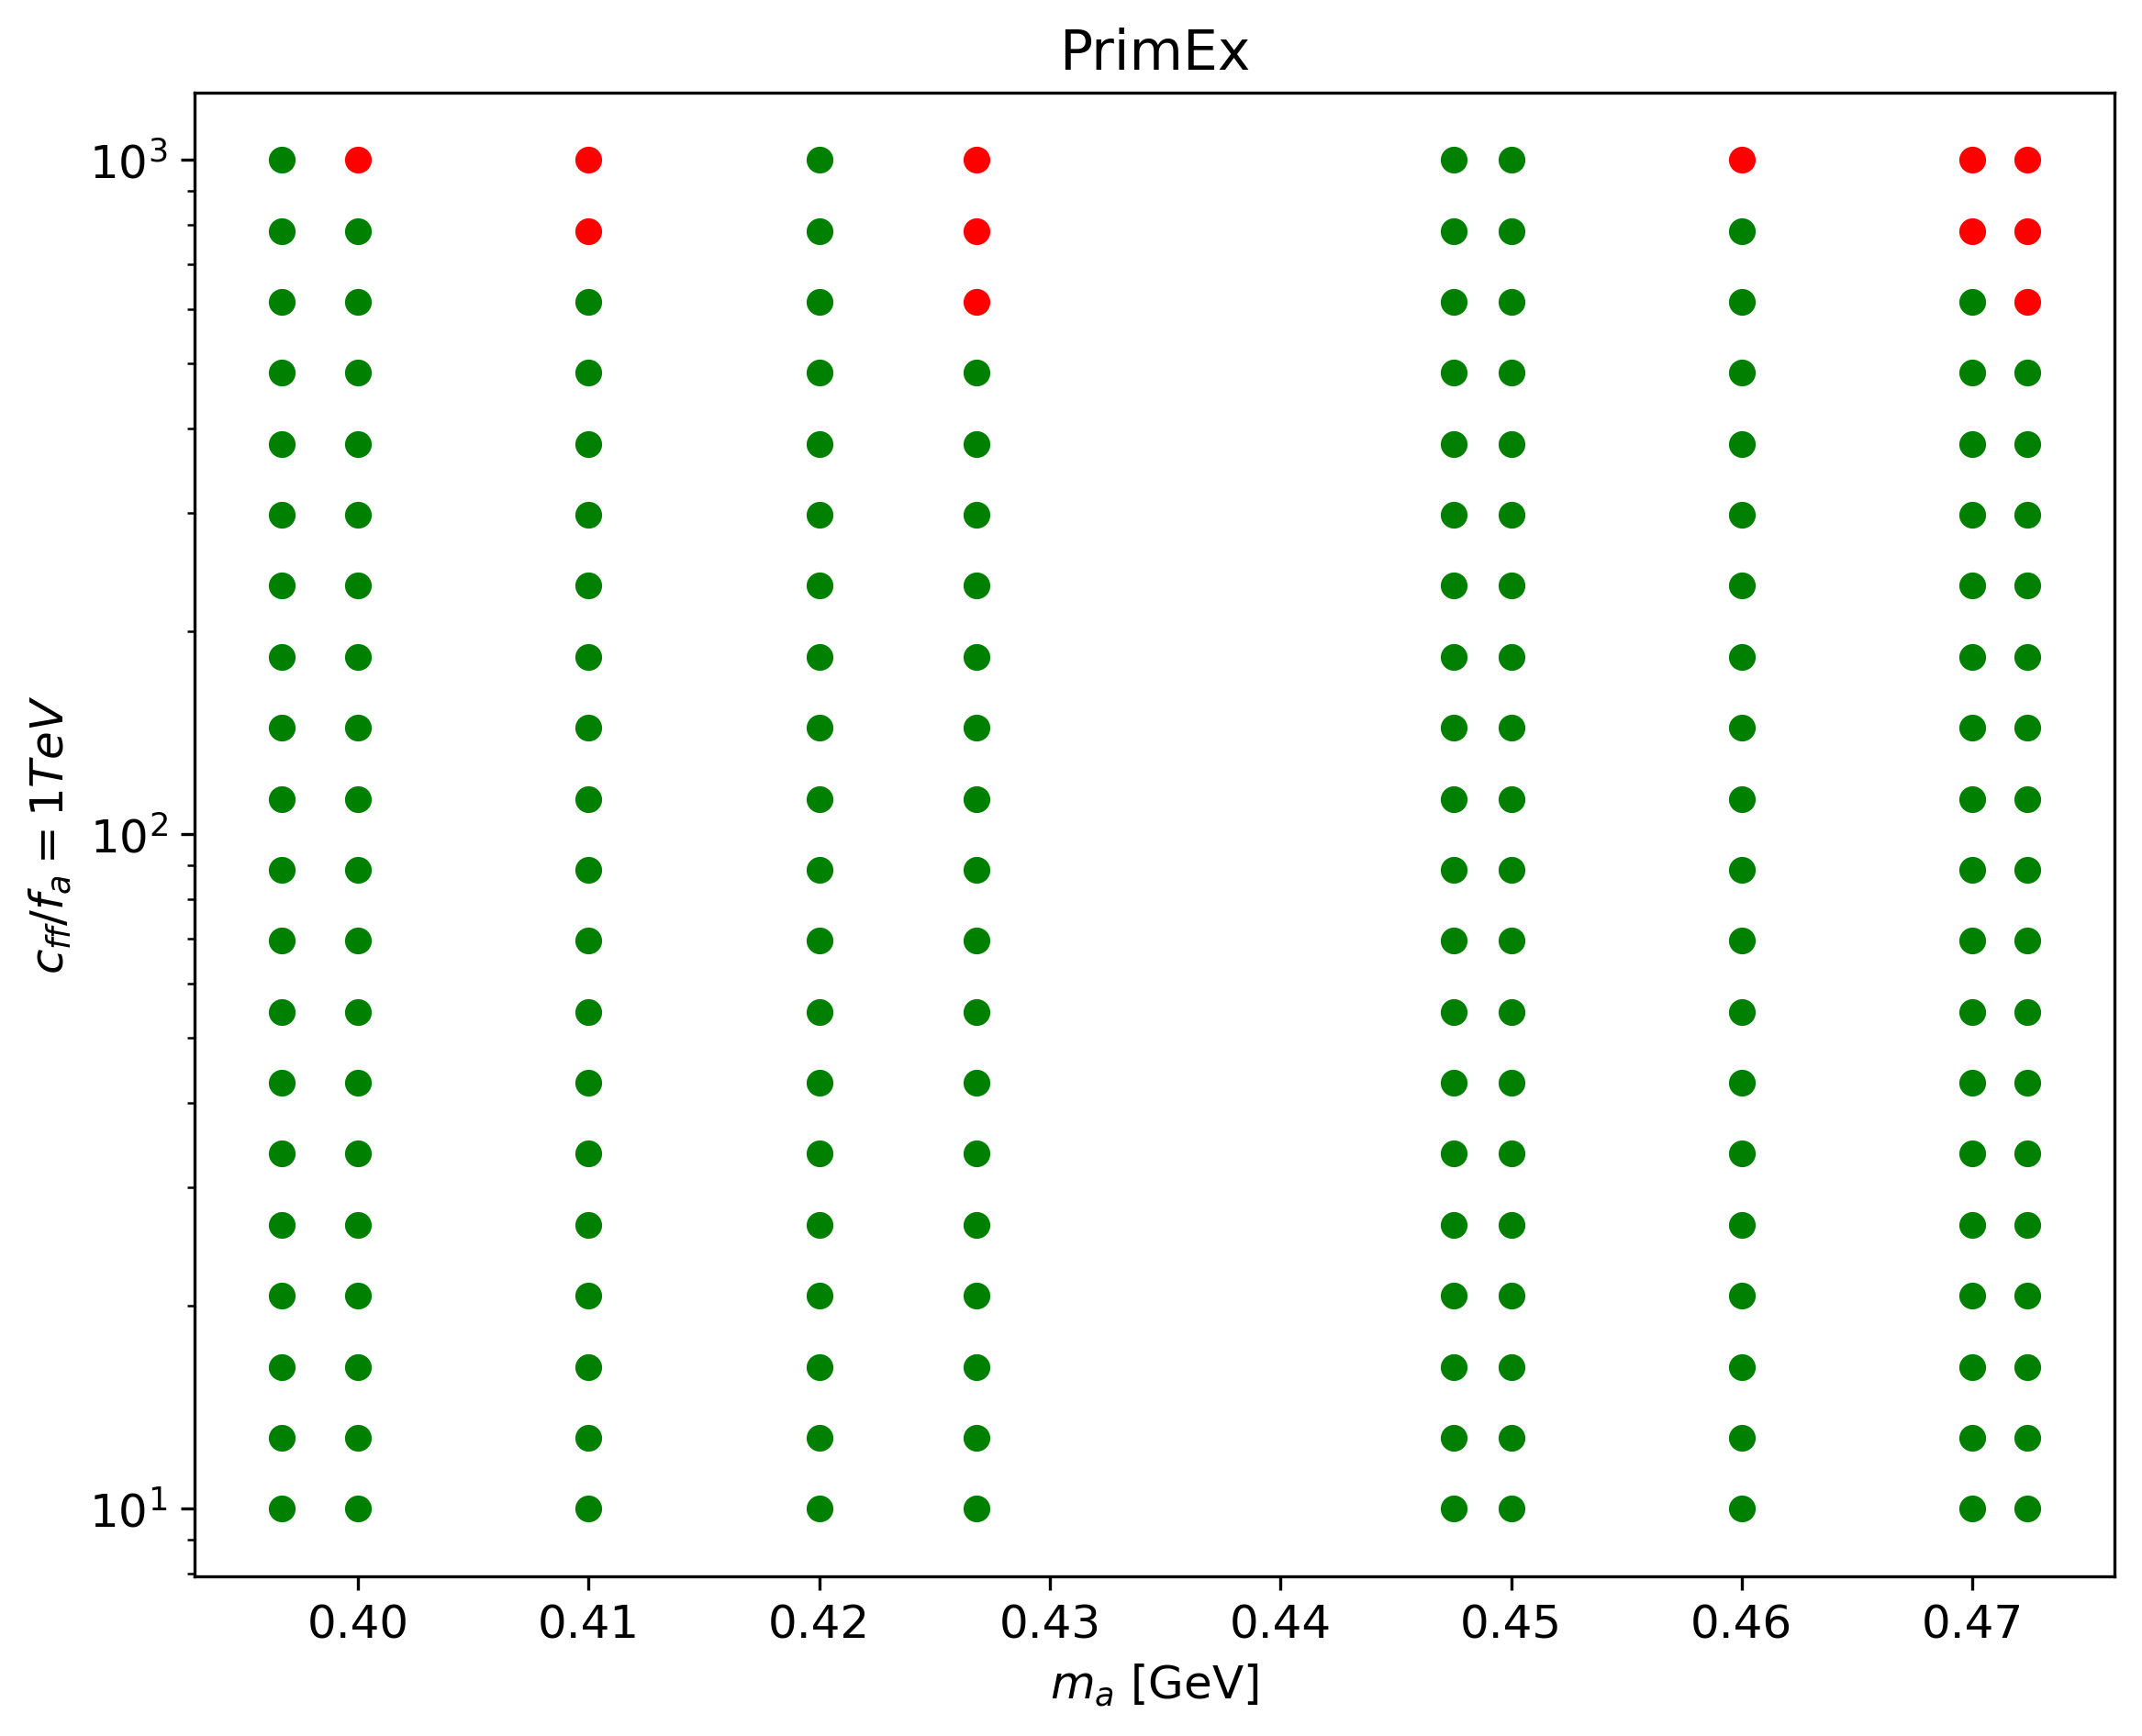

In [91]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-PrimEx-cff_combined-1.dat",0,2)
plotAllAllowed("output/m-tau-c-PrimEx-cff_combined-2.dat",0,2)


plt.title('PrimEx')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
# plt.ylim(10**-3, 10**2)

# plt.savefig('plots/PrimEx_cff_bound.png', dpi=300, bbox_inches='tight')

## CHARM bound from fig.3 of 1810.11336

[inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax]= ['output/m-tau-c-BRBtoKmumu-CHARM-cWW_combined.dat', 0, 2, 1, 0.3, 2.4, 0, 1000000, 1e-13, 0.0001]


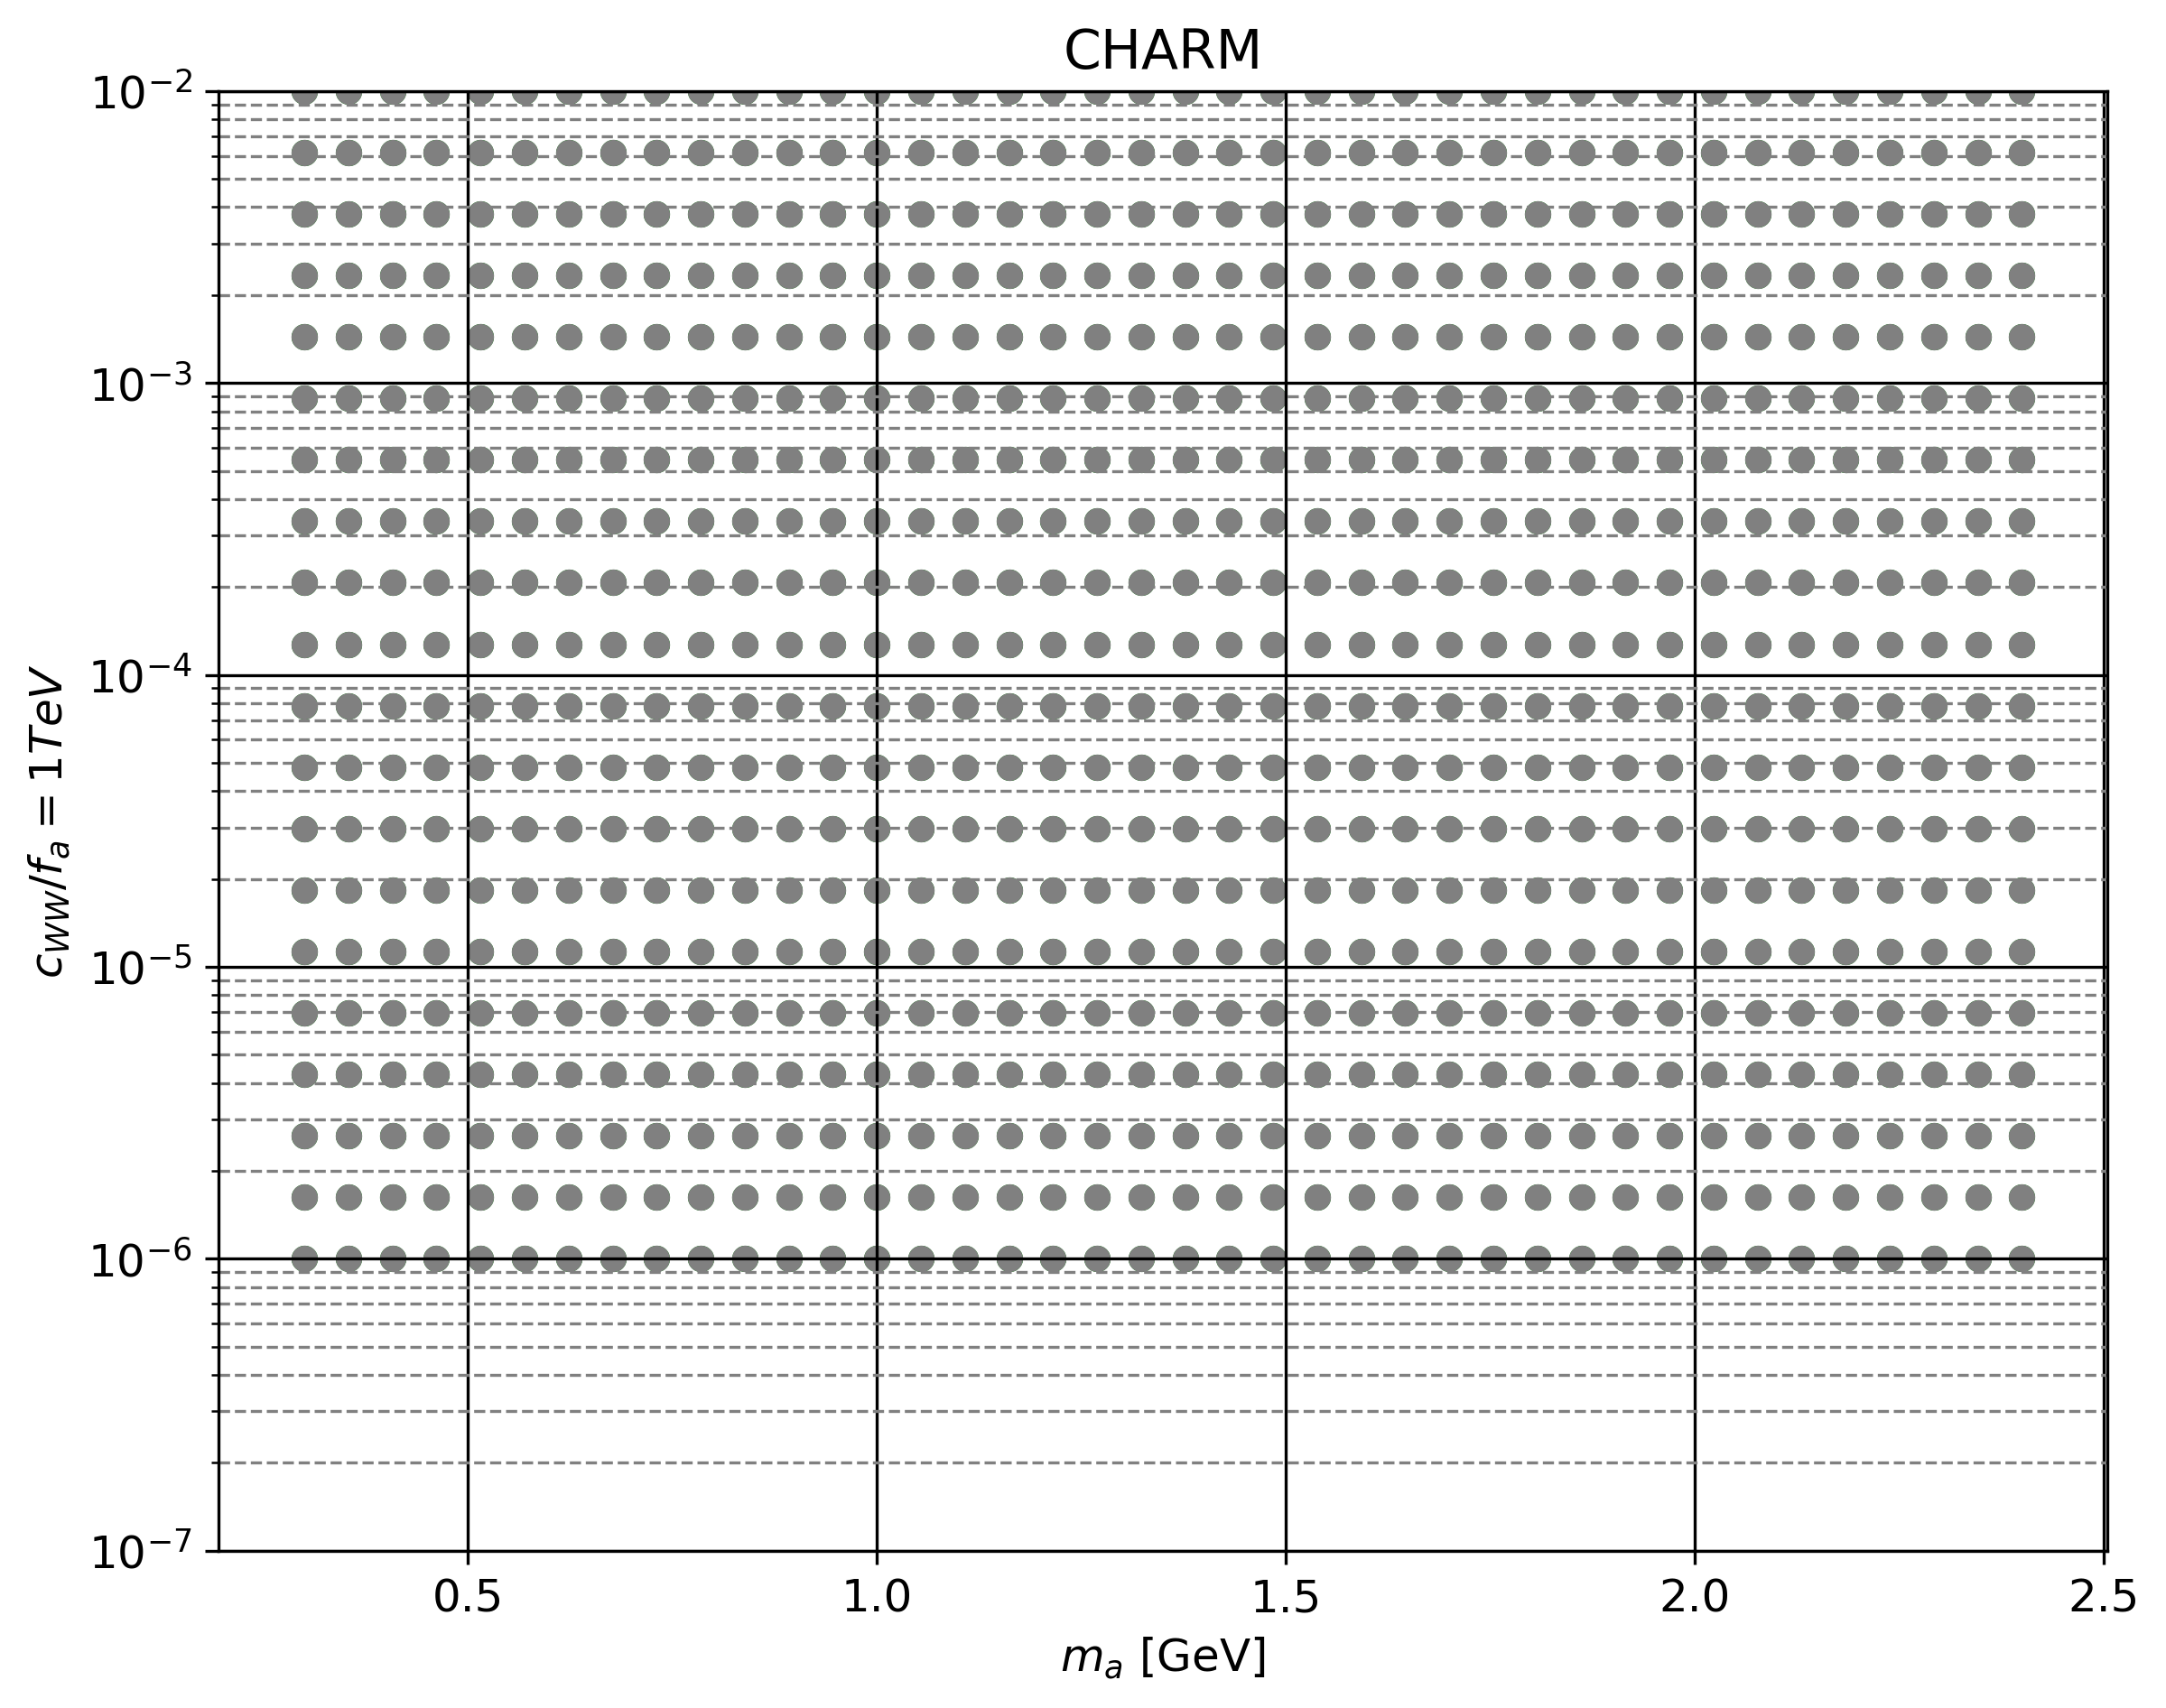

In [92]:
plt.figure(figsize=(9, 7))


plotAllowedWCuts("output/m-tau-c-BRBtoKmumu-CHARM-cWW_combined.dat",0,2,1,mMin=0.3,mMax=2.4,\
#                  tauMin=0,tauMax=np.inf,BRMin=0,BRMax=np.inf)
                 tauMin=0,tauMax=10**6,BRMin=10**-13,BRMax=10**-4)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('CHARM')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-7, 10**-2)

plt.savefig('plots/CHARM_cWW_bound.png', dpi=300, bbox_inches='tight')

[inputfile,m,y,tau,mMin,mMax,tauMin,tauMax,BRMin,BRMax]= ['output/m-tau-c-BRBtoKmumu-CHARM-cff_combined.dat', 0, 2, 1, 0.3, 2.4, 0, 1000000, 1e-13, 0.0001]


(1e-06, 0.01)

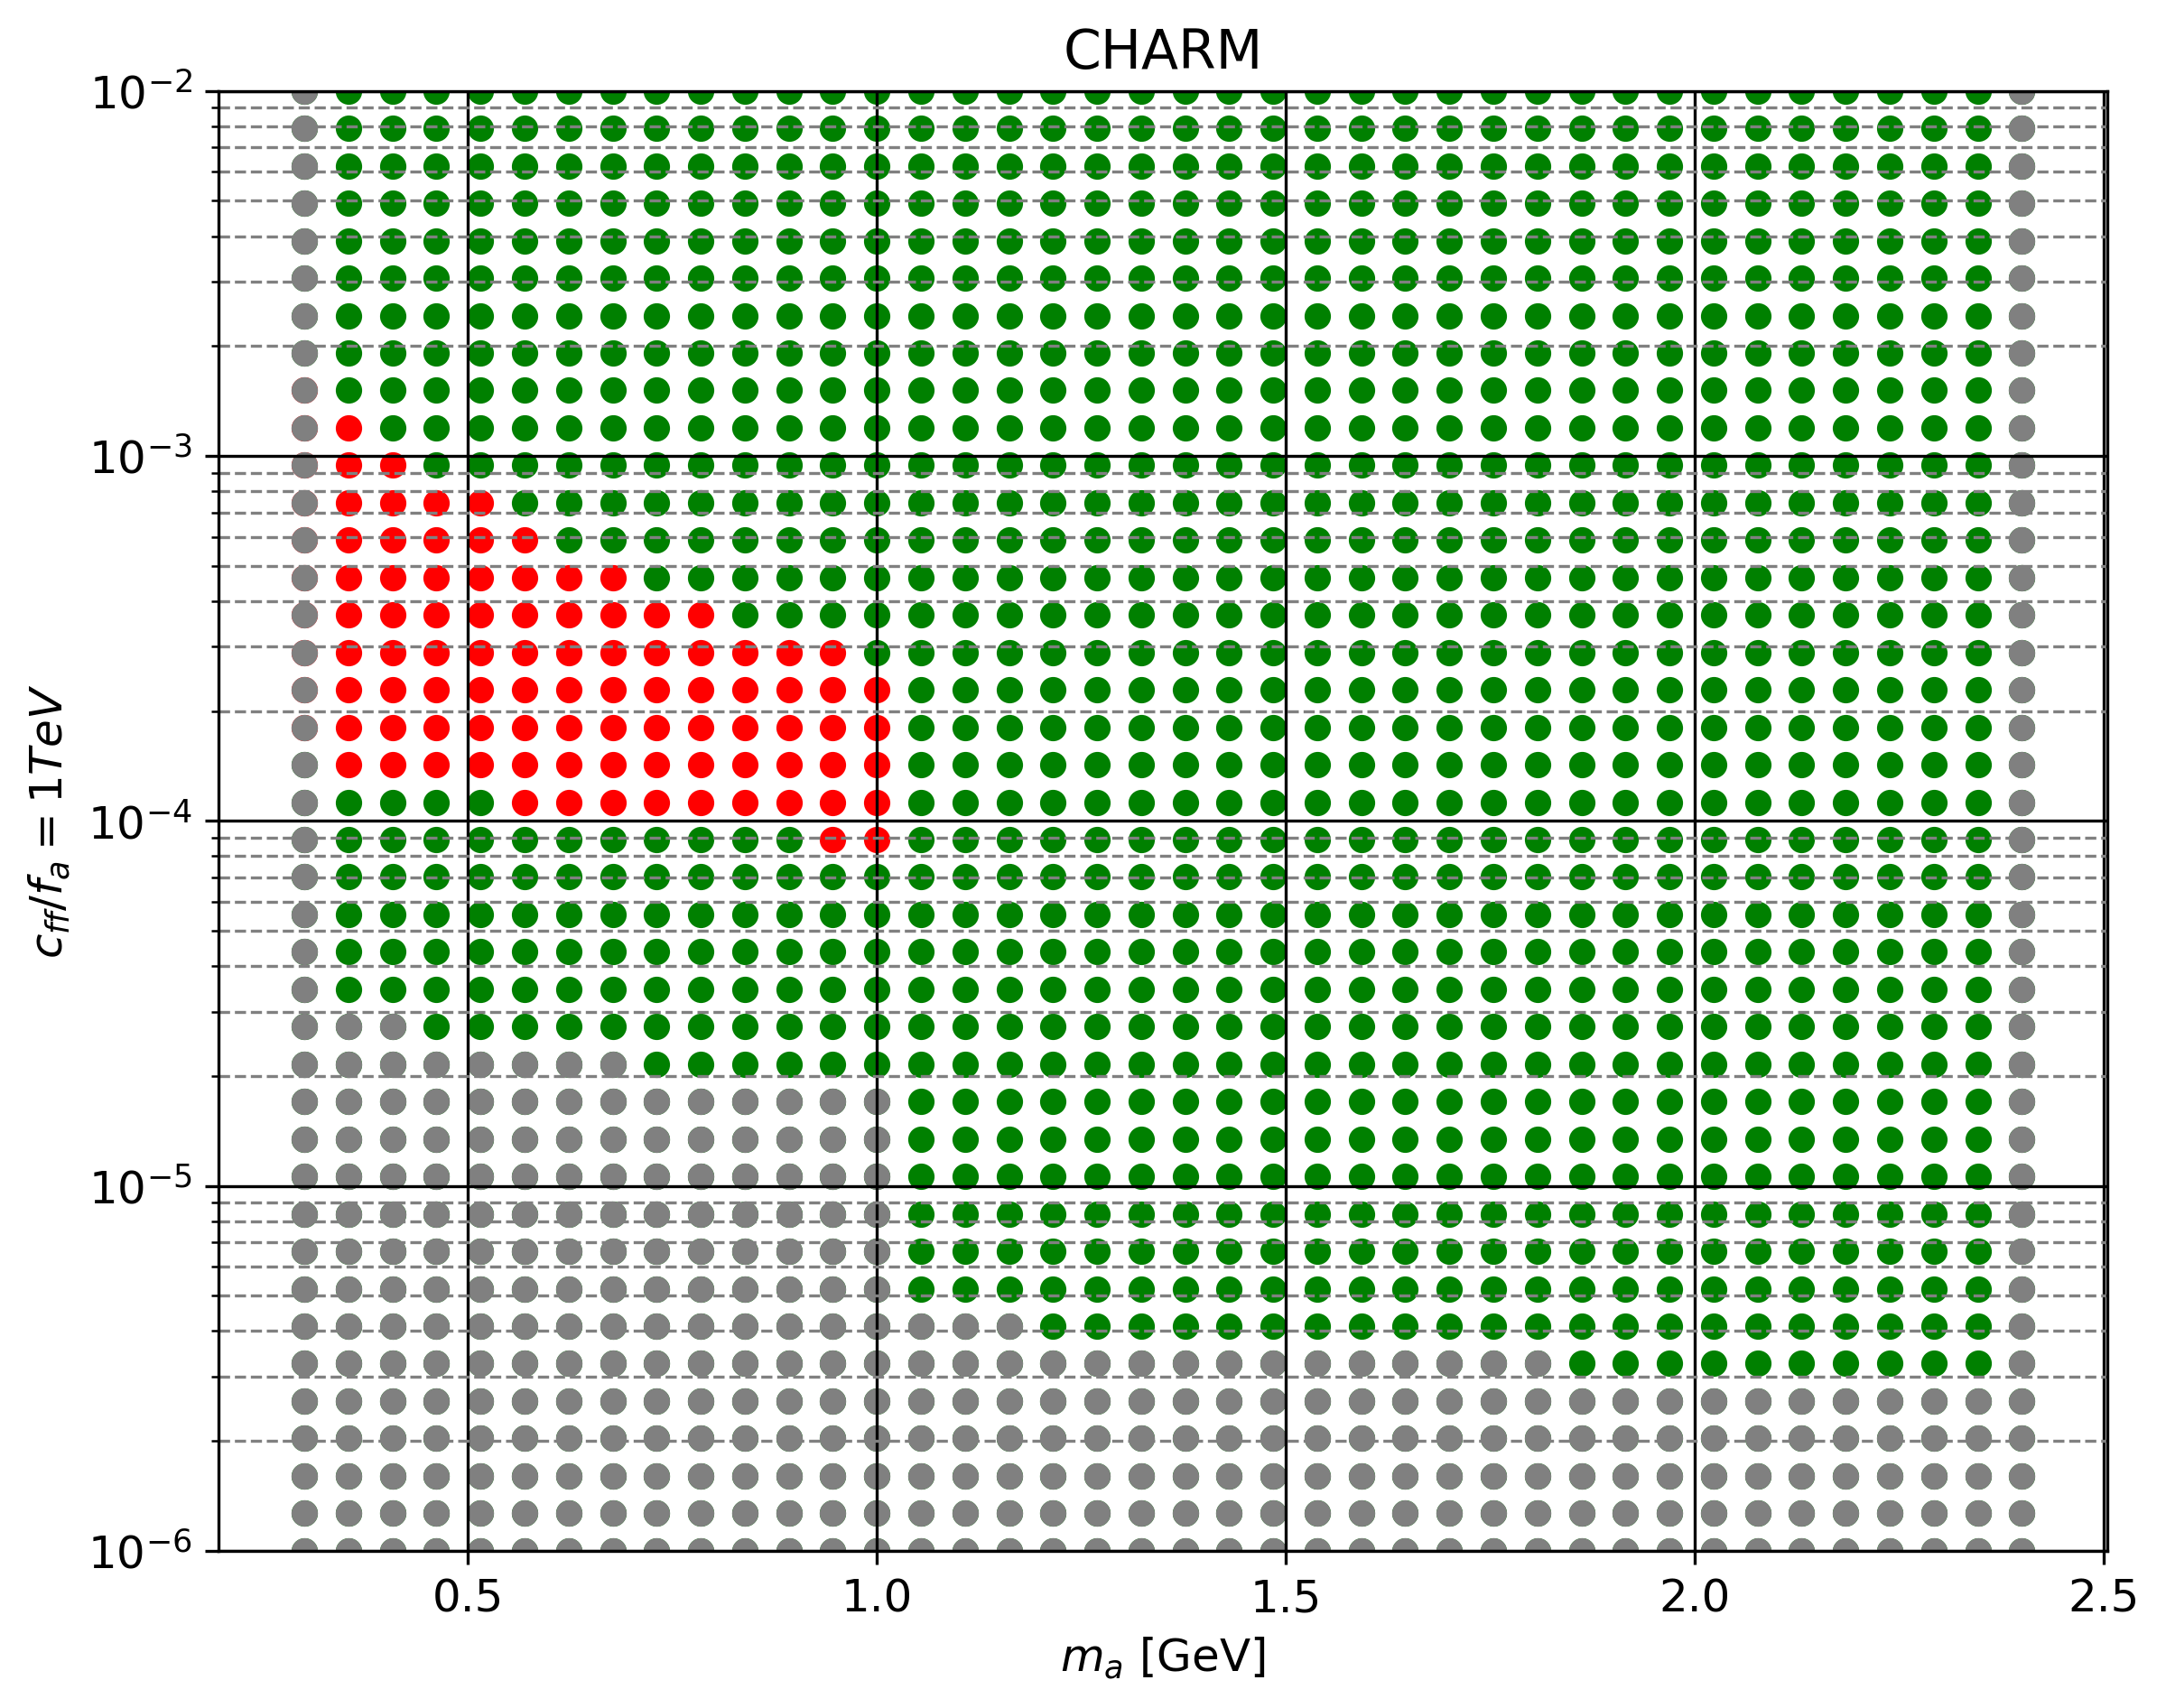

In [93]:
plt.figure(figsize=(9, 7))


plotAllowedWCuts("output/m-tau-c-BRBtoKmumu-CHARM-cff_combined.dat",0,2,1,mMin=0.3,mMax=2.4,\
#                  tauMin=0,tauMax=10**6,BRMin=10**-13,BRMax=np.inf)
                 tauMin=0,tauMax=10**6,BRMin=10**-13,BRMax=10**-4)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('CHARM')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{ff}/f_a=1 TeV$')
# plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-6, 10**-2)

# plt.savefig('plots/CHARM_cff_bound.png', dpi=300, bbox_inches='tight')

## Na64

(0.1, 10000)

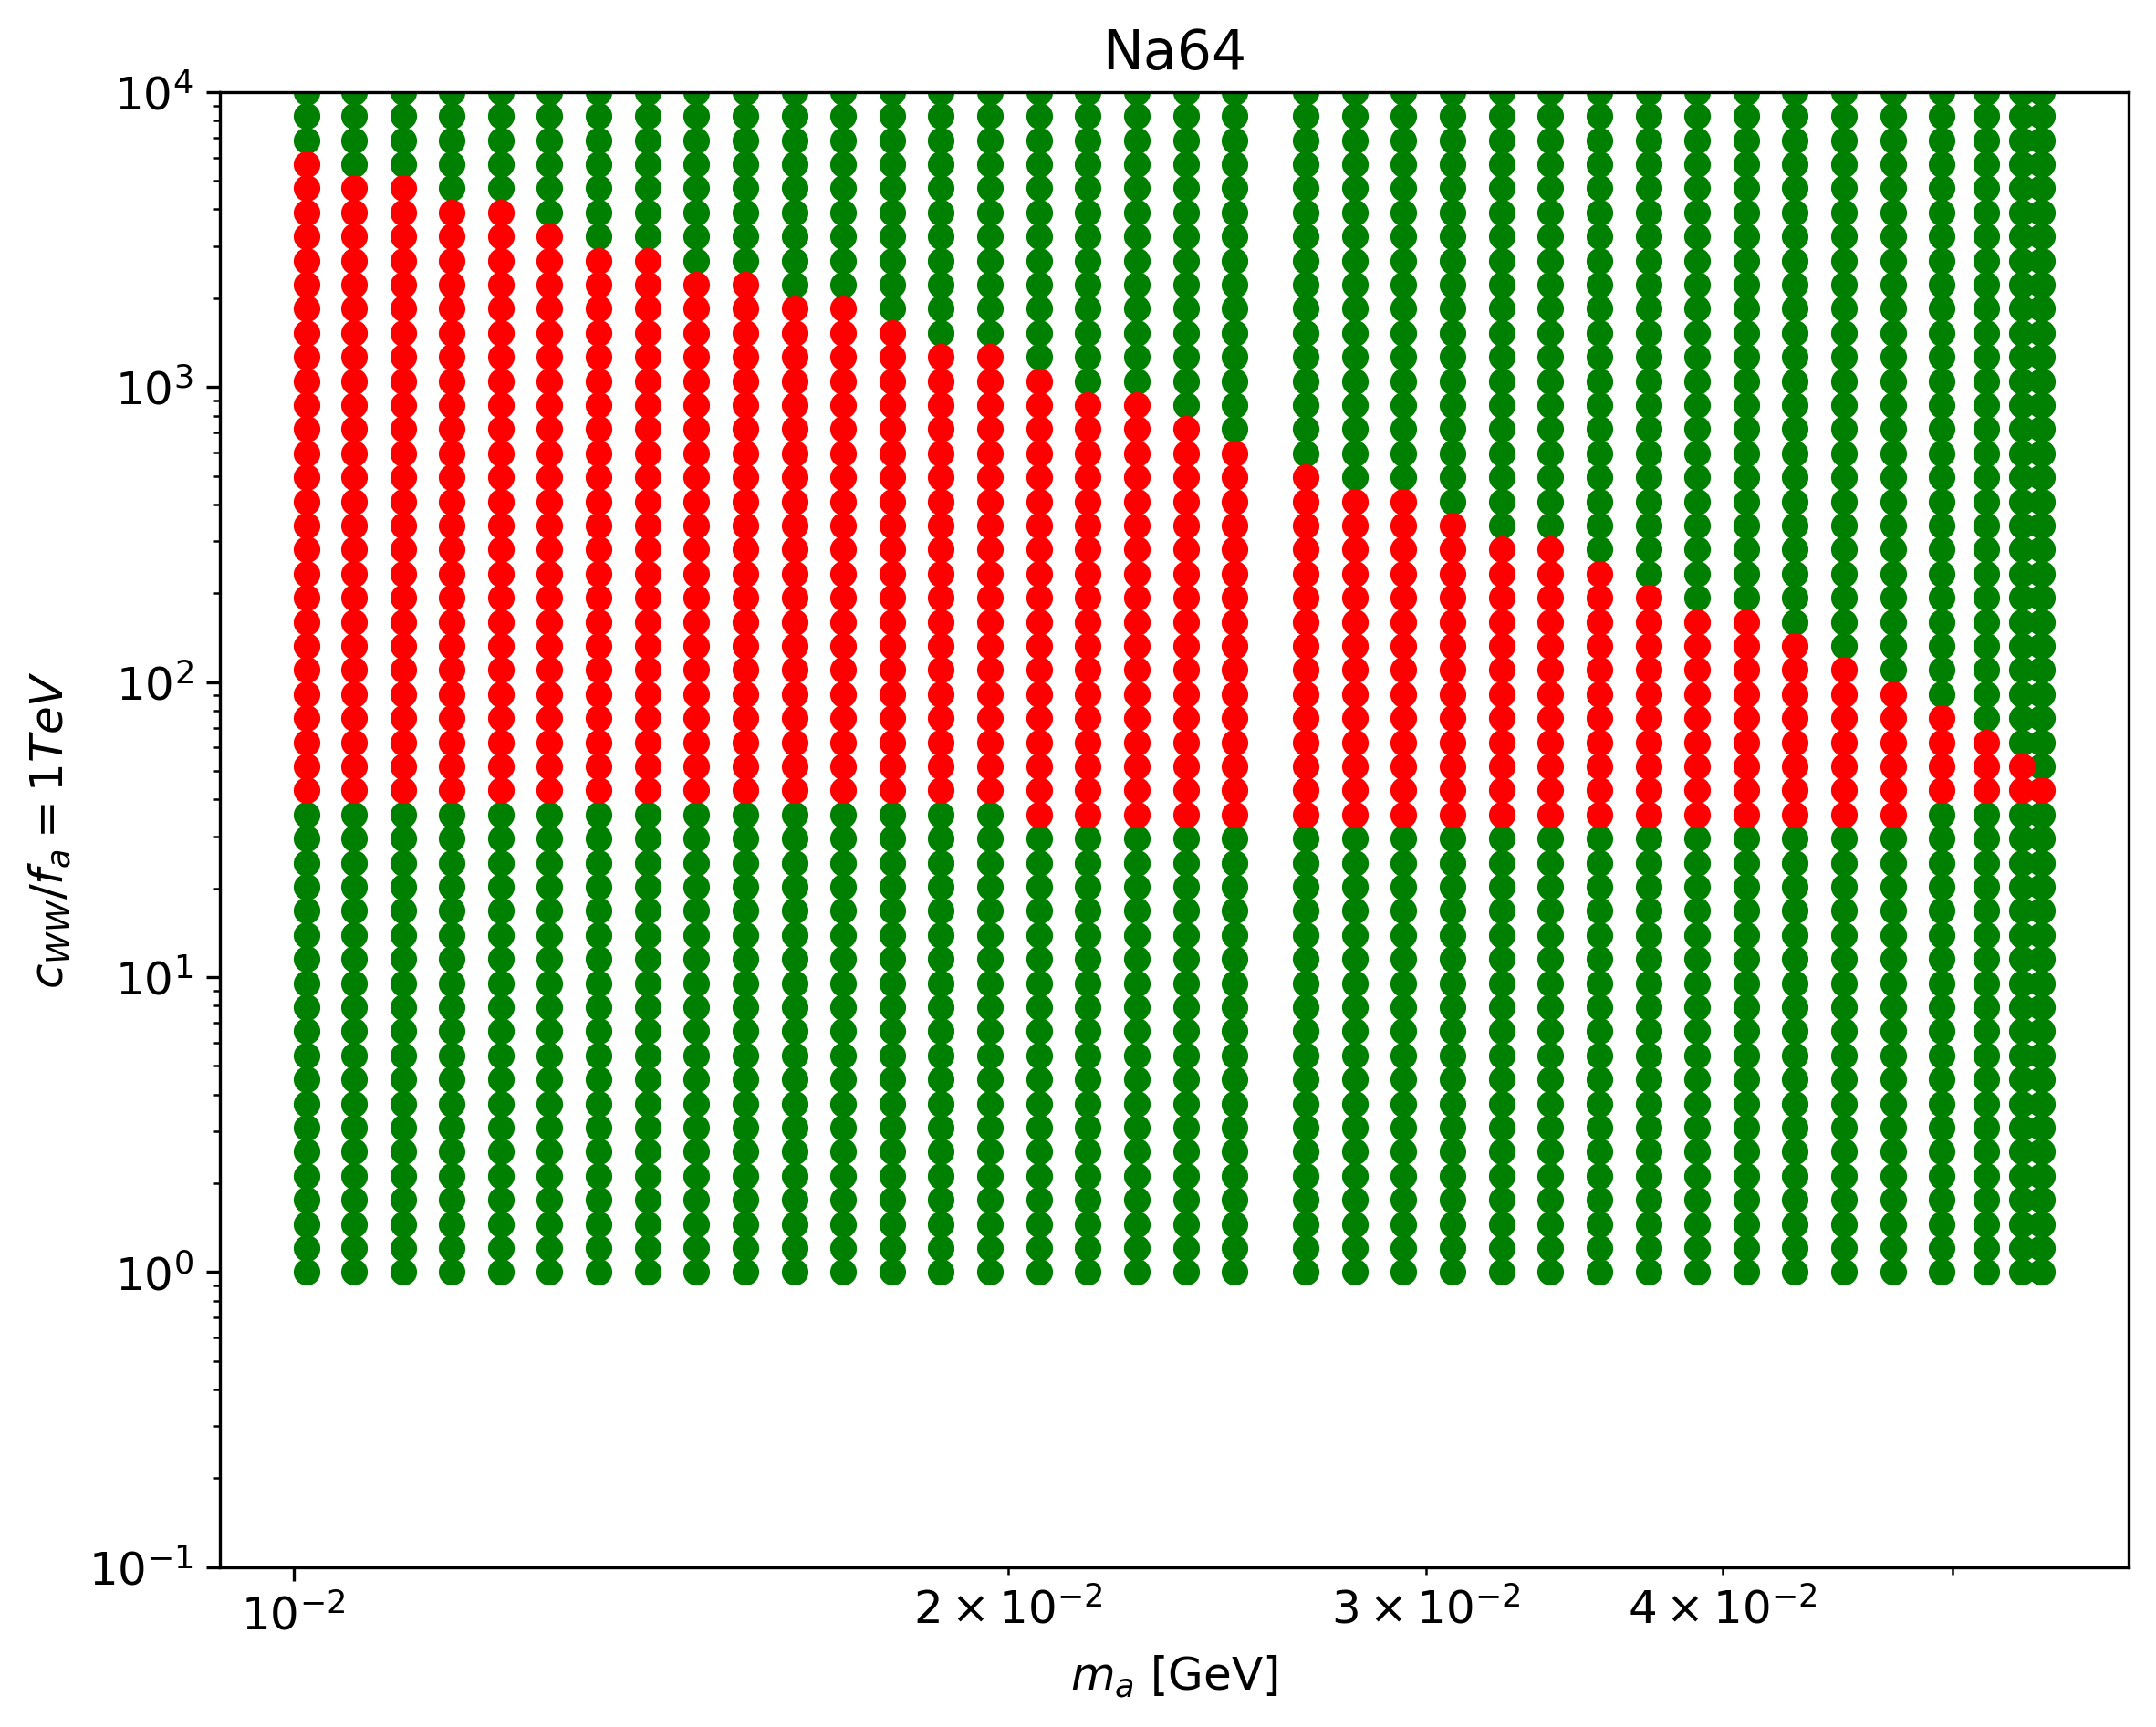

In [94]:
plt.figure(figsize=(9, 7))


plotAllAllowed("output/m-tau-c-Na64-cWW_combined.dat",0,2)
#plotWhiteRegions(10**(3))

# plotWhiteRegions(10**5)

plt.title('Na64')
plt.xlabel('$m_a$ [GeV]')
#plt.xlim(0.2,0.2)
plt.ylabel('$c_{WW}/f_a=1 TeV$')
plt.xscale("log")
plt.yscale("log")

# plt.xlim(9*10**-3, 4)
plt.ylim(10**-1, 10**4)

# plt.savefig('plots/Na64_cWW_bound.png', dpi=300, bbox_inches='tight')